# Predicting House Prices in Perth

### Data pre processing, exploration and cleaning

In [24]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read in the dataset 
df = pd.read_csv('all_perth_310121.csv')
df

ADDRESS           SUBURB    PRICE  BEDROOMS  BATHROOMS  \
0           1 Acorn Place       South Lake   565000         4          2   
1             1 Addis Way            Wandi   365000         3          2   
2         1 Ainsley Court          Camillo   287000         3          1   
3         1 Albert Street         Bellevue   255000         2          1   
4            1 Aman Place        Lockridge   325000         4          1   
...                   ...              ...      ...       ...        ...   
33651      9C Gold Street  South Fremantle  1040000         4          3   
33652      9C Pycombe Way      Westminster   410000         3          2   
33653      9D Pycombe Way      Westminster   427000         3          2   
33654     9D Shalford Way       Girrawheen   295000         3          1   
33655  9E Margaret Street          Midland   295000         3          1   

       GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
0         2.0        600         160      2003.0     18300   
1         2.0        351         139      2013.0     26900   
2         1.0        719          86      1979.0     22600   
3         2.0        651          59      1953.0     17900   
4         2.0        466         131      1998.0     11200   
...       ...        ...         ...         ...       ...   
33651     2.0        292         245      2013.0     16100   
33652     2.0        228         114         NaN      9600   
33653     2.0        261         112         NaN      9600   
33654     2.0        457          85      1974.0     12600   
33655     2.0        296          95         NaN     16700   

                    NEAREST_STN  NEAREST_STN_DIST  DATE_SOLD  POSTCODE  \
0      Cockburn Central Station              1800  09-2018\r      6164   
1               Kwinana Station              4900  02-2019\r      6167   
2               Challis Station              1900  06-2015\r      6111   
3               Midland Station              3600  07-2018\r      6056   
4            Bassendean Station              2000  11-2016\r      6054   
...                         ...               ...        ...       ...   
33651         Fremantle Station              1500  03-2016\r      6162   
33652          Stirling Station              4600  02-2017\r      6061   
33653          Stirling Station              4600  02-2017\r      6061   
33654           Warwick Station              4400  10-2016\r      6064   
33655           Midland Station              1700  05-2016\r      6056   

        LATITUDE   LONGITUDE                                  NEAREST_SCH  \
0     -32.115900  115.842450                  LAKELAND SENIOR HIGH SCHOOL   
1     -32.193470  115.859554                               ATWELL COLLEGE   
2     -32.120578  115.993579                 KELMSCOTT SENIOR HIGH SCHOOL   
3     -31.900547  116.038009                 SWAN VIEW SENIOR HIGH SCHOOL   
4     -31.885790  115.947780                                KIARA COLLEGE   
...          ...         ...                                          ...   
33651 -32.064580  115.751820                  CHRISTIAN BROTHERS' COLLEGE   
33652 -31.867055  115.841403  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33653 -31.866890  115.841418  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33654 -31.839680  115.842410                GIRRAWHEEN SENIOR HIGH SCHOOL   
33655 -31.882163  116.014755                             LA SALLE COLLEGE   

       NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0              0.828339               NaN  
1              5.524324             129.0  
2              1.649178             113.0  
3              1.571401               NaN  
4              1.514922               NaN  
...                 ...               ...  
33651          1.430350              49.0  
33652          1.679644              35.0  
33653          1.669159              35.0  
33654          0.358494               NaN  
33655          1.055564              53.0  

[33656 rows x 19 

In [25]:
# Check the dimensions of the dataset (rows, columns)
df.shape
# dataset contains 33656 rows and 19 columns

(33656, 19)

In [26]:
df.describe()

PRICE      BEDROOMS     BATHROOMS        GARAGE      LAND_AREA  \
count  3.365600e+04  33656.000000  33656.000000  31178.000000   33656.000000   
mean   6.370720e+05      3.659110      1.823063      2.199917    2740.644016   
std    3.558256e+05      0.752038      0.587427      1.365225   16693.513215   
min    5.100000e+04      1.000000      1.000000      1.000000      61.000000   
25%    4.100000e+05      3.000000      1.000000      2.000000     503.000000   
50%    5.355000e+05      4.000000      2.000000      2.000000     682.000000   
75%    7.600000e+05      4.000000      2.000000      2.000000     838.000000   
max    2.440000e+06     10.000000     16.000000     99.000000  999999.000000   

         FLOOR_AREA    BUILD_YEAR      CBD_DIST  NEAREST_STN_DIST  \
count  33656.000000  30501.000000  33656.000000      33656.000000   
mean     183.501545   1989.706436  19777.374465       4523.371494   
std       72.102982     20.964330  11364.415413       4495.064024   
min        1.000000   1868.000000    681.000000         46.000000   
25%      130.000000   1978.000000  11200.000000       1800.000000   
50%      172.000000   1995.000000  17500.000000       3200.000000   
75%      222.250000   2005.000000  26600.000000       5300.000000   
max      870.000000   2017.000000  59800.000000      35500.000000   

           POSTCODE      LATITUDE     LONGITUDE  NEAREST_SCH_DIST  \
count  33656.000000  33656.000000  33656.000000      33656.000000   
mean    6089.420074    -31.960664    115.879265          1.815268   
std       62.167921      0.177780      0.118137          1.746000   
min     6003.000000    -32.472979    115.582730          0.070912   
25%     6050.000000    -32.068437    115.789763          0.880568   
50%     6069.000000    -31.933231    115.854198          1.345520   
75%     6150.000000    -31.843818    115.970722          2.097225   
max     6558.000000    -31.457450    116.343201         23.254372   

       NEAREST_SCH_RANK  
count      22704.000000  
mean          72.672569  
std           40.639795  
min            1.000000  
25%           39.000000  
50%           68.000000  
75%          105.000000  
max          139.000000

In [27]:
#all columns in dataset
df.columns

Index(['ADDRESS', 'SUBURB', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE',
       'LAND_AREA', 'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN',
       'NEAREST_STN_DIST', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE',
       'NEAREST_SCH', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

### Column Descriptions ( Data Dictionary )

ADDRESS : Address of the house

SUBURB : Specific location in Perth

PRICE : Price of the house in AUD

BEDROOMS : Number of bedrooms

BATHROOMS : Number of bathrooms

GARAGE : Number of garages

LAND_AREA : Total land area (Square Meters)

FLOOR_AREA : Internal floor area (Square Meters)

BUILD_YEAR : Year the house built

CBD_DIST : Distance from Perth (Meters)

NEAREST_STN : The nearest public transport station

NEAREST_STN_DIST : The nearest station distance (Meters)

DATE_SOLD : Month & year when house was last sold

POSTCODE : Postal code of the area

LATITUDE : Geographic latitude of ADDRESS

LONGITUDE : Geographic longitude of ADDRESS

NEAREST_SCH : Location of the nearest School

NEAREST_SCH_DIST : Distance to the nearest school (Kilo Meters)

NEAREST_SCH_RANK : Ranking of the nearest school (Prestige)

In [28]:
# Check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

### Checking for unique values in categorical columns

In [29]:
# Get the list of categorical columns
categorical_columns = ['ADDRESS', 'SUBURB', 'NEAREST_STN', 'NEAREST_SCH']

# Iterate over the categorical columns and print the unique values
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()
    
# Iterate over the categorical columns and print the number of unique values
for column in categorical_columns:
    num_unique_values = df[column].nunique()
    print(f"Number of unique values in {column}: {num_unique_values}")

Unique values in ADDRESS:
['1 Acorn Place' '1 Addis Way' '1 Ainsley Court' ... '9D Pycombe Way'
 '9D Shalford Way' '9E Margaret Street']

Unique values in SUBURB:
['South Lake' 'Wandi' 'Camillo' 'Bellevue' 'Lockridge' 'Mount Richon'
 'Hilbert' 'Waikiki' 'Hamersley' 'Bayswater' 'Carmel' 'Butler' 'Balga'
 'Hammond Park' 'Wattle Grove' 'Bull Creek' 'Bullsbrook' 'Maida Vale'
 'Koongamia' 'Mount Nasura' 'Forrestdale' 'Atwell' 'Ashby' 'Woodbridge'
 'Bicton' 'Singleton' 'South Guildford' 'Armadale' 'Kenwick'
 'Hamilton Hill' 'Port Kennedy' 'Roleystone' 'Glen Forrest'
 'Secret Harbour' 'Herne Hill' 'Gwelup' 'Harrisdale' 'North Fremantle'
 'Quinns Rocks' 'Spearwood' 'Parkwood' 'Tapping' 'Thornlie' 'Baldivis'
 'Kensington' 'Kiara' 'Menora' 'Southern River' 'Bibra Lake' 'Swanbourne'
 'The Vines' 'Stratton' 'North Beach' 'Haynes' 'Madeley' 'Wembley Downs'
 'Bentley' 'Manning' 'Warwick' 'Queens Park' 'Medina' 'Kalamunda'
 'Merriwa' 'Aubin Grove' 'Karrinyup' 'Gooseberry Hill' 'Darch' 'Hillarys'
 'Al

Given the large number of unique values in the categorical columns, it can be challenging to work with them directly in the machine learning model later on. However, one categorical feature that can still be valuable is the "Suburb" column. The reason is that different suburbs can exhibit distinct price ranges, with some being considered high-end areas and others being more affordable. During the data cleaning process, I will drop certain columns, specifically those with high-cardinality. High-cardinality columns refer to those with a large number of unique values. One such example in this dataset is the "ADDRESS" column, where almost all values are unique and would serve no purpose to the model. I also don't think that nearest_stn or nearest_sch is important for the model because i think the distance for nearest school is more important than the ranking of the school. House prices are normally more expensive when they are nearer to school zone. The nearest station would also not matter much as we have other columns to indicate whether or not the house is close to a central area such as CDB_dist

### Checking For Missing values

In [30]:
# Check for missing values
# many missing values in nearest_sch_rank column and garage and build_year
df.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

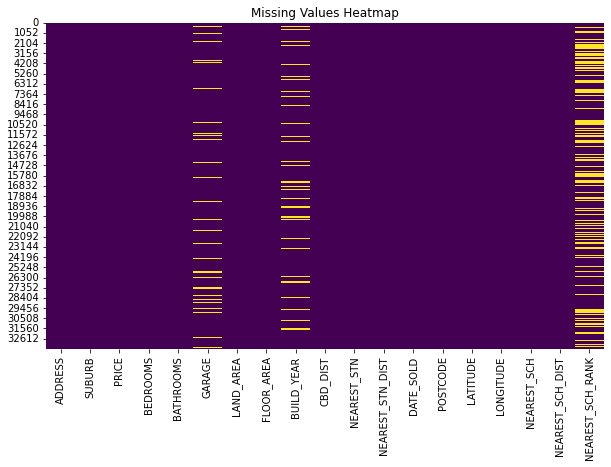

In [31]:
import seaborn as sns

# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


NEAREST_SCH_RANK has too many null values Therefore, that column need to be dropped. Otherwise it will lead to inaccuracy of the model when data cleaning. Moreover, the ranking of the school would not affect house prices as I think the distance plays a bigger part as seen from the article below talking about school zones being near houses affecting prices in australia

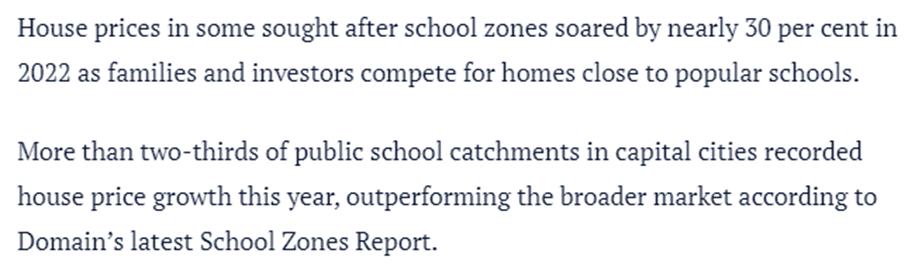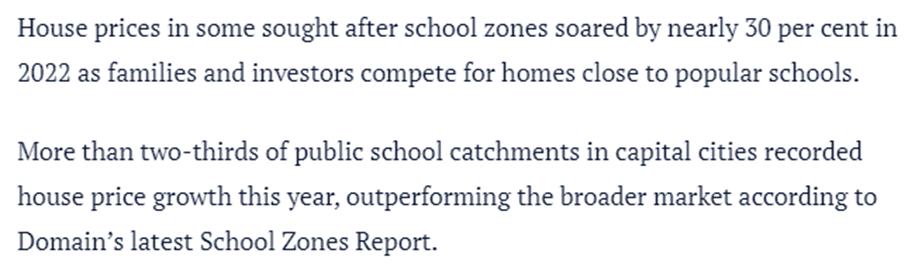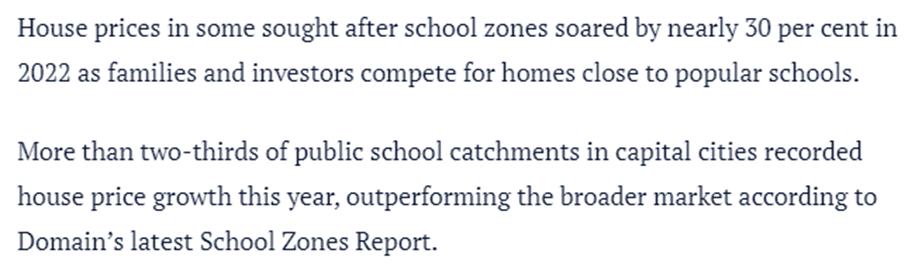

GARAGE and BUILD_YEAR also have null values. Since those are not that much, those cells will be replaced with the median/mode values of the particular column when data cleaning. GARAGE would be an important factor when it comes to predicitng the house prices because it serves as an important feature that can significantly impact a property's value. The year the house was built could also be an important feature. The build year provides valuable information about the age and condition of the property, and it can have a significant impact on its market value.

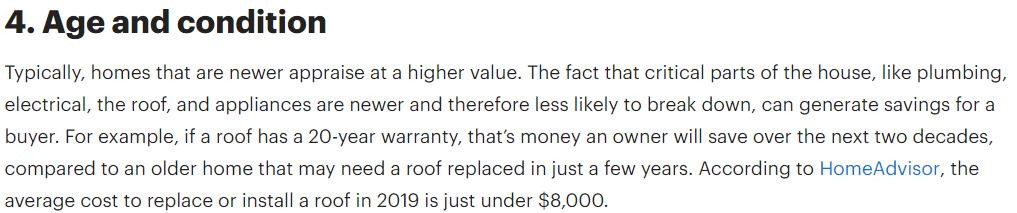

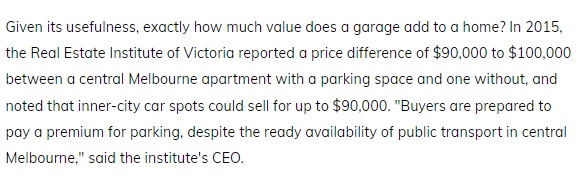

2 articles talking about the values that a garage adds to o house and how the year it was built also affects the price.

### More data exploration

array([[<AxesSubplot:title={'center':'PRICE'}>,
        <AxesSubplot:title={'center':'BEDROOMS'}>,
        <AxesSubplot:title={'center':'BATHROOMS'}>,
        <AxesSubplot:title={'center':'GARAGE'}>],
       [<AxesSubplot:title={'center':'LAND_AREA'}>,
        <AxesSubplot:title={'center':'FLOOR_AREA'}>,
        <AxesSubplot:title={'center':'BUILD_YEAR'}>,
        <AxesSubplot:title={'center':'CBD_DIST'}>],
       [<AxesSubplot:title={'center':'NEAREST_STN_DIST'}>,
        <AxesSubplot:title={'center':'POSTCODE'}>,
        <AxesSubplot:title={'center':'LATITUDE'}>,
        <AxesSubplot:title={'center':'LONGITUDE'}>],
       [<AxesSubplot:title={'center':'NEAREST_SCH_DIST'}>,
        <AxesSubplot:title={'center':'NEAREST_SCH_RANK'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

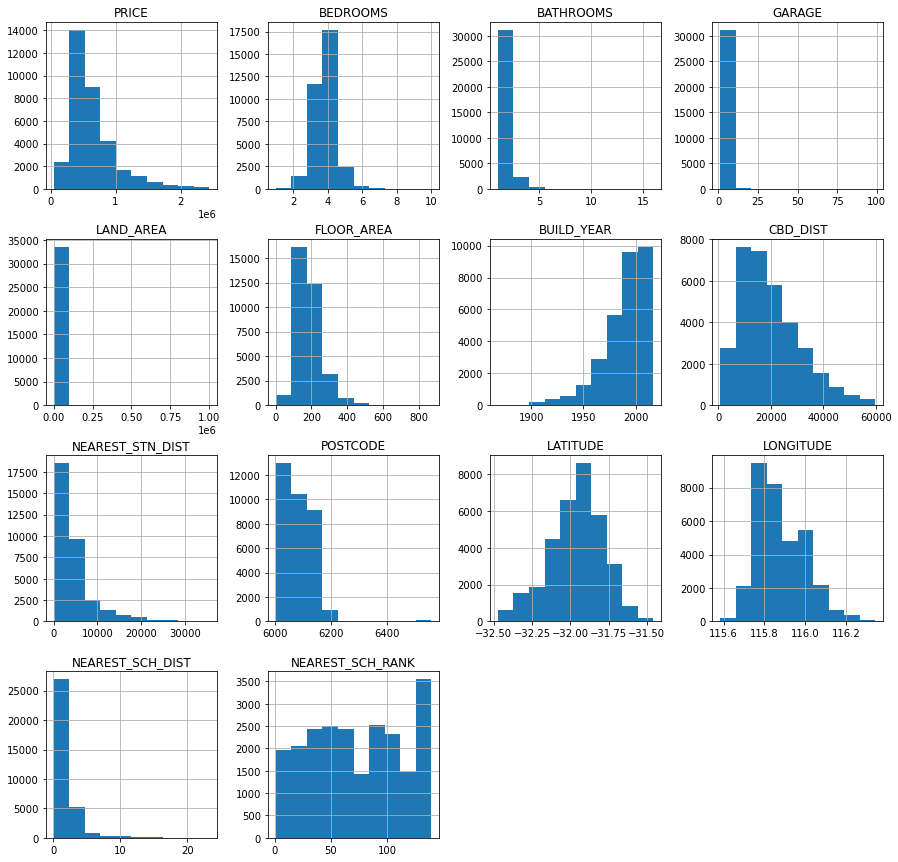

In [32]:
df.hist(figsize=(15, 15))

<AxesSubplot:xlabel='NEAREST_SCH_RANK'>

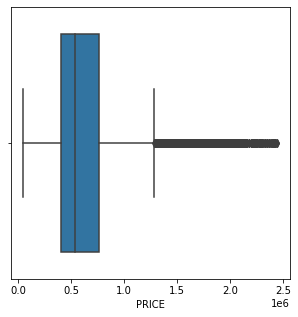

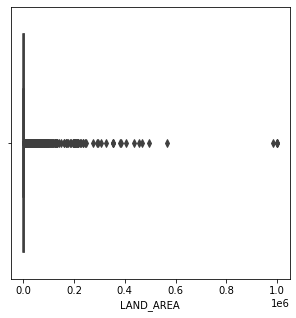

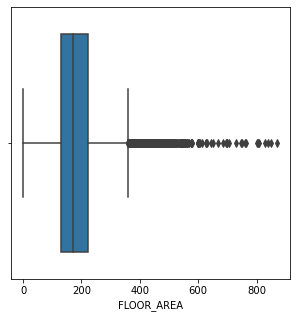

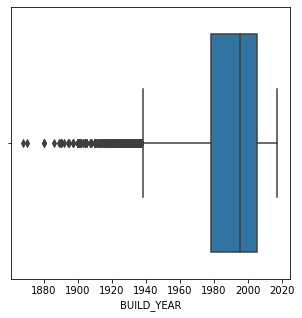

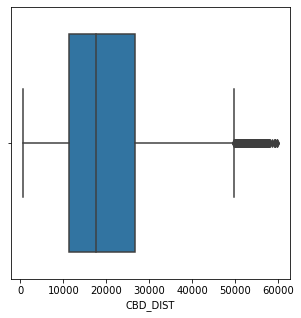

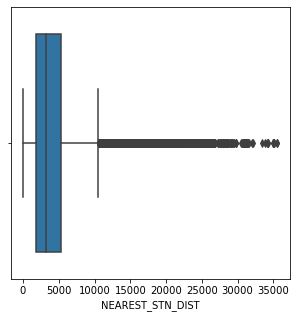

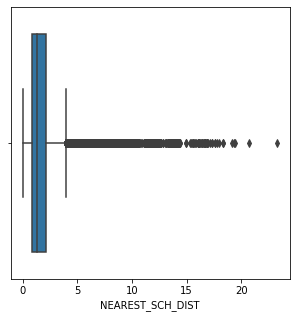

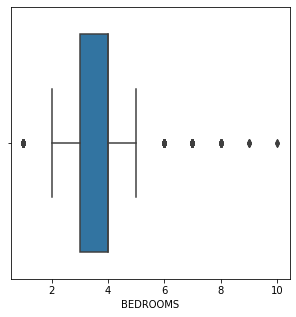

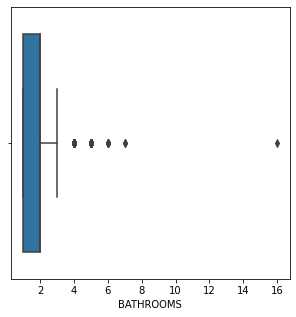

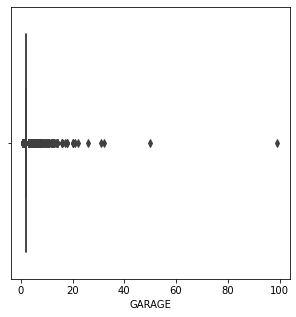

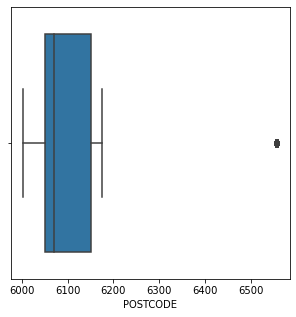

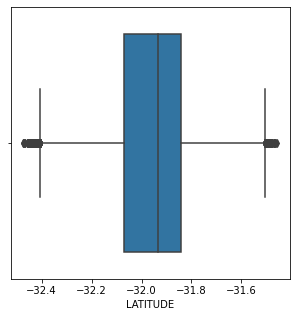

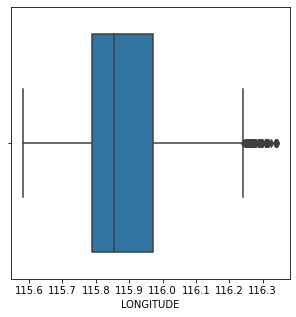

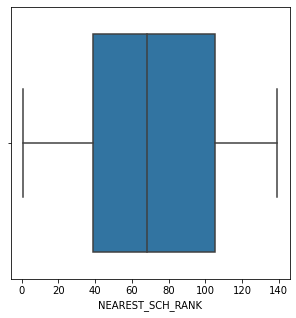

In [33]:
# Boxplot for each column

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['PRICE'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['LAND_AREA'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['FLOOR_AREA'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['BUILD_YEAR'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['CBD_DIST'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['NEAREST_STN_DIST'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['NEAREST_SCH_DIST'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['BEDROOMS'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['BATHROOMS'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['GARAGE'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['POSTCODE'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['LATITUDE'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['LONGITUDE'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['NEAREST_SCH_RANK'])


### Linear Correlation

In [34]:
# checking correlation matrix
df.corr()

PRICE  BEDROOMS  BATHROOMS    GARAGE  LAND_AREA  \
PRICE             1.000000  0.252637   0.377133  0.134343   0.056855   
BEDROOMS          0.252637  1.000000   0.555702  0.194197   0.051223   
BATHROOMS         0.377133  0.555702   1.000000  0.186801   0.027059   
GARAGE            0.134343  0.194197   0.186801  1.000000   0.059211   
LAND_AREA         0.056855  0.051223   0.027059  0.059211   1.000000   
FLOOR_AREA        0.548497  0.536926   0.555843  0.201541   0.073836   
BUILD_YEAR       -0.157218  0.229019   0.339594  0.040371   0.002063   
CBD_DIST         -0.354327  0.124654   0.033053  0.046244   0.133262   
NEAREST_STN_DIST -0.095089  0.102203   0.037068  0.110527   0.233023   
POSTCODE         -0.171553  0.010601  -0.041374  0.028005   0.042070   
LATITUDE          0.053041  0.021967   0.051411 -0.016416  -0.014389   
LONGITUDE        -0.183734 -0.015170  -0.093817  0.091270   0.151255   
NEAREST_SCH_DIST -0.021941  0.092391   0.060734  0.099654   0.286964   
NEAREST_SCH_RANK -0.461991  0.024461  -0.096024  0.021863   0.048758   

                  FLOOR_AREA  BUILD_YEAR  CBD_DIST  NEAREST_STN_DIST  \
PRICE               0.548497   -0.157218 -0.354327         -0.095089   
BEDROOMS            0.536926    0.229019  0.124654          0.102203   
BATHROOMS           0.555843    0.339594  0.033053          0.037068   
GARAGE              0.201541    0.040371  0.046244          0.110527   
LAND_AREA           0.073836    0.002063  0.133262          0.233023   
FLOOR_AREA          1.000000    0.226872  0.022687          0.106527   
BUILD_YEAR          0.226872    1.000000  0.270110          0.103350   
CBD_DIST            0.022687    0.270110  1.000000          0.446496   
NEAREST_STN_DIST    0.106527    0.103350  0.446496          1.000000   
POSTCODE           -0.050658    0.044095  0.255801          0.204347   
LATITUDE            0.043555    0.045463 -0.196813          0.037174   
LONGITUDE          -0.046625   -0.059047 -0.060097          0.496924   
NEAREST_SCH_DIST    0.120048    0.108719  0.377118          0.634712   
NEAREST_SCH_RANK   -0.145502    0.158639  0.328703          0.189571   

                  POSTCODE  LATITUDE  LONGITUDE  NEAREST_SCH_DIST  \
PRICE            -0.171553  0.053041  -0.183734         -0.021941   
BEDROOMS          0.010601  0.021967  -0.015170          0.092391   
BATHROOMS        -0.041374  0.051411  -0.093817          0.060734   
GARAGE            0.028005 -0.016416   0.091270          0.099654   
LAND_AREA         0.042070 -0.014389   0.151255          0.286964   
FLOOR_AREA       -0.050658  0.043555  -0.046625          0.120048   
BUILD_YEAR        0.044095  0.045463  -0.059047          0.108719   
CBD_DIST          0.255801 -0.196813  -0.060097          0.377118   
NEAREST_STN_DIST  0.204347  0.037174   0.496924          0.634712   
POSTCODE          1.000000 -0.642643   0.173918          0.128424   
LATITUDE         -0.642643  1.000000  -0.105989          0.005939   
LONGITUDE         0.173918 -0.105989   1.000000          0.304214   
NEAREST_SCH_DIST  0.128424  0.005939   0.304214          1.000000   
NEAREST_SCH_RANK  0.192768 -0.049861   0.243746          0.161502   

                  NEAREST_SCH_RANK  
PRICE                    -0.461991  
BEDROOMS                  0.024461  
BATHROOMS                -0.096024  
GARAGE                    0.021863  
LAND_AREA                 0.048758  
FLOOR_AREA               -0.145502  
BUILD_YEAR                0.158639  
CBD_DIST                  0.328703  
NEAREST_STN_DIST          0.189571  
POSTCODE                  0.192768  
LATITUDE                 -0.049861  
LONGITUDE                 0.243746  
NEAREST_SCH_DIST          0.161502  
NEAREST_SCH_RANK          1.000000

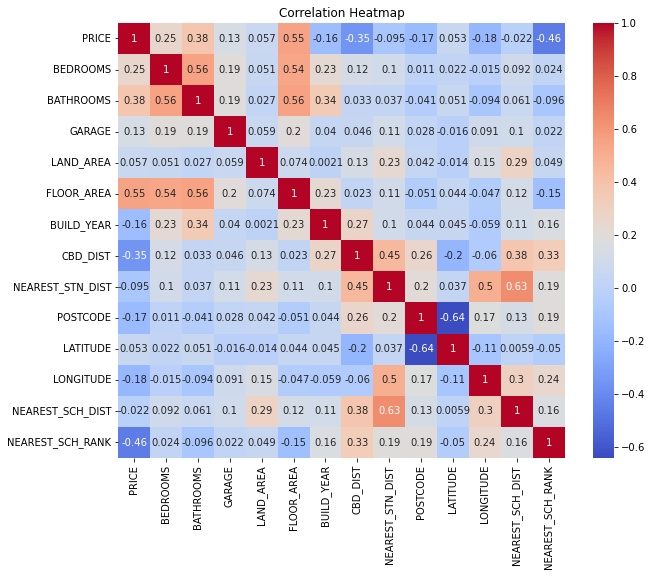

In [35]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation matrix shows the correlation between numerical features. The correlation values are in between -0.65 and +0.6. It means there are no strong co-related features in this data. Therefore, it is not needed to remove features based on the co-relations.

# Dealing with the SUBURB COLUMN

The "suburb" column is important in predicting house prices because the location of a property is a critical factor in determining its value. Suburbs can vary significantly in terms of amenities, infrastructure, safety, schools, proximity to city centers, and other important attributes that influence housing prices. If I drop the "suburb" column, the model will treat all properties as if they are from the same location, leading to incorrect predictions. In other words, it will ignore the location effect, which is a critical factor in determining house prices. Howevver, since the suburb column has over 300 unique values, i have to find a way to deal with them properly.

In [36]:
suburb_counts = df['SUBURB'].value_counts()
print(suburb_counts)

Bertram            231
Iluka              212
Bennett Springs    211
Mindarie           209
Carramar           208
                  ... 
Munster              1
Kwinana Beach        1
Welshpool            1
Wangara              1
Naval Base           1
Name: SUBURB, Length: 321, dtype: int64


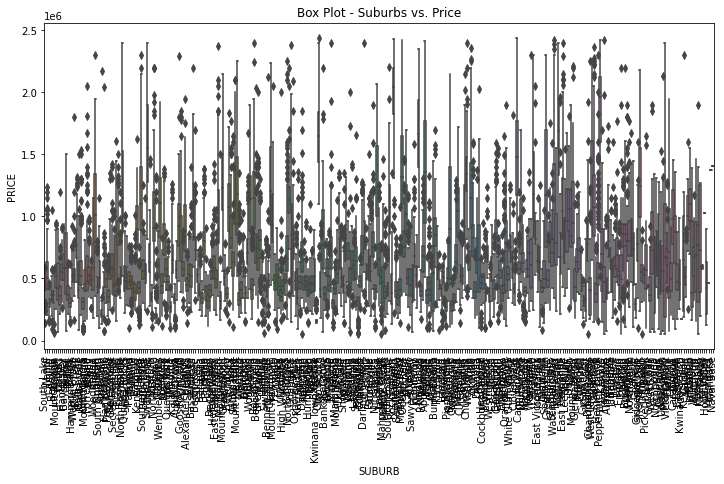

In [37]:
# Box plot showing the distribution of 'PRICE' for each 'suburb'
plt.figure(figsize=(12, 6))
sns.boxplot(x='SUBURB', y='PRICE', data=df)
plt.xticks(rotation=90)
plt.title("Box Plot - Suburbs vs. Price")
plt.show()

Its a bit difficult to see if there are any correlation between certain suburbs and prices of the house or detect certain suburbs that may be more expensive than the other due the high amount of unique values. SO i decided to remove some of the suburbs that do not appear many times in the dataset

In [38]:
# check total number of unique values for suburb
num_unique_suburbs = df['SUBURB'].nunique()

print("Total number of unique suburbs:", num_unique_suburbs)

Total number of unique suburbs: 321


In [39]:
min_occurrences = 15  # Set the minimum number of occurrences to consider as 15

suburb_counts = df['SUBURB'].value_counts()
rare_suburbs = suburb_counts[suburb_counts < min_occurrences].index

# Drop rows where the 'SUBURB' column contains rare suburbs
df = df.drop(df[df['SUBURB'].isin(rare_suburbs)].index)


In [40]:
suburb_counts = df['SUBURB'].value_counts()
print(suburb_counts)

Bertram            231
Iluka              212
Bennett Springs    211
Mindarie           209
Carramar           208
                  ... 
Baskerville         20
Wungong             20
Hopeland            20
Anketell            19
Pickering Brook     18
Name: SUBURB, Length: 308, dtype: int64


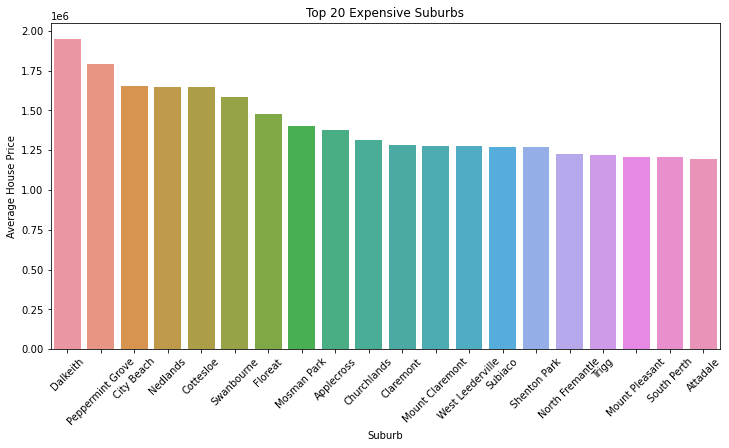

In [41]:
suburb_stats = df.groupby('SUBURB')['PRICE'].agg(['mean', 'median', 'max', 'min', 'count'])
suburb_stats = suburb_stats.sort_values(by='mean', ascending=False)

# Step 3: Visualize the results - Top N expensive suburbs
top_n = 20
top_suburbs = suburb_stats.head(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_suburbs.index, y='mean', data=top_suburbs)
plt.xticks(rotation=45)
plt.xlabel('Suburb')
plt.ylabel('Average House Price')
plt.title(f'Top {top_n} Expensive Suburbs')
plt.show()

In [42]:
# Get all the unique values in the "suburb" column
unique_suburbs = df['SUBURB'].unique()

# Print all the individual values in the "suburb" column
for suburb in unique_suburbs:
    print(suburb)

South Lake
Wandi
Camillo
Bellevue
Lockridge
Mount Richon
Hilbert
Waikiki
Hamersley
Bayswater
Carmel
Butler
Balga
Hammond Park
Wattle Grove
Bull Creek
Bullsbrook
Maida Vale
Koongamia
Mount Nasura
Forrestdale
Atwell
Ashby
Woodbridge
Bicton
Singleton
South Guildford
Armadale
Kenwick
Hamilton Hill
Port Kennedy
Roleystone
Glen Forrest
Secret Harbour
Herne Hill
Gwelup
Harrisdale
North Fremantle
Quinns Rocks
Spearwood
Parkwood
Tapping
Thornlie
Baldivis
Kensington
Kiara
Menora
Southern River
Bibra Lake
Swanbourne
The Vines
Stratton
North Beach
Haynes
Madeley
Wembley Downs
Bentley
Manning
Warwick
Queens Park
Medina
Kalamunda
Merriwa
Aubin Grove
Karrinyup
Gooseberry Hill
Darch
Hillarys
Alexander Heights
St James
Bassendean
Ardross
Bedfordale
Success
Ballajura
Leda
Bateman
Eglinton
Orelia
Beckenham
Edgewater
Helena Valley
East Cannington
Marmion
Maddington
Mount Claremont
Greenwood
Beechboro
Wembley
Iluka
Mundaring
Salter Point
Mount Pleasant
Warnbro
Byford
Willagee
Bertram
Mullaloo
Woodlands
Wel

In the code below I am performing clustering analysis using the K-means algorithm to group suburbs based on their geographical locations and then identifying potentially expensive suburbs within each cluster based on the average house prices. The K-means clustering algorithm groups suburbs based on their geographical coordinates (latitude and longitude) and how close they are to each other in the geographic space. The algorithm seeks to partition the data into '5' clusters, where each cluster is represented by its centroid, and data points (suburbs) are assigned to the cluster with the nearest centroid.

Overall, this analysis helps me group suburbs into clusters based on their geographical proximity and identify clusters of suburbs with potentially higher house prices. The "suburb_groups" Series provides information about which suburbs belong to each cluster, and the "expensive_suburbs" Series allows me to understand which clusters contain suburbs with higher average house prices.

In [43]:
from sklearn.cluster import KMeans

# Select the features for clustering (latitude and longitude)
X = df[['LATITUDE', 'LONGITUDE']]

# Choose the number of clusters (k) based on analysis
num_clusters = 7

# K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Group the suburbs based on the clusters assigned by K-means
suburb_groups = df.groupby('Cluster')['SUBURB'].apply(list)

# Identify the expensive suburbs in each cluster (based on average house price)
expensive_suburbs = df.groupby('Cluster')['PRICE'].mean().sort_values(ascending=False)
df

ADDRESS           SUBURB    PRICE  BEDROOMS  BATHROOMS  \
0           1 Acorn Place       South Lake   565000         4          2   
1             1 Addis Way            Wandi   365000         3          2   
2         1 Ainsley Court          Camillo   287000         3          1   
3         1 Albert Street         Bellevue   255000         2          1   
4            1 Aman Place        Lockridge   325000         4          1   
...                   ...              ...      ...       ...        ...   
33651      9C Gold Street  South Fremantle  1040000         4          3   
33652      9C Pycombe Way      Westminster   410000         3          2   
33653      9D Pycombe Way      Westminster   427000         3          2   
33654     9D Shalford Way       Girrawheen   295000         3          1   
33655  9E Margaret Street          Midland   295000         3          1   

       GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  \
0         2.0        600         160      2003.0     18300   
1         2.0        351         139      2013.0     26900   
2         1.0        719          86      1979.0     22600   
3         2.0        651          59      1953.0     17900   
4         2.0        466         131      1998.0     11200   
...       ...        ...         ...         ...       ...   
33651     2.0        292         245      2013.0     16100   
33652     2.0        228         114         NaN      9600   
33653     2.0        261         112         NaN      9600   
33654     2.0        457          85      1974.0     12600   
33655     2.0        296          95         NaN     16700   

                    NEAREST_STN  NEAREST_STN_DIST  DATE_SOLD  POSTCODE  \
0      Cockburn Central Station              1800  09-2018\r      6164   
1               Kwinana Station              4900  02-2019\r      6167   
2               Challis Station              1900  06-2015\r      6111   
3               Midland Station              3600  07-2018\r      6056   
4            Bassendean Station              2000  11-2016\r      6054   
...                         ...               ...        ...       ...   
33651         Fremantle Station              1500  03-2016\r      6162   
33652          Stirling Station              4600  02-2017\r      6061   
33653          Stirling Station              4600  02-2017\r      6061   
33654           Warwick Station              4400  10-2016\r      6064   
33655           Midland Station              1700  05-2016\r      6056   

        LATITUDE   LONGITUDE                                  NEAREST_SCH  \
0     -32.115900  115.842450                  LAKELAND SENIOR HIGH SCHOOL   
1     -32.193470  115.859554                               ATWELL COLLEGE   
2     -32.120578  115.993579                 KELMSCOTT SENIOR HIGH SCHOOL   
3     -31.900547  116.038009                 SWAN VIEW SENIOR HIGH SCHOOL   
4     -31.885790  115.947780                                KIARA COLLEGE   
...          ...         ...                                          ...   
33651 -32.064580  115.751820                  CHRISTIAN BROTHERS' COLLEGE   
33652 -31.867055  115.841403  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33653 -31.866890  115.841418  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL   
33654 -31.839680  115.842410                GIRRAWHEEN SENIOR HIGH SCHOOL   
33655 -31.882163  116.014755                             LA SALLE COLLEGE   

       NEAREST_SCH_DIST  NEAREST_SCH_RANK  Cluster  
0              0.828339               NaN        5  
1              5.524324             129.0        1  
2              1.649178             113.0        4  
3              1.571401               NaN        2  
4              1.514922               NaN        2  
...                 ...               ...      ...  
33651          1.430350              49.0        5  
33652          1.679644              35.0        0  
33653          1.669159              35.0        0  
33654          0

I have decided to set the number of clusters to be 7 and below we can see the distribution of the clusters 

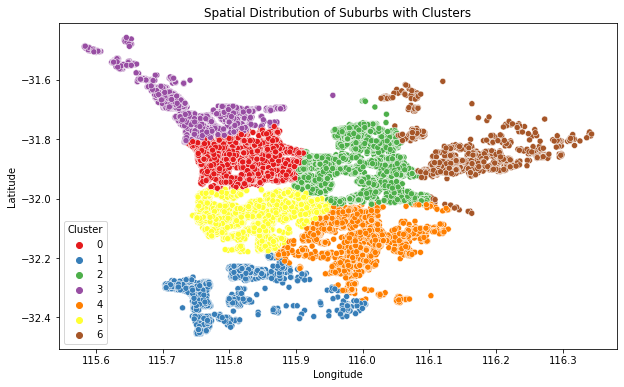

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='Cluster', data=df, palette='Set1')
plt.title('Spatial Distribution of Suburbs with Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In this code, I am creating a new column called "SUBURB_STATUS" in the DataFrame "df" to hold the price group of each suburb based on whether it is considered "Luxury" or "Standard" relative to the calculated threshold. This "SUBURB_STATUS" column can be used as a feature in the machine learning models instead of the suburb columns. It provides a simplified representation of the expensive and cheaper suburbs in the dataset, allowing me to understand the distribution of luxury and standard suburbs across different clusters based on their geographical locations.

In [45]:
# Assuming you have run the previous code to get the 'expensive_suburbs' Series
# and 'df' contains the 'PRICE' column and 'Cluster' column

# Calculate the threshold as the mean of the expensive_suburbs Series
threshold = expensive_suburbs.mean()

# Create a new column 'Price_Group' to hold the price group (Expensive or Cheaper)
df['SUBURB_STATUS'] = None

# Update 'Price_Group' based on the threshold
df.loc[df['PRICE'] >= threshold, 'SUBURB_STATUS'] = 'Luxury'
df.loc[df['PRICE'] < threshold, 'SUBURB_STATUS'] = 'Standard'

df

ADDRESS           SUBURB    PRICE  BEDROOMS  BATHROOMS  \
0           1 Acorn Place       South Lake   565000         4          2   
1             1 Addis Way            Wandi   365000         3          2   
2         1 Ainsley Court          Camillo   287000         3          1   
3         1 Albert Street         Bellevue   255000         2          1   
4            1 Aman Place        Lockridge   325000         4          1   
...                   ...              ...      ...       ...        ...   
33651      9C Gold Street  South Fremantle  1040000         4          3   
33652      9C Pycombe Way      Westminster   410000         3          2   
33653      9D Pycombe Way      Westminster   427000         3          2   
33654     9D Shalford Way       Girrawheen   295000         3          1   
33655  9E Margaret Street          Midland   295000         3          1   

       GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST  ...  \
0         2.0        600         160      2003.0     18300  ...   
1         2.0        351         139      2013.0     26900  ...   
2         1.0        719          86      1979.0     22600  ...   
3         2.0        651          59      1953.0     17900  ...   
4         2.0        466         131      1998.0     11200  ...   
...       ...        ...         ...         ...       ...  ...   
33651     2.0        292         245      2013.0     16100  ...   
33652     2.0        228         114         NaN      9600  ...   
33653     2.0        261         112         NaN      9600  ...   
33654     2.0        457          85      1974.0     12600  ...   
33655     2.0        296          95         NaN     16700  ...   

      NEAREST_STN_DIST  DATE_SOLD POSTCODE   LATITUDE   LONGITUDE  \
0                 1800  09-2018\r     6164 -32.115900  115.842450   
1                 4900  02-2019\r     6167 -32.193470  115.859554   
2                 1900  06-2015\r     6111 -32.120578  115.993579   
3                 3600  07-2018\r     6056 -31.900547  116.038009   
4                 2000  11-2016\r     6054 -31.885790  115.947780   
...                ...        ...      ...        ...         ...   
33651             1500  03-2016\r     6162 -32.064580  115.751820   
33652             4600  02-2017\r     6061 -31.867055  115.841403   
33653             4600  02-2017\r     6061 -31.866890  115.841418   
33654             4400  10-2016\r     6064 -31.839680  115.842410   
33655             1700  05-2016\r     6056 -31.882163  116.014755   

                                       NEAREST_SCH NEAREST_SCH_DIST  \
0                      LAKELAND SENIOR HIGH SCHOOL         0.828339   
1                                   ATWELL COLLEGE         5.524324   
2                     KELMSCOTT SENIOR HIGH SCHOOL         1.649178   
3                     SWAN VIEW SENIOR HIGH SCHOOL         1.571401   
4                                    KIARA COLLEGE         1.514922   
...                                            ...              ...   
33651                  CHRISTIAN BROTHERS' COLLEGE         1.430350   
33652  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL         1.679644   
33653  JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL         1.669159   
33654                GIRRAWHEEN SENIOR HIGH SCHOOL         0.358494   
33655                             LA SALLE COLLEGE         1.055564   

       NEAREST_SCH_RANK  Cluster  SUBURB_STATUS  
0                   NaN        5       Standard  
1                 129.0        1       Standard  
2                 113.0        4       Standard  
3                   NaN        2       Standard  
4                   NaN        2       Standard  
...                 ...      ...            ...  
33651              49.0        5         Luxury  
33652              35.0        0       Standard  
33653              35.0        0       Standard  
33654               NaN        0       Standard  
33655              53.0        2       Standard  

[33592 rows x 21 

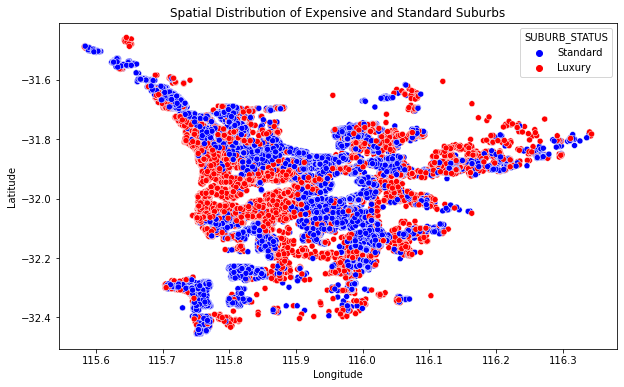

In [46]:
import geopandas as gpd
import folium

# Assuming you have already calculated the threshold and updated the 'SUBURB_STATUS' column as mentioned in your previous code.

# Create a scatter plot using Seaborn to plot points on the map
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='SUBURB_STATUS', data=df, palette={'Luxury': 'red', 'Standard': 'blue'})
plt.title('Spatial Distribution of Expensive and Standard Suburbs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


### Data Cleaning

In [26]:
# Remove columns that are not needed for building the models

df1 = df.drop(['ADDRESS', 'NEAREST_STN', 'DATE_SOLD', 'POSTCODE', 'LATITUDE', 'LONGITUDE', 'NEAREST_SCH', 'NEAREST_SCH_RANK','Cluster','SUBURB'],
               axis='columns')
df1.head(3)

PRICE  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  \
0  565000         4          2     2.0        600         160      2003.0   
1  365000         3          2     2.0        351         139      2013.0   
2  287000         3          1     1.0        719          86      1979.0   

   CBD_DIST  NEAREST_STN_DIST  NEAREST_SCH_DIST SUBURB_STATUS  
0     18300              1800          0.828339      Standard  
1     26900              4900          5.524324      Standard  
2     22600              1900          1.649178      Standard

### Standerdisation and Handling Missing Values

In [27]:
# 'NEAREST_SCH_DIST' column is in 'Kilo Meters' and other distances are in 'Meters'. And the standard unit is 'Meters'. 
# Therefore, 'NEAREST_SCH_DIST' column needs to be converted in to 'Meters' 

df2 = df1.copy()

df2['NEAREST_SCH_DIST'] = df1['NEAREST_SCH_DIST'] * 1000

df2.head()

PRICE  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  BUILD_YEAR  \
0  565000         4          2     2.0        600         160      2003.0   
1  365000         3          2     2.0        351         139      2013.0   
2  287000         3          1     1.0        719          86      1979.0   
3  255000         2          1     2.0        651          59      1953.0   
4  325000         4          1     2.0        466         131      1998.0   

   CBD_DIST  NEAREST_STN_DIST  NEAREST_SCH_DIST SUBURB_STATUS  
0     18300              1800        828.338552      Standard  
1     26900              4900       5524.324354      Standard  
2     22600              1900       1649.178183      Standard  
3     17900              3600       1571.400937      Standard  
4     11200              2000       1514.921629      Standard

In [28]:
# Impute missing values with the mode value of the "BUILD_YEAR" column
mode_year = df2['BUILD_YEAR'].mode().iloc[0]
df2['BUILD_YEAR'].fillna(mode_year, inplace=True)

# Convert the "BUILD_YEAR" column to integers
df2['BUILD_YEAR'] = df2['BUILD_YEAR'].astype(int)

# Verify the updated "BUILD_YEAR" column
print(df2['BUILD_YEAR'])

0        2003
1        2013
2        1979
3        1953
4        1998
         ... 
33651    2013
33652    2000
33653    2000
33654    1974
33655    2000
Name: BUILD_YEAR, Length: 33592, dtype: int32


Checking to see the distribution of the values in 'NEAREST_SCH_DIST'as see if converting the values to 2 decimal places can reduce noise and simplify the data.

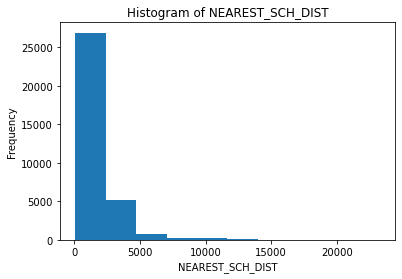

In [29]:
plt.hist(df2['NEAREST_SCH_DIST'], bins=10)
plt.xlabel('NEAREST_SCH_DIST')
plt.ylabel('Frequency')
plt.title('Histogram of NEAREST_SCH_DIST')
plt.show()

"The 'NEAREST_SCH_DIST' column in the dataset represents the distance to the nearest school for each house in Perth. Upon examining the distribution of values in this column, it is observed that the distances are not widely spread and do not contain a significant number of significant digits. The majority of distances fall within a relatively narrow range.

Rounding the 'NEAREST_SCH_DIST' values to two decimal places can simplify the data and remove excessive precision that may not be necessary for the house price prediction model. By rounding the values, we can still retain the relevant information about the approximate distance to the nearest school while reducing noise and making the data more manageable.

In [30]:
# Round the values in the 'NEAREST_SCH_DIST' column to two decimal places
df2['NEAREST_SCH_DIST'] = df2['NEAREST_SCH_DIST'].round(2)
df2

PRICE  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  \
0       565000         4          2     2.0        600         160   
1       365000         3          2     2.0        351         139   
2       287000         3          1     1.0        719          86   
3       255000         2          1     2.0        651          59   
4       325000         4          1     2.0        466         131   
...        ...       ...        ...     ...        ...         ...   
33651  1040000         4          3     2.0        292         245   
33652   410000         3          2     2.0        228         114   
33653   427000         3          2     2.0        261         112   
33654   295000         3          1     2.0        457          85   
33655   295000         3          1     2.0        296          95   

       BUILD_YEAR  CBD_DIST  NEAREST_STN_DIST  NEAREST_SCH_DIST SUBURB_STATUS  
0            2003     18300              1800            828.34      Standard  
1            2013     26900              4900           5524.32      Standard  
2            1979     22600              1900           1649.18      Standard  
3            1953     17900              3600           1571.40      Standard  
4            1998     11200              2000           1514.92      Standard  
...           ...       ...               ...               ...           ...  
33651        2013     16100              1500           1430.35        Luxury  
33652        2000      9600              4600           1679.64      Standard  
33653        2000      9600              4600           1669.16      Standard  
33654        1974     12600              4400            358.49      Standard  
33655        2000     16700              1700           1055.56      Standard  

[33592 rows x 11 columns]

In [31]:
## fill in missing values for garage usiing median
df2['GARAGE'] = df2['GARAGE'].fillna(df2['GARAGE'].median())

# Convert the "GARAGE" column to integers
df2['GARAGE'] = df2['GARAGE'].astype(int)

# Verify the updated "GARAGE" column
print(df2['GARAGE'])

0        2
1        2
2        1
3        2
4        2
        ..
33651    2
33652    2
33653    2
33654    2
33655    2
Name: GARAGE, Length: 33592, dtype: int32


In [32]:
## no more missing values
df2.isnull().sum()

PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN_DIST    0
NEAREST_SCH_DIST    0
SUBURB_STATUS       0
dtype: int64

In [33]:
df2

PRICE  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  \
0       565000         4          2       2        600         160   
1       365000         3          2       2        351         139   
2       287000         3          1       1        719          86   
3       255000         2          1       2        651          59   
4       325000         4          1       2        466         131   
...        ...       ...        ...     ...        ...         ...   
33651  1040000         4          3       2        292         245   
33652   410000         3          2       2        228         114   
33653   427000         3          2       2        261         112   
33654   295000         3          1       2        457          85   
33655   295000         3          1       2        296          95   

       BUILD_YEAR  CBD_DIST  NEAREST_STN_DIST  NEAREST_SCH_DIST SUBURB_STATUS  
0            2003     18300              1800            828.34      Standard  
1            2013     26900              4900           5524.32      Standard  
2            1979     22600              1900           1649.18      Standard  
3            1953     17900              3600           1571.40      Standard  
4            1998     11200              2000           1514.92      Standard  
...           ...       ...               ...               ...           ...  
33651        2013     16100              1500           1430.35        Luxury  
33652        2000      9600              4600           1679.64      Standard  
33653        2000      9600              4600           1669.16      Standard  
33654        1974     12600              4400            358.49      Standard  
33655        2000     16700              1700           1055.56      Standard  

[33592 rows x 11 columns]

### Handle Outliers

In [34]:
# Select the numerical columns
numerical_cols = ['BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA', 'CBD_DIST', 'NEAREST_STN_DIST', 'NEAREST_SCH_DIST']

# Calculate the z-scores for each numerical column
z_scores = np.abs((df2[numerical_cols] - df2[numerical_cols].mean()) / df2[numerical_cols].std())

# Set a threshold for identifying outliers (e.g., z-score > 3)
threshold = 3

# Create a mask to identify outliers
outlier_mask = z_scores > threshold

# Get the indices of rows containing outliers
outlier_indices = np.where(outlier_mask.any(axis=1))[0]

# Print the indices of rows containing outliers
print("Indices of Rows with Outliers:")
print(outlier_indices)

Indices of Rows with Outliers:
[    9    16    26 ... 33521 33532 33575]


In [35]:
uniqu_values = df2['GARAGE'].value_counts()
print(uniqu_values)

2     23161
1      5275
3      2039
4      1947
6       465
5       360
8       129
7        97
12       30
10       26
9        17
14       13
13        8
11        7
16        4
18        3
20        3
32        1
17        1
21        1
99        1
26        1
22        1
50        1
31        1
Name: GARAGE, dtype: int64


I found it kind of odd for there to be houses with more than 4 garages and values like 31 garages has got to be a mistake as it is not possible for a home to have that many garages. So i decided to remove all the outliers and keep values from 1-4 as it is still common in australia to have a house with 4 garages.

In [36]:
# Select the columns for outlier removal
cols = ['PRICE', 'LAND_AREA', 'FLOOR_AREA', 'BEDROOMS', 'BATHROOMS', 'BUILD_YEAR', 'CBD_DIST',
        'NEAREST_STN_DIST', 'NEAREST_SCH_DIST', 'GARAGE']

# Calculate the quartiles and IQR
Q1 = df2[cols].quantile(0.25)
Q3 = df2[cols].quantile(0.75)
IQR = Q3 - Q1

# Create a mask to identify outliers
outlier_mask = ((df2[cols] < (Q1 - 1.5 * IQR)) | (df2[cols] > (Q3 + 1.5 * IQR)))

# Include houses with 1 or 3 garages in the mask as it is normal to have 1-3 garages in a home
outlier_mask['GARAGE'] &= ((df2['GARAGE'] != 1) & (df2['GARAGE'] != 3) & (df2['GARAGE'] != 4))

# Filter the DataFrame to remove outliers
df3 = df2[~outlier_mask.any(axis=1)]

In [37]:
unique_values = df3['GARAGE'].value_counts()
print(unique_values)

2    16724
1     4097
3     1210
4     1141
Name: GARAGE, dtype: int64


In [38]:
df3.shape

(23172, 11)

In [39]:
df3

PRICE  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  \
0       565000         4          2       2        600         160   
2       287000         3          1       1        719          86   
3       255000         2          1       2        651          59   
4       325000         4          1       2        466         131   
5       409000         4          2       1        759         118   
...        ...       ...        ...     ...        ...         ...   
33651  1040000         4          3       2        292         245   
33652   410000         3          2       2        228         114   
33653   427000         3          2       2        261         112   
33654   295000         3          1       2        457          85   
33655   295000         3          1       2        296          95   

       BUILD_YEAR  CBD_DIST  NEAREST_STN_DIST  NEAREST_SCH_DIST SUBURB_STATUS  
0            2003     18300              1800            828.34      Standard  
2            1979     22600              1900           1649.18      Standard  
3            1953     17900              3600           1571.40      Standard  
4            1998     11200              2000           1514.92      Standard  
5            1991     27300              1000           1227.22      Standard  
...           ...       ...               ...               ...           ...  
33651        2013     16100              1500           1430.35        Luxury  
33652        2000      9600              4600           1679.64      Standard  
33653        2000      9600              4600           1669.16      Standard  
33654        1974     12600              4400            358.49      Standard  
33655        2000     16700              1700           1055.56      Standard  

[23172 rows x 11 columns]

### Feature Engineering and Feature Selection [EDA]

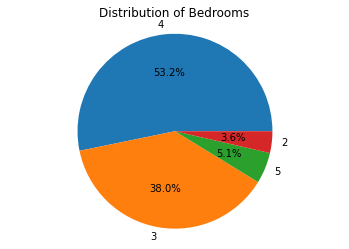

In [40]:
## eda using pie charts, graphs etc
# Calculate the percentage of each bedroom count
bedroom_counts = df3['BEDROOMS'].value_counts()
labels = bedroom_counts.index.tolist()
sizes = bedroom_counts.values.tolist()
total = sum(sizes)
percentage = [(count / total) * 100 for count in sizes]

# Plot the pie chart
plt.pie(percentage, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Bedrooms')
plt.axis('equal')
plt.show()

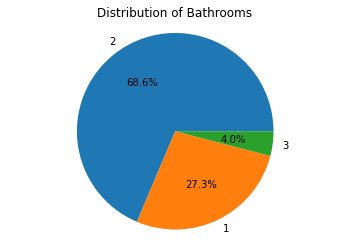

In [41]:
bedroom_counts = df3['BATHROOMS'].value_counts()
labels = bedroom_counts.index.tolist()
sizes = bedroom_counts.values.tolist()
total = sum(sizes)
percentage = [(count / total) * 100 for count in sizes]

# Plot the pie chart
plt.pie(percentage, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Bathrooms')
plt.axis('equal')
plt.show()

Wanted to see if there was any correlation between 'LAND_AREA' and 'FLOOR_AREA' as they are similar. In this case, the value is approximately 0.11666644, indicating a weak positive correlation between the two variables. 

In [42]:
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(df3['LAND_AREA'], df3['FLOOR_AREA'])

# Display the correlation matrix
print(correlation_matrix)

[[1.         0.11702093]
 [0.11702093 1.        ]]


### Label Encoding the Suburb_Status

In [43]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'SUBURB_STATUS' column if it exists in the DataFrame
if 'SUBURB_STATUS' in df3.columns:
    # Perform label encoding on the 'SUBURB_STATUS' column
    df3.loc[:, 'SUBURB_STATUS_CODE'] = label_encoder.fit_transform(df3['SUBURB_STATUS'])

    # Drop the original 'SUBURB_STATUS' column
    df3.drop(columns=['SUBURB_STATUS'], inplace=True)

# Now 'df3' contains only the 'SUBURB_STATUS_CODE' column and the other existing columns



C:\Users\hafee\AppData\Local\Temp\ipykernel_23472\3324934615.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'SUBURB_STATUS_CODE'] = label_encoder.fit_transform(df3['SUBURB_STATUS'])
C:\Users\hafee\AppData\Local\Temp\ipykernel_23472\3324934615.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(columns=['SUBURB_STATUS'], inplace=True)


In [44]:
df3

PRICE  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  \
0       565000         4          2       2        600         160   
2       287000         3          1       1        719          86   
3       255000         2          1       2        651          59   
4       325000         4          1       2        466         131   
5       409000         4          2       1        759         118   
...        ...       ...        ...     ...        ...         ...   
33651  1040000         4          3       2        292         245   
33652   410000         3          2       2        228         114   
33653   427000         3          2       2        261         112   
33654   295000         3          1       2        457          85   
33655   295000         3          1       2        296          95   

       BUILD_YEAR  CBD_DIST  NEAREST_STN_DIST  NEAREST_SCH_DIST  \
0            2003     18300              1800            828.34   
2            1979     22600              1900           1649.18   
3            1953     17900              3600           1571.40   
4            1998     11200              2000           1514.92   
5            1991     27300              1000           1227.22   
...           ...       ...               ...               ...   
33651        2013     16100              1500           1430.35   
33652        2000      9600              4600           1679.64   
33653        2000      9600              4600           1669.16   
33654        1974     12600              4400            358.49   
33655        2000     16700              1700           1055.56   

       SUBURB_STATUS_CODE  
0                       1  
2                       1  
3                       1  
4                       1  
5                       1  
...                   ...  
33651                   0  
33652                   1  
33653                   1  
33654                   1  
33655                   1  

[23172 rows x 11 columns]

# Model Building and Evaluation

In [45]:
#importing all necessary libraries for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import ensemble
from sklearn.model_selection import cross_val_predict, KFold
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

### Linear Regression , Ridge, Decision Tree

In [46]:
# Split the data into features (X) and target (y)
y = df3['PRICE']
X = df3.drop('PRICE', axis=1)

# Step 1: Split the data into training, validation, and testing sets with shuffling
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)

# Step 2: Scale features on the training, validation, and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [47]:
print("Number of features in X_train_scaled:", X_train_scaled.shape[1])

Number of features in X_train_scaled: 10


In [48]:
print(X_train_scaled.shape)

(16220, 10)


In [49]:
# Linear Regression
LR = LinearRegression()
LR.fit(X_train_scaled, y_train)

# Predict on the training set
y_pred_train_LR = LR.predict(X_train_scaled)
mse_train_LR = mean_squared_error(y_train, y_pred_train_LR)
mae_train_LR = mean_absolute_error(y_train, y_pred_train_LR)
r2_train_LR = r2_score(y_train, y_pred_train_LR)

# Predict on the validation set
y_pred_val_LR = LR.predict(X_val_scaled)
mse_val_LR = mean_squared_error(y_val, y_pred_val_LR)
mae_val_LR = mean_absolute_error(y_val, y_pred_val_LR)
r2_val_LR = r2_score(y_val, y_pred_val_LR)

# Predict on the testing set
y_pred_test_LR = LR.predict(X_test_scaled)
mse_test_LR = mean_squared_error(y_test, y_pred_test_LR)
mae_test_LR = mean_absolute_error(y_test, y_pred_test_LR)
r2_test_LR = r2_score(y_test, y_pred_test_LR)

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)

# Predict on the training set
y_pred_train_ridge = ridge.predict(X_train_scaled)
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
mae_train_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)

# Predict on the validation set
y_pred_val_ridge = ridge.predict(X_val_scaled)
mse_val_ridge = mean_squared_error(y_val, y_pred_val_ridge)
mae_val_ridge = mean_absolute_error(y_val, y_pred_val_ridge)
r2_val_ridge = r2_score(y_val, y_pred_val_ridge)

# Predict on the testing set
y_pred_test_ridge = ridge.predict(X_test_scaled)
mse_test_ridge = mean_squared_error(y_test, y_pred_test_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_pred_test_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)

# Decision Tree Regression
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)

# Predict on the training set
y_pred_train_dt = dt.predict(X_train_scaled)
mse_train_dt = mean_squared_error(y_train, y_pred_train_dt)
mae_train_dt = mean_absolute_error(y_train, y_pred_train_dt)
r2_train_dt = r2_score(y_train, y_pred_train_dt)

# Predict on the validation set
y_pred_val_dt = dt.predict(X_val_scaled)
mse_val_dt = mean_squared_error(y_val, y_pred_val_dt)
mae_val_dt = mean_absolute_error(y_val, y_pred_val_dt)
r2_val_dt = r2_score(y_val, y_pred_val_dt)

# Predict on the testing set
y_pred_test_dt = dt.predict(X_test_scaled)
mse_test_dt = mean_squared_error(y_test, y_pred_test_dt)
mae_test_dt = mean_absolute_error(y_test, y_pred_test_dt)
r2_test_dt = r2_score(y_test, y_pred_test_dt)

# Print the results
print("Linear Regression:")
print("Training MSE:", mse_train_LR)
print("Training MAE:", mae_train_LR)
print("Training R-squared:", r2_train_LR)
print("Validation MSE:", mse_val_LR)
print("Validation MAE:", mae_val_LR)
print("Validation R-squared:", r2_val_LR)
print("Testing MSE:", mse_test_LR)
print("Testing MAE:", mae_test_LR)
print("Testing R-squared:", r2_test_LR)

print("\nRidge Regression:")
print("Training MSE:", mse_train_ridge)
print("Training MAE:", mae_train_ridge)
print("Training R-squared:", r2_train_ridge)
print("Validation MSE:", mse_val_ridge)
print("Validation MAE:", mae_val_ridge)
print("Validation R-squared:", r2_val_ridge)
print("Testing MSE:", mse_test_ridge)
print("Testing MAE:", mae_test_ridge)
print("Testing R-squared:", r2_test_ridge)

print("\nDecision Tree Regression:")
print("Training MSE:", mse_train_dt)
print("Training MAE:", mae_train_dt)
print("Training R-squared:", r2_train_dt)
print("Validation MSE", mse_val_dt)
print("Validation MAE:", mae_val_dt)
print("Validation R-squared:", r2_val_dt)
print("Testing MSE:", mse_test_dt)
print("Testing MAE:", mae_test_dt)
print("Testing R-squared:", r2_test_dt)

Linear Regression:
Training MSE: 13414171673.803337
Training MAE: 85369.96209259542
Training R-squared: 0.744556187151475
Validation MSE: 12648899004.264214
Validation MAE: 82772.64911245402
Validation R-squared: 0.7419096383334315
Testing MSE: 13859433981.154234
Testing MAE: 86494.47601924065
Testing R-squared: 0.7435308053777144

Ridge Regression:
Training MSE: 13414171748.139307
Training MAE: 85369.01257772984
Training R-squared: 0.7445561857359076
Validation MSE: 12648855871.14715
Validation MAE: 82771.65398492748
Validation R-squared: 0.7419105184291441
Testing MSE: 13859443638.881428
Testing MAE: 86493.57410142741
Testing R-squared: 0.7435306266612157

Decision Tree Regression:
Training MSE: 12330.456226880395
Training MAE: 1.2330456226880395
Training R-squared: 0.999999765193198
Validation MSE 16994425401.5187
Validation MAE: 89830.45253164557
Validation R-squared: 0.6532427528502811
Testing MSE: 19594624513.342922
Testing MAE: 95198.87974683545
Testing R-squared: 0.637400951965

### Support Vector Regression


In [50]:
# SVR
svr = SVR(kernel='rbf')  
svr.fit(X_train_scaled, y_train)

# Predict on the validation set
y_pred_val_svr = svr.predict(X_val_scaled)
mse_val_svr = mean_squared_error(y_val, y_pred_val_svr)
mae_val_svr = mean_absolute_error(y_val, y_pred_val_svr)
r2_val_svr = r2_score(y_val, y_pred_val_svr)

# Predict on the testing set
y_pred_test_svr = svr.predict(X_test_scaled)
mse_test_svr = mean_squared_error(y_test, y_pred_test_svr)
mae_test_svr = mean_absolute_error(y_test, y_pred_test_svr)
r2_test_svr = r2_score(y_test, y_pred_test_svr)

# Print the results
print("\nSupport Vector Regression:")
print("Validation MSE:", mse_val_svr)
print("Validation MAE:", mae_val_svr)
print("Validation R-squared:", r2_val_svr)
print("Testing MSE:", mse_test_svr)
print("Testing MAE:", mae_test_svr)
print("Testing R-squared:", r2_test_svr)



Support Vector Regression:
Validation MSE: 50430174106.00473
Validation MAE: 165985.89039504464
Validation R-squared: -0.02898614887659079
Testing MSE: 56499447820.394615
Testing MAE: 175111.93554688693
Testing R-squared: -0.04552378537277568


### Gradient Boosting Regressor

In [51]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, y_train)

# Predict on the validation set
y_pred_val_gbr = gbr.predict(X_val_scaled)
mse_val_gbr = mean_squared_error(y_val, y_pred_val_gbr)
r2_val_gbr = r2_score(y_val, y_pred_val_gbr)

# Predict on the testing set
y_pred_test_gbr = gbr.predict(X_test_scaled)
mse_test_gbr = mean_squared_error(y_test, y_pred_test_gbr)
r2_test_gbr = r2_score(y_test, y_pred_test_gbr)

# Print the results
print("\nGradient Boosting Regressor:")
print("Validation MSE:", mse_val_gbr)
print("Validation R-squared:", r2_val_gbr)
print("Testing MSE:", mse_test_gbr)
print("Testing R-squared:", r2_test_gbr)


Gradient Boosting Regressor:
Validation MSE: 10577153314.393017
Validation R-squared: 0.7841819020458506
Testing MSE: 11398355786.994308
Testing R-squared: 0.7890731228501988


### Random Forest

In [52]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict on the training set
y_pred_train_rf = rf.predict(X_train_scaled)
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)

# Predict on the validation set
y_pred_val_rf = rf.predict(X_val_scaled)
mse_val_rf = mean_squared_error(y_val, y_pred_val_rf)
mae_val_rf = mean_absolute_error(y_val, y_pred_val_rf)
r2_val_rf = r2_score(y_val, y_pred_val_rf)

# Predict on the testing set
y_pred_test_rf = rf.predict(X_test_scaled)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

# Print the results
print("Random Forest Regression:")
print("Training MSE:", mse_train_rf)
print("Training MAE:", mae_train_rf)
print("Training R-squared:", r2_train_rf)
print("Validation MSE:", mse_val_rf)
print("Validation MAE:", mae_val_rf)
print("Validation R-squared:", r2_val_rf)
print("Testing MSE:", mse_test_rf)
print("Testing MAE:", mae_test_rf)
print("Testing R-squared:", r2_test_rf)

Random Forest Regression:
Training MSE: 1319573827.2750688
Training MAE: 25486.617680435673
Training R-squared: 0.9748715777633482
Validation MSE: 8471166013.083075
Validation MAE: 65925.274668201
Validation R-squared: 0.8271528376250694
Testing MSE: 9182791724.23163
Testing MAE: 67794.97725258917
Testing R-squared: 0.8300721947880199


Linear Regression and Ridge Regression: Both models perform quite well and have similar R-squared values on the validation and testing sets. They seem to generalize well and capture the variance in the data.

Decision Tree Regression: While the training R-squared is close to 1, indicating potential overfitting, the validation and testing R-squared values are lower compared to linear models and Random Forest. The model might be too complex and overfitting the training data.

Support Vector Regression (SVR): The negative R-squared values on both validation and testing sets indicate that the SVR model does not fit the data well and performs worse than a horizontal line.

Gradient Boosting Regressor: The model shows decent performance with better R-squared values than Decision Tree and SVR models. However, it falls behind the linear models and Random Forest in terms of generalization.

Random Forest Regression: Random Forest performs well, with high R-squared values on both validation and testing sets. It shows the best performance among all the models so far

## Trying other algorithms 

### LightGBM, XGBRegressor, Catboost

In [53]:
import lightgbm as lgb
from catboost import CatBoostRegressor
import xgboost as xgb

In [54]:
# LightGBM Regressor
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train_scaled, y_train)

# Predict on the training set
y_pred_train_lgb = lgb_model.predict(X_train_scaled)
mse_train_lgb = mean_squared_error(y_train, y_pred_train_lgb)
r2_train_lgb = r2_score(y_train, y_pred_train_lgb)

# Predict on the validation set
y_pred_val_lgb = lgb_model.predict(X_val_scaled)
mse_val_lgb = mean_squared_error(y_val, y_pred_val_lgb)
r2_val_lgb = r2_score(y_val, y_pred_val_lgb)

# Predict on the testing set
y_pred_test_lgb = lgb_model.predict(X_test_scaled)
mse_test_lgb = mean_squared_error(y_test, y_pred_test_lgb)
r2_test_lgb = r2_score(y_test, y_pred_test_lgb)

# Print the results
print("\nLightGBM Regressor:")
print("Training MSE:", mse_train_lgb)
print("Training R-squared:", r2_train_lgb)
print("Validation MSE:", mse_val_lgb)
print("Validation R-squared:", r2_val_lgb)
print("Testing MSE:", mse_test_lgb)
print("Testing R-squared:", r2_test_lgb)


LightGBM Regressor:
Training MSE: 7422768492.169469
Training R-squared: 0.8586494692598442
Validation MSE: 8975505475.504763
Validation R-squared: 0.8168622064630011
Testing MSE: 9823898558.680458
Testing R-squared: 0.8182084957566226


Based on the performance metrics, the Random Forest Regression model seems to perform better on the training set as compared to the LightGBM Regressor. It has a lower Training MSE, Training MAE, and higher Training R-squared, indicating that it fits the training data better.

However, when we look at the validation and testing sets, the LightGBM Regressor outperforms the Random Forest Regression. The LightGBM model has lower Validation MSE, Validation MAE, and higher Validation R-squared, indicating better generalization on unseen data (validation set). Similarly, it also has lower Testing MSE, Testing MAE, and higher Testing R-squared, suggesting better performance on new data (testing set).

In [55]:
# CatBoost Regressor
cat_model = CatBoostRegressor()
cat_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_pred_val_cat = cat_model.predict(X_val_scaled)
mse_val_cat = mean_squared_error(y_val, y_pred_val_cat)
r2_val_cat = r2_score(y_val, y_pred_val_cat)

# Predict on the testing set
y_pred_test_cat = cat_model.predict(X_test_scaled)
mse_test_cat = mean_squared_error(y_test, y_pred_test_cat)
r2_test_cat = r2_score(y_test, y_pred_test_cat)

# Print the results
print("\nCatBoost Regressor:")
print("Validation MSE:", mse_val_cat)
print("Validation R-squared:", r2_val_cat)
print("Testing MSE:", mse_test_cat)
print("Testing R-squared:", r2_test_cat)

Learning rate set to 0.063587
0:	learn: 218686.1084501	total: 165ms	remaining: 2m 44s
1:	learn: 208928.0104651	total: 174ms	remaining: 1m 26s
2:	learn: 200471.7696619	total: 181ms	remaining: 1m
3:	learn: 192491.1297220	total: 188ms	remaining: 46.7s
4:	learn: 184919.1550596	total: 193ms	remaining: 38.4s
5:	learn: 177915.5981416	total: 197ms	remaining: 32.6s
6:	learn: 171623.7762412	total: 200ms	remaining: 28.3s
7:	learn: 166167.7534010	total: 202ms	remaining: 25.1s
8:	learn: 161072.9938203	total: 205ms	remaining: 22.6s
9:	learn: 156201.7381479	total: 209ms	remaining: 20.6s
10:	learn: 151669.5046159	total: 211ms	remaining: 19s
11:	learn: 147593.4868385	total: 213ms	remaining: 17.5s
12:	learn: 144034.8959314	total: 215ms	remaining: 16.4s
13:	learn: 140902.5867645	total: 217ms	remaining: 15.3s
14:	learn: 137900.9837494	total: 219ms	remaining: 14.4s
15:	learn: 135151.8294926	total: 222ms	remaining: 13.6s
16:	learn: 132717.8895693	total: 224ms	remaining: 13s
17:	learn: 130447.4492513	total: 

149:	learn: 100396.4031084	total: 540ms	remaining: 3.06s
150:	learn: 100289.5893055	total: 543ms	remaining: 3.05s
151:	learn: 100265.1407400	total: 545ms	remaining: 3.04s
152:	learn: 100188.5603062	total: 547ms	remaining: 3.03s
153:	learn: 100087.1658677	total: 550ms	remaining: 3.02s
154:	learn: 100058.3250555	total: 552ms	remaining: 3.01s
155:	learn: 99991.9187938	total: 555ms	remaining: 3s
156:	learn: 99966.7020062	total: 558ms	remaining: 2.99s
157:	learn: 99866.4982617	total: 560ms	remaining: 2.98s
158:	learn: 99810.2905868	total: 563ms	remaining: 2.98s
159:	learn: 99751.3451286	total: 566ms	remaining: 2.97s
160:	learn: 99713.6711545	total: 568ms	remaining: 2.96s
161:	learn: 99635.6764272	total: 570ms	remaining: 2.95s
162:	learn: 99566.3344124	total: 572ms	remaining: 2.94s
163:	learn: 99538.3968174	total: 575ms	remaining: 2.93s
164:	learn: 99479.7336731	total: 577ms	remaining: 2.92s
165:	learn: 99407.4451509	total: 579ms	remaining: 2.91s
166:	learn: 99298.1056370	total: 581ms	remain

365:	learn: 91979.7631810	total: 1.05s	remaining: 1.81s
366:	learn: 91925.9081277	total: 1.05s	remaining: 1.81s
367:	learn: 91896.1578117	total: 1.05s	remaining: 1.81s
368:	learn: 91876.6156010	total: 1.05s	remaining: 1.8s
369:	learn: 91853.1338156	total: 1.06s	remaining: 1.8s
370:	learn: 91815.9422936	total: 1.06s	remaining: 1.8s
371:	learn: 91788.0149302	total: 1.06s	remaining: 1.79s
372:	learn: 91761.6927252	total: 1.06s	remaining: 1.79s
373:	learn: 91751.1495691	total: 1.07s	remaining: 1.78s
374:	learn: 91719.1532539	total: 1.07s	remaining: 1.78s
375:	learn: 91684.3023815	total: 1.07s	remaining: 1.78s
376:	learn: 91655.2164294	total: 1.07s	remaining: 1.77s
377:	learn: 91641.3047518	total: 1.07s	remaining: 1.77s
378:	learn: 91617.9828047	total: 1.08s	remaining: 1.77s
379:	learn: 91598.8408057	total: 1.08s	remaining: 1.76s
380:	learn: 91582.5340880	total: 1.08s	remaining: 1.76s
381:	learn: 91544.0452733	total: 1.08s	remaining: 1.75s
382:	learn: 91527.8141369	total: 1.09s	remaining: 1

538:	learn: 87727.8789956	total: 1.42s	remaining: 1.22s
539:	learn: 87707.0896321	total: 1.43s	remaining: 1.21s
540:	learn: 87685.7831898	total: 1.43s	remaining: 1.21s
541:	learn: 87661.6706262	total: 1.43s	remaining: 1.21s
542:	learn: 87636.6247187	total: 1.43s	remaining: 1.21s
543:	learn: 87622.9996629	total: 1.44s	remaining: 1.2s
544:	learn: 87595.1923512	total: 1.44s	remaining: 1.2s
545:	learn: 87561.1908464	total: 1.44s	remaining: 1.2s
546:	learn: 87546.7304456	total: 1.44s	remaining: 1.19s
547:	learn: 87524.9072530	total: 1.45s	remaining: 1.19s
548:	learn: 87507.8934730	total: 1.45s	remaining: 1.19s
549:	learn: 87483.3687592	total: 1.45s	remaining: 1.19s
550:	learn: 87455.2601955	total: 1.45s	remaining: 1.18s
551:	learn: 87435.9702918	total: 1.45s	remaining: 1.18s
552:	learn: 87419.4799850	total: 1.46s	remaining: 1.18s
553:	learn: 87378.9727703	total: 1.46s	remaining: 1.17s
554:	learn: 87362.0543703	total: 1.46s	remaining: 1.17s
555:	learn: 87331.9249432	total: 1.46s	remaining: 1

694:	learn: 84495.6842411	total: 1.78s	remaining: 780ms
695:	learn: 84474.6776573	total: 1.78s	remaining: 778ms
696:	learn: 84457.3077486	total: 1.78s	remaining: 775ms
697:	learn: 84419.6503882	total: 1.78s	remaining: 773ms
698:	learn: 84395.3989645	total: 1.79s	remaining: 770ms
699:	learn: 84381.8815486	total: 1.79s	remaining: 768ms
700:	learn: 84360.8614499	total: 1.79s	remaining: 765ms
701:	learn: 84342.0333904	total: 1.8s	remaining: 763ms
702:	learn: 84323.7569286	total: 1.8s	remaining: 760ms
703:	learn: 84305.9099239	total: 1.8s	remaining: 758ms
704:	learn: 84274.3486134	total: 1.8s	remaining: 755ms
705:	learn: 84266.0308158	total: 1.8s	remaining: 752ms
706:	learn: 84246.5905057	total: 1.81s	remaining: 749ms
707:	learn: 84225.3078652	total: 1.81s	remaining: 747ms
708:	learn: 84203.8398484	total: 1.81s	remaining: 744ms
709:	learn: 84187.8152742	total: 1.81s	remaining: 741ms
710:	learn: 84177.1454521	total: 1.82s	remaining: 739ms
711:	learn: 84159.5694063	total: 1.82s	remaining: 736

866:	learn: 81492.1666881	total: 2.16s	remaining: 331ms
867:	learn: 81484.6989979	total: 2.16s	remaining: 328ms
868:	learn: 81471.7827003	total: 2.16s	remaining: 326ms
869:	learn: 81455.8837113	total: 2.16s	remaining: 323ms
870:	learn: 81439.2312941	total: 2.17s	remaining: 321ms
871:	learn: 81426.6191407	total: 2.17s	remaining: 318ms
872:	learn: 81403.3052845	total: 2.17s	remaining: 316ms
873:	learn: 81393.4735501	total: 2.17s	remaining: 313ms
874:	learn: 81385.5285715	total: 2.17s	remaining: 311ms
875:	learn: 81372.2669511	total: 2.18s	remaining: 308ms
876:	learn: 81354.8811376	total: 2.18s	remaining: 306ms
877:	learn: 81339.0868788	total: 2.18s	remaining: 303ms
878:	learn: 81321.9250243	total: 2.18s	remaining: 301ms
879:	learn: 81302.8291785	total: 2.19s	remaining: 298ms
880:	learn: 81283.5322283	total: 2.19s	remaining: 296ms
881:	learn: 81273.0870790	total: 2.19s	remaining: 293ms
882:	learn: 81263.8452681	total: 2.19s	remaining: 290ms
883:	learn: 81250.0717706	total: 2.19s	remaining

In [56]:
# XGBRegressor
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)

# Predict on the validation set
y_pred_val_xgb = xgb_model.predict(X_val_scaled)
mse_val_xgb = mean_squared_error(y_val, y_pred_val_xgb)
r2_val_xgb = r2_score(y_val, y_pred_val_xgb)

# Predict on the testing set
y_pred_test_xgb = xgb_model.predict(X_test_scaled)
mse_test_xgb = mean_squared_error(y_test, y_pred_test_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)

# Print the results
print("\nXGBRegressor:")
print("Validation MSE:", mse_val_xgb)
print("Validation R-squared:", r2_val_xgb)
print("Testing MSE:", mse_test_xgb)
print("Testing R-squared:", r2_test_xgb)


XGBRegressor:
Validation MSE: 9201191686.288797
Validation R-squared: 0.8122572652942265
Testing MSE: 9828729083.60557
Testing R-squared: 0.8181191067643426


LightGBM Regressor and CatBoost Regressor: These two models perform the best among all models, with CatBoost showing the highest R-squared on both validation and testing sets.

### Hyper-parameter tuning (lgbm, random forest, catboost, gradient boosting)

In [57]:
# Random Forest Regression
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid to search through
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    # Add other hyperparameters as needed
}

# Perform Randomized Search using RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42
)
random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and create a new Random Forest model
best_rf = random_search.best_estimator_

# Predict on the training set
y_pred_train_rf = best_rf.predict(X_train_scaled)
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)

# Predict on the validation set
y_pred_val_rf = best_rf.predict(X_val_scaled)
mse_val_rf = mean_squared_error(y_val, y_pred_val_rf)
mae_val_rf = mean_absolute_error(y_val, y_pred_val_rf)
r2_val_rf = r2_score(y_val, y_pred_val_rf)

# Predict on the testing set
y_pred_test_rf = best_rf.predict(X_test_scaled)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

# Print the results
print("Random Forest Regression (Best Model):")
print("Training MSE:", mse_train_rf)
print("Training MAE:", mae_train_rf)
print("Training R-squared:", r2_train_rf)
print("Validation MSE:", mse_val_rf)
print("Validation MAE:", mae_val_rf)
print("Validation R-squared:", r2_val_rf)
print("Testing MSE:", mse_test_rf)
print("Testing MAE:", mae_test_rf)
print("Testing R-squared:", r2_test_rf)

Random Forest Regression (Best Model):
Training MSE: 4625664619.572189
Training MAE: 47728.77033445222
Training R-squared: 0.9119142474007847
Validation MSE: 8555434863.908692
Validation MAE: 66326.02751544866
Validation R-squared: 0.8254334011603244
Testing MSE: 9373667402.17904
Testing MAE: 68549.14657165362
Testing R-squared: 0.8265400352883807


In [58]:
# Gradient Boosting Regression
gb = ensemble.GradientBoostingRegressor(
    n_estimators=1000, #how many decision trees to build
    learning_rate=0.1, #how much decision trees influence overall prediction
    max_depth=6, #maximum depth of the individual regression estimators.
    min_samples_leaf=9, #The minimum number of samples required to be at a leaf node.
    max_features=0.1, #If float, then max_features is a percentage (max_features * n_features) features are considered at each split.
    loss='huber',
    random_state=7
)

# Fit the model on the training data
gb.fit(X_train, y_train)

# Predict on training set
y_pred_train = gb.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Predict on validation set
y_pred_val = gb.predict(X_val)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

# Predict on testing set
y_pred_test = gb.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the results
print("Training MSE:", mse_train)
print("Training R-squared:", r2_train)
print("Validation MSE:", mse_val)
print("Validation R-squared:", r2_val)
print("Testing MSE:", mse_test)
print("Testing R-squared:", r2_test)


Training MSE: 4954854522.656023
Training R-squared: 0.9056455394969497
Validation MSE: 9483127192.439474
Validation R-squared: 0.8065046036021263
Testing MSE: 10252824179.208914
Testing R-squared: 0.8102712157349867


In [59]:
# Create the CatBoost Regressor
cat_model = CatBoostRegressor()

# Define the hyperparameter grid to search over
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],        # Learning rate
    'depth': [3, 5, 7],                       # Depth of the trees
    'n_estimators': [100, 200, 300],          # Number of boosting iterations (trees)
    'l2_leaf_reg': [1, 3, 5],                 # L2 regularization coefficient
    # Add more hyperparameters as needed...
}

# Create the GridSearchCV object
grid_search = GridSearchCV(cat_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_

# Create a new CatBoost Regressor with the best hyperparameters
best_cat_model = CatBoostRegressor(**best_params)

# Fit the model with the best hyperparameters on the training data
best_cat_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val_cat = best_cat_model.predict(X_val)
mse_val_cat = mean_squared_error(y_val, y_pred_val_cat)
r2_val_cat = r2_score(y_val, y_pred_val_cat)

# Predict on the testing set
y_pred_test_cat = best_cat_model.predict(X_test)
mse_test_cat = mean_squared_error(y_test, y_pred_test_cat)
r2_test_cat = r2_score(y_test, y_pred_test_cat)

# Print the results with the best hyperparameters
print("\nCatBoost Regressor (Best Hyperparameters):")
print("Best Hyperparameters:", best_params)
print("Validation MSE:", mse_val_cat)
print("Validation R-squared:", r2_val_cat)
print("Testing MSE:", mse_test_cat)
print("Testing R-squared:", r2_test_cat)

0:	learn: 226790.6538679	total: 1.76ms	remaining: 175ms
1:	learn: 225205.7877682	total: 3.59ms	remaining: 176ms
2:	learn: 223691.0914532	total: 5.04ms	remaining: 163ms
3:	learn: 222131.6788151	total: 6.68ms	remaining: 160ms
4:	learn: 220679.9081916	total: 8.24ms	remaining: 157ms
5:	learn: 219212.5582941	total: 9.67ms	remaining: 152ms
6:	learn: 217766.4958582	total: 11.1ms	remaining: 147ms
7:	learn: 216330.7521663	total: 12.4ms	remaining: 143ms
8:	learn: 214911.8367831	total: 13.9ms	remaining: 140ms
9:	learn: 213551.0574005	total: 15.3ms	remaining: 138ms
10:	learn: 212113.7741429	total: 16.7ms	remaining: 135ms
11:	learn: 210746.0306290	total: 18ms	remaining: 132ms
12:	learn: 209404.1161555	total: 19.5ms	remaining: 130ms
13:	learn: 208072.8135577	total: 20.9ms	remaining: 128ms
14:	learn: 206803.9692972	total: 22.3ms	remaining: 126ms
15:	learn: 205516.3239911	total: 23.6ms	remaining: 124ms
16:	learn: 204188.1449854	total: 25ms	remaining: 122ms
17:	learn: 202893.2560844	total: 26.4ms	remai

99:	learn: 141448.3350488	total: 136ms	remaining: 0us
0:	learn: 227249.2799456	total: 1.71ms	remaining: 169ms
1:	learn: 225661.1407825	total: 3.38ms	remaining: 165ms
2:	learn: 224141.0101594	total: 4.9ms	remaining: 158ms
3:	learn: 222612.5890436	total: 6.45ms	remaining: 155ms
4:	learn: 221154.7026220	total: 8.04ms	remaining: 153ms
5:	learn: 219684.9108287	total: 9.44ms	remaining: 148ms
6:	learn: 218231.4902105	total: 10.9ms	remaining: 144ms
7:	learn: 216788.2010683	total: 12.3ms	remaining: 142ms
8:	learn: 215365.6206162	total: 13.9ms	remaining: 140ms
9:	learn: 213999.8396353	total: 15.4ms	remaining: 139ms
10:	learn: 212559.4529116	total: 16.8ms	remaining: 136ms
11:	learn: 211187.7681429	total: 18.5ms	remaining: 136ms
12:	learn: 209843.4396085	total: 20.1ms	remaining: 135ms
13:	learn: 208537.1103880	total: 21.6ms	remaining: 132ms
14:	learn: 207261.8767949	total: 23.1ms	remaining: 131ms
15:	learn: 205966.5229661	total: 24.5ms	remaining: 129ms
16:	learn: 204638.0824969	total: 25.8ms	remai

9:	learn: 214891.4450293	total: 14.9ms	remaining: 135ms
10:	learn: 213438.9084832	total: 16.8ms	remaining: 136ms
11:	learn: 212058.4649863	total: 18.3ms	remaining: 134ms
12:	learn: 210709.0694987	total: 19.8ms	remaining: 133ms
13:	learn: 209318.7407978	total: 21.3ms	remaining: 131ms
14:	learn: 208037.5020849	total: 22.7ms	remaining: 129ms
15:	learn: 206735.8875390	total: 24.1ms	remaining: 126ms
16:	learn: 205388.7939959	total: 25.4ms	remaining: 124ms
17:	learn: 204132.1419726	total: 26.7ms	remaining: 121ms
18:	learn: 202898.1495743	total: 28ms	remaining: 119ms
19:	learn: 201676.0058211	total: 29.3ms	remaining: 117ms
20:	learn: 200498.4796218	total: 30.7ms	remaining: 116ms
21:	learn: 199298.1495619	total: 32.2ms	remaining: 114ms
22:	learn: 198168.3964440	total: 33.6ms	remaining: 113ms
23:	learn: 196945.2433855	total: 35.2ms	remaining: 111ms
24:	learn: 195734.4765523	total: 36.5ms	remaining: 110ms
25:	learn: 194565.2354789	total: 38ms	remaining: 108ms
26:	learn: 193409.9690593	total: 39.

184:	learn: 121995.5025830	total: 226ms	remaining: 18.3ms
185:	learn: 121885.7995029	total: 227ms	remaining: 17.1ms
186:	learn: 121778.6807181	total: 228ms	remaining: 15.9ms
187:	learn: 121658.5018241	total: 229ms	remaining: 14.6ms
188:	learn: 121541.1438061	total: 230ms	remaining: 13.4ms
189:	learn: 121437.4556185	total: 232ms	remaining: 12.2ms
190:	learn: 121321.3081216	total: 233ms	remaining: 11ms
191:	learn: 121207.8208162	total: 234ms	remaining: 9.75ms
192:	learn: 121100.3112248	total: 235ms	remaining: 8.53ms
193:	learn: 121000.9894278	total: 236ms	remaining: 7.31ms
194:	learn: 120899.4712516	total: 238ms	remaining: 6.09ms
195:	learn: 120796.2221857	total: 239ms	remaining: 4.87ms
196:	learn: 120706.3692598	total: 240ms	remaining: 3.65ms
197:	learn: 120609.1834659	total: 241ms	remaining: 2.43ms
198:	learn: 120518.2590058	total: 242ms	remaining: 1.22ms
199:	learn: 120433.2716260	total: 244ms	remaining: 0us
0:	learn: 228108.0399683	total: 1.32ms	remaining: 263ms
1:	learn: 226508.4619

35:	learn: 183212.7822462	total: 47.1ms	remaining: 215ms
36:	learn: 182266.0239547	total: 48.6ms	remaining: 214ms
37:	learn: 181304.1135839	total: 49.8ms	remaining: 212ms
38:	learn: 180357.7160670	total: 50.9ms	remaining: 210ms
39:	learn: 179405.2610730	total: 52.1ms	remaining: 208ms
40:	learn: 178443.4625651	total: 53.2ms	remaining: 206ms
41:	learn: 177525.7922607	total: 54.4ms	remaining: 205ms
42:	learn: 176623.2820049	total: 55.5ms	remaining: 203ms
43:	learn: 175749.8500131	total: 56.7ms	remaining: 201ms
44:	learn: 174842.6374906	total: 57.8ms	remaining: 199ms
45:	learn: 173932.5937176	total: 59.1ms	remaining: 198ms
46:	learn: 173034.3340609	total: 60.3ms	remaining: 196ms
47:	learn: 172209.8102191	total: 61.5ms	remaining: 195ms
48:	learn: 171341.4558086	total: 62.8ms	remaining: 194ms
49:	learn: 170497.0785377	total: 64.1ms	remaining: 192ms
50:	learn: 169662.9555323	total: 65.3ms	remaining: 191ms
51:	learn: 168879.2883753	total: 66.4ms	remaining: 189ms
52:	learn: 168069.2628030	total

1:	learn: 226023.9483514	total: 2.92ms	remaining: 290ms
2:	learn: 224502.6313805	total: 4.28ms	remaining: 281ms
3:	learn: 222972.4884238	total: 5.55ms	remaining: 272ms
4:	learn: 221512.3130702	total: 6.74ms	remaining: 263ms
5:	learn: 220037.9769330	total: 7.95ms	remaining: 257ms
6:	learn: 218582.0214890	total: 9.13ms	remaining: 252ms
7:	learn: 217138.2475292	total: 10.3ms	remaining: 247ms
8:	learn: 215707.8805595	total: 11.5ms	remaining: 244ms
9:	learn: 214339.2434756	total: 12.7ms	remaining: 241ms
10:	learn: 212900.7885589	total: 13.9ms	remaining: 238ms
11:	learn: 211527.6373365	total: 15ms	remaining: 236ms
12:	learn: 210181.2068598	total: 16.3ms	remaining: 234ms
13:	learn: 208839.1570021	total: 17.5ms	remaining: 232ms
14:	learn: 207564.1541092	total: 18.8ms	remaining: 231ms
15:	learn: 206266.3576928	total: 20ms	remaining: 230ms
16:	learn: 204938.9852929	total: 21.3ms	remaining: 230ms
17:	learn: 203641.3407231	total: 22.6ms	remaining: 229ms
18:	learn: 202408.5929726	total: 23.9ms	rema

145:	learn: 128506.1996784	total: 176ms	remaining: 65ms
146:	learn: 128322.9655532	total: 177ms	remaining: 63.8ms
147:	learn: 128129.4540664	total: 178ms	remaining: 62.6ms
148:	learn: 127930.9360577	total: 179ms	remaining: 61.4ms
149:	learn: 127757.1580267	total: 181ms	remaining: 60.2ms
150:	learn: 127567.9381794	total: 182ms	remaining: 59ms
151:	learn: 127392.9727384	total: 183ms	remaining: 57.7ms
152:	learn: 127223.3276778	total: 184ms	remaining: 56.5ms
153:	learn: 127045.1964104	total: 185ms	remaining: 55.3ms
154:	learn: 126869.7623487	total: 186ms	remaining: 54.1ms
155:	learn: 126707.9093913	total: 187ms	remaining: 52.9ms
156:	learn: 126531.2573169	total: 189ms	remaining: 51.7ms
157:	learn: 126347.1569708	total: 190ms	remaining: 50.4ms
158:	learn: 126168.5258443	total: 191ms	remaining: 49.2ms
159:	learn: 125984.5839666	total: 192ms	remaining: 48.1ms
160:	learn: 125830.4915355	total: 194ms	remaining: 47ms
161:	learn: 125660.7342416	total: 195ms	remaining: 45.8ms
162:	learn: 125504.8

194:	learn: 121404.2774470	total: 234ms	remaining: 6ms
195:	learn: 121306.9999996	total: 235ms	remaining: 4.8ms
196:	learn: 121206.6307777	total: 237ms	remaining: 3.6ms
197:	learn: 121104.9659039	total: 238ms	remaining: 2.4ms
198:	learn: 120997.7607001	total: 239ms	remaining: 1.2ms
199:	learn: 120894.3910908	total: 240ms	remaining: 0us
0:	learn: 226790.6538679	total: 1.44ms	remaining: 432ms
1:	learn: 225205.7877682	total: 3.08ms	remaining: 459ms
2:	learn: 223691.0914532	total: 4.52ms	remaining: 447ms
3:	learn: 222131.6788151	total: 5.86ms	remaining: 433ms
4:	learn: 220679.9081916	total: 7.12ms	remaining: 420ms
5:	learn: 219212.5582941	total: 8.45ms	remaining: 414ms
6:	learn: 217766.4958582	total: 9.7ms	remaining: 406ms
7:	learn: 216330.7521663	total: 11ms	remaining: 401ms
8:	learn: 214911.8367831	total: 12.2ms	remaining: 396ms
9:	learn: 213551.0574005	total: 13.5ms	remaining: 391ms
10:	learn: 212113.7741429	total: 14.8ms	remaining: 389ms
11:	learn: 210746.0306290	total: 16ms	remaining:

148:	learn: 127304.6183994	total: 184ms	remaining: 186ms
149:	learn: 127121.7764615	total: 185ms	remaining: 185ms
150:	learn: 126932.5801185	total: 186ms	remaining: 184ms
151:	learn: 126755.5920285	total: 188ms	remaining: 183ms
152:	learn: 126558.0109884	total: 189ms	remaining: 182ms
153:	learn: 126376.1020888	total: 191ms	remaining: 181ms
154:	learn: 126210.7116203	total: 192ms	remaining: 179ms
155:	learn: 126035.1592064	total: 193ms	remaining: 178ms
156:	learn: 125854.7922961	total: 194ms	remaining: 177ms
157:	learn: 125696.0664163	total: 195ms	remaining: 176ms
158:	learn: 125544.2441269	total: 196ms	remaining: 174ms
159:	learn: 125376.1369816	total: 198ms	remaining: 173ms
160:	learn: 125212.1906591	total: 199ms	remaining: 172ms
161:	learn: 125062.0455919	total: 200ms	remaining: 170ms
162:	learn: 124903.7542360	total: 201ms	remaining: 169ms
163:	learn: 124764.1127017	total: 202ms	remaining: 168ms
164:	learn: 124608.2944168	total: 203ms	remaining: 166ms
165:	learn: 124454.7128403	tota

0:	learn: 228108.0399683	total: 1.36ms	remaining: 408ms
1:	learn: 226508.4619848	total: 2.95ms	remaining: 439ms
2:	learn: 224981.3512947	total: 4.38ms	remaining: 434ms
3:	learn: 223406.4955088	total: 5.61ms	remaining: 415ms
4:	learn: 221942.6163801	total: 6.83ms	remaining: 403ms
5:	learn: 220465.1656713	total: 8.09ms	remaining: 397ms
6:	learn: 219001.8365819	total: 9.36ms	remaining: 392ms
7:	learn: 217548.9308255	total: 10.6ms	remaining: 386ms
8:	learn: 216112.5606336	total: 11.8ms	remaining: 380ms
9:	learn: 214742.9747079	total: 13ms	remaining: 376ms
10:	learn: 213293.5748062	total: 14.2ms	remaining: 372ms
11:	learn: 211913.7572809	total: 15.3ms	remaining: 368ms
12:	learn: 210562.8081659	total: 16.5ms	remaining: 365ms
13:	learn: 209174.2840548	total: 17.7ms	remaining: 362ms
14:	learn: 207894.3155630	total: 18.9ms	remaining: 360ms
15:	learn: 206590.5541705	total: 20.1ms	remaining: 357ms
16:	learn: 205246.7758004	total: 21.3ms	remaining: 355ms
17:	learn: 203954.0949229	total: 22.5ms	rem

238:	learn: 117768.2073163	total: 294ms	remaining: 75.1ms
239:	learn: 117696.6155570	total: 296ms	remaining: 73.9ms
240:	learn: 117640.1886311	total: 297ms	remaining: 72.7ms
241:	learn: 117571.7649269	total: 298ms	remaining: 71.5ms
242:	learn: 117503.8983310	total: 300ms	remaining: 70.3ms
243:	learn: 117447.6540225	total: 301ms	remaining: 69ms
244:	learn: 117393.8771943	total: 302ms	remaining: 67.8ms
245:	learn: 117334.5713381	total: 303ms	remaining: 66.6ms
246:	learn: 117276.7965593	total: 304ms	remaining: 65.3ms
247:	learn: 117222.3530137	total: 306ms	remaining: 64.1ms
248:	learn: 117159.4858796	total: 307ms	remaining: 62.9ms
249:	learn: 117101.9918117	total: 308ms	remaining: 61.7ms
250:	learn: 117055.6628037	total: 310ms	remaining: 60.5ms
251:	learn: 117004.9609704	total: 311ms	remaining: 59.3ms
252:	learn: 116946.9224371	total: 312ms	remaining: 58ms
253:	learn: 116894.2432122	total: 314ms	remaining: 56.8ms
254:	learn: 116835.3313464	total: 315ms	remaining: 55.6ms
255:	learn: 116774

88:	learn: 146112.4663333	total: 110ms	remaining: 262ms
89:	learn: 145639.8231040	total: 112ms	remaining: 261ms
90:	learn: 145165.0679892	total: 113ms	remaining: 260ms
91:	learn: 144726.2392303	total: 115ms	remaining: 259ms
92:	learn: 144293.4698405	total: 116ms	remaining: 258ms
93:	learn: 143849.2495388	total: 117ms	remaining: 257ms
94:	learn: 143412.3066130	total: 118ms	remaining: 255ms
95:	learn: 142962.5783854	total: 119ms	remaining: 254ms
96:	learn: 142533.5278611	total: 121ms	remaining: 252ms
97:	learn: 142102.9014594	total: 122ms	remaining: 251ms
98:	learn: 141713.0648560	total: 123ms	remaining: 250ms
99:	learn: 141340.2244897	total: 124ms	remaining: 248ms
100:	learn: 140930.9363785	total: 125ms	remaining: 247ms
101:	learn: 140533.8080070	total: 126ms	remaining: 246ms
102:	learn: 140166.9746587	total: 128ms	remaining: 244ms
103:	learn: 139774.6813406	total: 129ms	remaining: 243ms
104:	learn: 139414.0693124	total: 130ms	remaining: 242ms
105:	learn: 139061.6770808	total: 131ms	rem

13:	learn: 208839.1570021	total: 18.3ms	remaining: 375ms
14:	learn: 207564.1541092	total: 19.7ms	remaining: 374ms
15:	learn: 206266.3576928	total: 20.9ms	remaining: 372ms
16:	learn: 204938.9852929	total: 22.2ms	remaining: 369ms
17:	learn: 203641.3407231	total: 23.4ms	remaining: 367ms
18:	learn: 202408.5929726	total: 24.8ms	remaining: 367ms
19:	learn: 201191.5676520	total: 26.2ms	remaining: 367ms
20:	learn: 200018.9056861	total: 27.8ms	remaining: 369ms
21:	learn: 198868.5562822	total: 29ms	remaining: 366ms
22:	learn: 197740.1359166	total: 30.1ms	remaining: 363ms
23:	learn: 196525.0115394	total: 31.3ms	remaining: 360ms
24:	learn: 195339.1542442	total: 32.5ms	remaining: 357ms
25:	learn: 194174.4115088	total: 33.6ms	remaining: 354ms
26:	learn: 193028.6891251	total: 35.2ms	remaining: 356ms
27:	learn: 191941.1527567	total: 36.6ms	remaining: 356ms
28:	learn: 190838.6748512	total: 37.9ms	remaining: 354ms
29:	learn: 189701.9435458	total: 39.2ms	remaining: 353ms
30:	learn: 188600.2185692	total: 

159:	learn: 125984.5839666	total: 198ms	remaining: 174ms
160:	learn: 125830.4915355	total: 200ms	remaining: 172ms
161:	learn: 125660.7342416	total: 201ms	remaining: 171ms
162:	learn: 125504.8720787	total: 202ms	remaining: 170ms
163:	learn: 125363.1226254	total: 203ms	remaining: 169ms
164:	learn: 125198.0023018	total: 204ms	remaining: 167ms
165:	learn: 125041.3871669	total: 206ms	remaining: 166ms
166:	learn: 124892.3701082	total: 207ms	remaining: 165ms
167:	learn: 124746.5998023	total: 208ms	remaining: 163ms
168:	learn: 124602.3241538	total: 209ms	remaining: 162ms
169:	learn: 124467.4478913	total: 211ms	remaining: 161ms
170:	learn: 124322.2327388	total: 212ms	remaining: 160ms
171:	learn: 124195.5510887	total: 213ms	remaining: 159ms
172:	learn: 124056.8089536	total: 215ms	remaining: 158ms
173:	learn: 123921.1235636	total: 216ms	remaining: 156ms
174:	learn: 123790.8998588	total: 217ms	remaining: 155ms
175:	learn: 123656.6591561	total: 218ms	remaining: 154ms
176:	learn: 123538.2330242	tota

15:	learn: 206735.8875390	total: 21.2ms	remaining: 376ms
16:	learn: 205388.7939959	total: 23ms	remaining: 382ms
17:	learn: 204132.1419726	total: 24.5ms	remaining: 384ms
18:	learn: 202898.1495743	total: 25.9ms	remaining: 384ms
19:	learn: 201676.0058211	total: 27.2ms	remaining: 381ms
20:	learn: 200498.4796218	total: 28.6ms	remaining: 381ms
21:	learn: 199298.1495619	total: 30ms	remaining: 379ms
22:	learn: 198168.3964440	total: 31.3ms	remaining: 377ms
23:	learn: 196945.2433855	total: 32.7ms	remaining: 376ms
24:	learn: 195734.4765523	total: 34ms	remaining: 374ms
25:	learn: 194565.2354789	total: 35.4ms	remaining: 373ms
26:	learn: 193409.9690593	total: 36.9ms	remaining: 373ms
27:	learn: 192319.7626232	total: 38.4ms	remaining: 373ms
28:	learn: 191221.6056268	total: 39.9ms	remaining: 373ms
29:	learn: 190167.8349231	total: 41.2ms	remaining: 371ms
30:	learn: 189086.6575174	total: 42.4ms	remaining: 368ms
31:	learn: 188027.3976288	total: 43.6ms	remaining: 365ms
32:	learn: 186987.3646830	total: 44.8

295:	learn: 115129.5683899	total: 361ms	remaining: 4.88ms
296:	learn: 115093.1759991	total: 362ms	remaining: 3.66ms
297:	learn: 115060.2968285	total: 364ms	remaining: 2.44ms
298:	learn: 115020.4390465	total: 365ms	remaining: 1.22ms
299:	learn: 114979.9533570	total: 366ms	remaining: 0us
0:	learn: 213061.4512437	total: 1.29ms	remaining: 128ms
1:	learn: 199216.4004764	total: 2.92ms	remaining: 143ms
2:	learn: 187597.3268340	total: 4.38ms	remaining: 142ms
3:	learn: 176981.1079542	total: 5.68ms	remaining: 136ms
4:	learn: 168572.4654552	total: 6.97ms	remaining: 132ms
5:	learn: 160794.0296125	total: 8.23ms	remaining: 129ms
6:	learn: 154420.4729239	total: 9.53ms	remaining: 127ms
7:	learn: 149013.2169968	total: 10.8ms	remaining: 125ms
8:	learn: 143982.9511282	total: 12.1ms	remaining: 122ms
9:	learn: 140008.7116305	total: 13.3ms	remaining: 120ms
10:	learn: 136153.4134928	total: 14.5ms	remaining: 117ms
11:	learn: 132951.7275322	total: 15.6ms	remaining: 115ms
12:	learn: 130399.3052866	total: 16.9ms

33:	learn: 113307.8591237	total: 45.5ms	remaining: 88.4ms
34:	learn: 113062.9148473	total: 47.2ms	remaining: 87.7ms
35:	learn: 112832.2506707	total: 48.6ms	remaining: 86.5ms
36:	learn: 112671.0779098	total: 50.1ms	remaining: 85.3ms
37:	learn: 112464.3245607	total: 51.4ms	remaining: 83.9ms
38:	learn: 112288.5042371	total: 52.7ms	remaining: 82.5ms
39:	learn: 112130.0179126	total: 54.3ms	remaining: 81.4ms
40:	learn: 111999.0339156	total: 55.9ms	remaining: 80.5ms
41:	learn: 111851.9848739	total: 57.5ms	remaining: 79.4ms
42:	learn: 111706.9167677	total: 58.8ms	remaining: 78ms
43:	learn: 111599.8221139	total: 60.2ms	remaining: 76.7ms
44:	learn: 111502.1792891	total: 61.7ms	remaining: 75.4ms
45:	learn: 111392.5948925	total: 63.3ms	remaining: 74.3ms
46:	learn: 111281.3379569	total: 64.6ms	remaining: 72.8ms
47:	learn: 111215.1337166	total: 65.9ms	remaining: 71.3ms
48:	learn: 111117.7553811	total: 67.2ms	remaining: 70ms
49:	learn: 110991.5488987	total: 68.8ms	remaining: 68.8ms
50:	learn: 110823.

73:	learn: 109671.5133546	total: 89.9ms	remaining: 31.6ms
74:	learn: 109606.0253938	total: 91.1ms	remaining: 30.4ms
75:	learn: 109543.5167633	total: 92.3ms	remaining: 29.1ms
76:	learn: 109497.8842627	total: 93.4ms	remaining: 27.9ms
77:	learn: 109444.7073020	total: 94.6ms	remaining: 26.7ms
78:	learn: 109422.1431519	total: 95.7ms	remaining: 25.4ms
79:	learn: 109395.8533932	total: 96.8ms	remaining: 24.2ms
80:	learn: 109334.7382923	total: 98ms	remaining: 23ms
81:	learn: 109274.2055209	total: 99.3ms	remaining: 21.8ms
82:	learn: 109230.5917712	total: 101ms	remaining: 20.6ms
83:	learn: 109202.9954737	total: 102ms	remaining: 19.4ms
84:	learn: 109112.0530084	total: 103ms	remaining: 18.2ms
85:	learn: 109081.9819784	total: 104ms	remaining: 17ms
86:	learn: 109057.7499518	total: 106ms	remaining: 15.8ms
87:	learn: 109028.1344572	total: 107ms	remaining: 14.6ms
88:	learn: 108988.2944532	total: 108ms	remaining: 13.4ms
89:	learn: 108930.7215823	total: 110ms	remaining: 12.2ms
90:	learn: 108829.9228536	to

24:	learn: 116559.2572398	total: 31.4ms	remaining: 220ms
25:	learn: 116089.4531102	total: 33ms	remaining: 221ms
26:	learn: 115662.0917471	total: 34.3ms	remaining: 220ms
27:	learn: 115253.8337431	total: 35.7ms	remaining: 219ms
28:	learn: 114908.3405143	total: 36.9ms	remaining: 218ms
29:	learn: 114522.4946954	total: 38.2ms	remaining: 217ms
30:	learn: 114194.9530692	total: 39.5ms	remaining: 215ms
31:	learn: 113906.8916153	total: 40.9ms	remaining: 215ms
32:	learn: 113659.4327643	total: 42.4ms	remaining: 215ms
33:	learn: 113440.0549305	total: 44.2ms	remaining: 216ms
34:	learn: 113196.7288599	total: 45.7ms	remaining: 215ms
35:	learn: 112997.5495216	total: 47ms	remaining: 214ms
36:	learn: 112763.2298114	total: 48.3ms	remaining: 213ms
37:	learn: 112611.7857855	total: 49.5ms	remaining: 211ms
38:	learn: 112442.0059707	total: 50.9ms	remaining: 210ms
39:	learn: 112279.7222988	total: 52.1ms	remaining: 208ms
40:	learn: 112097.8654854	total: 53.3ms	remaining: 207ms
41:	learn: 111961.6662632	total: 54

174:	learn: 104433.1088609	total: 212ms	remaining: 30.3ms
175:	learn: 104396.6263626	total: 213ms	remaining: 29.1ms
176:	learn: 104350.9741970	total: 214ms	remaining: 27.9ms
177:	learn: 104326.2964827	total: 216ms	remaining: 26.6ms
178:	learn: 104302.6364481	total: 217ms	remaining: 25.4ms
179:	learn: 104276.7350873	total: 218ms	remaining: 24.2ms
180:	learn: 104240.3305925	total: 219ms	remaining: 23ms
181:	learn: 104213.4755543	total: 220ms	remaining: 21.8ms
182:	learn: 104158.2193505	total: 222ms	remaining: 20.6ms
183:	learn: 104097.4558950	total: 223ms	remaining: 19.4ms
184:	learn: 104067.9131160	total: 224ms	remaining: 18.2ms
185:	learn: 104039.0220352	total: 225ms	remaining: 16.9ms
186:	learn: 104010.0495808	total: 226ms	remaining: 15.7ms
187:	learn: 104000.4980630	total: 228ms	remaining: 14.5ms
188:	learn: 103969.5448280	total: 229ms	remaining: 13.3ms
189:	learn: 103945.8145335	total: 230ms	remaining: 12.1ms
190:	learn: 103891.8284887	total: 232ms	remaining: 10.9ms
191:	learn: 1038

32:	learn: 113700.9747234	total: 40.3ms	remaining: 204ms
33:	learn: 113486.2647858	total: 41.7ms	remaining: 203ms
34:	learn: 113316.0189109	total: 42.9ms	remaining: 202ms
35:	learn: 113116.6221421	total: 44.2ms	remaining: 202ms
36:	learn: 112935.3185776	total: 45.6ms	remaining: 201ms
37:	learn: 112781.0630643	total: 46.8ms	remaining: 200ms
38:	learn: 112602.7042482	total: 48ms	remaining: 198ms
39:	learn: 112495.3351118	total: 49.1ms	remaining: 196ms
40:	learn: 112358.1902560	total: 50.3ms	remaining: 195ms
41:	learn: 112212.2731599	total: 51.4ms	remaining: 194ms
42:	learn: 112091.1834865	total: 52.6ms	remaining: 192ms
43:	learn: 111984.7834287	total: 53.7ms	remaining: 190ms
44:	learn: 111848.7511760	total: 54.8ms	remaining: 189ms
45:	learn: 111701.9269768	total: 56ms	remaining: 187ms
46:	learn: 111592.3681684	total: 57.4ms	remaining: 187ms
47:	learn: 111478.5193154	total: 58.6ms	remaining: 186ms
48:	learn: 111317.1010490	total: 59.8ms	remaining: 184ms
49:	learn: 111238.2813783	total: 60

180:	learn: 104432.7255116	total: 217ms	remaining: 22.8ms
181:	learn: 104403.6455210	total: 219ms	remaining: 21.6ms
182:	learn: 104352.1118034	total: 220ms	remaining: 20.4ms
183:	learn: 104324.4301328	total: 221ms	remaining: 19.2ms
184:	learn: 104265.6853767	total: 222ms	remaining: 18ms
185:	learn: 104214.6069140	total: 224ms	remaining: 16.8ms
186:	learn: 104171.8022703	total: 225ms	remaining: 15.6ms
187:	learn: 104144.9068878	total: 226ms	remaining: 14.4ms
188:	learn: 104117.9354748	total: 227ms	remaining: 13.2ms
189:	learn: 104073.9697767	total: 228ms	remaining: 12ms
190:	learn: 104046.4995707	total: 229ms	remaining: 10.8ms
191:	learn: 104025.4198247	total: 230ms	remaining: 9.6ms
192:	learn: 103990.8534605	total: 232ms	remaining: 8.4ms
193:	learn: 103959.7088747	total: 233ms	remaining: 7.19ms
194:	learn: 103929.5084245	total: 234ms	remaining: 6ms
195:	learn: 103918.6098383	total: 235ms	remaining: 4.8ms
196:	learn: 103897.3951454	total: 237ms	remaining: 3.6ms
197:	learn: 103878.462360

30:	learn: 113974.2386737	total: 38.3ms	remaining: 332ms
31:	learn: 113691.1964891	total: 39.6ms	remaining: 332ms
32:	learn: 113421.3899402	total: 40.8ms	remaining: 330ms
33:	learn: 113175.2783735	total: 42.2ms	remaining: 330ms
34:	learn: 112996.5815583	total: 43.6ms	remaining: 330ms
35:	learn: 112794.8381890	total: 44.8ms	remaining: 329ms
36:	learn: 112646.0095171	total: 46ms	remaining: 327ms
37:	learn: 112451.3320573	total: 47.3ms	remaining: 326ms
38:	learn: 112324.6624133	total: 48.5ms	remaining: 325ms
39:	learn: 112196.3952241	total: 49.8ms	remaining: 323ms
40:	learn: 112054.0820754	total: 51.1ms	remaining: 323ms
41:	learn: 111935.0024635	total: 52.5ms	remaining: 322ms
42:	learn: 111785.1046495	total: 53.9ms	remaining: 322ms
43:	learn: 111672.7426632	total: 55.3ms	remaining: 322ms
44:	learn: 111565.0515996	total: 56.6ms	remaining: 321ms
45:	learn: 111472.6565766	total: 57.8ms	remaining: 319ms
46:	learn: 111374.6034962	total: 59ms	remaining: 318ms
47:	learn: 111260.1103288	total: 60

176:	learn: 104684.3019541	total: 217ms	remaining: 151ms
177:	learn: 104660.9730500	total: 218ms	remaining: 149ms
178:	learn: 104525.3577057	total: 219ms	remaining: 148ms
179:	learn: 104508.9771786	total: 220ms	remaining: 147ms
180:	learn: 104494.0420092	total: 222ms	remaining: 146ms
181:	learn: 104443.3750554	total: 223ms	remaining: 144ms
182:	learn: 104380.0697613	total: 224ms	remaining: 143ms
183:	learn: 104366.4740188	total: 225ms	remaining: 142ms
184:	learn: 104337.8945071	total: 226ms	remaining: 141ms
185:	learn: 104319.9633283	total: 227ms	remaining: 139ms
186:	learn: 104273.7034132	total: 228ms	remaining: 138ms
187:	learn: 104233.3644116	total: 230ms	remaining: 137ms
188:	learn: 104209.8304292	total: 231ms	remaining: 136ms
189:	learn: 104193.3382511	total: 232ms	remaining: 134ms
190:	learn: 104150.4049026	total: 233ms	remaining: 133ms
191:	learn: 104133.4347520	total: 235ms	remaining: 132ms
192:	learn: 104122.0261731	total: 236ms	remaining: 131ms
193:	learn: 104070.0474378	tota

151:	learn: 105416.8673178	total: 182ms	remaining: 177ms
152:	learn: 105389.1661733	total: 183ms	remaining: 176ms
153:	learn: 105377.7013171	total: 185ms	remaining: 175ms
154:	learn: 105307.1987930	total: 186ms	remaining: 174ms
155:	learn: 105228.6786464	total: 187ms	remaining: 173ms
156:	learn: 105164.3306536	total: 188ms	remaining: 171ms
157:	learn: 105120.8454333	total: 189ms	remaining: 170ms
158:	learn: 105077.4046600	total: 190ms	remaining: 169ms
159:	learn: 105027.6376984	total: 192ms	remaining: 168ms
160:	learn: 105004.6205585	total: 193ms	remaining: 166ms
161:	learn: 104938.4474408	total: 194ms	remaining: 165ms
162:	learn: 104904.4317658	total: 195ms	remaining: 164ms
163:	learn: 104864.5940318	total: 196ms	remaining: 163ms
164:	learn: 104810.1196321	total: 197ms	remaining: 161ms
165:	learn: 104775.4908455	total: 199ms	remaining: 160ms
166:	learn: 104756.3747280	total: 200ms	remaining: 159ms
167:	learn: 104723.4790465	total: 201ms	remaining: 158ms
168:	learn: 104690.2374783	tota

1:	learn: 199566.6007154	total: 2.87ms	remaining: 428ms
2:	learn: 187909.8077035	total: 4.23ms	remaining: 419ms
3:	learn: 177467.8439241	total: 5.48ms	remaining: 406ms
4:	learn: 169004.2138916	total: 6.7ms	remaining: 395ms
5:	learn: 161141.9334597	total: 7.93ms	remaining: 389ms
6:	learn: 154713.8385718	total: 9.1ms	remaining: 381ms
7:	learn: 149257.4679038	total: 10.3ms	remaining: 377ms
8:	learn: 144305.3345462	total: 11.5ms	remaining: 373ms
9:	learn: 139766.1449225	total: 12.7ms	remaining: 369ms
10:	learn: 136009.7658574	total: 13.8ms	remaining: 364ms
11:	learn: 132882.2344527	total: 15ms	remaining: 360ms
12:	learn: 130201.3137287	total: 16.2ms	remaining: 357ms
13:	learn: 128012.7780237	total: 17.4ms	remaining: 355ms
14:	learn: 126111.1475096	total: 18.5ms	remaining: 352ms
15:	learn: 124537.0855224	total: 19.7ms	remaining: 350ms
16:	learn: 123059.7785367	total: 20.9ms	remaining: 348ms
17:	learn: 121883.4982783	total: 22.2ms	remaining: 347ms
18:	learn: 120716.8608102	total: 23.4ms	rema

256:	learn: 101969.0298567	total: 323ms	remaining: 54ms
257:	learn: 101952.7948115	total: 324ms	remaining: 52.7ms
258:	learn: 101928.2703688	total: 325ms	remaining: 51.5ms
259:	learn: 101900.8294533	total: 326ms	remaining: 50.2ms
260:	learn: 101890.7754601	total: 327ms	remaining: 48.9ms
261:	learn: 101852.1322313	total: 329ms	remaining: 47.7ms
262:	learn: 101828.8983587	total: 330ms	remaining: 46.4ms
263:	learn: 101806.7007359	total: 331ms	remaining: 45.1ms
264:	learn: 101783.9664521	total: 332ms	remaining: 43.9ms
265:	learn: 101748.6295068	total: 333ms	remaining: 42.6ms
266:	learn: 101733.5393932	total: 335ms	remaining: 41.4ms
267:	learn: 101709.4077946	total: 336ms	remaining: 40.1ms
268:	learn: 101691.2747368	total: 337ms	remaining: 38.8ms
269:	learn: 101667.2061791	total: 338ms	remaining: 37.6ms
270:	learn: 101640.3719980	total: 339ms	remaining: 36.3ms
271:	learn: 101622.1424027	total: 340ms	remaining: 35ms
272:	learn: 101599.2191485	total: 342ms	remaining: 33.8ms
273:	learn: 101584

108:	learn: 107422.0037756	total: 133ms	remaining: 232ms
109:	learn: 107368.5575309	total: 134ms	remaining: 231ms
110:	learn: 107343.0927419	total: 135ms	remaining: 230ms
111:	learn: 107293.0543351	total: 136ms	remaining: 229ms
112:	learn: 107216.1331295	total: 138ms	remaining: 228ms
113:	learn: 107183.7258658	total: 139ms	remaining: 226ms
114:	learn: 107125.6661065	total: 140ms	remaining: 225ms
115:	learn: 107107.7387746	total: 141ms	remaining: 224ms
116:	learn: 107080.3238326	total: 142ms	remaining: 222ms
117:	learn: 107001.6547815	total: 143ms	remaining: 221ms
118:	learn: 106968.4851650	total: 144ms	remaining: 220ms
119:	learn: 106908.7998573	total: 145ms	remaining: 218ms
120:	learn: 106832.9269225	total: 147ms	remaining: 217ms
121:	learn: 106817.6213468	total: 148ms	remaining: 215ms
122:	learn: 106792.5540931	total: 149ms	remaining: 215ms
123:	learn: 106730.5928083	total: 151ms	remaining: 214ms
124:	learn: 106694.1953080	total: 152ms	remaining: 213ms
125:	learn: 106645.0533513	tota

43:	learn: 112118.4211544	total: 55.6ms	remaining: 324ms
44:	learn: 112001.0220348	total: 56.9ms	remaining: 323ms
45:	learn: 111900.6522646	total: 58.2ms	remaining: 321ms
46:	learn: 111798.5042028	total: 59.4ms	remaining: 320ms
47:	learn: 111695.1863628	total: 60.6ms	remaining: 318ms
48:	learn: 111611.0274864	total: 61.7ms	remaining: 316ms
49:	learn: 111524.3297479	total: 63ms	remaining: 315ms
50:	learn: 111406.4714635	total: 64.2ms	remaining: 313ms
51:	learn: 111288.9188633	total: 65.4ms	remaining: 312ms
52:	learn: 111205.9376260	total: 66.6ms	remaining: 310ms
53:	learn: 111128.4855838	total: 67.8ms	remaining: 309ms
54:	learn: 111013.3503986	total: 69ms	remaining: 307ms
55:	learn: 110952.1420836	total: 70.3ms	remaining: 306ms
56:	learn: 110837.7265627	total: 71.5ms	remaining: 305ms
57:	learn: 110748.5367600	total: 72.8ms	remaining: 304ms
58:	learn: 110639.0792571	total: 74ms	remaining: 302ms
59:	learn: 110578.7270715	total: 75.2ms	remaining: 301ms
60:	learn: 110513.8139743	total: 76.4

196:	learn: 104256.0227184	total: 238ms	remaining: 125ms
197:	learn: 104236.1369564	total: 240ms	remaining: 124ms
198:	learn: 104222.0956649	total: 241ms	remaining: 122ms
199:	learn: 104190.5154584	total: 242ms	remaining: 121ms
200:	learn: 104136.1270870	total: 243ms	remaining: 120ms
201:	learn: 104099.8290494	total: 244ms	remaining: 119ms
202:	learn: 104083.3685884	total: 246ms	remaining: 117ms
203:	learn: 104035.4645035	total: 247ms	remaining: 116ms
204:	learn: 104023.7381495	total: 248ms	remaining: 115ms
205:	learn: 103987.2573961	total: 249ms	remaining: 114ms
206:	learn: 103968.7751833	total: 250ms	remaining: 112ms
207:	learn: 103925.6089366	total: 251ms	remaining: 111ms
208:	learn: 103912.0169568	total: 252ms	remaining: 110ms
209:	learn: 103863.8347444	total: 254ms	remaining: 109ms
210:	learn: 103824.9376829	total: 255ms	remaining: 108ms
211:	learn: 103780.2047845	total: 256ms	remaining: 106ms
212:	learn: 103759.4116166	total: 258ms	remaining: 105ms
213:	learn: 103723.4988885	tota

51:	learn: 107388.7408627	total: 63.1ms	remaining: 58.2ms
52:	learn: 107333.1433662	total: 64.5ms	remaining: 57.2ms
53:	learn: 107202.3515949	total: 65.8ms	remaining: 56.1ms
54:	learn: 107149.2266043	total: 67.1ms	remaining: 54.9ms
55:	learn: 107117.8334991	total: 68.3ms	remaining: 53.7ms
56:	learn: 106999.6111700	total: 69.7ms	remaining: 52.5ms
57:	learn: 106818.8839077	total: 70.9ms	remaining: 51.4ms
58:	learn: 106730.3127162	total: 72.2ms	remaining: 50.2ms
59:	learn: 106680.8193667	total: 73.5ms	remaining: 49ms
60:	learn: 106581.8214557	total: 75ms	remaining: 47.9ms
61:	learn: 106498.7557857	total: 76.4ms	remaining: 46.9ms
62:	learn: 106421.9657518	total: 77.9ms	remaining: 45.8ms
63:	learn: 106390.3356065	total: 79.5ms	remaining: 44.7ms
64:	learn: 106280.9567751	total: 80.8ms	remaining: 43.5ms
65:	learn: 106224.7025462	total: 82.4ms	remaining: 42.4ms
66:	learn: 106147.3862782	total: 83.6ms	remaining: 41.2ms
67:	learn: 106078.9533098	total: 84.9ms	remaining: 40ms
68:	learn: 105988.27

75:	learn: 105321.5976547	total: 93.2ms	remaining: 29.4ms
76:	learn: 105225.3081502	total: 94.7ms	remaining: 28.3ms
77:	learn: 105168.9529259	total: 95.9ms	remaining: 27ms
78:	learn: 105129.8882228	total: 97.1ms	remaining: 25.8ms
79:	learn: 105085.3717988	total: 98.5ms	remaining: 24.6ms
80:	learn: 105017.8057690	total: 99.6ms	remaining: 23.4ms
81:	learn: 104916.0189413	total: 101ms	remaining: 22.1ms
82:	learn: 104798.4342912	total: 102ms	remaining: 20.9ms
83:	learn: 104543.3512349	total: 103ms	remaining: 19.6ms
84:	learn: 104462.1310412	total: 104ms	remaining: 18.4ms
85:	learn: 104422.2218344	total: 105ms	remaining: 17.2ms
86:	learn: 104322.3780211	total: 107ms	remaining: 15.9ms
87:	learn: 104270.4747130	total: 108ms	remaining: 14.7ms
88:	learn: 104193.8732838	total: 109ms	remaining: 13.5ms
89:	learn: 104144.1562153	total: 110ms	remaining: 12.2ms
90:	learn: 103976.8416822	total: 111ms	remaining: 11ms
91:	learn: 103935.8646768	total: 112ms	remaining: 9.78ms
92:	learn: 103887.2393542	tot

19:	learn: 112050.6826168	total: 26.4ms	remaining: 106ms
20:	learn: 111700.1142041	total: 27.7ms	remaining: 104ms
21:	learn: 111514.4722428	total: 29ms	remaining: 103ms
22:	learn: 111236.5269322	total: 30.4ms	remaining: 102ms
23:	learn: 111035.9029679	total: 31.8ms	remaining: 101ms
24:	learn: 110836.3692340	total: 33.2ms	remaining: 99.6ms
25:	learn: 110727.5969247	total: 34.4ms	remaining: 98ms
26:	learn: 110532.8274344	total: 35.7ms	remaining: 96.4ms
27:	learn: 110352.7182014	total: 36.9ms	remaining: 94.9ms
28:	learn: 110148.7563188	total: 38.2ms	remaining: 93.5ms
29:	learn: 110017.7272434	total: 39.4ms	remaining: 91.9ms
30:	learn: 109945.3354080	total: 40.7ms	remaining: 90.5ms
31:	learn: 109883.7216840	total: 41.9ms	remaining: 89.1ms
32:	learn: 109689.9460966	total: 43.2ms	remaining: 87.6ms
33:	learn: 109580.1023257	total: 44.4ms	remaining: 86.2ms
34:	learn: 109484.1743821	total: 45.8ms	remaining: 85ms
35:	learn: 109283.3731165	total: 47.1ms	remaining: 83.7ms
36:	learn: 109126.8791342

136:	learn: 102216.2895076	total: 205ms	remaining: 94.1ms
137:	learn: 102167.6870112	total: 207ms	remaining: 92.9ms
138:	learn: 102133.7903928	total: 208ms	remaining: 91.5ms
139:	learn: 102085.5679106	total: 210ms	remaining: 89.9ms
140:	learn: 102058.9456880	total: 211ms	remaining: 88.3ms
141:	learn: 102036.5906857	total: 212ms	remaining: 86.7ms
142:	learn: 102005.2401823	total: 214ms	remaining: 85.1ms
143:	learn: 101956.3931300	total: 215ms	remaining: 83.5ms
144:	learn: 101885.8536685	total: 216ms	remaining: 82ms
145:	learn: 101802.3851072	total: 217ms	remaining: 80.4ms
146:	learn: 101755.4374121	total: 218ms	remaining: 78.8ms
147:	learn: 101737.9625631	total: 220ms	remaining: 77.2ms
148:	learn: 101693.1403448	total: 221ms	remaining: 75.7ms
149:	learn: 101643.2512406	total: 223ms	remaining: 74.3ms
150:	learn: 101628.6680536	total: 224ms	remaining: 72.8ms
151:	learn: 101600.4288663	total: 226ms	remaining: 71.3ms
152:	learn: 101564.4437220	total: 227ms	remaining: 69.7ms
153:	learn: 1015

176:	learn: 100044.4534346	total: 229ms	remaining: 29.8ms
177:	learn: 100020.4150717	total: 231ms	remaining: 28.5ms
178:	learn: 99973.2725033	total: 232ms	remaining: 27.2ms
179:	learn: 99924.6076897	total: 233ms	remaining: 25.9ms
180:	learn: 99802.5255812	total: 234ms	remaining: 24.6ms
181:	learn: 99770.2406712	total: 236ms	remaining: 23.3ms
182:	learn: 99739.4273641	total: 237ms	remaining: 22ms
183:	learn: 99706.5306596	total: 238ms	remaining: 20.7ms
184:	learn: 99685.7637107	total: 239ms	remaining: 19.4ms
185:	learn: 99666.2115082	total: 240ms	remaining: 18.1ms
186:	learn: 99642.6234872	total: 241ms	remaining: 16.8ms
187:	learn: 99618.4717600	total: 243ms	remaining: 15.5ms
188:	learn: 99583.0150553	total: 244ms	remaining: 14.2ms
189:	learn: 99527.9851225	total: 245ms	remaining: 12.9ms
190:	learn: 99503.1516018	total: 246ms	remaining: 11.6ms
191:	learn: 99469.3427484	total: 248ms	remaining: 10.3ms
192:	learn: 99389.9533265	total: 249ms	remaining: 9.03ms
193:	learn: 99369.5631472	total

134:	learn: 101550.6067249	total: 167ms	remaining: 80.5ms
135:	learn: 101518.2754728	total: 169ms	remaining: 79.5ms
136:	learn: 101426.1101366	total: 170ms	remaining: 78.4ms
137:	learn: 101400.3468374	total: 172ms	remaining: 77.2ms
138:	learn: 101358.3991163	total: 173ms	remaining: 76ms
139:	learn: 101321.6272505	total: 174ms	remaining: 74.7ms
140:	learn: 101275.7339802	total: 175ms	remaining: 73.4ms
141:	learn: 101225.5722563	total: 177ms	remaining: 72.2ms
142:	learn: 101181.6540247	total: 178ms	remaining: 71.1ms
143:	learn: 101157.3679530	total: 180ms	remaining: 69.9ms
144:	learn: 101089.0687933	total: 181ms	remaining: 68.7ms
145:	learn: 101039.0960117	total: 183ms	remaining: 67.6ms
146:	learn: 101022.9389957	total: 184ms	remaining: 66.4ms
147:	learn: 100971.4216983	total: 186ms	remaining: 65.2ms
148:	learn: 100937.4089670	total: 187ms	remaining: 63.9ms
149:	learn: 100889.6023851	total: 188ms	remaining: 62.7ms
150:	learn: 100867.2339134	total: 189ms	remaining: 61.4ms
151:	learn: 1008

149:	learn: 101333.0733767	total: 195ms	remaining: 64.9ms
150:	learn: 101267.5634869	total: 198ms	remaining: 64.2ms
151:	learn: 101217.6658455	total: 201ms	remaining: 63.5ms
152:	learn: 101181.3297780	total: 203ms	remaining: 62.3ms
153:	learn: 101133.0407669	total: 205ms	remaining: 61.1ms
154:	learn: 101107.0828232	total: 207ms	remaining: 60.2ms
155:	learn: 101037.6650617	total: 210ms	remaining: 59.2ms
156:	learn: 100966.9084329	total: 212ms	remaining: 58.1ms
157:	learn: 100903.7370220	total: 214ms	remaining: 56.8ms
158:	learn: 100885.5417504	total: 216ms	remaining: 55.6ms
159:	learn: 100862.8357648	total: 217ms	remaining: 54.3ms
160:	learn: 100835.5288419	total: 219ms	remaining: 53ms
161:	learn: 100809.3438804	total: 220ms	remaining: 51.7ms
162:	learn: 100782.3093501	total: 222ms	remaining: 50.3ms
163:	learn: 100734.5342290	total: 225ms	remaining: 49.3ms
164:	learn: 100715.8782305	total: 226ms	remaining: 48ms
165:	learn: 100675.0045875	total: 227ms	remaining: 46.6ms
166:	learn: 100628

95:	learn: 104171.2523109	total: 121ms	remaining: 131ms
96:	learn: 104110.0291961	total: 122ms	remaining: 130ms
97:	learn: 104048.4493438	total: 123ms	remaining: 128ms
98:	learn: 103984.0446302	total: 124ms	remaining: 127ms
99:	learn: 103902.8714440	total: 126ms	remaining: 126ms
100:	learn: 103863.8464381	total: 127ms	remaining: 124ms
101:	learn: 103808.0019768	total: 128ms	remaining: 123ms
102:	learn: 103769.4741677	total: 129ms	remaining: 122ms
103:	learn: 103751.4722236	total: 130ms	remaining: 120ms
104:	learn: 103686.9633045	total: 132ms	remaining: 119ms
105:	learn: 103608.5005970	total: 133ms	remaining: 118ms
106:	learn: 103583.0979226	total: 134ms	remaining: 117ms
107:	learn: 103517.4440180	total: 136ms	remaining: 116ms
108:	learn: 103416.9847342	total: 137ms	remaining: 115ms
109:	learn: 103384.8295296	total: 139ms	remaining: 114ms
110:	learn: 103326.5260446	total: 140ms	remaining: 112ms
111:	learn: 103245.3579968	total: 141ms	remaining: 111ms
112:	learn: 103164.8540467	total: 14

113:	learn: 103336.5731866	total: 141ms	remaining: 230ms
114:	learn: 103317.0380619	total: 142ms	remaining: 229ms
115:	learn: 103285.2323964	total: 143ms	remaining: 228ms
116:	learn: 103239.7782574	total: 145ms	remaining: 226ms
117:	learn: 103202.1883931	total: 146ms	remaining: 225ms
118:	learn: 103130.0690039	total: 147ms	remaining: 224ms
119:	learn: 103094.8177391	total: 148ms	remaining: 223ms
120:	learn: 103023.6911399	total: 150ms	remaining: 222ms
121:	learn: 102973.8645551	total: 151ms	remaining: 221ms
122:	learn: 102946.3723779	total: 153ms	remaining: 220ms
123:	learn: 102922.3520636	total: 154ms	remaining: 219ms
124:	learn: 102845.8428793	total: 156ms	remaining: 218ms
125:	learn: 102812.8804692	total: 157ms	remaining: 217ms
126:	learn: 102790.8160752	total: 158ms	remaining: 215ms
127:	learn: 102730.2667766	total: 159ms	remaining: 214ms
128:	learn: 102637.9423318	total: 160ms	remaining: 213ms
129:	learn: 102608.1424353	total: 162ms	remaining: 211ms
130:	learn: 102534.5574579	tota

277:	learn: 97315.4493202	total: 359ms	remaining: 28.4ms
278:	learn: 97290.7749847	total: 361ms	remaining: 27.1ms
279:	learn: 97252.3750411	total: 362ms	remaining: 25.8ms
280:	learn: 97221.8304387	total: 363ms	remaining: 24.6ms
281:	learn: 97190.9341764	total: 364ms	remaining: 23.3ms
282:	learn: 97184.3021034	total: 366ms	remaining: 22ms
283:	learn: 97143.2171257	total: 367ms	remaining: 20.7ms
284:	learn: 97121.8666668	total: 370ms	remaining: 19.4ms
285:	learn: 97108.0639490	total: 371ms	remaining: 18.2ms
286:	learn: 97093.0052319	total: 373ms	remaining: 16.9ms
287:	learn: 97078.1307803	total: 374ms	remaining: 15.6ms
288:	learn: 97045.6260195	total: 375ms	remaining: 14.3ms
289:	learn: 96996.0569566	total: 376ms	remaining: 13ms
290:	learn: 96954.3005409	total: 378ms	remaining: 11.7ms
291:	learn: 96918.6426216	total: 379ms	remaining: 10.4ms
292:	learn: 96896.4850882	total: 380ms	remaining: 9.08ms
293:	learn: 96861.9526449	total: 381ms	remaining: 7.78ms
294:	learn: 96840.8973934	total: 38

182:	learn: 99739.4273641	total: 247ms	remaining: 158ms
183:	learn: 99706.5306596	total: 249ms	remaining: 157ms
184:	learn: 99685.7637107	total: 250ms	remaining: 155ms
185:	learn: 99666.2115082	total: 251ms	remaining: 154ms
186:	learn: 99642.6234872	total: 252ms	remaining: 152ms
187:	learn: 99618.4717600	total: 253ms	remaining: 151ms
188:	learn: 99583.0150553	total: 254ms	remaining: 149ms
189:	learn: 99527.9851225	total: 256ms	remaining: 148ms
190:	learn: 99503.1516018	total: 257ms	remaining: 147ms
191:	learn: 99469.3427484	total: 258ms	remaining: 145ms
192:	learn: 99389.9533265	total: 260ms	remaining: 144ms
193:	learn: 99369.5631472	total: 261ms	remaining: 143ms
194:	learn: 99307.1850902	total: 262ms	remaining: 141ms
195:	learn: 99271.8803083	total: 264ms	remaining: 140ms
196:	learn: 99247.7586933	total: 265ms	remaining: 139ms
197:	learn: 99217.2362057	total: 266ms	remaining: 137ms
198:	learn: 99173.1808950	total: 268ms	remaining: 136ms
199:	learn: 99132.7715682	total: 269ms	remaining

30:	learn: 109971.8945205	total: 44.8ms	remaining: 389ms
31:	learn: 109875.9379805	total: 46.2ms	remaining: 387ms
32:	learn: 109630.2703963	total: 47.5ms	remaining: 384ms
33:	learn: 109473.3817370	total: 48.7ms	remaining: 381ms
34:	learn: 109303.7758019	total: 49.9ms	remaining: 377ms
35:	learn: 109153.6399388	total: 51ms	remaining: 374ms
36:	learn: 108991.6994188	total: 52.2ms	remaining: 371ms
37:	learn: 108864.9314914	total: 53.4ms	remaining: 368ms
38:	learn: 108688.9944429	total: 54.7ms	remaining: 366ms
39:	learn: 108628.4882039	total: 56ms	remaining: 364ms
40:	learn: 108575.6928378	total: 57.5ms	remaining: 363ms
41:	learn: 108491.6144767	total: 59ms	remaining: 362ms
42:	learn: 108432.0369338	total: 60.9ms	remaining: 364ms
43:	learn: 108247.2753106	total: 62.2ms	remaining: 362ms
44:	learn: 108121.9438117	total: 63.6ms	remaining: 360ms
45:	learn: 108050.1142609	total: 65ms	remaining: 359ms
46:	learn: 107900.8815752	total: 66.2ms	remaining: 356ms
47:	learn: 107867.6857007	total: 67.4ms

265:	learn: 96924.6101311	total: 354ms	remaining: 45.3ms
266:	learn: 96898.1019535	total: 356ms	remaining: 44ms
267:	learn: 96865.9993714	total: 357ms	remaining: 42.7ms
268:	learn: 96838.4213888	total: 359ms	remaining: 41.4ms
269:	learn: 96814.2105514	total: 360ms	remaining: 40ms
270:	learn: 96792.7621171	total: 362ms	remaining: 38.7ms
271:	learn: 96718.1693421	total: 363ms	remaining: 37.4ms
272:	learn: 96689.6534775	total: 365ms	remaining: 36.1ms
273:	learn: 96664.7406264	total: 366ms	remaining: 34.7ms
274:	learn: 96650.6978224	total: 367ms	remaining: 33.4ms
275:	learn: 96607.3374116	total: 369ms	remaining: 32.1ms
276:	learn: 96569.2239682	total: 370ms	remaining: 30.8ms
277:	learn: 96547.6444782	total: 372ms	remaining: 29.4ms
278:	learn: 96519.4717560	total: 373ms	remaining: 28.1ms
279:	learn: 96504.9950674	total: 374ms	remaining: 26.7ms
280:	learn: 96497.4202191	total: 376ms	remaining: 25.4ms
281:	learn: 96490.6630134	total: 377ms	remaining: 24.1ms
282:	learn: 96462.4736919	total: 37

190:	learn: 99688.8646995	total: 276ms	remaining: 157ms
191:	learn: 99644.9664001	total: 277ms	remaining: 156ms
192:	learn: 99623.1797022	total: 279ms	remaining: 155ms
193:	learn: 99585.8340023	total: 280ms	remaining: 153ms
194:	learn: 99530.5804782	total: 282ms	remaining: 152ms
195:	learn: 99490.4172413	total: 283ms	remaining: 150ms
196:	learn: 99446.6148628	total: 285ms	remaining: 149ms
197:	learn: 99417.2748874	total: 287ms	remaining: 148ms
198:	learn: 99391.0424165	total: 289ms	remaining: 146ms
199:	learn: 99352.3955272	total: 290ms	remaining: 145ms
200:	learn: 99316.2400847	total: 291ms	remaining: 143ms
201:	learn: 99290.4834300	total: 292ms	remaining: 142ms
202:	learn: 99248.4121030	total: 294ms	remaining: 140ms
203:	learn: 99223.5433809	total: 295ms	remaining: 139ms
204:	learn: 99189.6501503	total: 296ms	remaining: 137ms
205:	learn: 99158.5134175	total: 298ms	remaining: 136ms
206:	learn: 99105.1762497	total: 299ms	remaining: 134ms
207:	learn: 99081.0453973	total: 301ms	remaining

36:	learn: 109126.8791342	total: 51.8ms	remaining: 368ms
37:	learn: 109000.0356296	total: 53.3ms	remaining: 368ms
38:	learn: 108828.8851093	total: 54.8ms	remaining: 367ms
39:	learn: 108763.1547191	total: 56.1ms	remaining: 365ms
40:	learn: 108680.0405761	total: 57.4ms	remaining: 363ms
41:	learn: 108563.5907637	total: 58.7ms	remaining: 361ms
42:	learn: 108437.0787268	total: 60ms	remaining: 359ms
43:	learn: 108367.4557630	total: 61.3ms	remaining: 357ms
44:	learn: 108315.7703145	total: 62.5ms	remaining: 354ms
45:	learn: 108241.5468185	total: 63.8ms	remaining: 352ms
46:	learn: 108103.0060923	total: 65.4ms	remaining: 352ms
47:	learn: 108054.9787060	total: 66.7ms	remaining: 350ms
48:	learn: 107932.7345618	total: 68ms	remaining: 348ms
49:	learn: 107866.6960176	total: 69.2ms	remaining: 346ms
50:	learn: 107763.7982320	total: 70.4ms	remaining: 344ms
51:	learn: 107699.9892931	total: 71.7ms	remaining: 342ms
52:	learn: 107632.0353650	total: 72.9ms	remaining: 340ms
53:	learn: 107546.4417786	total: 74

246:	learn: 97731.2435506	total: 349ms	remaining: 74.9ms
247:	learn: 97697.4332405	total: 351ms	remaining: 73.5ms
248:	learn: 97681.1729134	total: 352ms	remaining: 72.1ms
249:	learn: 97666.9699200	total: 353ms	remaining: 70.7ms
250:	learn: 97642.9431560	total: 355ms	remaining: 69.3ms
251:	learn: 97627.7684485	total: 356ms	remaining: 67.8ms
252:	learn: 97588.1930843	total: 357ms	remaining: 66.4ms
253:	learn: 97572.4400724	total: 359ms	remaining: 65ms
254:	learn: 97563.1198914	total: 360ms	remaining: 63.6ms
255:	learn: 97534.7461882	total: 362ms	remaining: 62.2ms
256:	learn: 97512.8611662	total: 363ms	remaining: 60.8ms
257:	learn: 97483.8659470	total: 365ms	remaining: 59.4ms
258:	learn: 97463.0222544	total: 367ms	remaining: 58.1ms
259:	learn: 97430.0965038	total: 368ms	remaining: 56.6ms
260:	learn: 97389.4703355	total: 369ms	remaining: 55.2ms
261:	learn: 97371.3029335	total: 371ms	remaining: 53.8ms
262:	learn: 97346.3801570	total: 372ms	remaining: 52.4ms
263:	learn: 97310.8131643	total: 

54:	learn: 166805.5441211	total: 78.9ms	remaining: 64.6ms
55:	learn: 166059.7850508	total: 80.4ms	remaining: 63.2ms
56:	learn: 165325.1846914	total: 81.7ms	remaining: 61.7ms
57:	learn: 164570.2332781	total: 83ms	remaining: 60.1ms
58:	learn: 163879.2812443	total: 84.4ms	remaining: 58.6ms
59:	learn: 163138.9964549	total: 85.6ms	remaining: 57.1ms
60:	learn: 162413.2173713	total: 86.9ms	remaining: 55.6ms
61:	learn: 161728.9626903	total: 88.2ms	remaining: 54ms
62:	learn: 161024.1602383	total: 89.5ms	remaining: 52.6ms
63:	learn: 160372.7108270	total: 90.8ms	remaining: 51.1ms
64:	learn: 159701.0365462	total: 92.2ms	remaining: 49.6ms
65:	learn: 159067.7669815	total: 93.6ms	remaining: 48.2ms
66:	learn: 158469.4346587	total: 95ms	remaining: 46.8ms
67:	learn: 157830.4840232	total: 96.5ms	remaining: 45.4ms
68:	learn: 157170.6710292	total: 98ms	remaining: 44ms
69:	learn: 156522.4879457	total: 99.4ms	remaining: 42.6ms
70:	learn: 155889.9060690	total: 101ms	remaining: 41.2ms
71:	learn: 155293.2705859

61:	learn: 161754.4159817	total: 84.1ms	remaining: 51.5ms
62:	learn: 161056.0079468	total: 85.5ms	remaining: 50.2ms
63:	learn: 160407.0263785	total: 86.8ms	remaining: 48.8ms
64:	learn: 159742.9519070	total: 88.2ms	remaining: 47.5ms
65:	learn: 159112.1242945	total: 89.5ms	remaining: 46.1ms
66:	learn: 158518.6453835	total: 90.8ms	remaining: 44.7ms
67:	learn: 157891.0420756	total: 92.1ms	remaining: 43.4ms
68:	learn: 157236.2506784	total: 93.5ms	remaining: 42ms
69:	learn: 156592.5275558	total: 94.8ms	remaining: 40.6ms
70:	learn: 155953.0674664	total: 96.1ms	remaining: 39.3ms
71:	learn: 155360.8394235	total: 97.4ms	remaining: 37.9ms
72:	learn: 154783.6185155	total: 98.7ms	remaining: 36.5ms
73:	learn: 154166.7526156	total: 100ms	remaining: 35.1ms
74:	learn: 153604.4516096	total: 101ms	remaining: 33.8ms
75:	learn: 153026.8420285	total: 103ms	remaining: 32.4ms
76:	learn: 152453.3235485	total: 104ms	remaining: 31ms
77:	learn: 151909.2716558	total: 105ms	remaining: 29.7ms
78:	learn: 151373.49365

76:	learn: 151824.9616667	total: 107ms	remaining: 170ms
77:	learn: 151298.4417502	total: 108ms	remaining: 169ms
78:	learn: 150765.4692745	total: 110ms	remaining: 168ms
79:	learn: 150246.5242939	total: 111ms	remaining: 167ms
80:	learn: 149705.4592540	total: 113ms	remaining: 166ms
81:	learn: 149209.3273940	total: 114ms	remaining: 164ms
82:	learn: 148671.1705915	total: 116ms	remaining: 163ms
83:	learn: 148190.8987607	total: 117ms	remaining: 162ms
84:	learn: 147715.6952071	total: 119ms	remaining: 160ms
85:	learn: 147224.9231060	total: 120ms	remaining: 159ms
86:	learn: 146735.2322225	total: 121ms	remaining: 158ms
87:	learn: 146239.5295796	total: 123ms	remaining: 156ms
88:	learn: 145768.1778208	total: 124ms	remaining: 155ms
89:	learn: 145306.4942874	total: 126ms	remaining: 154ms
90:	learn: 144833.7767260	total: 127ms	remaining: 152ms
91:	learn: 144395.3535326	total: 128ms	remaining: 151ms
92:	learn: 143967.6842157	total: 130ms	remaining: 149ms
93:	learn: 143524.6104672	total: 131ms	remaining

132:	learn: 131198.5879765	total: 180ms	remaining: 90.9ms
133:	learn: 130939.8947689	total: 182ms	remaining: 89.7ms
134:	learn: 130697.8713251	total: 184ms	remaining: 88.4ms
135:	learn: 130471.8241044	total: 185ms	remaining: 87ms
136:	learn: 130267.5825743	total: 186ms	remaining: 85.6ms
137:	learn: 130046.0142939	total: 187ms	remaining: 84.2ms
138:	learn: 129820.6511292	total: 189ms	remaining: 82.8ms
139:	learn: 129596.8315933	total: 190ms	remaining: 81.5ms
140:	learn: 129374.9551200	total: 191ms	remaining: 80.1ms
141:	learn: 129153.4901793	total: 193ms	remaining: 78.7ms
142:	learn: 128954.1532438	total: 194ms	remaining: 77.3ms
143:	learn: 128746.5050606	total: 196ms	remaining: 76.1ms
144:	learn: 128556.3335573	total: 197ms	remaining: 74.8ms
145:	learn: 128338.5928388	total: 199ms	remaining: 73.5ms
146:	learn: 128156.9694289	total: 201ms	remaining: 72.4ms
147:	learn: 127976.9047249	total: 203ms	remaining: 71.3ms
148:	learn: 127787.5219281	total: 205ms	remaining: 70ms
149:	learn: 127614

148:	learn: 127563.4810042	total: 224ms	remaining: 76.8ms
149:	learn: 127380.2661655	total: 226ms	remaining: 75.3ms
150:	learn: 127191.2365077	total: 227ms	remaining: 73.8ms
151:	learn: 127011.5093009	total: 229ms	remaining: 72.2ms
152:	learn: 126824.9304298	total: 230ms	remaining: 70.7ms
153:	learn: 126635.3928234	total: 231ms	remaining: 69.1ms
154:	learn: 126472.4623932	total: 233ms	remaining: 67.6ms
155:	learn: 126298.2646595	total: 234ms	remaining: 66ms
156:	learn: 126119.2271800	total: 235ms	remaining: 64.5ms
157:	learn: 125955.9157102	total: 237ms	remaining: 62.9ms
158:	learn: 125789.1470726	total: 238ms	remaining: 61.4ms
159:	learn: 125620.4062257	total: 240ms	remaining: 59.9ms
160:	learn: 125451.9433167	total: 241ms	remaining: 58.4ms
161:	learn: 125293.7600932	total: 243ms	remaining: 57ms
162:	learn: 125132.5173469	total: 244ms	remaining: 55.5ms
163:	learn: 124988.7924515	total: 246ms	remaining: 54ms
164:	learn: 124831.8983191	total: 247ms	remaining: 52.5ms
165:	learn: 124680.5

185:	learn: 122424.6910044	total: 255ms	remaining: 19.2ms
186:	learn: 122306.8512881	total: 256ms	remaining: 17.8ms
187:	learn: 122207.2104517	total: 258ms	remaining: 16.4ms
188:	learn: 122109.9093464	total: 259ms	remaining: 15.1ms
189:	learn: 122007.4931784	total: 260ms	remaining: 13.7ms
190:	learn: 121891.6231908	total: 261ms	remaining: 12.3ms
191:	learn: 121794.4014523	total: 263ms	remaining: 10.9ms
192:	learn: 121677.6687603	total: 264ms	remaining: 9.57ms
193:	learn: 121568.6096267	total: 266ms	remaining: 8.21ms
194:	learn: 121463.0379634	total: 267ms	remaining: 6.84ms
195:	learn: 121362.8322817	total: 268ms	remaining: 5.47ms
196:	learn: 121267.3263119	total: 269ms	remaining: 4.1ms
197:	learn: 121167.5647272	total: 271ms	remaining: 2.73ms
198:	learn: 121056.0417866	total: 272ms	remaining: 1.37ms
199:	learn: 120955.5307321	total: 274ms	remaining: 0us
0:	learn: 228215.9240137	total: 1.58ms	remaining: 314ms
1:	learn: 226618.3120334	total: 3.09ms	remaining: 306ms
2:	learn: 225090.93069

191:	learn: 121774.7053855	total: 324ms	remaining: 13.5ms
192:	learn: 121656.3630460	total: 326ms	remaining: 11.8ms
193:	learn: 121550.2966820	total: 327ms	remaining: 10.1ms
194:	learn: 121443.3296471	total: 329ms	remaining: 8.43ms
195:	learn: 121343.9962864	total: 330ms	remaining: 6.74ms
196:	learn: 121243.1150559	total: 332ms	remaining: 5.05ms
197:	learn: 121139.4835678	total: 333ms	remaining: 3.36ms
198:	learn: 121029.1978519	total: 335ms	remaining: 1.68ms
199:	learn: 120925.9611031	total: 336ms	remaining: 0us
0:	learn: 226792.1722055	total: 1.65ms	remaining: 492ms
1:	learn: 225209.2272557	total: 3.23ms	remaining: 482ms
2:	learn: 223695.4870509	total: 4.71ms	remaining: 466ms
3:	learn: 222138.1417575	total: 6.16ms	remaining: 456ms
4:	learn: 220688.4409050	total: 7.82ms	remaining: 461ms
5:	learn: 219223.3648377	total: 9.28ms	remaining: 455ms
6:	learn: 217779.0804650	total: 10.7ms	remaining: 448ms
7:	learn: 216345.1047600	total: 12.2ms	remaining: 444ms
8:	learn: 214928.1157857	total: 1

187:	learn: 121675.8194063	total: 303ms	remaining: 180ms
188:	learn: 121558.9354725	total: 305ms	remaining: 179ms
189:	learn: 121449.8239879	total: 306ms	remaining: 177ms
190:	learn: 121334.5877914	total: 308ms	remaining: 176ms
191:	learn: 121221.9609579	total: 309ms	remaining: 174ms
192:	learn: 121115.3697755	total: 311ms	remaining: 172ms
193:	learn: 121016.2390411	total: 313ms	remaining: 171ms
194:	learn: 120914.0966120	total: 314ms	remaining: 169ms
195:	learn: 120810.6963441	total: 316ms	remaining: 167ms
196:	learn: 120717.2828264	total: 319ms	remaining: 167ms
197:	learn: 120619.3568447	total: 321ms	remaining: 165ms
198:	learn: 120528.3907159	total: 323ms	remaining: 164ms
199:	learn: 120443.6057486	total: 325ms	remaining: 163ms
200:	learn: 120336.2711553	total: 327ms	remaining: 161ms
201:	learn: 120251.6461733	total: 329ms	remaining: 159ms
202:	learn: 120150.6984580	total: 330ms	remaining: 158ms
203:	learn: 120052.6340745	total: 332ms	remaining: 156ms
204:	learn: 119967.6118160	tota

70:	learn: 155889.9060690	total: 128ms	remaining: 414ms
71:	learn: 155293.2705859	total: 130ms	remaining: 413ms
72:	learn: 154714.4802427	total: 132ms	remaining: 411ms
73:	learn: 154142.7042213	total: 134ms	remaining: 409ms
74:	learn: 153555.0756040	total: 135ms	remaining: 406ms
75:	learn: 152977.9743437	total: 137ms	remaining: 404ms
76:	learn: 152400.6769492	total: 139ms	remaining: 402ms
77:	learn: 151851.2787865	total: 141ms	remaining: 400ms
78:	learn: 151308.9474854	total: 143ms	remaining: 400ms
79:	learn: 150781.5381034	total: 146ms	remaining: 401ms
80:	learn: 150232.4285025	total: 148ms	remaining: 399ms
81:	learn: 149731.5090534	total: 149ms	remaining: 397ms
82:	learn: 149189.0611684	total: 151ms	remaining: 395ms
83:	learn: 148707.6627264	total: 153ms	remaining: 393ms
84:	learn: 148231.8239066	total: 154ms	remaining: 391ms
85:	learn: 147748.2125323	total: 156ms	remaining: 389ms
86:	learn: 147251.4286710	total: 159ms	remaining: 388ms
87:	learn: 146821.1475830	total: 161ms	remaining

266:	learn: 116226.0533472	total: 466ms	remaining: 57.5ms
267:	learn: 116178.9828073	total: 468ms	remaining: 55.8ms
268:	learn: 116136.4094150	total: 469ms	remaining: 54.1ms
269:	learn: 116086.9636312	total: 471ms	remaining: 52.3ms
270:	learn: 116037.6517551	total: 472ms	remaining: 50.5ms
271:	learn: 115993.7549609	total: 474ms	remaining: 48.8ms
272:	learn: 115944.7937007	total: 475ms	remaining: 47ms
273:	learn: 115897.3969879	total: 477ms	remaining: 45.3ms
274:	learn: 115853.5893734	total: 479ms	remaining: 43.5ms
275:	learn: 115809.1688688	total: 481ms	remaining: 41.8ms
276:	learn: 115767.0171942	total: 483ms	remaining: 40.1ms
277:	learn: 115721.2280707	total: 484ms	remaining: 38.3ms
278:	learn: 115675.0357698	total: 486ms	remaining: 36.6ms
279:	learn: 115638.9654873	total: 487ms	remaining: 34.8ms
280:	learn: 115599.5865371	total: 489ms	remaining: 33.1ms
281:	learn: 115556.3887056	total: 490ms	remaining: 31.3ms
282:	learn: 115514.9887642	total: 492ms	remaining: 29.6ms
283:	learn: 1154

143:	learn: 128563.2816333	total: 262ms	remaining: 284ms
144:	learn: 128345.8826005	total: 264ms	remaining: 282ms
145:	learn: 128136.9550748	total: 265ms	remaining: 280ms
146:	learn: 127951.6761282	total: 267ms	remaining: 278ms
147:	learn: 127757.6862778	total: 269ms	remaining: 276ms
148:	learn: 127563.4810042	total: 270ms	remaining: 274ms
149:	learn: 127380.2661655	total: 272ms	remaining: 272ms
150:	learn: 127191.2365077	total: 274ms	remaining: 270ms
151:	learn: 127011.5093009	total: 276ms	remaining: 269ms
152:	learn: 126824.9304298	total: 277ms	remaining: 266ms
153:	learn: 126635.3928234	total: 279ms	remaining: 264ms
154:	learn: 126472.4623932	total: 280ms	remaining: 262ms
155:	learn: 126298.2646595	total: 282ms	remaining: 260ms
156:	learn: 126119.2271800	total: 283ms	remaining: 258ms
157:	learn: 125955.9157102	total: 285ms	remaining: 256ms
158:	learn: 125789.1470726	total: 287ms	remaining: 254ms
159:	learn: 125620.4062257	total: 289ms	remaining: 253ms
160:	learn: 125451.9433167	tota

54:	learn: 166879.0452645	total: 80.6ms	remaining: 359ms
55:	learn: 166134.0170049	total: 82.2ms	remaining: 358ms
56:	learn: 165370.6925821	total: 83.6ms	remaining: 356ms
57:	learn: 164632.8827409	total: 84.9ms	remaining: 354ms
58:	learn: 163877.3628590	total: 86.3ms	remaining: 352ms
59:	learn: 163160.9821766	total: 87.6ms	remaining: 350ms
60:	learn: 162436.2152394	total: 88.9ms	remaining: 348ms
61:	learn: 161754.4159817	total: 90.2ms	remaining: 346ms
62:	learn: 161056.0079468	total: 91.8ms	remaining: 345ms
63:	learn: 160407.0263785	total: 93.2ms	remaining: 344ms
64:	learn: 159742.9519070	total: 94.8ms	remaining: 343ms
65:	learn: 159112.1242945	total: 96.5ms	remaining: 342ms
66:	learn: 158518.6453835	total: 97.9ms	remaining: 340ms
67:	learn: 157891.0420756	total: 99.2ms	remaining: 338ms
68:	learn: 157236.2506784	total: 100ms	remaining: 336ms
69:	learn: 156592.5275558	total: 102ms	remaining: 334ms
70:	learn: 155953.0674664	total: 103ms	remaining: 332ms
71:	learn: 155360.8394235	total: 1

1:	learn: 226618.3120334	total: 3.35ms	remaining: 499ms
2:	learn: 225090.9306968	total: 4.91ms	remaining: 486ms
3:	learn: 223553.2029502	total: 6.3ms	remaining: 466ms
4:	learn: 222091.9247902	total: 7.61ms	remaining: 449ms
5:	learn: 220615.9862765	total: 8.99ms	remaining: 441ms
6:	learn: 219157.8671987	total: 10.3ms	remaining: 432ms
7:	learn: 217709.8747856	total: 11.6ms	remaining: 425ms
8:	learn: 216278.2193244	total: 12.9ms	remaining: 419ms
9:	learn: 214910.3699881	total: 14.3ms	remaining: 414ms
10:	learn: 213459.4611766	total: 15.6ms	remaining: 409ms
11:	learn: 212080.7224780	total: 16.9ms	remaining: 405ms
12:	learn: 210732.7405022	total: 18.2ms	remaining: 402ms
13:	learn: 209343.8417700	total: 19.6ms	remaining: 401ms
14:	learn: 208064.1977654	total: 21ms	remaining: 400ms
15:	learn: 206763.5363276	total: 22.4ms	remaining: 398ms
16:	learn: 205417.8681055	total: 23.8ms	remaining: 397ms
17:	learn: 204162.2142298	total: 25.3ms	remaining: 396ms
18:	learn: 202929.4114979	total: 26.8ms	rem

250:	learn: 117191.5489519	total: 357ms	remaining: 69.7ms
251:	learn: 117129.2688505	total: 359ms	remaining: 68.3ms
252:	learn: 117068.2308972	total: 360ms	remaining: 66.9ms
253:	learn: 117015.2470084	total: 361ms	remaining: 65.4ms
254:	learn: 116953.7962091	total: 363ms	remaining: 64ms
255:	learn: 116893.2102655	total: 364ms	remaining: 62.5ms
256:	learn: 116849.2174766	total: 365ms	remaining: 61.1ms
257:	learn: 116792.8961134	total: 367ms	remaining: 59.7ms
258:	learn: 116740.0037419	total: 368ms	remaining: 58.2ms
259:	learn: 116686.1215936	total: 369ms	remaining: 56.8ms
260:	learn: 116636.5503034	total: 371ms	remaining: 55.4ms
261:	learn: 116580.2556739	total: 372ms	remaining: 54ms
262:	learn: 116528.8448212	total: 374ms	remaining: 52.5ms
263:	learn: 116480.1769606	total: 375ms	remaining: 51.1ms
264:	learn: 116430.5961874	total: 376ms	remaining: 49.7ms
265:	learn: 116380.9038417	total: 377ms	remaining: 48.2ms
266:	learn: 116332.1454922	total: 379ms	remaining: 46.8ms
267:	learn: 116285

65:	learn: 109861.9135965	total: 91.6ms	remaining: 47.2ms
66:	learn: 109773.3742401	total: 93ms	remaining: 45.8ms
67:	learn: 109724.3564460	total: 94.3ms	remaining: 44.4ms
68:	learn: 109683.6252719	total: 95.7ms	remaining: 43ms
69:	learn: 109557.9756920	total: 97ms	remaining: 41.6ms
70:	learn: 109460.7800607	total: 98.5ms	remaining: 40.2ms
71:	learn: 109392.4566150	total: 100ms	remaining: 38.9ms
72:	learn: 109309.4223045	total: 101ms	remaining: 37.5ms
73:	learn: 109181.1272106	total: 103ms	remaining: 36.1ms
74:	learn: 109114.4006871	total: 104ms	remaining: 34.7ms
75:	learn: 109084.6473868	total: 105ms	remaining: 33.3ms
76:	learn: 109057.8268110	total: 107ms	remaining: 31.9ms
77:	learn: 109003.0460691	total: 108ms	remaining: 30.5ms
78:	learn: 108965.2789390	total: 110ms	remaining: 29.1ms
79:	learn: 108860.9687162	total: 111ms	remaining: 27.8ms
80:	learn: 108813.1629315	total: 113ms	remaining: 26.4ms
81:	learn: 108757.6508669	total: 114ms	remaining: 25ms
82:	learn: 108702.6965777	total: 

76:	learn: 109140.0209524	total: 115ms	remaining: 34.3ms
77:	learn: 109101.1307006	total: 116ms	remaining: 32.9ms
78:	learn: 109033.1616499	total: 118ms	remaining: 31.4ms
79:	learn: 108950.6688101	total: 120ms	remaining: 30ms
80:	learn: 108886.8001437	total: 121ms	remaining: 28.4ms
81:	learn: 108820.5562795	total: 123ms	remaining: 27ms
82:	learn: 108737.7879711	total: 124ms	remaining: 25.5ms
83:	learn: 108688.1447016	total: 126ms	remaining: 24ms
84:	learn: 108624.3434565	total: 127ms	remaining: 22.5ms
85:	learn: 108561.5093032	total: 129ms	remaining: 21ms
86:	learn: 108524.2434766	total: 130ms	remaining: 19.5ms
87:	learn: 108479.3784248	total: 132ms	remaining: 18ms
88:	learn: 108446.1360333	total: 134ms	remaining: 16.5ms
89:	learn: 108405.8439204	total: 136ms	remaining: 15.1ms
90:	learn: 108340.0996760	total: 138ms	remaining: 13.6ms
91:	learn: 108315.1737922	total: 139ms	remaining: 12.1ms
92:	learn: 108246.5460453	total: 141ms	remaining: 10.6ms
93:	learn: 108215.1062321	total: 142ms	re

97:	learn: 107859.6559183	total: 135ms	remaining: 140ms
98:	learn: 107829.6855650	total: 136ms	remaining: 139ms
99:	learn: 107736.2359689	total: 138ms	remaining: 138ms
100:	learn: 107660.2603890	total: 139ms	remaining: 136ms
101:	learn: 107602.0618710	total: 140ms	remaining: 135ms
102:	learn: 107561.4288188	total: 142ms	remaining: 133ms
103:	learn: 107533.1599604	total: 143ms	remaining: 132ms
104:	learn: 107461.4817715	total: 145ms	remaining: 131ms
105:	learn: 107393.7771174	total: 146ms	remaining: 130ms
106:	learn: 107364.8505659	total: 147ms	remaining: 128ms
107:	learn: 107331.0586972	total: 149ms	remaining: 127ms
108:	learn: 107247.0524478	total: 150ms	remaining: 125ms
109:	learn: 107182.7647753	total: 151ms	remaining: 124ms
110:	learn: 107125.0927193	total: 153ms	remaining: 122ms
111:	learn: 107039.3202689	total: 154ms	remaining: 121ms
112:	learn: 106971.2298677	total: 156ms	remaining: 120ms
113:	learn: 106941.2679545	total: 157ms	remaining: 118ms
114:	learn: 106902.4911156	total: 

133:	learn: 106216.4711305	total: 190ms	remaining: 93.8ms
134:	learn: 106125.5881065	total: 192ms	remaining: 92.4ms
135:	learn: 106068.3234565	total: 193ms	remaining: 90.9ms
136:	learn: 106031.9556176	total: 195ms	remaining: 89.5ms
137:	learn: 105999.7014373	total: 196ms	remaining: 88ms
138:	learn: 105971.1275155	total: 197ms	remaining: 86.5ms
139:	learn: 105935.8150802	total: 199ms	remaining: 85.1ms
140:	learn: 105904.3251370	total: 200ms	remaining: 83.6ms
141:	learn: 105878.2264920	total: 201ms	remaining: 82.2ms
142:	learn: 105838.5128618	total: 203ms	remaining: 80.8ms
143:	learn: 105799.0842555	total: 205ms	remaining: 79.5ms
144:	learn: 105775.4827006	total: 207ms	remaining: 78.4ms
145:	learn: 105733.0736698	total: 208ms	remaining: 77ms
146:	learn: 105693.5629859	total: 210ms	remaining: 75.5ms
147:	learn: 105671.4537942	total: 211ms	remaining: 74.1ms
148:	learn: 105637.3274058	total: 212ms	remaining: 72.6ms
149:	learn: 105593.4588526	total: 213ms	remaining: 71.2ms
150:	learn: 105577

156:	learn: 104962.0589843	total: 235ms	remaining: 64.5ms
157:	learn: 104927.2615673	total: 237ms	remaining: 62.9ms
158:	learn: 104896.8978015	total: 238ms	remaining: 61.4ms
159:	learn: 104863.6862382	total: 239ms	remaining: 59.9ms
160:	learn: 104833.2802689	total: 241ms	remaining: 58.3ms
161:	learn: 104804.4286177	total: 242ms	remaining: 56.8ms
162:	learn: 104769.1648491	total: 244ms	remaining: 55.3ms
163:	learn: 104734.5384729	total: 245ms	remaining: 53.8ms
164:	learn: 104678.1486942	total: 246ms	remaining: 52.3ms
165:	learn: 104666.2596174	total: 248ms	remaining: 50.7ms
166:	learn: 104615.5258752	total: 249ms	remaining: 49.2ms
167:	learn: 104575.3979684	total: 250ms	remaining: 47.7ms
168:	learn: 104531.5198097	total: 252ms	remaining: 46.2ms
169:	learn: 104498.5439345	total: 253ms	remaining: 44.6ms
170:	learn: 104470.3904778	total: 254ms	remaining: 43.1ms
171:	learn: 104410.6542653	total: 256ms	remaining: 41.6ms
172:	learn: 104362.9891061	total: 257ms	remaining: 40.1ms
173:	learn: 10

194:	learn: 104113.5852722	total: 263ms	remaining: 6.73ms
195:	learn: 104059.8287193	total: 264ms	remaining: 5.39ms
196:	learn: 104023.1123810	total: 266ms	remaining: 4.05ms
197:	learn: 103977.9737092	total: 267ms	remaining: 2.7ms
198:	learn: 103947.4050845	total: 269ms	remaining: 1.35ms
199:	learn: 103919.4279582	total: 270ms	remaining: 0us
0:	learn: 214360.9257054	total: 1.5ms	remaining: 298ms
1:	learn: 200402.4290432	total: 3.02ms	remaining: 299ms
2:	learn: 188675.6238478	total: 4.44ms	remaining: 292ms
3:	learn: 178224.6366140	total: 5.79ms	remaining: 284ms
4:	learn: 169737.4230630	total: 7.07ms	remaining: 276ms
5:	learn: 161792.7150803	total: 8.4ms	remaining: 272ms
6:	learn: 155327.9211072	total: 9.83ms	remaining: 271ms
7:	learn: 149836.2401772	total: 11.1ms	remaining: 266ms
8:	learn: 144684.4727507	total: 12.3ms	remaining: 262ms
9:	learn: 140651.3742773	total: 13.6ms	remaining: 258ms
10:	learn: 136821.0606681	total: 15ms	remaining: 257ms
11:	learn: 133630.8510897	total: 16.3ms	rem

25:	learn: 115896.5046137	total: 34.9ms	remaining: 368ms
26:	learn: 115429.7014020	total: 36.4ms	remaining: 368ms
27:	learn: 115037.8971402	total: 37.8ms	remaining: 367ms
28:	learn: 114708.6419005	total: 39.3ms	remaining: 368ms
29:	learn: 114374.9565239	total: 41ms	remaining: 369ms
30:	learn: 114003.0218620	total: 42.4ms	remaining: 368ms
31:	learn: 113714.8547937	total: 43.8ms	remaining: 367ms
32:	learn: 113438.2312449	total: 45.2ms	remaining: 366ms
33:	learn: 113235.9376652	total: 46.5ms	remaining: 364ms
34:	learn: 113054.9356300	total: 47.9ms	remaining: 363ms
35:	learn: 112811.9479151	total: 49.2ms	remaining: 361ms
36:	learn: 112648.3000348	total: 50.7ms	remaining: 360ms
37:	learn: 112458.3690686	total: 52.2ms	remaining: 360ms
38:	learn: 112333.1423207	total: 53.6ms	remaining: 359ms
39:	learn: 112187.7971040	total: 55.1ms	remaining: 358ms
40:	learn: 111986.1523974	total: 56.5ms	remaining: 357ms
41:	learn: 111864.4386484	total: 57.8ms	remaining: 355ms
42:	learn: 111712.8307226	total: 

278:	learn: 102172.0350056	total: 383ms	remaining: 28.9ms
279:	learn: 102151.3152193	total: 385ms	remaining: 27.5ms
280:	learn: 102141.9778148	total: 387ms	remaining: 26.1ms
281:	learn: 102126.9177617	total: 388ms	remaining: 24.8ms
282:	learn: 102089.4024775	total: 389ms	remaining: 23.4ms
283:	learn: 102069.1781695	total: 391ms	remaining: 22ms
284:	learn: 102028.4167540	total: 392ms	remaining: 20.6ms
285:	learn: 102009.9180913	total: 393ms	remaining: 19.3ms
286:	learn: 101985.3254477	total: 395ms	remaining: 17.9ms
287:	learn: 101977.3490409	total: 396ms	remaining: 16.5ms
288:	learn: 101953.6303800	total: 397ms	remaining: 15.1ms
289:	learn: 101942.1024085	total: 399ms	remaining: 13.7ms
290:	learn: 101936.0988563	total: 400ms	remaining: 12.4ms
291:	learn: 101925.9792520	total: 402ms	remaining: 11ms
292:	learn: 101903.6404884	total: 403ms	remaining: 9.63ms
293:	learn: 101890.5273359	total: 404ms	remaining: 8.25ms
294:	learn: 101869.9278902	total: 406ms	remaining: 6.87ms
295:	learn: 101833

191:	learn: 104088.4701368	total: 294ms	remaining: 166ms
192:	learn: 104076.3947300	total: 296ms	remaining: 164ms
193:	learn: 104053.5725097	total: 298ms	remaining: 163ms
194:	learn: 104033.7510166	total: 299ms	remaining: 161ms
195:	learn: 104011.1241893	total: 301ms	remaining: 160ms
196:	learn: 103978.8667336	total: 303ms	remaining: 158ms
197:	learn: 103963.9460053	total: 305ms	remaining: 157ms
198:	learn: 103922.1260274	total: 306ms	remaining: 155ms
199:	learn: 103887.5108969	total: 307ms	remaining: 154ms
200:	learn: 103843.0438043	total: 309ms	remaining: 152ms
201:	learn: 103821.9382529	total: 310ms	remaining: 150ms
202:	learn: 103769.0437049	total: 312ms	remaining: 149ms
203:	learn: 103745.8880594	total: 313ms	remaining: 147ms
204:	learn: 103718.6331244	total: 314ms	remaining: 146ms
205:	learn: 103670.0763828	total: 316ms	remaining: 144ms
206:	learn: 103639.0714686	total: 317ms	remaining: 143ms
207:	learn: 103620.3811763	total: 319ms	remaining: 141ms
208:	learn: 103596.6822640	tota

138:	learn: 105705.9707686	total: 188ms	remaining: 218ms
139:	learn: 105646.9691311	total: 190ms	remaining: 217ms
140:	learn: 105622.2059746	total: 191ms	remaining: 216ms
141:	learn: 105568.7506949	total: 193ms	remaining: 214ms
142:	learn: 105521.6416604	total: 194ms	remaining: 213ms
143:	learn: 105485.3693680	total: 195ms	remaining: 212ms
144:	learn: 105443.4766983	total: 197ms	remaining: 210ms
145:	learn: 105404.8222585	total: 198ms	remaining: 209ms
146:	learn: 105364.7849092	total: 199ms	remaining: 207ms
147:	learn: 105311.5830096	total: 200ms	remaining: 206ms
148:	learn: 105299.1233411	total: 202ms	remaining: 204ms
149:	learn: 105232.1262770	total: 203ms	remaining: 203ms
150:	learn: 105189.4912146	total: 204ms	remaining: 201ms
151:	learn: 105128.4699485	total: 205ms	remaining: 200ms
152:	learn: 105091.0775033	total: 207ms	remaining: 199ms
153:	learn: 105041.7690873	total: 208ms	remaining: 197ms
154:	learn: 105027.3636867	total: 210ms	remaining: 196ms
155:	learn: 105002.0545321	tota

67:	learn: 109699.8899347	total: 97.8ms	remaining: 334ms
68:	learn: 109608.5498359	total: 99.4ms	remaining: 333ms
69:	learn: 109523.9330964	total: 101ms	remaining: 331ms
70:	learn: 109471.6438964	total: 103ms	remaining: 331ms
71:	learn: 109412.4721183	total: 104ms	remaining: 329ms
72:	learn: 109378.1865327	total: 105ms	remaining: 327ms
73:	learn: 109266.0532958	total: 107ms	remaining: 325ms
74:	learn: 109232.6378424	total: 108ms	remaining: 323ms
75:	learn: 109193.4013769	total: 109ms	remaining: 322ms
76:	learn: 109140.0209524	total: 110ms	remaining: 320ms
77:	learn: 109101.1307006	total: 112ms	remaining: 318ms
78:	learn: 109033.1616499	total: 113ms	remaining: 316ms
79:	learn: 108950.6688101	total: 114ms	remaining: 314ms
80:	learn: 108886.8001437	total: 116ms	remaining: 313ms
81:	learn: 108820.5562795	total: 117ms	remaining: 311ms
82:	learn: 108737.7879711	total: 118ms	remaining: 309ms
83:	learn: 108688.1447016	total: 119ms	remaining: 307ms
84:	learn: 108624.3434565	total: 121ms	remaini

11:	learn: 133630.8510897	total: 18.5ms	remaining: 445ms
12:	learn: 130904.4256420	total: 20ms	remaining: 442ms
13:	learn: 128513.8626876	total: 21.5ms	remaining: 440ms
14:	learn: 126555.9564456	total: 23.2ms	remaining: 441ms
15:	learn: 124827.6575557	total: 24.7ms	remaining: 438ms
16:	learn: 123428.6236752	total: 26.3ms	remaining: 438ms
17:	learn: 122194.7648400	total: 27.7ms	remaining: 433ms
18:	learn: 121215.9383969	total: 29ms	remaining: 429ms
19:	learn: 120126.8797230	total: 30.5ms	remaining: 427ms
20:	learn: 119411.9366719	total: 31.9ms	remaining: 424ms
21:	learn: 118651.8910777	total: 33.3ms	remaining: 420ms
22:	learn: 118163.1894030	total: 34.8ms	remaining: 419ms
23:	learn: 117549.0670873	total: 36.3ms	remaining: 417ms
24:	learn: 117000.8771733	total: 37.8ms	remaining: 416ms
25:	learn: 116531.1251956	total: 40ms	remaining: 422ms
26:	learn: 116024.9700361	total: 41.4ms	remaining: 418ms
27:	learn: 115611.4127436	total: 42.7ms	remaining: 415ms
28:	learn: 115207.1438021	total: 44.1

260:	learn: 102611.6272489	total: 370ms	remaining: 55.2ms
261:	learn: 102574.7195305	total: 371ms	remaining: 53.9ms
262:	learn: 102557.9938660	total: 373ms	remaining: 52.4ms
263:	learn: 102536.8308641	total: 374ms	remaining: 51ms
264:	learn: 102510.3304741	total: 376ms	remaining: 49.6ms
265:	learn: 102486.5168463	total: 377ms	remaining: 48.2ms
266:	learn: 102477.7905136	total: 378ms	remaining: 46.7ms
267:	learn: 102453.4136508	total: 380ms	remaining: 45.3ms
268:	learn: 102439.0962616	total: 381ms	remaining: 43.9ms
269:	learn: 102416.9358602	total: 382ms	remaining: 42.5ms
270:	learn: 102401.4004119	total: 384ms	remaining: 41.1ms
271:	learn: 102337.3481203	total: 385ms	remaining: 39.7ms
272:	learn: 102315.0502635	total: 387ms	remaining: 38.3ms
273:	learn: 102296.7907701	total: 388ms	remaining: 36.8ms
274:	learn: 102284.7810927	total: 390ms	remaining: 35.4ms
275:	learn: 102269.4003626	total: 391ms	remaining: 34ms
276:	learn: 102244.9401880	total: 392ms	remaining: 32.6ms
277:	learn: 102228

89:	learn: 104488.6126664	total: 119ms	remaining: 13.3ms
90:	learn: 104386.6453813	total: 121ms	remaining: 11.9ms
91:	learn: 104347.9312174	total: 122ms	remaining: 10.6ms
92:	learn: 104270.2335705	total: 123ms	remaining: 9.27ms
93:	learn: 104219.7411390	total: 125ms	remaining: 7.95ms
94:	learn: 104125.7232237	total: 126ms	remaining: 6.62ms
95:	learn: 104056.4190468	total: 127ms	remaining: 5.29ms
96:	learn: 104003.6297985	total: 128ms	remaining: 3.97ms
97:	learn: 103958.1367977	total: 130ms	remaining: 2.64ms
98:	learn: 103904.3001149	total: 131ms	remaining: 1.32ms
99:	learn: 103804.8948069	total: 132ms	remaining: 0us
0:	learn: 198692.2354288	total: 1.48ms	remaining: 146ms
1:	learn: 175484.3873847	total: 2.98ms	remaining: 146ms
2:	learn: 159155.0476047	total: 4.37ms	remaining: 141ms
3:	learn: 146744.1021360	total: 5.73ms	remaining: 138ms
4:	learn: 138840.3294662	total: 7.21ms	remaining: 137ms
5:	learn: 132328.7137724	total: 8.5ms	remaining: 133ms
6:	learn: 128020.5028357	total: 9.77ms	re

1:	learn: 176144.6923587	total: 3.26ms	remaining: 160ms
2:	learn: 158549.9489455	total: 4.84ms	remaining: 156ms
3:	learn: 146318.1493026	total: 6.19ms	remaining: 149ms
4:	learn: 138218.0436408	total: 7.56ms	remaining: 144ms
5:	learn: 131517.5325521	total: 8.99ms	remaining: 141ms
6:	learn: 127184.2035856	total: 10.3ms	remaining: 137ms
7:	learn: 124241.5374394	total: 11.7ms	remaining: 134ms
8:	learn: 122063.3830182	total: 13ms	remaining: 132ms
9:	learn: 119881.6005966	total: 14.4ms	remaining: 130ms
10:	learn: 118129.5236948	total: 15.8ms	remaining: 128ms
11:	learn: 116915.9202491	total: 17.2ms	remaining: 126ms
12:	learn: 115876.4327966	total: 18.6ms	remaining: 125ms
13:	learn: 115084.3681314	total: 20ms	remaining: 123ms
14:	learn: 114256.6366212	total: 21.5ms	remaining: 122ms
15:	learn: 113639.1243548	total: 23ms	remaining: 121ms
16:	learn: 113187.8821698	total: 24.3ms	remaining: 119ms
17:	learn: 112612.6550553	total: 25.7ms	remaining: 117ms
18:	learn: 112297.3950234	total: 27ms	remainin

137:	learn: 102079.2841288	total: 189ms	remaining: 84.8ms
138:	learn: 102046.1837019	total: 190ms	remaining: 83.5ms
139:	learn: 101993.5512269	total: 192ms	remaining: 82.1ms
140:	learn: 101957.1269075	total: 193ms	remaining: 80.7ms
141:	learn: 101935.4250985	total: 194ms	remaining: 79.3ms
142:	learn: 101868.1742983	total: 195ms	remaining: 77.9ms
143:	learn: 101843.1698998	total: 197ms	remaining: 76.6ms
144:	learn: 101826.8985926	total: 198ms	remaining: 75.3ms
145:	learn: 101760.4567885	total: 200ms	remaining: 73.9ms
146:	learn: 101721.2597164	total: 201ms	remaining: 72.4ms
147:	learn: 101686.9607253	total: 202ms	remaining: 71.1ms
148:	learn: 101663.2814654	total: 204ms	remaining: 69.8ms
149:	learn: 101634.9486531	total: 206ms	remaining: 68.5ms
150:	learn: 101616.8151361	total: 207ms	remaining: 67.2ms
151:	learn: 101596.5817606	total: 209ms	remaining: 65.9ms
152:	learn: 101526.7479630	total: 210ms	remaining: 64.5ms
153:	learn: 101488.0229343	total: 212ms	remaining: 63.2ms
154:	learn: 10

169:	learn: 100605.2875187	total: 226ms	remaining: 39.9ms
170:	learn: 100573.2849206	total: 227ms	remaining: 38.5ms
171:	learn: 100537.1079220	total: 229ms	remaining: 37.2ms
172:	learn: 100497.1921437	total: 230ms	remaining: 35.9ms
173:	learn: 100474.6213344	total: 231ms	remaining: 34.5ms
174:	learn: 100439.6050062	total: 232ms	remaining: 33.2ms
175:	learn: 100405.5595787	total: 234ms	remaining: 31.9ms
176:	learn: 100381.2939021	total: 235ms	remaining: 30.6ms
177:	learn: 100313.0418589	total: 236ms	remaining: 29.2ms
178:	learn: 100274.8550906	total: 238ms	remaining: 27.9ms
179:	learn: 100221.7889162	total: 239ms	remaining: 26.5ms
180:	learn: 100179.8952278	total: 240ms	remaining: 25.2ms
181:	learn: 100104.8232540	total: 241ms	remaining: 23.9ms
182:	learn: 100080.4503440	total: 243ms	remaining: 22.5ms
183:	learn: 100064.0009853	total: 244ms	remaining: 21.2ms
184:	learn: 100043.3401124	total: 245ms	remaining: 19.9ms
185:	learn: 100006.7433522	total: 246ms	remaining: 18.6ms
186:	learn: 99

190:	learn: 99711.8714527	total: 285ms	remaining: 13.4ms
191:	learn: 99684.1305377	total: 287ms	remaining: 12ms
192:	learn: 99667.5408642	total: 288ms	remaining: 10.5ms
193:	learn: 99641.2505473	total: 290ms	remaining: 8.96ms
194:	learn: 99595.4645158	total: 291ms	remaining: 7.47ms
195:	learn: 99561.2003215	total: 293ms	remaining: 5.97ms
196:	learn: 99538.8273874	total: 294ms	remaining: 4.48ms
197:	learn: 99528.3962965	total: 296ms	remaining: 2.99ms
198:	learn: 99495.1876462	total: 297ms	remaining: 1.49ms
199:	learn: 99478.6385155	total: 298ms	remaining: 0us
0:	learn: 199126.5581021	total: 1.54ms	remaining: 307ms
1:	learn: 175907.9115996	total: 3.1ms	remaining: 306ms
2:	learn: 158473.3630773	total: 4.57ms	remaining: 300ms
3:	learn: 146258.9425775	total: 6.01ms	remaining: 294ms
4:	learn: 138233.0076260	total: 7.42ms	remaining: 289ms
5:	learn: 131758.5075013	total: 8.7ms	remaining: 281ms
6:	learn: 127308.4474158	total: 10ms	remaining: 277ms
7:	learn: 124311.8506560	total: 11.5ms	remainin

22:	learn: 111411.2009986	total: 30.4ms	remaining: 234ms
23:	learn: 111195.8387010	total: 31.8ms	remaining: 233ms
24:	learn: 110997.9445639	total: 33.2ms	remaining: 233ms
25:	learn: 110892.3906632	total: 34.4ms	remaining: 230ms
26:	learn: 110762.8539315	total: 35.6ms	remaining: 228ms
27:	learn: 110610.1203755	total: 36.8ms	remaining: 226ms
28:	learn: 110364.5511175	total: 38.1ms	remaining: 225ms
29:	learn: 110226.7535750	total: 39.3ms	remaining: 223ms
30:	learn: 110108.6422415	total: 40.6ms	remaining: 221ms
31:	learn: 110023.6609051	total: 41.8ms	remaining: 219ms
32:	learn: 109767.9622323	total: 43.1ms	remaining: 218ms
33:	learn: 109657.3615447	total: 44.3ms	remaining: 216ms
34:	learn: 109504.6053214	total: 45.5ms	remaining: 214ms
35:	learn: 109290.9112994	total: 46.8ms	remaining: 213ms
36:	learn: 109211.1784306	total: 48ms	remaining: 212ms
37:	learn: 109038.7955001	total: 49.2ms	remaining: 210ms
38:	learn: 108889.7186050	total: 50.4ms	remaining: 208ms
39:	learn: 108831.7954244	total: 

58:	learn: 106939.4288540	total: 86.2ms	remaining: 352ms
59:	learn: 106795.1095151	total: 87.9ms	remaining: 352ms
60:	learn: 106744.3227784	total: 89.4ms	remaining: 350ms
61:	learn: 106667.4183438	total: 91ms	remaining: 349ms
62:	learn: 106573.0992850	total: 92.3ms	remaining: 347ms
63:	learn: 106544.8802999	total: 93.7ms	remaining: 346ms
64:	learn: 106422.1847383	total: 95ms	remaining: 344ms
65:	learn: 106390.5909589	total: 96.3ms	remaining: 342ms
66:	learn: 106266.9406921	total: 97.6ms	remaining: 339ms
67:	learn: 106233.0194973	total: 98.8ms	remaining: 337ms
68:	learn: 106184.6045136	total: 100ms	remaining: 335ms
69:	learn: 105903.0749924	total: 101ms	remaining: 333ms
70:	learn: 105856.1396170	total: 103ms	remaining: 332ms
71:	learn: 105737.9875183	total: 104ms	remaining: 331ms
72:	learn: 105601.4647493	total: 106ms	remaining: 329ms
73:	learn: 105534.8446848	total: 107ms	remaining: 327ms
74:	learn: 105452.1531066	total: 109ms	remaining: 326ms
75:	learn: 105408.8171160	total: 110ms	rem

1:	learn: 176067.8079407	total: 3.41ms	remaining: 508ms
2:	learn: 159629.4714134	total: 5.09ms	remaining: 504ms
3:	learn: 146905.7382097	total: 6.49ms	remaining: 480ms
4:	learn: 138929.5714336	total: 7.91ms	remaining: 467ms
5:	learn: 132440.2604970	total: 9.4ms	remaining: 461ms
6:	learn: 127914.4227448	total: 10.8ms	remaining: 450ms
7:	learn: 124116.8529870	total: 12.2ms	remaining: 446ms
8:	learn: 121650.1007039	total: 13.9ms	remaining: 451ms
9:	learn: 119574.3223046	total: 15.4ms	remaining: 446ms
10:	learn: 117894.4021594	total: 16.9ms	remaining: 443ms
11:	learn: 116785.7346039	total: 18.2ms	remaining: 437ms
12:	learn: 115768.2714542	total: 19.5ms	remaining: 431ms
13:	learn: 114957.3986188	total: 20.9ms	remaining: 427ms
14:	learn: 114146.8047902	total: 22.3ms	remaining: 423ms
15:	learn: 113633.1817961	total: 23.7ms	remaining: 420ms
16:	learn: 113290.3977462	total: 25.1ms	remaining: 417ms
17:	learn: 112840.0817713	total: 26.4ms	remaining: 413ms
18:	learn: 112567.4591420	total: 27.7ms	r

269:	learn: 97517.5669294	total: 362ms	remaining: 40.2ms
270:	learn: 97476.3959093	total: 363ms	remaining: 38.8ms
271:	learn: 97410.5886470	total: 364ms	remaining: 37.5ms
272:	learn: 97379.2226978	total: 366ms	remaining: 36.2ms
273:	learn: 97361.4936376	total: 367ms	remaining: 34.8ms
274:	learn: 97352.5409706	total: 368ms	remaining: 33.5ms
275:	learn: 97329.8575612	total: 369ms	remaining: 32.1ms
276:	learn: 97308.4712336	total: 371ms	remaining: 30.8ms
277:	learn: 97267.8926107	total: 372ms	remaining: 29.4ms
278:	learn: 97246.4818902	total: 373ms	remaining: 28.1ms
279:	learn: 97232.9343433	total: 374ms	remaining: 26.7ms
280:	learn: 97215.5345983	total: 376ms	remaining: 25.4ms
281:	learn: 97199.4406179	total: 377ms	remaining: 24.1ms
282:	learn: 97176.7335552	total: 379ms	remaining: 22.7ms
283:	learn: 97146.5065189	total: 380ms	remaining: 21.4ms
284:	learn: 97129.6709780	total: 381ms	remaining: 20.1ms
285:	learn: 97093.2438883	total: 383ms	remaining: 18.7ms
286:	learn: 97075.2841700	total

213:	learn: 99040.2199319	total: 289ms	remaining: 116ms
214:	learn: 99007.0703792	total: 291ms	remaining: 115ms
215:	learn: 98978.2292788	total: 292ms	remaining: 114ms
216:	learn: 98876.8174486	total: 294ms	remaining: 112ms
217:	learn: 98857.1888551	total: 296ms	remaining: 111ms
218:	learn: 98836.3101333	total: 297ms	remaining: 110ms
219:	learn: 98802.6868688	total: 298ms	remaining: 109ms
220:	learn: 98795.3507338	total: 300ms	remaining: 107ms
221:	learn: 98763.3790379	total: 301ms	remaining: 106ms
222:	learn: 98720.4358861	total: 303ms	remaining: 104ms
223:	learn: 98677.6595322	total: 304ms	remaining: 103ms
224:	learn: 98648.4437999	total: 305ms	remaining: 102ms
225:	learn: 98610.6316498	total: 307ms	remaining: 100ms
226:	learn: 98578.2228972	total: 308ms	remaining: 99.1ms
227:	learn: 98568.5002103	total: 309ms	remaining: 97.7ms
228:	learn: 98522.2894369	total: 311ms	remaining: 96.4ms
229:	learn: 98493.7013405	total: 312ms	remaining: 95ms
230:	learn: 98470.0016705	total: 314ms	remaini

148:	learn: 101632.2345041	total: 207ms	remaining: 209ms
149:	learn: 101593.9508870	total: 208ms	remaining: 208ms
150:	learn: 101437.0587585	total: 209ms	remaining: 207ms
151:	learn: 101405.5845809	total: 211ms	remaining: 205ms
152:	learn: 101359.4063117	total: 212ms	remaining: 204ms
153:	learn: 101327.1464916	total: 214ms	remaining: 203ms
154:	learn: 101280.5036421	total: 215ms	remaining: 201ms
155:	learn: 101233.1036888	total: 217ms	remaining: 200ms
156:	learn: 101148.2418787	total: 218ms	remaining: 199ms
157:	learn: 101075.4292980	total: 220ms	remaining: 197ms
158:	learn: 101050.9707834	total: 221ms	remaining: 196ms
159:	learn: 101017.6595388	total: 222ms	remaining: 194ms
160:	learn: 100978.6657264	total: 223ms	remaining: 193ms
161:	learn: 100916.1644679	total: 225ms	remaining: 192ms
162:	learn: 100854.8834026	total: 226ms	remaining: 190ms
163:	learn: 100799.8655576	total: 228ms	remaining: 189ms
164:	learn: 100775.2478731	total: 229ms	remaining: 187ms
165:	learn: 100744.6147163	tota

81:	learn: 105215.0640354	total: 124ms	remaining: 331ms
82:	learn: 105150.7276957	total: 126ms	remaining: 330ms
83:	learn: 105074.3324911	total: 128ms	remaining: 329ms
84:	learn: 104992.8373447	total: 130ms	remaining: 329ms
85:	learn: 104925.4105665	total: 132ms	remaining: 328ms
86:	learn: 104867.8333198	total: 134ms	remaining: 327ms
87:	learn: 104813.0741647	total: 135ms	remaining: 326ms
88:	learn: 104762.6620752	total: 137ms	remaining: 325ms
89:	learn: 104652.7908453	total: 139ms	remaining: 324ms
90:	learn: 104565.7757148	total: 141ms	remaining: 323ms
91:	learn: 104501.1791998	total: 142ms	remaining: 321ms
92:	learn: 104426.7457437	total: 144ms	remaining: 319ms
93:	learn: 104296.3264594	total: 145ms	remaining: 318ms
94:	learn: 104221.3522814	total: 147ms	remaining: 316ms
95:	learn: 104123.2033251	total: 148ms	remaining: 315ms
96:	learn: 104070.2623165	total: 150ms	remaining: 313ms
97:	learn: 104044.5373738	total: 151ms	remaining: 312ms
98:	learn: 104021.1672250	total: 153ms	remaining

17:	learn: 202952.4513786	total: 28.8ms	remaining: 131ms
18:	learn: 201653.4180354	total: 30.4ms	remaining: 130ms
19:	learn: 200446.7272677	total: 32ms	remaining: 128ms
20:	learn: 199284.6139948	total: 33.5ms	remaining: 126ms
21:	learn: 198144.0466945	total: 35ms	remaining: 124ms
22:	learn: 197026.0171688	total: 36.6ms	remaining: 123ms
23:	learn: 195866.1602285	total: 38.3ms	remaining: 121ms
24:	learn: 194661.5786857	total: 39.9ms	remaining: 120ms
25:	learn: 193505.1313215	total: 41.4ms	remaining: 118ms
26:	learn: 192364.8160289	total: 42.8ms	remaining: 116ms
27:	learn: 191281.9697371	total: 44.4ms	remaining: 114ms
28:	learn: 190192.4427061	total: 46ms	remaining: 113ms
29:	learn: 189097.9138213	total: 47.4ms	remaining: 111ms
30:	learn: 188060.9443552	total: 49.1ms	remaining: 109ms
31:	learn: 186962.1504904	total: 50.7ms	remaining: 108ms
32:	learn: 185904.2196471	total: 52.7ms	remaining: 107ms
33:	learn: 184902.9091328	total: 54.1ms	remaining: 105ms
34:	learn: 183921.6192708	total: 55.6

32:	learn: 186316.1298773	total: 45.9ms	remaining: 93.1ms
33:	learn: 185307.8083987	total: 47.3ms	remaining: 91.8ms
34:	learn: 184315.4717369	total: 48.6ms	remaining: 90.2ms
35:	learn: 183278.9163286	total: 49.8ms	remaining: 88.6ms
36:	learn: 182337.2453894	total: 51.1ms	remaining: 87.1ms
37:	learn: 181376.5706968	total: 52.5ms	remaining: 85.6ms
38:	learn: 180430.8020210	total: 53.7ms	remaining: 84ms
39:	learn: 179479.4481456	total: 55.1ms	remaining: 82.7ms
40:	learn: 178519.9119995	total: 56.6ms	remaining: 81.4ms
41:	learn: 177603.3290786	total: 58ms	remaining: 80ms
42:	learn: 176700.5625338	total: 59.2ms	remaining: 78.5ms
43:	learn: 175827.2998408	total: 60.5ms	remaining: 77ms
44:	learn: 174920.7520930	total: 61.9ms	remaining: 75.7ms
45:	learn: 174012.6436246	total: 63.4ms	remaining: 74.4ms
46:	learn: 173115.1710163	total: 64.9ms	remaining: 73.2ms
47:	learn: 172292.0614836	total: 66.4ms	remaining: 72ms
48:	learn: 171464.9809157	total: 68ms	remaining: 70.8ms
49:	learn: 170621.6391624	

60:	learn: 162888.9603775	total: 88.8ms	remaining: 56.8ms
61:	learn: 162195.0444389	total: 90.4ms	remaining: 55.4ms
62:	learn: 161494.7767443	total: 92.2ms	remaining: 54.1ms
63:	learn: 160844.9872892	total: 93.9ms	remaining: 52.8ms
64:	learn: 160171.7521386	total: 95.8ms	remaining: 51.6ms
65:	learn: 159540.5050419	total: 98ms	remaining: 50.5ms
66:	learn: 158926.8862125	total: 100ms	remaining: 49.3ms
67:	learn: 158284.3237971	total: 102ms	remaining: 48ms
68:	learn: 157666.3460834	total: 104ms	remaining: 46.8ms
69:	learn: 157018.1659710	total: 106ms	remaining: 45.4ms
70:	learn: 156384.7501433	total: 108ms	remaining: 44.1ms
71:	learn: 155780.8280882	total: 110ms	remaining: 42.8ms
72:	learn: 155227.2114485	total: 112ms	remaining: 41.5ms
73:	learn: 154653.5476847	total: 114ms	remaining: 40ms
74:	learn: 154049.1474430	total: 116ms	remaining: 38.5ms
75:	learn: 153471.5185203	total: 117ms	remaining: 37ms
76:	learn: 152894.6883327	total: 119ms	remaining: 35.6ms
77:	learn: 152310.7210299	total: 

168:	learn: 124076.1338173	total: 256ms	remaining: 47ms
169:	learn: 123931.2781888	total: 258ms	remaining: 45.5ms
170:	learn: 123807.0917303	total: 260ms	remaining: 44ms
171:	learn: 123658.8421152	total: 261ms	remaining: 42.5ms
172:	learn: 123532.9851148	total: 262ms	remaining: 41ms
173:	learn: 123402.5177451	total: 264ms	remaining: 39.4ms
174:	learn: 123275.3370859	total: 265ms	remaining: 37.9ms
175:	learn: 123151.0027817	total: 267ms	remaining: 36.4ms
176:	learn: 123020.1438840	total: 268ms	remaining: 34.9ms
177:	learn: 122901.8216859	total: 270ms	remaining: 33.4ms
178:	learn: 122762.5897829	total: 272ms	remaining: 31.9ms
179:	learn: 122638.5893533	total: 273ms	remaining: 30.3ms
180:	learn: 122527.8383515	total: 274ms	remaining: 28.8ms
181:	learn: 122404.3339793	total: 276ms	remaining: 27.3ms
182:	learn: 122296.3269300	total: 277ms	remaining: 25.7ms
183:	learn: 122168.5303097	total: 279ms	remaining: 24.2ms
184:	learn: 122053.5266537	total: 280ms	remaining: 22.7ms
185:	learn: 121936.9

193:	learn: 121460.3469770	total: 289ms	remaining: 8.95ms
194:	learn: 121356.8163106	total: 291ms	remaining: 7.46ms
195:	learn: 121247.4375655	total: 293ms	remaining: 5.97ms
196:	learn: 121146.8891549	total: 294ms	remaining: 4.48ms
197:	learn: 121046.3558979	total: 295ms	remaining: 2.98ms
198:	learn: 120934.3222327	total: 297ms	remaining: 1.49ms
199:	learn: 120837.8221376	total: 298ms	remaining: 0us
0:	learn: 227252.2946603	total: 1.67ms	remaining: 333ms
1:	learn: 225668.0427537	total: 3.4ms	remaining: 336ms
2:	learn: 224149.8432094	total: 4.96ms	remaining: 326ms
3:	learn: 222626.0860518	total: 6.35ms	remaining: 311ms
4:	learn: 221172.4352439	total: 7.92ms	remaining: 309ms
5:	learn: 219706.7338692	total: 9.44ms	remaining: 305ms
6:	learn: 218256.8530656	total: 10.8ms	remaining: 297ms
7:	learn: 216817.1555381	total: 12.1ms	remaining: 291ms
8:	learn: 215398.5161915	total: 13.6ms	remaining: 289ms
9:	learn: 214037.2352326	total: 15.1ms	remaining: 286ms
10:	learn: 212600.1305934	total: 16.5m

19:	learn: 201214.5965586	total: 29.7ms	remaining: 267ms
20:	learn: 200044.8266872	total: 31.5ms	remaining: 268ms
21:	learn: 198895.2655203	total: 32.9ms	remaining: 266ms
22:	learn: 197768.9714581	total: 34.5ms	remaining: 265ms
23:	learn: 196605.6394132	total: 35.8ms	remaining: 263ms
24:	learn: 195422.2890532	total: 37.2ms	remaining: 260ms
25:	learn: 194258.7315895	total: 38.6ms	remaining: 259ms
26:	learn: 193114.9621964	total: 40.2ms	remaining: 258ms
27:	learn: 192029.6018168	total: 41.8ms	remaining: 257ms
28:	learn: 190929.3834952	total: 43.4ms	remaining: 256ms
29:	learn: 189793.9461250	total: 44.8ms	remaining: 254ms
30:	learn: 188692.9686759	total: 46.5ms	remaining: 253ms
31:	learn: 187590.7289691	total: 47.9ms	remaining: 252ms
32:	learn: 186551.3162229	total: 49.5ms	remaining: 250ms
33:	learn: 185541.1913504	total: 50.9ms	remaining: 248ms
34:	learn: 184547.3511241	total: 52.4ms	remaining: 247ms
35:	learn: 183513.6888280	total: 54.3ms	remaining: 247ms
36:	learn: 182566.1662168	total

29:	learn: 190300.1041986	total: 49.1ms	remaining: 278ms
30:	learn: 189220.8319144	total: 51.1ms	remaining: 278ms
31:	learn: 188112.5964452	total: 52.8ms	remaining: 277ms
32:	learn: 187073.0739676	total: 54.6ms	remaining: 276ms
33:	learn: 186061.3348475	total: 56.4ms	remaining: 275ms
34:	learn: 185064.8113212	total: 58.1ms	remaining: 274ms
35:	learn: 184049.8249172	total: 59.7ms	remaining: 272ms
36:	learn: 183098.6219497	total: 61.1ms	remaining: 269ms
37:	learn: 182091.3095783	total: 62.4ms	remaining: 266ms
38:	learn: 181174.4341476	total: 63.9ms	remaining: 264ms
39:	learn: 180234.7815247	total: 65.5ms	remaining: 262ms
40:	learn: 179262.5386668	total: 67.3ms	remaining: 261ms
41:	learn: 178304.3619167	total: 69.1ms	remaining: 260ms
42:	learn: 177413.9189751	total: 70.9ms	remaining: 259ms
43:	learn: 176539.4415216	total: 72.7ms	remaining: 258ms
44:	learn: 175630.1701191	total: 74.3ms	remaining: 256ms
45:	learn: 174713.1057208	total: 75.8ms	remaining: 254ms
46:	learn: 173810.2916211	total

63:	learn: 159792.7647553	total: 89.5ms	remaining: 330ms
64:	learn: 159125.2810201	total: 91ms	remaining: 329ms
65:	learn: 158502.4753994	total: 92.4ms	remaining: 328ms
66:	learn: 157911.1500041	total: 93.8ms	remaining: 326ms
67:	learn: 157277.6321139	total: 95.4ms	remaining: 326ms
68:	learn: 156620.9544694	total: 97ms	remaining: 325ms
69:	learn: 156013.0499136	total: 98.3ms	remaining: 323ms
70:	learn: 155383.2584689	total: 99.5ms	remaining: 321ms
71:	learn: 154796.7063451	total: 101ms	remaining: 319ms
72:	learn: 154182.6843513	total: 102ms	remaining: 317ms
73:	learn: 153615.8524375	total: 103ms	remaining: 316ms
74:	learn: 153039.0803540	total: 105ms	remaining: 314ms
75:	learn: 152467.8782884	total: 106ms	remaining: 312ms
76:	learn: 151883.1444886	total: 107ms	remaining: 311ms
77:	learn: 151356.4435945	total: 109ms	remaining: 311ms
78:	learn: 150823.3664846	total: 111ms	remaining: 309ms
79:	learn: 150304.2495963	total: 112ms	remaining: 308ms
80:	learn: 149762.9817144	total: 113ms	remai

1:	learn: 226515.3969535	total: 4.45ms	remaining: 663ms
2:	learn: 224990.2336904	total: 6.41ms	remaining: 635ms
3:	learn: 223419.4557744	total: 8.09ms	remaining: 599ms
4:	learn: 221959.8452725	total: 9.66ms	remaining: 570ms
5:	learn: 220486.9069894	total: 11.2ms	remaining: 547ms
6:	learn: 219027.0868260	total: 12.8ms	remaining: 535ms
7:	learn: 217577.7602941	total: 14.6ms	remaining: 533ms
8:	learn: 216145.3791875	total: 16.3ms	remaining: 526ms
9:	learn: 214780.1497754	total: 18ms	remaining: 522ms
10:	learn: 213334.0333833	total: 19.8ms	remaining: 520ms
11:	learn: 211957.4137389	total: 21.5ms	remaining: 515ms
12:	learn: 210609.7344365	total: 22.9ms	remaining: 506ms
13:	learn: 209224.0623113	total: 24.4ms	remaining: 499ms
14:	learn: 207947.3340088	total: 26ms	remaining: 494ms
15:	learn: 206645.4555199	total: 27.6ms	remaining: 489ms
16:	learn: 205304.5338138	total: 29.1ms	remaining: 485ms
17:	learn: 204014.5170262	total: 30.9ms	remaining: 485ms
18:	learn: 202701.9174590	total: 32.6ms	rema

206:	learn: 120197.7569490	total: 351ms	remaining: 158ms
207:	learn: 120117.2169519	total: 353ms	remaining: 156ms
208:	learn: 120021.0195209	total: 355ms	remaining: 155ms
209:	learn: 119928.2963261	total: 357ms	remaining: 153ms
210:	learn: 119849.5343027	total: 358ms	remaining: 151ms
211:	learn: 119764.2426338	total: 360ms	remaining: 149ms
212:	learn: 119684.9986080	total: 361ms	remaining: 148ms
213:	learn: 119612.2861895	total: 363ms	remaining: 146ms
214:	learn: 119540.8044868	total: 364ms	remaining: 144ms
215:	learn: 119466.2376664	total: 366ms	remaining: 142ms
216:	learn: 119395.9557583	total: 368ms	remaining: 141ms
217:	learn: 119312.2944911	total: 369ms	remaining: 139ms
218:	learn: 119236.6766215	total: 371ms	remaining: 137ms
219:	learn: 119161.1598610	total: 373ms	remaining: 136ms
220:	learn: 119078.5655520	total: 375ms	remaining: 134ms
221:	learn: 118991.0704769	total: 376ms	remaining: 132ms
222:	learn: 118910.5277187	total: 378ms	remaining: 130ms
223:	learn: 118830.4410884	tota

105:	learn: 139134.8006917	total: 173ms	remaining: 316ms
106:	learn: 138776.2361804	total: 175ms	remaining: 315ms
107:	learn: 138411.7089815	total: 176ms	remaining: 313ms
108:	learn: 138050.2639428	total: 178ms	remaining: 312ms
109:	learn: 137688.4367355	total: 180ms	remaining: 310ms
110:	learn: 137354.8867516	total: 181ms	remaining: 308ms
111:	learn: 137016.5756221	total: 183ms	remaining: 307ms
112:	learn: 136689.3741831	total: 184ms	remaining: 305ms
113:	learn: 136389.1166699	total: 186ms	remaining: 303ms
114:	learn: 136081.4546655	total: 187ms	remaining: 301ms
115:	learn: 135766.4731268	total: 189ms	remaining: 299ms
116:	learn: 135457.9289108	total: 190ms	remaining: 297ms
117:	learn: 135145.7371726	total: 192ms	remaining: 295ms
118:	learn: 134825.8313201	total: 193ms	remaining: 294ms
119:	learn: 134510.9845637	total: 195ms	remaining: 292ms
120:	learn: 134207.9047745	total: 197ms	remaining: 291ms
121:	learn: 133929.6786092	total: 198ms	remaining: 289ms
122:	learn: 133657.4157126	tota

0:	learn: 227613.7119205	total: 2.04ms	remaining: 609ms
1:	learn: 226031.7823025	total: 4.13ms	remaining: 616ms
2:	learn: 224512.3699889	total: 6.13ms	remaining: 607ms
3:	learn: 222986.8251025	total: 7.87ms	remaining: 582ms
4:	learn: 221530.7853173	total: 9.49ms	remaining: 560ms
5:	learn: 220018.3380205	total: 11ms	remaining: 541ms
6:	learn: 218565.8025130	total: 12.6ms	remaining: 529ms
7:	learn: 217125.7341125	total: 14.3ms	remaining: 520ms
8:	learn: 215699.8709393	total: 15.8ms	remaining: 510ms
9:	learn: 214335.5342963	total: 17.4ms	remaining: 504ms
10:	learn: 212900.7435927	total: 19.1ms	remaining: 502ms
11:	learn: 211530.5533156	total: 20.8ms	remaining: 499ms
12:	learn: 210186.4011841	total: 22.4ms	remaining: 495ms
13:	learn: 208846.5991999	total: 24ms	remaining: 491ms
14:	learn: 207574.4876799	total: 25.6ms	remaining: 486ms
15:	learn: 206278.1610646	total: 27.1ms	remaining: 480ms
16:	learn: 204953.9531395	total: 28.7ms	remaining: 477ms
17:	learn: 203660.0479714	total: 31.8ms	remai

196:	learn: 121341.7472963	total: 344ms	remaining: 180ms
197:	learn: 121238.4988666	total: 346ms	remaining: 178ms
198:	learn: 121126.0327471	total: 348ms	remaining: 176ms
199:	learn: 121026.8948047	total: 349ms	remaining: 175ms
200:	learn: 120923.3892560	total: 351ms	remaining: 173ms
201:	learn: 120828.2723261	total: 352ms	remaining: 171ms
202:	learn: 120735.8581448	total: 354ms	remaining: 169ms
203:	learn: 120646.9060165	total: 356ms	remaining: 167ms
204:	learn: 120543.1153586	total: 358ms	remaining: 166ms
205:	learn: 120447.1034214	total: 359ms	remaining: 164ms
206:	learn: 120368.2646539	total: 361ms	remaining: 162ms
207:	learn: 120287.4126338	total: 362ms	remaining: 160ms
208:	learn: 120186.4906221	total: 364ms	remaining: 158ms
209:	learn: 120105.8679617	total: 365ms	remaining: 157ms
210:	learn: 120025.4506603	total: 367ms	remaining: 155ms
211:	learn: 119942.5802250	total: 369ms	remaining: 153ms
212:	learn: 119859.7910704	total: 370ms	remaining: 151ms
213:	learn: 119788.7819422	tota

92:	learn: 144935.5952158	total: 153ms	remaining: 341ms
93:	learn: 144486.3675147	total: 155ms	remaining: 340ms
94:	learn: 144040.3169249	total: 156ms	remaining: 338ms
95:	learn: 143580.6839523	total: 158ms	remaining: 336ms
96:	learn: 143160.7109401	total: 160ms	remaining: 334ms
97:	learn: 142723.0384403	total: 161ms	remaining: 332ms
98:	learn: 142314.3564450	total: 163ms	remaining: 330ms
99:	learn: 141943.9565096	total: 164ms	remaining: 328ms
100:	learn: 141541.1482499	total: 166ms	remaining: 326ms
101:	learn: 141142.0488220	total: 167ms	remaining: 325ms
102:	learn: 140775.0307623	total: 169ms	remaining: 323ms
103:	learn: 140378.7943529	total: 170ms	remaining: 321ms
104:	learn: 140016.6496541	total: 172ms	remaining: 319ms
105:	learn: 139662.8996597	total: 173ms	remaining: 317ms
106:	learn: 139366.4331657	total: 175ms	remaining: 315ms
107:	learn: 139006.5386371	total: 176ms	remaining: 314ms
108:	learn: 138644.7981463	total: 178ms	remaining: 312ms
109:	learn: 138319.8611888	total: 179ms

1:	learn: 199274.6018919	total: 3.53ms	remaining: 173ms
2:	learn: 187661.7905010	total: 5.09ms	remaining: 165ms
3:	learn: 177064.2731119	total: 6.43ms	remaining: 154ms
4:	learn: 168667.4258471	total: 7.92ms	remaining: 150ms
5:	learn: 160894.6658523	total: 9.43ms	remaining: 148ms
6:	learn: 154521.6855547	total: 11.1ms	remaining: 148ms
7:	learn: 149111.9809808	total: 12.6ms	remaining: 145ms
8:	learn: 144080.5345967	total: 14ms	remaining: 142ms
9:	learn: 140101.6326631	total: 15.8ms	remaining: 142ms
10:	learn: 136416.9565972	total: 17.4ms	remaining: 140ms
11:	learn: 133261.2233693	total: 18.6ms	remaining: 137ms
12:	learn: 130537.2411728	total: 20ms	remaining: 134ms
13:	learn: 128067.1206523	total: 21.4ms	remaining: 131ms
14:	learn: 126137.7977003	total: 22.8ms	remaining: 129ms
15:	learn: 124535.4766960	total: 24.3ms	remaining: 127ms
16:	learn: 123044.4294847	total: 25.8ms	remaining: 126ms
17:	learn: 121817.9209036	total: 27.3ms	remaining: 124ms
18:	learn: 120739.2137945	total: 28.8ms	rema

8:	learn: 144410.6804476	total: 13.1ms	remaining: 133ms
9:	learn: 139868.4568303	total: 14.6ms	remaining: 132ms
10:	learn: 136106.0857000	total: 16.1ms	remaining: 130ms
11:	learn: 132976.1310958	total: 17.5ms	remaining: 128ms
12:	learn: 130288.0354187	total: 18.9ms	remaining: 127ms
13:	learn: 128091.9660665	total: 20.3ms	remaining: 125ms
14:	learn: 126184.6189570	total: 21.6ms	remaining: 122ms
15:	learn: 124605.4589675	total: 22.9ms	remaining: 120ms
16:	learn: 123123.2627864	total: 24.2ms	remaining: 118ms
17:	learn: 121943.7611827	total: 25.5ms	remaining: 116ms
18:	learn: 120773.2963529	total: 26.9ms	remaining: 115ms
19:	learn: 119907.2299112	total: 28.2ms	remaining: 113ms
20:	learn: 119140.1580674	total: 29.6ms	remaining: 111ms
21:	learn: 118362.5237652	total: 30.9ms	remaining: 110ms
22:	learn: 117789.5012102	total: 32.6ms	remaining: 109ms
23:	learn: 117155.4804173	total: 34.2ms	remaining: 108ms
24:	learn: 116593.2025374	total: 35.7ms	remaining: 107ms
25:	learn: 116012.5747056	total: 

20:	learn: 119440.2254278	total: 31.4ms	remaining: 118ms
21:	learn: 118678.7340203	total: 33.1ms	remaining: 117ms
22:	learn: 118188.8455598	total: 34.4ms	remaining: 115ms
23:	learn: 117574.6307642	total: 35.8ms	remaining: 113ms
24:	learn: 117027.5901532	total: 37.2ms	remaining: 112ms
25:	learn: 116557.9202199	total: 38.6ms	remaining: 110ms
26:	learn: 116051.0421549	total: 40ms	remaining: 108ms
27:	learn: 115636.6272566	total: 41.4ms	remaining: 106ms
28:	learn: 115232.3937008	total: 42.7ms	remaining: 105ms
29:	learn: 114883.5405645	total: 44.2ms	remaining: 103ms
30:	learn: 114593.4660039	total: 45.7ms	remaining: 102ms
31:	learn: 114332.3989519	total: 47ms	remaining: 100ms
32:	learn: 114060.9511710	total: 48.4ms	remaining: 98.3ms
33:	learn: 113846.3564706	total: 49.9ms	remaining: 96.8ms
34:	learn: 113619.5227413	total: 51.2ms	remaining: 95.1ms
35:	learn: 113378.0367919	total: 52.6ms	remaining: 93.5ms
36:	learn: 113206.3883798	total: 53.9ms	remaining: 91.8ms
37:	learn: 113051.2845207	tota

156:	learn: 105761.5645264	total: 217ms	remaining: 59.5ms
157:	learn: 105686.3134632	total: 219ms	remaining: 58.2ms
158:	learn: 105637.4055449	total: 220ms	remaining: 56.8ms
159:	learn: 105591.5022020	total: 222ms	remaining: 55.4ms
160:	learn: 105540.4865712	total: 223ms	remaining: 54.1ms
161:	learn: 105472.8714049	total: 225ms	remaining: 52.7ms
162:	learn: 105335.3318284	total: 226ms	remaining: 51.3ms
163:	learn: 105304.8518039	total: 227ms	remaining: 49.9ms
164:	learn: 105280.2661675	total: 229ms	remaining: 48.5ms
165:	learn: 105234.9739199	total: 230ms	remaining: 47.2ms
166:	learn: 105223.6065117	total: 232ms	remaining: 45.8ms
167:	learn: 105178.9952654	total: 233ms	remaining: 44.4ms
168:	learn: 105153.8131814	total: 235ms	remaining: 43ms
169:	learn: 105106.6474337	total: 236ms	remaining: 41.6ms
170:	learn: 105068.4597834	total: 237ms	remaining: 40.3ms
171:	learn: 105058.5628187	total: 239ms	remaining: 38.9ms
172:	learn: 105026.0306367	total: 240ms	remaining: 37.5ms
173:	learn: 1049

186:	learn: 104225.7467201	total: 264ms	remaining: 18.4ms
187:	learn: 104192.5136284	total: 266ms	remaining: 17ms
188:	learn: 104158.1620582	total: 267ms	remaining: 15.6ms
189:	learn: 104129.2177256	total: 269ms	remaining: 14.1ms
190:	learn: 104095.3079847	total: 270ms	remaining: 12.7ms
191:	learn: 104076.2090147	total: 271ms	remaining: 11.3ms
192:	learn: 104048.9205156	total: 273ms	remaining: 9.89ms
193:	learn: 104010.7893397	total: 274ms	remaining: 8.47ms
194:	learn: 103986.7135073	total: 275ms	remaining: 7.06ms
195:	learn: 103956.3722154	total: 277ms	remaining: 5.65ms
196:	learn: 103915.6083554	total: 278ms	remaining: 4.24ms
197:	learn: 103893.7391680	total: 280ms	remaining: 2.83ms
198:	learn: 103868.9624672	total: 281ms	remaining: 1.41ms
199:	learn: 103837.4873399	total: 282ms	remaining: 0us
0:	learn: 213461.2796132	total: 1.43ms	remaining: 284ms
1:	learn: 199625.1115517	total: 2.95ms	remaining: 292ms
2:	learn: 187974.6911714	total: 4.41ms	remaining: 289ms
3:	learn: 177560.6974112	

4:	learn: 169547.2027901	total: 7.37ms	remaining: 288ms
5:	learn: 161655.9843028	total: 8.99ms	remaining: 291ms
6:	learn: 155232.2319465	total: 10.3ms	remaining: 284ms
7:	learn: 149763.1189875	total: 11.7ms	remaining: 280ms
8:	learn: 144605.8669403	total: 13ms	remaining: 276ms
9:	learn: 140599.4223821	total: 14.4ms	remaining: 274ms
10:	learn: 136839.8488770	total: 15.9ms	remaining: 273ms
11:	learn: 133634.5342862	total: 17.3ms	remaining: 271ms
12:	learn: 130904.3362323	total: 18.6ms	remaining: 268ms
13:	learn: 128641.5709244	total: 19.9ms	remaining: 264ms
14:	learn: 126676.6916677	total: 21.2ms	remaining: 261ms
15:	learn: 124830.2647692	total: 22.4ms	remaining: 258ms
16:	learn: 123327.5081767	total: 23.8ms	remaining: 256ms
17:	learn: 122114.2149675	total: 25ms	remaining: 253ms
18:	learn: 121045.6483967	total: 26.3ms	remaining: 250ms
19:	learn: 120157.1148218	total: 27.6ms	remaining: 249ms
20:	learn: 119379.9910757	total: 29.3ms	remaining: 250ms
21:	learn: 118662.3435130	total: 30.8ms	r

35:	learn: 113378.0367919	total: 50.8ms	remaining: 231ms
36:	learn: 113206.3883798	total: 52.5ms	remaining: 231ms
37:	learn: 113051.2845207	total: 53.9ms	remaining: 230ms
38:	learn: 112850.9913065	total: 55.2ms	remaining: 228ms
39:	learn: 112743.8442873	total: 56.4ms	remaining: 226ms
40:	learn: 112601.0113889	total: 57.7ms	remaining: 224ms
41:	learn: 112467.0083025	total: 59ms	remaining: 222ms
42:	learn: 112319.1170246	total: 60.2ms	remaining: 220ms
43:	learn: 112168.1163865	total: 61.5ms	remaining: 218ms
44:	learn: 112041.4617810	total: 62.8ms	remaining: 216ms
45:	learn: 111935.6502701	total: 64.1ms	remaining: 214ms
46:	learn: 111853.7204226	total: 65.3ms	remaining: 213ms
47:	learn: 111748.4151191	total: 66.8ms	remaining: 211ms
48:	learn: 111673.9943861	total: 68.1ms	remaining: 210ms
49:	learn: 111552.7853364	total: 69.5ms	remaining: 208ms
50:	learn: 111428.1116477	total: 70.8ms	remaining: 207ms
51:	learn: 111350.9721015	total: 72.1ms	remaining: 205ms
52:	learn: 111268.2468865	total: 

69:	learn: 109390.5557895	total: 98.9ms	remaining: 325ms
70:	learn: 109348.8796395	total: 100ms	remaining: 324ms
71:	learn: 109246.5356859	total: 102ms	remaining: 322ms
72:	learn: 109203.7305877	total: 103ms	remaining: 321ms
73:	learn: 109125.4163207	total: 104ms	remaining: 319ms
74:	learn: 109051.2288970	total: 106ms	remaining: 317ms
75:	learn: 108973.7870982	total: 107ms	remaining: 316ms
76:	learn: 108947.3160436	total: 109ms	remaining: 315ms
77:	learn: 108874.6657737	total: 110ms	remaining: 314ms
78:	learn: 108824.9996047	total: 112ms	remaining: 312ms
79:	learn: 108792.0398548	total: 113ms	remaining: 311ms
80:	learn: 108764.8491350	total: 114ms	remaining: 309ms
81:	learn: 108705.8174565	total: 116ms	remaining: 308ms
82:	learn: 108617.4097750	total: 117ms	remaining: 307ms
83:	learn: 108565.9328634	total: 119ms	remaining: 305ms
84:	learn: 108476.1269382	total: 120ms	remaining: 303ms
85:	learn: 108447.4266137	total: 121ms	remaining: 302ms
86:	learn: 108361.0341141	total: 123ms	remainin

1:	learn: 200340.4151883	total: 3.77ms	remaining: 562ms
2:	learn: 188627.3614480	total: 5.62ms	remaining: 556ms
3:	learn: 177899.8510146	total: 7.48ms	remaining: 554ms
4:	learn: 169424.9548594	total: 8.91ms	remaining: 526ms
5:	learn: 161516.8927336	total: 10.2ms	remaining: 502ms
6:	learn: 155030.6590697	total: 11.6ms	remaining: 484ms
7:	learn: 149522.5128408	total: 12.9ms	remaining: 470ms
8:	learn: 144375.0948787	total: 14.2ms	remaining: 459ms
9:	learn: 140338.2006523	total: 15.4ms	remaining: 448ms
10:	learn: 136453.2702069	total: 16.8ms	remaining: 441ms
11:	learn: 133248.9169689	total: 18.1ms	remaining: 434ms
12:	learn: 130556.2855263	total: 19.3ms	remaining: 427ms
13:	learn: 128142.5955102	total: 20.7ms	remaining: 423ms
14:	learn: 126182.8975872	total: 22.3ms	remaining: 424ms
15:	learn: 124633.2771437	total: 23.8ms	remaining: 422ms
16:	learn: 123237.2669225	total: 25.1ms	remaining: 418ms
17:	learn: 122013.2080141	total: 26.4ms	remaining: 414ms
18:	learn: 120814.4291535	total: 27.8ms	

253:	learn: 102533.5358355	total: 354ms	remaining: 64.2ms
254:	learn: 102515.8112251	total: 356ms	remaining: 62.8ms
255:	learn: 102497.3737823	total: 357ms	remaining: 61.4ms
256:	learn: 102446.5576168	total: 359ms	remaining: 60ms
257:	learn: 102432.5704330	total: 360ms	remaining: 58.6ms
258:	learn: 102416.7065546	total: 361ms	remaining: 57.2ms
259:	learn: 102390.2570538	total: 363ms	remaining: 55.8ms
260:	learn: 102368.9265609	total: 364ms	remaining: 54.4ms
261:	learn: 102362.3980367	total: 365ms	remaining: 53ms
262:	learn: 102330.6423421	total: 367ms	remaining: 51.6ms
263:	learn: 102305.0059819	total: 368ms	remaining: 50.2ms
264:	learn: 102293.8485127	total: 369ms	remaining: 48.8ms
265:	learn: 102260.0363869	total: 371ms	remaining: 47.4ms
266:	learn: 102229.5890337	total: 372ms	remaining: 46ms
267:	learn: 102176.9351909	total: 373ms	remaining: 44.6ms
268:	learn: 102161.7815700	total: 375ms	remaining: 43.2ms
269:	learn: 102138.1224780	total: 376ms	remaining: 41.8ms
270:	learn: 102129.4

186:	learn: 104150.8938913	total: 255ms	remaining: 154ms
187:	learn: 104114.0947995	total: 257ms	remaining: 153ms
188:	learn: 104081.5443973	total: 258ms	remaining: 152ms
189:	learn: 104056.0180171	total: 259ms	remaining: 150ms
190:	learn: 104011.7666886	total: 261ms	remaining: 149ms
191:	learn: 103989.1231416	total: 262ms	remaining: 148ms
192:	learn: 103952.6091426	total: 264ms	remaining: 146ms
193:	learn: 103926.5279398	total: 265ms	remaining: 145ms
194:	learn: 103903.0952342	total: 266ms	remaining: 143ms
195:	learn: 103884.0909166	total: 268ms	remaining: 142ms
196:	learn: 103853.5045406	total: 269ms	remaining: 141ms
197:	learn: 103812.2146355	total: 271ms	remaining: 139ms
198:	learn: 103781.7766103	total: 272ms	remaining: 138ms
199:	learn: 103757.9955936	total: 273ms	remaining: 137ms
200:	learn: 103741.0444457	total: 275ms	remaining: 135ms
201:	learn: 103725.1205564	total: 276ms	remaining: 134ms
202:	learn: 103709.7485143	total: 277ms	remaining: 132ms
203:	learn: 103692.5084923	tota

143:	learn: 106039.6953097	total: 194ms	remaining: 210ms
144:	learn: 106018.4581580	total: 196ms	remaining: 210ms
145:	learn: 105979.3134092	total: 198ms	remaining: 209ms
146:	learn: 105938.1663342	total: 200ms	remaining: 208ms
147:	learn: 105809.8963535	total: 201ms	remaining: 207ms
148:	learn: 105763.0391604	total: 203ms	remaining: 206ms
149:	learn: 105734.4090261	total: 204ms	remaining: 204ms
150:	learn: 105675.3371981	total: 206ms	remaining: 203ms
151:	learn: 105625.9084549	total: 208ms	remaining: 202ms
152:	learn: 105605.5385970	total: 209ms	remaining: 201ms
153:	learn: 105572.1410465	total: 211ms	remaining: 200ms
154:	learn: 105541.5438822	total: 212ms	remaining: 199ms
155:	learn: 105518.4278432	total: 214ms	remaining: 197ms
156:	learn: 105476.3144494	total: 215ms	remaining: 196ms
157:	learn: 105436.4862909	total: 217ms	remaining: 195ms
158:	learn: 105410.8605842	total: 218ms	remaining: 193ms
159:	learn: 105376.3515483	total: 219ms	remaining: 192ms
160:	learn: 105364.4641455	tota

76:	learn: 109737.2348970	total: 101ms	remaining: 293ms
77:	learn: 109668.2415882	total: 103ms	remaining: 292ms
78:	learn: 109567.9176716	total: 104ms	remaining: 290ms
79:	learn: 109542.7157754	total: 105ms	remaining: 289ms
80:	learn: 109494.1037457	total: 106ms	remaining: 288ms
81:	learn: 109423.5041459	total: 108ms	remaining: 287ms
82:	learn: 109326.7237886	total: 109ms	remaining: 285ms
83:	learn: 109306.6006638	total: 110ms	remaining: 284ms
84:	learn: 109222.0476466	total: 112ms	remaining: 284ms
85:	learn: 109190.4418115	total: 114ms	remaining: 283ms
86:	learn: 109168.2018480	total: 115ms	remaining: 281ms
87:	learn: 109118.9681577	total: 116ms	remaining: 280ms
88:	learn: 109074.9817016	total: 117ms	remaining: 278ms
89:	learn: 108984.9880549	total: 119ms	remaining: 277ms
90:	learn: 108962.5028765	total: 120ms	remaining: 275ms
91:	learn: 108891.4892671	total: 121ms	remaining: 274ms
92:	learn: 108871.8894815	total: 122ms	remaining: 272ms
93:	learn: 108841.1882247	total: 124ms	remaining

12:	learn: 115770.4213980	total: 18.1ms	remaining: 121ms
13:	learn: 114861.6962583	total: 19.5ms	remaining: 120ms
14:	learn: 114298.4542174	total: 20.8ms	remaining: 118ms
15:	learn: 113768.8463081	total: 22.1ms	remaining: 116ms
16:	learn: 113430.9640508	total: 23.4ms	remaining: 114ms
17:	learn: 112916.4042110	total: 24.6ms	remaining: 112ms
18:	learn: 112523.3637286	total: 25.9ms	remaining: 111ms
19:	learn: 112346.3143768	total: 27.3ms	remaining: 109ms
20:	learn: 111936.9698430	total: 28.8ms	remaining: 108ms
21:	learn: 111716.2717609	total: 30ms	remaining: 106ms
22:	learn: 111497.1812307	total: 31.3ms	remaining: 105ms
23:	learn: 111246.3507241	total: 32.6ms	remaining: 103ms
24:	learn: 110985.6891414	total: 33.8ms	remaining: 101ms
25:	learn: 110855.7533362	total: 35ms	remaining: 99.7ms
26:	learn: 110697.3885239	total: 36.4ms	remaining: 98.5ms
27:	learn: 110449.9491678	total: 37.7ms	remaining: 97ms
28:	learn: 110146.9957392	total: 39ms	remaining: 95.4ms
29:	learn: 109964.9295951	total: 40

56:	learn: 106815.9497302	total: 77.3ms	remaining: 58.3ms
57:	learn: 106693.1063748	total: 79.1ms	remaining: 57.3ms
58:	learn: 106640.4785371	total: 80.7ms	remaining: 56.1ms
59:	learn: 106547.1340531	total: 82.2ms	remaining: 54.8ms
60:	learn: 106478.0784841	total: 83.8ms	remaining: 53.6ms
61:	learn: 106420.6022624	total: 85.3ms	remaining: 52.3ms
62:	learn: 106315.2359280	total: 86.9ms	remaining: 51ms
63:	learn: 106213.5572336	total: 88.5ms	remaining: 49.8ms
64:	learn: 106135.8075616	total: 90ms	remaining: 48.5ms
65:	learn: 106060.3218339	total: 91.5ms	remaining: 47.2ms
66:	learn: 106000.8207945	total: 93.1ms	remaining: 45.8ms
67:	learn: 105934.8541754	total: 94.6ms	remaining: 44.5ms
68:	learn: 105802.4861682	total: 96.1ms	remaining: 43.2ms
69:	learn: 105711.0736150	total: 97.6ms	remaining: 41.8ms
70:	learn: 105681.4249118	total: 99ms	remaining: 40.4ms
71:	learn: 105590.3870236	total: 101ms	remaining: 39.2ms
72:	learn: 105512.4727612	total: 102ms	remaining: 37.9ms
73:	learn: 105416.4159

75:	learn: 105522.1581642	total: 104ms	remaining: 32.7ms
76:	learn: 105487.3831494	total: 105ms	remaining: 31.4ms
77:	learn: 105447.3426262	total: 106ms	remaining: 30ms
78:	learn: 105370.4042490	total: 108ms	remaining: 28.6ms
79:	learn: 105286.5854788	total: 109ms	remaining: 27.3ms
80:	learn: 105243.9301984	total: 110ms	remaining: 25.9ms
81:	learn: 105157.0171071	total: 112ms	remaining: 24.5ms
82:	learn: 105117.9896871	total: 113ms	remaining: 23.2ms
83:	learn: 104962.6164063	total: 115ms	remaining: 21.8ms
84:	learn: 104910.5937808	total: 116ms	remaining: 20.4ms
85:	learn: 104864.2294148	total: 117ms	remaining: 19.1ms
86:	learn: 104838.5971752	total: 119ms	remaining: 17.7ms
87:	learn: 104755.6912094	total: 120ms	remaining: 16.3ms
88:	learn: 104731.0426053	total: 121ms	remaining: 15ms
89:	learn: 104668.1611144	total: 122ms	remaining: 13.6ms
90:	learn: 104567.0549014	total: 124ms	remaining: 12.2ms
91:	learn: 104493.6902172	total: 125ms	remaining: 10.9ms
92:	learn: 104423.9833924	total: 12

189:	learn: 100458.4816138	total: 286ms	remaining: 15ms
190:	learn: 100433.7074358	total: 287ms	remaining: 13.5ms
191:	learn: 100409.9119483	total: 289ms	remaining: 12ms
192:	learn: 100398.0392171	total: 290ms	remaining: 10.5ms
193:	learn: 100362.7479549	total: 291ms	remaining: 9ms
194:	learn: 100301.3364292	total: 292ms	remaining: 7.5ms
195:	learn: 100257.8575185	total: 294ms	remaining: 5.99ms
196:	learn: 100235.3340791	total: 295ms	remaining: 4.49ms
197:	learn: 100204.2719222	total: 296ms	remaining: 2.99ms
198:	learn: 100187.3980052	total: 298ms	remaining: 1.5ms
199:	learn: 100163.5174194	total: 299ms	remaining: 0us
0:	learn: 199508.1862740	total: 1.5ms	remaining: 298ms
1:	learn: 176114.6274997	total: 3ms	remaining: 297ms
2:	learn: 159671.7993219	total: 4.45ms	remaining: 292ms
3:	learn: 147289.2600961	total: 5.83ms	remaining: 286ms
4:	learn: 139199.1668314	total: 7.12ms	remaining: 277ms
5:	learn: 132694.6033540	total: 8.39ms	remaining: 271ms
6:	learn: 128156.9056553	total: 9.68ms	rem

18:	learn: 112281.8568380	total: 25.7ms	remaining: 244ms
19:	learn: 112020.7265310	total: 27.1ms	remaining: 244ms
20:	learn: 111654.9321544	total: 28.4ms	remaining: 242ms
21:	learn: 111446.1683435	total: 29.6ms	remaining: 239ms
22:	learn: 111111.3692665	total: 30.8ms	remaining: 237ms
23:	learn: 110981.7543503	total: 32ms	remaining: 235ms
24:	learn: 110826.5269217	total: 33.3ms	remaining: 233ms
25:	learn: 110684.6380010	total: 34.6ms	remaining: 232ms
26:	learn: 110459.0037707	total: 35.9ms	remaining: 230ms
27:	learn: 110287.3787606	total: 37.1ms	remaining: 228ms
28:	learn: 109966.7414604	total: 38.4ms	remaining: 226ms
29:	learn: 109867.1677654	total: 39.6ms	remaining: 224ms
30:	learn: 109792.1039483	total: 40.8ms	remaining: 222ms
31:	learn: 109699.2836923	total: 42.1ms	remaining: 221ms
32:	learn: 109397.0130843	total: 43.6ms	remaining: 221ms
33:	learn: 109235.3100432	total: 45ms	remaining: 220ms
34:	learn: 109108.7839169	total: 46.2ms	remaining: 218ms
35:	learn: 108933.6731278	total: 47

65:	learn: 106517.9552138	total: 97.3ms	remaining: 197ms
66:	learn: 106463.8356376	total: 98.9ms	remaining: 196ms
67:	learn: 106369.4400909	total: 100ms	remaining: 195ms
68:	learn: 106271.1988711	total: 102ms	remaining: 193ms
69:	learn: 106225.5312998	total: 103ms	remaining: 192ms
70:	learn: 106183.4683392	total: 105ms	remaining: 190ms
71:	learn: 106158.5498512	total: 106ms	remaining: 189ms
72:	learn: 106022.1261852	total: 108ms	remaining: 187ms
73:	learn: 105938.9074745	total: 109ms	remaining: 186ms
74:	learn: 105808.5008476	total: 111ms	remaining: 184ms
75:	learn: 105742.3411535	total: 112ms	remaining: 183ms
76:	learn: 105638.4334785	total: 114ms	remaining: 181ms
77:	learn: 105558.9612607	total: 115ms	remaining: 180ms
78:	learn: 105457.1024427	total: 116ms	remaining: 178ms
79:	learn: 105387.1986514	total: 118ms	remaining: 177ms
80:	learn: 105326.2021950	total: 119ms	remaining: 175ms
81:	learn: 105265.4779470	total: 121ms	remaining: 173ms
82:	learn: 105146.6669091	total: 122ms	remaini

107:	learn: 103519.2542509	total: 146ms	remaining: 124ms
108:	learn: 103420.8936548	total: 147ms	remaining: 123ms
109:	learn: 103390.4326090	total: 148ms	remaining: 121ms
110:	learn: 103321.9731186	total: 150ms	remaining: 120ms
111:	learn: 103270.4629975	total: 151ms	remaining: 119ms
112:	learn: 103202.7151165	total: 152ms	remaining: 117ms
113:	learn: 103106.7832870	total: 154ms	remaining: 116ms
114:	learn: 103040.5382325	total: 155ms	remaining: 115ms
115:	learn: 102983.6907967	total: 157ms	remaining: 113ms
116:	learn: 102902.1780349	total: 158ms	remaining: 112ms
117:	learn: 102823.4701288	total: 159ms	remaining: 111ms
118:	learn: 102799.1222789	total: 161ms	remaining: 109ms
119:	learn: 102761.6830247	total: 162ms	remaining: 108ms
120:	learn: 102717.6909843	total: 163ms	remaining: 107ms
121:	learn: 102678.4407841	total: 165ms	remaining: 105ms
122:	learn: 102628.3216068	total: 166ms	remaining: 104ms
123:	learn: 102578.5344670	total: 168ms	remaining: 103ms
124:	learn: 102570.9324372	tota

138:	learn: 102304.9417935	total: 205ms	remaining: 238ms
139:	learn: 102287.9486326	total: 207ms	remaining: 236ms
140:	learn: 102252.0935991	total: 208ms	remaining: 235ms
141:	learn: 102214.9370391	total: 209ms	remaining: 233ms
142:	learn: 102184.5023735	total: 211ms	remaining: 231ms
143:	learn: 102163.1474171	total: 212ms	remaining: 230ms
144:	learn: 102128.2295988	total: 213ms	remaining: 228ms
145:	learn: 102104.7560228	total: 215ms	remaining: 226ms
146:	learn: 102071.2007240	total: 216ms	remaining: 225ms
147:	learn: 102007.4666362	total: 217ms	remaining: 223ms
148:	learn: 101946.6125781	total: 219ms	remaining: 222ms
149:	learn: 101914.6328374	total: 220ms	remaining: 220ms
150:	learn: 101901.6860636	total: 221ms	remaining: 218ms
151:	learn: 101885.1715503	total: 223ms	remaining: 217ms
152:	learn: 101855.0738606	total: 224ms	remaining: 215ms
153:	learn: 101842.5373753	total: 225ms	remaining: 213ms
154:	learn: 101782.3345360	total: 226ms	remaining: 212ms
155:	learn: 101691.1657292	tota

75:	learn: 105810.3668335	total: 104ms	remaining: 305ms
76:	learn: 105729.2275501	total: 105ms	remaining: 304ms
77:	learn: 105684.9738861	total: 107ms	remaining: 303ms
78:	learn: 105396.4140252	total: 108ms	remaining: 302ms
79:	learn: 105311.1413466	total: 109ms	remaining: 300ms
80:	learn: 105249.5376637	total: 110ms	remaining: 298ms
81:	learn: 105167.4686327	total: 112ms	remaining: 297ms
82:	learn: 105117.6427909	total: 113ms	remaining: 295ms
83:	learn: 105082.3366594	total: 114ms	remaining: 293ms
84:	learn: 105036.6052936	total: 115ms	remaining: 292ms
85:	learn: 104905.9546905	total: 117ms	remaining: 290ms
86:	learn: 104843.1082343	total: 118ms	remaining: 289ms
87:	learn: 104776.7289612	total: 119ms	remaining: 287ms
88:	learn: 104719.3050129	total: 121ms	remaining: 286ms
89:	learn: 104581.9001584	total: 122ms	remaining: 284ms
90:	learn: 104512.5955575	total: 123ms	remaining: 283ms
91:	learn: 104480.9669479	total: 124ms	remaining: 281ms
92:	learn: 104421.0049527	total: 126ms	remaining

10:	learn: 118016.4451317	total: 16ms	remaining: 421ms
11:	learn: 116706.7961719	total: 17.5ms	remaining: 419ms
12:	learn: 115701.2187755	total: 18.7ms	remaining: 414ms
13:	learn: 114919.5957751	total: 20ms	remaining: 408ms
14:	learn: 114165.4752855	total: 21.2ms	remaining: 404ms
15:	learn: 113511.4123169	total: 22.5ms	remaining: 400ms
16:	learn: 113018.9300237	total: 23.8ms	remaining: 396ms
17:	learn: 112622.2857888	total: 25ms	remaining: 392ms
18:	learn: 112281.8568380	total: 26.4ms	remaining: 390ms
19:	learn: 112020.7265310	total: 27.7ms	remaining: 387ms
20:	learn: 111654.9321544	total: 28.9ms	remaining: 384ms
21:	learn: 111446.1683435	total: 30.2ms	remaining: 381ms
22:	learn: 111111.3692665	total: 31.6ms	remaining: 381ms
23:	learn: 110981.7543503	total: 33ms	remaining: 379ms
24:	learn: 110826.5269217	total: 34.2ms	remaining: 376ms
25:	learn: 110684.6380010	total: 35.5ms	remaining: 374ms
26:	learn: 110459.0037707	total: 36.7ms	remaining: 371ms
27:	learn: 110287.3787606	total: 38ms	r

292:	learn: 97096.4366755	total: 377ms	remaining: 9ms
293:	learn: 97073.9240210	total: 378ms	remaining: 7.72ms
294:	learn: 97067.8739010	total: 379ms	remaining: 6.43ms
295:	learn: 97016.7618533	total: 381ms	remaining: 5.14ms
296:	learn: 96995.3540736	total: 382ms	remaining: 3.86ms
297:	learn: 96981.5380403	total: 383ms	remaining: 2.57ms
298:	learn: 96956.3889810	total: 384ms	remaining: 1.28ms
299:	learn: 96931.5932807	total: 386ms	remaining: 0us
0:	learn: 199163.3238646	total: 1.61ms	remaining: 483ms
1:	learn: 175960.9879087	total: 3.03ms	remaining: 451ms
2:	learn: 158532.5080931	total: 4.37ms	remaining: 433ms
3:	learn: 146323.0977838	total: 5.65ms	remaining: 418ms
4:	learn: 138290.5713542	total: 7ms	remaining: 413ms
5:	learn: 131810.2101667	total: 8.45ms	remaining: 414ms
6:	learn: 127351.6604027	total: 10.1ms	remaining: 424ms
7:	learn: 124348.6267893	total: 11.7ms	remaining: 427ms
8:	learn: 122022.4646389	total: 13ms	remaining: 422ms
9:	learn: 119926.7652330	total: 14.5ms	remaining: 4

231:	learn: 98678.5787488	total: 312ms	remaining: 91.4ms
232:	learn: 98662.0021517	total: 314ms	remaining: 90.2ms
233:	learn: 98656.0271642	total: 315ms	remaining: 88.9ms
234:	learn: 98625.8294267	total: 316ms	remaining: 87.5ms
235:	learn: 98573.8293405	total: 318ms	remaining: 86.2ms
236:	learn: 98563.5269090	total: 319ms	remaining: 84.8ms
237:	learn: 98542.1315251	total: 320ms	remaining: 83.4ms
238:	learn: 98498.0723938	total: 322ms	remaining: 82.1ms
239:	learn: 98478.8135439	total: 323ms	remaining: 80.7ms
240:	learn: 98464.9293159	total: 324ms	remaining: 79.3ms
241:	learn: 98434.6856018	total: 325ms	remaining: 78ms
242:	learn: 98405.9595638	total: 327ms	remaining: 76.6ms
243:	learn: 98380.9007844	total: 328ms	remaining: 75.3ms
244:	learn: 98349.2329779	total: 330ms	remaining: 74ms
245:	learn: 98325.5134804	total: 332ms	remaining: 72.8ms
246:	learn: 98303.9439775	total: 333ms	remaining: 71.5ms
247:	learn: 98291.5521949	total: 335ms	remaining: 70.1ms
248:	learn: 98253.9479086	total: 33

174:	learn: 100620.7651594	total: 231ms	remaining: 165ms
175:	learn: 100594.3393026	total: 233ms	remaining: 164ms
176:	learn: 100530.8115492	total: 234ms	remaining: 163ms
177:	learn: 100506.1855295	total: 236ms	remaining: 162ms
178:	learn: 100484.7474524	total: 237ms	remaining: 160ms
179:	learn: 100455.5893831	total: 239ms	remaining: 159ms
180:	learn: 100430.0883451	total: 240ms	remaining: 158ms
181:	learn: 100403.0553080	total: 241ms	remaining: 156ms
182:	learn: 100364.7135612	total: 243ms	remaining: 155ms
183:	learn: 100348.1418703	total: 244ms	remaining: 154ms
184:	learn: 100302.8820168	total: 245ms	remaining: 152ms
185:	learn: 100281.9147413	total: 246ms	remaining: 151ms
186:	learn: 100235.4075974	total: 248ms	remaining: 150ms
187:	learn: 100222.5057647	total: 249ms	remaining: 148ms
188:	learn: 100180.0453621	total: 250ms	remaining: 147ms
189:	learn: 100130.2678718	total: 251ms	remaining: 145ms
190:	learn: 100102.0382225	total: 252ms	remaining: 144ms
191:	learn: 100071.9529544	tota

95:	learn: 139099.5431644	total: 172ms	remaining: 7.16ms
96:	learn: 138667.2586646	total: 174ms	remaining: 5.37ms
97:	learn: 138225.3622006	total: 176ms	remaining: 3.58ms
98:	learn: 137821.2243268	total: 177ms	remaining: 1.79ms
99:	learn: 137387.9104432	total: 179ms	remaining: 0us
0:	learn: 228026.5714679	total: 2.42ms	remaining: 240ms
1:	learn: 226486.5637296	total: 4.31ms	remaining: 211ms
2:	learn: 224948.6318524	total: 6.12ms	remaining: 198ms
3:	learn: 223373.0644390	total: 7.94ms	remaining: 191ms
4:	learn: 221810.5744235	total: 9.82ms	remaining: 187ms
5:	learn: 220302.3271258	total: 11.6ms	remaining: 182ms
6:	learn: 218760.0043676	total: 13.6ms	remaining: 181ms
7:	learn: 217249.0301735	total: 15.4ms	remaining: 177ms
8:	learn: 215739.9850108	total: 17.4ms	remaining: 176ms
9:	learn: 214261.6368397	total: 19.2ms	remaining: 173ms
10:	learn: 212799.7294528	total: 21.1ms	remaining: 170ms
11:	learn: 211348.1224059	total: 22.9ms	remaining: 168ms
12:	learn: 209963.2044619	total: 24.8ms	rema

72:	learn: 151336.5471174	total: 132ms	remaining: 48.7ms
73:	learn: 150701.2623868	total: 133ms	remaining: 46.9ms
74:	learn: 150075.0941874	total: 135ms	remaining: 45.1ms
75:	learn: 149478.3749854	total: 137ms	remaining: 43.2ms
76:	learn: 148898.9873084	total: 139ms	remaining: 41.4ms
77:	learn: 148315.5303159	total: 140ms	remaining: 39.6ms
78:	learn: 147740.8380735	total: 142ms	remaining: 37.8ms
79:	learn: 147193.5127636	total: 144ms	remaining: 36ms
80:	learn: 146623.5672789	total: 146ms	remaining: 34.2ms
81:	learn: 146071.2566119	total: 147ms	remaining: 32.4ms
82:	learn: 145518.6677225	total: 149ms	remaining: 30.5ms
83:	learn: 144989.6424098	total: 151ms	remaining: 28.7ms
84:	learn: 144471.4520528	total: 153ms	remaining: 26.9ms
85:	learn: 143966.9584475	total: 154ms	remaining: 25.1ms
86:	learn: 143463.6702390	total: 156ms	remaining: 23.3ms
87:	learn: 142958.7602817	total: 158ms	remaining: 21.5ms
88:	learn: 142461.0351721	total: 160ms	remaining: 19.8ms
89:	learn: 141965.5771711	total: 

42:	learn: 175217.8199438	total: 77.9ms	remaining: 103ms
43:	learn: 174252.1372169	total: 79.8ms	remaining: 102ms
44:	learn: 173354.7616703	total: 81.6ms	remaining: 99.8ms
45:	learn: 172426.4006715	total: 83.6ms	remaining: 98.1ms
46:	learn: 171504.7309753	total: 85.3ms	remaining: 96.2ms
47:	learn: 170602.0744939	total: 87.1ms	remaining: 94.3ms
48:	learn: 169751.8481524	total: 88.9ms	remaining: 92.5ms
49:	learn: 168940.8926506	total: 90.5ms	remaining: 90.5ms
50:	learn: 168083.1143141	total: 92.3ms	remaining: 88.7ms
51:	learn: 167226.3454345	total: 94.3ms	remaining: 87ms
52:	learn: 166417.1030093	total: 96.1ms	remaining: 85.2ms
53:	learn: 165582.2054971	total: 98.1ms	remaining: 83.5ms
54:	learn: 164759.6599330	total: 99.9ms	remaining: 81.7ms
55:	learn: 163934.5737662	total: 102ms	remaining: 79.9ms
56:	learn: 163142.9934672	total: 103ms	remaining: 78.1ms
57:	learn: 162364.4864545	total: 105ms	remaining: 76.3ms
58:	learn: 161563.3195129	total: 107ms	remaining: 74.4ms
59:	learn: 160812.6315

128:	learn: 127656.8991737	total: 233ms	remaining: 128ms
129:	learn: 127379.1922492	total: 235ms	remaining: 126ms
130:	learn: 127128.2365517	total: 236ms	remaining: 125ms
131:	learn: 126877.4512684	total: 238ms	remaining: 123ms
132:	learn: 126629.3583740	total: 240ms	remaining: 121ms
133:	learn: 126378.2809653	total: 242ms	remaining: 119ms
134:	learn: 126115.9253801	total: 243ms	remaining: 117ms
135:	learn: 125879.6482260	total: 245ms	remaining: 115ms
136:	learn: 125631.9349503	total: 247ms	remaining: 114ms
137:	learn: 125379.7128498	total: 249ms	remaining: 112ms
138:	learn: 125150.1762899	total: 251ms	remaining: 110ms
139:	learn: 124915.3697957	total: 253ms	remaining: 109ms
140:	learn: 124686.9177074	total: 255ms	remaining: 107ms
141:	learn: 124463.6876032	total: 257ms	remaining: 105ms
142:	learn: 124234.0062702	total: 259ms	remaining: 103ms
143:	learn: 124031.1314339	total: 260ms	remaining: 101ms
144:	learn: 123820.3993581	total: 262ms	remaining: 99.4ms
145:	learn: 123670.1894442	tot

132:	learn: 127043.8336485	total: 236ms	remaining: 119ms
133:	learn: 126782.9106996	total: 238ms	remaining: 117ms
134:	learn: 126525.8531282	total: 240ms	remaining: 116ms
135:	learn: 126284.0315052	total: 242ms	remaining: 114ms
136:	learn: 126034.0135128	total: 244ms	remaining: 112ms
137:	learn: 125774.9421940	total: 246ms	remaining: 110ms
138:	learn: 125544.2864828	total: 247ms	remaining: 109ms
139:	learn: 125318.4050063	total: 249ms	remaining: 107ms
140:	learn: 125079.9368143	total: 251ms	remaining: 105ms
141:	learn: 124851.8822077	total: 252ms	remaining: 103ms
142:	learn: 124619.2752789	total: 254ms	remaining: 101ms
143:	learn: 124414.4938111	total: 256ms	remaining: 99.4ms
144:	learn: 124193.3116476	total: 257ms	remaining: 97.6ms
145:	learn: 123975.9293142	total: 259ms	remaining: 95.8ms
146:	learn: 123773.3611270	total: 261ms	remaining: 94ms
147:	learn: 123553.1166251	total: 262ms	remaining: 92.2ms
148:	learn: 123350.1473994	total: 264ms	remaining: 90.4ms
149:	learn: 123155.0469093	

118:	learn: 130480.9886304	total: 217ms	remaining: 148ms
119:	learn: 130160.2390059	total: 219ms	remaining: 146ms
120:	learn: 129843.0476115	total: 221ms	remaining: 145ms
121:	learn: 129562.2373951	total: 223ms	remaining: 143ms
122:	learn: 129309.0726790	total: 225ms	remaining: 141ms
123:	learn: 129002.7047363	total: 226ms	remaining: 139ms
124:	learn: 128703.2408153	total: 229ms	remaining: 137ms
125:	learn: 128409.1677133	total: 230ms	remaining: 135ms
126:	learn: 128112.6810981	total: 232ms	remaining: 133ms
127:	learn: 127837.4799006	total: 234ms	remaining: 132ms
128:	learn: 127559.2409019	total: 236ms	remaining: 130ms
129:	learn: 127296.0589622	total: 238ms	remaining: 128ms
130:	learn: 127013.1908859	total: 240ms	remaining: 126ms
131:	learn: 126795.7732427	total: 241ms	remaining: 124ms
132:	learn: 126544.1502042	total: 243ms	remaining: 122ms
133:	learn: 126280.4921685	total: 245ms	remaining: 121ms
134:	learn: 126025.9505786	total: 247ms	remaining: 119ms
135:	learn: 125771.3492143	tota

96:	learn: 139080.2547213	total: 188ms	remaining: 200ms
97:	learn: 138642.1837125	total: 190ms	remaining: 198ms
98:	learn: 138191.6929537	total: 192ms	remaining: 196ms
99:	learn: 137775.8993449	total: 194ms	remaining: 194ms
100:	learn: 137354.0882470	total: 196ms	remaining: 192ms
101:	learn: 136931.1819721	total: 197ms	remaining: 190ms
102:	learn: 136522.8457193	total: 199ms	remaining: 188ms
103:	learn: 136120.9463562	total: 201ms	remaining: 186ms
104:	learn: 135726.0717998	total: 203ms	remaining: 184ms
105:	learn: 135396.4687616	total: 204ms	remaining: 181ms
106:	learn: 135036.0804906	total: 206ms	remaining: 179ms
107:	learn: 134650.2023173	total: 208ms	remaining: 177ms
108:	learn: 134256.3990517	total: 210ms	remaining: 175ms
109:	learn: 133901.7530208	total: 212ms	remaining: 173ms
110:	learn: 133572.1644741	total: 214ms	remaining: 171ms
111:	learn: 133209.9068282	total: 216ms	remaining: 170ms
112:	learn: 132878.6967990	total: 218ms	remaining: 168ms
113:	learn: 132530.1939681	total: 2

78:	learn: 148322.6074885	total: 142ms	remaining: 218ms
79:	learn: 147739.0381829	total: 144ms	remaining: 216ms
80:	learn: 147195.9435893	total: 146ms	remaining: 215ms
81:	learn: 146627.2055054	total: 148ms	remaining: 213ms
82:	learn: 146104.0652071	total: 150ms	remaining: 211ms
83:	learn: 145558.8609913	total: 151ms	remaining: 209ms
84:	learn: 145042.5534882	total: 153ms	remaining: 207ms
85:	learn: 144523.3129077	total: 155ms	remaining: 205ms
86:	learn: 144010.4287879	total: 156ms	remaining: 203ms
87:	learn: 143509.9491436	total: 158ms	remaining: 201ms
88:	learn: 143020.5886635	total: 160ms	remaining: 199ms
89:	learn: 142516.4321105	total: 162ms	remaining: 197ms
90:	learn: 142016.6357897	total: 163ms	remaining: 196ms
91:	learn: 141510.8963568	total: 165ms	remaining: 194ms
92:	learn: 141037.1287774	total: 167ms	remaining: 192ms
93:	learn: 140575.2003917	total: 168ms	remaining: 190ms
94:	learn: 140150.8859331	total: 170ms	remaining: 188ms
95:	learn: 139694.0553558	total: 172ms	remaining

61:	learn: 158353.6417375	total: 117ms	remaining: 450ms
62:	learn: 157600.7014965	total: 119ms	remaining: 449ms
63:	learn: 156925.9422498	total: 121ms	remaining: 447ms
64:	learn: 156214.9723681	total: 123ms	remaining: 445ms
65:	learn: 155621.9036299	total: 124ms	remaining: 440ms
66:	learn: 154959.2541664	total: 126ms	remaining: 438ms
67:	learn: 154296.0625112	total: 128ms	remaining: 436ms
68:	learn: 153664.9036892	total: 130ms	remaining: 434ms
69:	learn: 153024.1420138	total: 131ms	remaining: 431ms
70:	learn: 152408.3680013	total: 133ms	remaining: 430ms
71:	learn: 151770.2242273	total: 136ms	remaining: 429ms
72:	learn: 151204.0636153	total: 138ms	remaining: 428ms
73:	learn: 150595.6067322	total: 140ms	remaining: 426ms
74:	learn: 149959.7852927	total: 141ms	remaining: 424ms
75:	learn: 149379.4093195	total: 143ms	remaining: 422ms
76:	learn: 148775.8427047	total: 145ms	remaining: 420ms
77:	learn: 148227.0449838	total: 147ms	remaining: 418ms
78:	learn: 147632.7816837	total: 149ms	remaining

252:	learn: 111920.9410155	total: 476ms	remaining: 88.4ms
253:	learn: 111869.7657559	total: 478ms	remaining: 86.5ms
254:	learn: 111819.0054097	total: 480ms	remaining: 84.7ms
255:	learn: 111766.2819853	total: 482ms	remaining: 82.8ms
256:	learn: 111714.4263929	total: 484ms	remaining: 80.9ms
257:	learn: 111676.3675661	total: 486ms	remaining: 79ms
258:	learn: 111627.8583283	total: 487ms	remaining: 77.2ms
259:	learn: 111579.8453867	total: 490ms	remaining: 75.3ms
260:	learn: 111523.5686792	total: 491ms	remaining: 73.4ms
261:	learn: 111481.6598443	total: 493ms	remaining: 71.6ms
262:	learn: 111434.0214568	total: 495ms	remaining: 69.7ms
263:	learn: 111390.7984096	total: 497ms	remaining: 67.8ms
264:	learn: 111343.9861208	total: 499ms	remaining: 65.9ms
265:	learn: 111303.2585914	total: 501ms	remaining: 64ms
266:	learn: 111258.6174912	total: 502ms	remaining: 62.1ms
267:	learn: 111211.0955002	total: 504ms	remaining: 60.2ms
268:	learn: 111164.5963789	total: 506ms	remaining: 58.3ms
269:	learn: 111121

137:	learn: 125774.9421940	total: 247ms	remaining: 289ms
138:	learn: 125544.2864828	total: 248ms	remaining: 288ms
139:	learn: 125318.4050063	total: 250ms	remaining: 286ms
140:	learn: 125079.9368143	total: 252ms	remaining: 284ms
141:	learn: 124851.8822077	total: 254ms	remaining: 282ms
142:	learn: 124619.2752789	total: 255ms	remaining: 280ms
143:	learn: 124414.4938111	total: 257ms	remaining: 278ms
144:	learn: 124193.3116476	total: 259ms	remaining: 277ms
145:	learn: 123975.9293142	total: 260ms	remaining: 275ms
146:	learn: 123773.3611270	total: 262ms	remaining: 273ms
147:	learn: 123553.1166251	total: 264ms	remaining: 271ms
148:	learn: 123350.1473994	total: 266ms	remaining: 269ms
149:	learn: 123155.0469093	total: 268ms	remaining: 268ms
150:	learn: 122952.6410243	total: 269ms	remaining: 266ms
151:	learn: 122768.4857368	total: 271ms	remaining: 264ms
152:	learn: 122569.5535306	total: 273ms	remaining: 262ms
153:	learn: 122377.1835022	total: 275ms	remaining: 261ms
154:	learn: 122183.4526313	tota

298:	learn: 110252.7639336	total: 597ms	remaining: 2ms
299:	learn: 110217.9771535	total: 600ms	remaining: 0us
0:	learn: 227171.1865172	total: 2.32ms	remaining: 694ms
1:	learn: 225622.3803192	total: 4.32ms	remaining: 643ms
2:	learn: 224092.1978348	total: 6.43ms	remaining: 636ms
3:	learn: 222523.8851384	total: 8.53ms	remaining: 631ms
4:	learn: 220986.7754795	total: 10.5ms	remaining: 619ms
5:	learn: 219488.5965597	total: 12.5ms	remaining: 611ms
6:	learn: 217942.2355257	total: 14.4ms	remaining: 601ms
7:	learn: 216446.6192260	total: 16.2ms	remaining: 591ms
8:	learn: 214966.9745398	total: 18.2ms	remaining: 587ms
9:	learn: 213495.2543950	total: 20.2ms	remaining: 586ms
10:	learn: 212046.1232426	total: 22.1ms	remaining: 581ms
11:	learn: 210666.4782337	total: 24.1ms	remaining: 578ms
12:	learn: 209298.1473562	total: 26ms	remaining: 574ms
13:	learn: 207943.0712643	total: 27.8ms	remaining: 568ms
14:	learn: 206551.3542128	total: 29.9ms	remaining: 569ms
15:	learn: 205172.3085193	total: 32ms	remaining

151:	learn: 122272.9882618	total: 326ms	remaining: 317ms
152:	learn: 122079.8289707	total: 328ms	remaining: 315ms
153:	learn: 121882.8698161	total: 330ms	remaining: 313ms
154:	learn: 121698.2196014	total: 332ms	remaining: 311ms
155:	learn: 121525.9454902	total: 334ms	remaining: 308ms
156:	learn: 121344.2970941	total: 336ms	remaining: 306ms
157:	learn: 121177.4632999	total: 338ms	remaining: 304ms
158:	learn: 120998.6147692	total: 341ms	remaining: 302ms
159:	learn: 120824.4015216	total: 343ms	remaining: 300ms
160:	learn: 120651.9574674	total: 345ms	remaining: 298ms
161:	learn: 120484.8392014	total: 347ms	remaining: 296ms
162:	learn: 120312.5476402	total: 349ms	remaining: 293ms
163:	learn: 120139.9726826	total: 351ms	remaining: 291ms
164:	learn: 119976.4964753	total: 353ms	remaining: 289ms
165:	learn: 119822.1372488	total: 356ms	remaining: 287ms
166:	learn: 119675.8096725	total: 358ms	remaining: 285ms
167:	learn: 119520.0306385	total: 360ms	remaining: 283ms
168:	learn: 119372.7517660	tota

0:	learn: 227556.6924181	total: 2.98ms	remaining: 892ms
1:	learn: 226013.3701766	total: 5.31ms	remaining: 792ms
2:	learn: 224477.9809659	total: 7.46ms	remaining: 739ms
3:	learn: 222907.4667277	total: 9.55ms	remaining: 707ms
4:	learn: 221358.9784229	total: 11.6ms	remaining: 687ms
5:	learn: 219833.1803188	total: 13.9ms	remaining: 682ms
6:	learn: 218299.8824536	total: 16.1ms	remaining: 672ms
7:	learn: 216795.6491398	total: 18.3ms	remaining: 667ms
8:	learn: 215294.9157729	total: 20.6ms	remaining: 667ms
9:	learn: 213821.9341941	total: 22.9ms	remaining: 665ms
10:	learn: 212368.1502952	total: 25.1ms	remaining: 659ms
11:	learn: 210951.6151773	total: 27.2ms	remaining: 653ms
12:	learn: 209574.4857967	total: 29.5ms	remaining: 651ms
13:	learn: 208216.6269075	total: 31.5ms	remaining: 644ms
14:	learn: 206819.2039570	total: 33.7ms	remaining: 640ms
15:	learn: 205441.3423878	total: 35.8ms	remaining: 635ms
16:	learn: 204139.0544887	total: 37.9ms	remaining: 632ms
17:	learn: 202797.9788991	total: 40ms	rem

156:	learn: 121792.3471068	total: 369ms	remaining: 336ms
157:	learn: 121603.2686417	total: 371ms	remaining: 334ms
158:	learn: 121421.5533402	total: 374ms	remaining: 331ms
159:	learn: 121244.3556089	total: 376ms	remaining: 329ms
160:	learn: 121068.5228557	total: 379ms	remaining: 327ms
161:	learn: 120905.0636513	total: 382ms	remaining: 326ms
162:	learn: 120743.6165189	total: 386ms	remaining: 324ms
163:	learn: 120590.2516063	total: 388ms	remaining: 322ms
164:	learn: 120434.9893874	total: 390ms	remaining: 319ms
165:	learn: 120275.3590398	total: 392ms	remaining: 317ms
166:	learn: 120111.0248686	total: 395ms	remaining: 314ms
167:	learn: 119953.5576814	total: 398ms	remaining: 313ms
168:	learn: 119796.2496112	total: 400ms	remaining: 310ms
169:	learn: 119653.1179381	total: 403ms	remaining: 308ms
170:	learn: 119488.7490214	total: 405ms	remaining: 305ms
171:	learn: 119332.8267233	total: 407ms	remaining: 303ms
172:	learn: 119178.9525154	total: 410ms	remaining: 301ms
173:	learn: 119030.8669080	tota

67:	learn: 155043.1794223	total: 144ms	remaining: 493ms
68:	learn: 154386.1244102	total: 146ms	remaining: 490ms
69:	learn: 153718.1706604	total: 148ms	remaining: 487ms
70:	learn: 153074.8385330	total: 150ms	remaining: 485ms
71:	learn: 152471.5166379	total: 153ms	remaining: 484ms
72:	learn: 151821.8355030	total: 155ms	remaining: 481ms
73:	learn: 151225.1758298	total: 157ms	remaining: 479ms
74:	learn: 150623.9181828	total: 159ms	remaining: 477ms
75:	learn: 150076.1182015	total: 161ms	remaining: 474ms
76:	learn: 149501.5073907	total: 163ms	remaining: 472ms
77:	learn: 148912.1872550	total: 165ms	remaining: 469ms
78:	learn: 148322.6074885	total: 167ms	remaining: 467ms
79:	learn: 147739.0381829	total: 169ms	remaining: 465ms
80:	learn: 147195.9435893	total: 171ms	remaining: 462ms
81:	learn: 146627.2055054	total: 173ms	remaining: 460ms
82:	learn: 146104.0652071	total: 175ms	remaining: 457ms
83:	learn: 145558.8609913	total: 177ms	remaining: 455ms
84:	learn: 145042.5534882	total: 179ms	remaining

258:	learn: 112142.4144116	total: 503ms	remaining: 79.6ms
259:	learn: 112092.7323497	total: 505ms	remaining: 77.7ms
260:	learn: 112044.0403171	total: 508ms	remaining: 75.9ms
261:	learn: 111990.0415552	total: 511ms	remaining: 74.1ms
262:	learn: 111934.9832808	total: 514ms	remaining: 72.3ms
263:	learn: 111889.8430026	total: 517ms	remaining: 70.5ms
264:	learn: 111840.6083858	total: 521ms	remaining: 68.8ms
265:	learn: 111794.9678423	total: 523ms	remaining: 66.9ms
266:	learn: 111757.5096650	total: 526ms	remaining: 65.1ms
267:	learn: 111710.9713971	total: 529ms	remaining: 63.2ms
268:	learn: 111667.5117677	total: 532ms	remaining: 61.3ms
269:	learn: 111626.6609167	total: 535ms	remaining: 59.4ms
270:	learn: 111578.2242398	total: 538ms	remaining: 57.5ms
271:	learn: 111530.9615329	total: 540ms	remaining: 55.6ms
272:	learn: 111482.5312211	total: 542ms	remaining: 53.6ms
273:	learn: 111440.1868337	total: 545ms	remaining: 51.7ms
274:	learn: 111403.5858876	total: 547ms	remaining: 49.7ms
275:	learn: 11

8:	learn: 140765.1473573	total: 16.8ms	remaining: 170ms
9:	learn: 136158.6752793	total: 18.7ms	remaining: 169ms
10:	learn: 132360.7273869	total: 20.6ms	remaining: 167ms
11:	learn: 129348.3511534	total: 22.3ms	remaining: 164ms
12:	learn: 126630.2326164	total: 24ms	remaining: 161ms
13:	learn: 124258.1148815	total: 25.8ms	remaining: 158ms
14:	learn: 122146.1094289	total: 27.5ms	remaining: 156ms
15:	learn: 120279.4055053	total: 29.3ms	remaining: 154ms
16:	learn: 118847.4344644	total: 31ms	remaining: 151ms
17:	learn: 117424.1237933	total: 32.7ms	remaining: 149ms
18:	learn: 116252.7561327	total: 34.6ms	remaining: 148ms
19:	learn: 115185.5903524	total: 36.4ms	remaining: 145ms
20:	learn: 114348.3524302	total: 38.1ms	remaining: 143ms
21:	learn: 113499.8444936	total: 39.9ms	remaining: 142ms
22:	learn: 112928.7863505	total: 41.7ms	remaining: 140ms
23:	learn: 112371.5854657	total: 43.4ms	remaining: 138ms
24:	learn: 111876.6167596	total: 45.2ms	remaining: 136ms
25:	learn: 111442.6762246	total: 46.9

97:	learn: 101857.1404968	total: 176ms	remaining: 3.6ms
98:	learn: 101781.2376304	total: 178ms	remaining: 1.8ms
99:	learn: 101695.4614819	total: 180ms	remaining: 0us
0:	learn: 213281.6051553	total: 1.92ms	remaining: 190ms
1:	learn: 199825.6662394	total: 3.79ms	remaining: 185ms
2:	learn: 188059.2754616	total: 5.53ms	remaining: 179ms
3:	learn: 176981.6914444	total: 7.3ms	remaining: 175ms
4:	learn: 167649.6512016	total: 9ms	remaining: 171ms
5:	learn: 159667.6990068	total: 10.8ms	remaining: 168ms
6:	learn: 152308.3207242	total: 12.6ms	remaining: 167ms
7:	learn: 145995.3220889	total: 14.5ms	remaining: 167ms
8:	learn: 140651.8954473	total: 16.2ms	remaining: 164ms
9:	learn: 136052.0994528	total: 17.9ms	remaining: 161ms
10:	learn: 132226.8894726	total: 19.5ms	remaining: 158ms
11:	learn: 128827.9941516	total: 21.3ms	remaining: 156ms
12:	learn: 126123.4625358	total: 23ms	remaining: 154ms
13:	learn: 123821.6211807	total: 24.8ms	remaining: 152ms
14:	learn: 121810.4104368	total: 26.5ms	remaining: 1

82:	learn: 103750.4363079	total: 149ms	remaining: 30.6ms
83:	learn: 103631.5501306	total: 151ms	remaining: 28.8ms
84:	learn: 103589.6939022	total: 153ms	remaining: 27ms
85:	learn: 103421.6260859	total: 155ms	remaining: 25.2ms
86:	learn: 103317.5103763	total: 157ms	remaining: 23.4ms
87:	learn: 103266.8784569	total: 159ms	remaining: 21.6ms
88:	learn: 103194.8458446	total: 161ms	remaining: 19.8ms
89:	learn: 103113.8992323	total: 162ms	remaining: 18ms
90:	learn: 103029.0707174	total: 164ms	remaining: 16.2ms
91:	learn: 102911.0880113	total: 166ms	remaining: 14.4ms
92:	learn: 102824.0438530	total: 167ms	remaining: 12.6ms
93:	learn: 102790.4361915	total: 169ms	remaining: 10.8ms
94:	learn: 102742.1655540	total: 171ms	remaining: 8.99ms
95:	learn: 102676.9016363	total: 172ms	remaining: 7.19ms
96:	learn: 102609.1878383	total: 174ms	remaining: 5.39ms
97:	learn: 102500.3773026	total: 176ms	remaining: 3.59ms
98:	learn: 102416.8886885	total: 178ms	remaining: 1.8ms
99:	learn: 102337.9999828	total: 180

159:	learn: 98312.0577304	total: 296ms	remaining: 74.1ms
160:	learn: 98248.2352574	total: 298ms	remaining: 72.3ms
161:	learn: 98198.5211024	total: 300ms	remaining: 70.4ms
162:	learn: 98168.6043293	total: 302ms	remaining: 68.6ms
163:	learn: 98129.1010585	total: 304ms	remaining: 66.8ms
164:	learn: 98048.5920127	total: 306ms	remaining: 65ms
165:	learn: 98012.1768532	total: 308ms	remaining: 63.2ms
166:	learn: 97930.1093611	total: 311ms	remaining: 61.5ms
167:	learn: 97886.0857158	total: 313ms	remaining: 59.7ms
168:	learn: 97839.5603427	total: 315ms	remaining: 57.8ms
169:	learn: 97735.4819755	total: 318ms	remaining: 56.2ms
170:	learn: 97692.4844128	total: 321ms	remaining: 54.4ms
171:	learn: 97608.3408589	total: 323ms	remaining: 52.5ms
172:	learn: 97548.7615203	total: 325ms	remaining: 50.7ms
173:	learn: 97478.9868084	total: 327ms	remaining: 48.8ms
174:	learn: 97442.4105428	total: 329ms	remaining: 47ms
175:	learn: 97370.0986508	total: 331ms	remaining: 45.2ms
176:	learn: 97320.5713895	total: 33

129:	learn: 99563.3305846	total: 248ms	remaining: 133ms
130:	learn: 99522.2056179	total: 249ms	remaining: 131ms
131:	learn: 99446.9380980	total: 251ms	remaining: 129ms
132:	learn: 99389.4376083	total: 253ms	remaining: 127ms
133:	learn: 99304.9667013	total: 255ms	remaining: 125ms
134:	learn: 99238.1487435	total: 257ms	remaining: 124ms
135:	learn: 99163.8861318	total: 259ms	remaining: 122ms
136:	learn: 99093.8500983	total: 261ms	remaining: 120ms
137:	learn: 99043.2188903	total: 262ms	remaining: 118ms
138:	learn: 98955.7407486	total: 264ms	remaining: 116ms
139:	learn: 98886.7433794	total: 266ms	remaining: 114ms
140:	learn: 98789.8044364	total: 267ms	remaining: 112ms
141:	learn: 98712.0085825	total: 269ms	remaining: 110ms
142:	learn: 98657.6424383	total: 271ms	remaining: 108ms
143:	learn: 98575.0099716	total: 273ms	remaining: 106ms
144:	learn: 98518.4219897	total: 275ms	remaining: 104ms
145:	learn: 98439.8308142	total: 276ms	remaining: 102ms
146:	learn: 98400.5371328	total: 278ms	remaining

105:	learn: 101061.1666742	total: 192ms	remaining: 170ms
106:	learn: 101019.1836277	total: 194ms	remaining: 169ms
107:	learn: 100904.1242608	total: 196ms	remaining: 167ms
108:	learn: 100808.0540254	total: 198ms	remaining: 166ms
109:	learn: 100735.9798988	total: 200ms	remaining: 164ms
110:	learn: 100585.8934078	total: 202ms	remaining: 162ms
111:	learn: 100468.1462062	total: 204ms	remaining: 160ms
112:	learn: 100428.8045801	total: 205ms	remaining: 158ms
113:	learn: 100351.6522425	total: 207ms	remaining: 156ms
114:	learn: 100263.9496257	total: 209ms	remaining: 154ms
115:	learn: 100177.2176246	total: 211ms	remaining: 153ms
116:	learn: 100123.9579986	total: 212ms	remaining: 151ms
117:	learn: 100031.6997256	total: 214ms	remaining: 149ms
118:	learn: 99945.6844446	total: 216ms	remaining: 147ms
119:	learn: 99898.9014139	total: 218ms	remaining: 145ms
120:	learn: 99822.7494772	total: 220ms	remaining: 144ms
121:	learn: 99737.2252366	total: 222ms	remaining: 142ms
122:	learn: 99656.3439686	total: 22

103:	learn: 101862.8014709	total: 189ms	remaining: 174ms
104:	learn: 101740.8311058	total: 191ms	remaining: 173ms
105:	learn: 101627.5560646	total: 194ms	remaining: 172ms
106:	learn: 101568.3165230	total: 196ms	remaining: 171ms
107:	learn: 101502.4262480	total: 198ms	remaining: 169ms
108:	learn: 101410.0300785	total: 200ms	remaining: 167ms
109:	learn: 101358.8755554	total: 202ms	remaining: 165ms
110:	learn: 101313.5935412	total: 204ms	remaining: 164ms
111:	learn: 101268.6769402	total: 206ms	remaining: 162ms
112:	learn: 101121.3800887	total: 208ms	remaining: 160ms
113:	learn: 101033.0716458	total: 210ms	remaining: 158ms
114:	learn: 100982.8960865	total: 211ms	remaining: 156ms
115:	learn: 100945.8713740	total: 213ms	remaining: 154ms
116:	learn: 100887.1304260	total: 215ms	remaining: 153ms
117:	learn: 100821.7735738	total: 217ms	remaining: 151ms
118:	learn: 100748.0118797	total: 219ms	remaining: 149ms
119:	learn: 100693.6547195	total: 220ms	remaining: 147ms
120:	learn: 100597.6043253	tota

73:	learn: 104493.4727290	total: 138ms	remaining: 235ms
74:	learn: 104385.3363987	total: 140ms	remaining: 234ms
75:	learn: 104341.6052189	total: 142ms	remaining: 232ms
76:	learn: 104280.3810468	total: 144ms	remaining: 230ms
77:	learn: 104153.6055067	total: 146ms	remaining: 228ms
78:	learn: 104106.3228082	total: 147ms	remaining: 226ms
79:	learn: 104023.1853163	total: 149ms	remaining: 224ms
80:	learn: 103970.8974380	total: 151ms	remaining: 222ms
81:	learn: 103838.2364546	total: 153ms	remaining: 220ms
82:	learn: 103750.4363079	total: 155ms	remaining: 218ms
83:	learn: 103631.5501306	total: 156ms	remaining: 216ms
84:	learn: 103589.6939022	total: 158ms	remaining: 214ms
85:	learn: 103421.6260859	total: 160ms	remaining: 212ms
86:	learn: 103317.5103763	total: 162ms	remaining: 210ms
87:	learn: 103266.8784569	total: 163ms	remaining: 208ms
88:	learn: 103194.8458446	total: 165ms	remaining: 206ms
89:	learn: 103113.8992323	total: 167ms	remaining: 204ms
90:	learn: 103029.0707174	total: 169ms	remaining

61:	learn: 105252.9807185	total: 110ms	remaining: 423ms
62:	learn: 105146.2534271	total: 112ms	remaining: 422ms
63:	learn: 105030.4784784	total: 114ms	remaining: 420ms
64:	learn: 104955.6983493	total: 116ms	remaining: 418ms
65:	learn: 104901.8671984	total: 118ms	remaining: 417ms
66:	learn: 104786.0315906	total: 120ms	remaining: 416ms
67:	learn: 104709.3228098	total: 121ms	remaining: 414ms
68:	learn: 104660.7437388	total: 123ms	remaining: 412ms
69:	learn: 104483.0970072	total: 125ms	remaining: 410ms
70:	learn: 104386.1308079	total: 127ms	remaining: 408ms
71:	learn: 104328.0447103	total: 128ms	remaining: 406ms
72:	learn: 104218.5335801	total: 130ms	remaining: 404ms
73:	learn: 104097.1927951	total: 132ms	remaining: 403ms
74:	learn: 104003.8486925	total: 133ms	remaining: 400ms
75:	learn: 103947.8115266	total: 135ms	remaining: 398ms
76:	learn: 103854.7708781	total: 137ms	remaining: 397ms
77:	learn: 103808.1291737	total: 139ms	remaining: 394ms
78:	learn: 103703.9373149	total: 140ms	remaining

251:	learn: 93857.2903974	total: 476ms	remaining: 90.6ms
252:	learn: 93811.5354534	total: 478ms	remaining: 88.7ms
253:	learn: 93778.2504048	total: 480ms	remaining: 86.8ms
254:	learn: 93738.6391478	total: 481ms	remaining: 84.9ms
255:	learn: 93699.8450333	total: 483ms	remaining: 83.1ms
256:	learn: 93665.7788779	total: 486ms	remaining: 81.3ms
257:	learn: 93644.3306081	total: 488ms	remaining: 79.4ms
258:	learn: 93607.3198526	total: 490ms	remaining: 77.5ms
259:	learn: 93580.2580177	total: 492ms	remaining: 75.6ms
260:	learn: 93537.3963818	total: 494ms	remaining: 73.7ms
261:	learn: 93506.1397676	total: 496ms	remaining: 71.9ms
262:	learn: 93469.2919936	total: 499ms	remaining: 70.2ms
263:	learn: 93398.3714856	total: 501ms	remaining: 68.4ms
264:	learn: 93359.9335427	total: 503ms	remaining: 66.5ms
265:	learn: 93343.5140383	total: 505ms	remaining: 64.6ms
266:	learn: 93291.6680853	total: 507ms	remaining: 62.7ms
267:	learn: 93257.0934161	total: 509ms	remaining: 60.8ms
268:	learn: 93225.0132175	total

133:	learn: 99304.9667013	total: 243ms	remaining: 301ms
134:	learn: 99238.1487435	total: 245ms	remaining: 299ms
135:	learn: 99163.8861318	total: 246ms	remaining: 297ms
136:	learn: 99093.8500983	total: 248ms	remaining: 295ms
137:	learn: 99043.2188903	total: 250ms	remaining: 293ms
138:	learn: 98955.7407486	total: 251ms	remaining: 291ms
139:	learn: 98886.7433794	total: 253ms	remaining: 289ms
140:	learn: 98789.8044364	total: 255ms	remaining: 287ms
141:	learn: 98712.0085825	total: 256ms	remaining: 285ms
142:	learn: 98657.6424383	total: 258ms	remaining: 283ms
143:	learn: 98575.0099716	total: 260ms	remaining: 282ms
144:	learn: 98518.4219897	total: 262ms	remaining: 280ms
145:	learn: 98439.8308142	total: 263ms	remaining: 278ms
146:	learn: 98400.5371328	total: 265ms	remaining: 276ms
147:	learn: 98333.4779808	total: 267ms	remaining: 274ms
148:	learn: 98257.2692355	total: 268ms	remaining: 272ms
149:	learn: 98214.2335249	total: 270ms	remaining: 270ms
150:	learn: 98135.3464922	total: 272ms	remaining

23:	learn: 112390.9923634	total: 47.1ms	remaining: 541ms
24:	learn: 111816.6514257	total: 48.9ms	remaining: 538ms
25:	learn: 111387.0456285	total: 50.6ms	remaining: 533ms
26:	learn: 110941.7313208	total: 52.4ms	remaining: 530ms
27:	learn: 110537.6866775	total: 54.2ms	remaining: 526ms
28:	learn: 110190.9366851	total: 55.9ms	remaining: 522ms
29:	learn: 109863.6889038	total: 57.6ms	remaining: 518ms
30:	learn: 109504.9242915	total: 59.3ms	remaining: 514ms
31:	learn: 109212.8795951	total: 61ms	remaining: 511ms
32:	learn: 108966.7179654	total: 62.8ms	remaining: 508ms
33:	learn: 108759.9878761	total: 64.5ms	remaining: 505ms
34:	learn: 108477.5342471	total: 66.1ms	remaining: 501ms
35:	learn: 108308.6376007	total: 68ms	remaining: 498ms
36:	learn: 108117.1196288	total: 69.7ms	remaining: 496ms
37:	learn: 107948.7460230	total: 71.4ms	remaining: 492ms
38:	learn: 107766.3870153	total: 73.3ms	remaining: 491ms
39:	learn: 107582.0828544	total: 75.1ms	remaining: 488ms
40:	learn: 107504.2361025	total: 76

216:	learn: 94470.7929094	total: 405ms	remaining: 155ms
217:	learn: 94428.5561826	total: 408ms	remaining: 153ms
218:	learn: 94352.8314339	total: 410ms	remaining: 152ms
219:	learn: 94328.3194960	total: 412ms	remaining: 150ms
220:	learn: 94311.9545494	total: 414ms	remaining: 148ms
221:	learn: 94250.8630030	total: 416ms	remaining: 146ms
222:	learn: 94201.7252709	total: 418ms	remaining: 144ms
223:	learn: 94160.3703580	total: 421ms	remaining: 143ms
224:	learn: 94089.4894896	total: 423ms	remaining: 141ms
225:	learn: 94046.0331482	total: 425ms	remaining: 139ms
226:	learn: 93995.0148930	total: 427ms	remaining: 137ms
227:	learn: 93946.9107656	total: 429ms	remaining: 136ms
228:	learn: 93911.5768109	total: 431ms	remaining: 134ms
229:	learn: 93847.4501510	total: 433ms	remaining: 132ms
230:	learn: 93806.7334917	total: 436ms	remaining: 130ms
231:	learn: 93757.6889555	total: 438ms	remaining: 128ms
232:	learn: 93683.3642018	total: 440ms	remaining: 126ms
233:	learn: 93646.5247663	total: 442ms	remaining

100:	learn: 102058.4921828	total: 177ms	remaining: 349ms
101:	learn: 102005.7273834	total: 179ms	remaining: 348ms
102:	learn: 101936.8284923	total: 181ms	remaining: 346ms
103:	learn: 101862.8014709	total: 183ms	remaining: 344ms
104:	learn: 101740.8311058	total: 184ms	remaining: 343ms
105:	learn: 101627.5560646	total: 186ms	remaining: 341ms
106:	learn: 101568.3165230	total: 188ms	remaining: 339ms
107:	learn: 101502.4262480	total: 189ms	remaining: 337ms
108:	learn: 101410.0300785	total: 191ms	remaining: 335ms
109:	learn: 101358.8755554	total: 193ms	remaining: 333ms
110:	learn: 101313.5935412	total: 195ms	remaining: 331ms
111:	learn: 101268.6769402	total: 196ms	remaining: 329ms
112:	learn: 101121.3800887	total: 198ms	remaining: 328ms
113:	learn: 101033.0716458	total: 200ms	remaining: 326ms
114:	learn: 100982.8960865	total: 202ms	remaining: 325ms
115:	learn: 100945.8713740	total: 203ms	remaining: 323ms
116:	learn: 100887.1304260	total: 205ms	remaining: 321ms
117:	learn: 100821.7735738	tota

1:	learn: 199862.3473323	total: 5.82ms	remaining: 868ms
2:	learn: 188066.5823315	total: 8.46ms	remaining: 837ms
3:	learn: 176984.1447856	total: 10.8ms	remaining: 797ms
4:	learn: 167712.9598508	total: 13.4ms	remaining: 789ms
5:	learn: 159865.0104641	total: 15.5ms	remaining: 758ms
6:	learn: 152533.4173523	total: 17.4ms	remaining: 728ms
7:	learn: 146162.5628062	total: 19.2ms	remaining: 702ms
8:	learn: 140859.4914935	total: 21.1ms	remaining: 683ms
9:	learn: 136345.5623500	total: 23.1ms	remaining: 670ms
10:	learn: 132381.5979236	total: 24.8ms	remaining: 652ms
11:	learn: 129459.8941054	total: 26.6ms	remaining: 639ms
12:	learn: 126760.3412452	total: 28.4ms	remaining: 626ms
13:	learn: 124420.6757077	total: 30.2ms	remaining: 617ms
14:	learn: 122309.8472868	total: 31.9ms	remaining: 606ms
15:	learn: 120482.0800483	total: 33.7ms	remaining: 598ms
16:	learn: 118952.5334993	total: 35.5ms	remaining: 591ms
17:	learn: 117621.7542111	total: 37.3ms	remaining: 585ms
18:	learn: 116441.2227604	total: 39.3ms	

208:	learn: 95113.0943255	total: 372ms	remaining: 162ms
209:	learn: 95046.7594829	total: 374ms	remaining: 160ms
210:	learn: 95027.2699913	total: 375ms	remaining: 158ms
211:	learn: 94982.0726624	total: 377ms	remaining: 156ms
212:	learn: 94956.5067517	total: 379ms	remaining: 155ms
213:	learn: 94933.6805193	total: 380ms	remaining: 153ms
214:	learn: 94903.4207353	total: 382ms	remaining: 151ms
215:	learn: 94867.4834154	total: 384ms	remaining: 149ms
216:	learn: 94818.2777103	total: 386ms	remaining: 148ms
217:	learn: 94760.0960777	total: 388ms	remaining: 146ms
218:	learn: 94697.8304132	total: 389ms	remaining: 144ms
219:	learn: 94639.8583102	total: 391ms	remaining: 142ms
220:	learn: 94604.1315950	total: 393ms	remaining: 140ms
221:	learn: 94578.8725231	total: 395ms	remaining: 139ms
222:	learn: 94516.8163098	total: 396ms	remaining: 137ms
223:	learn: 94468.6088244	total: 398ms	remaining: 135ms
224:	learn: 94422.3131421	total: 400ms	remaining: 133ms
225:	learn: 94359.4821226	total: 401ms	remaining

95:	learn: 96049.3969913	total: 177ms	remaining: 7.36ms
96:	learn: 95942.0038630	total: 179ms	remaining: 5.52ms
97:	learn: 95884.7924701	total: 180ms	remaining: 3.68ms
98:	learn: 95820.8150976	total: 182ms	remaining: 1.84ms
99:	learn: 95706.6399220	total: 184ms	remaining: 0us
0:	learn: 197755.5078481	total: 2.21ms	remaining: 219ms
1:	learn: 174820.0104227	total: 4.38ms	remaining: 215ms
2:	learn: 158292.7870283	total: 6.41ms	remaining: 207ms
3:	learn: 145482.5871673	total: 8.18ms	remaining: 196ms
4:	learn: 135797.0287091	total: 9.89ms	remaining: 188ms
5:	learn: 129111.0473653	total: 11.6ms	remaining: 182ms
6:	learn: 123790.3071966	total: 13.3ms	remaining: 177ms
7:	learn: 119931.1270834	total: 15.1ms	remaining: 174ms
8:	learn: 117273.7368418	total: 16.9ms	remaining: 171ms
9:	learn: 115026.3010263	total: 18.7ms	remaining: 168ms
10:	learn: 113564.6444238	total: 20.4ms	remaining: 165ms
11:	learn: 112423.9558870	total: 22.2ms	remaining: 162ms
12:	learn: 111531.8888886	total: 23.9ms	remaining

71:	learn: 98589.9355350	total: 131ms	remaining: 51.1ms
72:	learn: 98374.0249300	total: 134ms	remaining: 49.4ms
73:	learn: 98292.9256235	total: 136ms	remaining: 47.8ms
74:	learn: 98192.7752312	total: 140ms	remaining: 46.7ms
75:	learn: 98101.9589608	total: 143ms	remaining: 45.2ms
76:	learn: 97989.4714926	total: 161ms	remaining: 48.1ms
77:	learn: 97912.5880086	total: 164ms	remaining: 46.3ms
78:	learn: 97757.8202106	total: 167ms	remaining: 44.4ms
79:	learn: 97666.3920165	total: 170ms	remaining: 42.4ms
80:	learn: 97624.3499954	total: 173ms	remaining: 40.5ms
81:	learn: 97484.5377428	total: 176ms	remaining: 38.6ms
82:	learn: 97340.1923905	total: 178ms	remaining: 36.5ms
83:	learn: 97221.0099197	total: 183ms	remaining: 34.8ms
84:	learn: 97100.5539076	total: 186ms	remaining: 32.8ms
85:	learn: 96948.4989477	total: 189ms	remaining: 30.7ms
86:	learn: 96844.9307903	total: 191ms	remaining: 28.6ms
87:	learn: 96756.0923408	total: 193ms	remaining: 26.4ms
88:	learn: 96680.9096830	total: 196ms	remaining:

20:	learn: 108055.7110940	total: 67ms	remaining: 252ms
21:	learn: 107815.6608955	total: 69.7ms	remaining: 247ms
22:	learn: 107626.1728459	total: 72.3ms	remaining: 242ms
23:	learn: 107486.7251921	total: 74.8ms	remaining: 237ms
24:	learn: 107251.1051036	total: 77.5ms	remaining: 233ms
25:	learn: 106933.9326280	total: 80.5ms	remaining: 229ms
26:	learn: 106820.0356977	total: 83.2ms	remaining: 225ms
27:	learn: 106574.7303223	total: 87.3ms	remaining: 225ms
28:	learn: 106457.5724305	total: 90.1ms	remaining: 221ms
29:	learn: 106314.8597108	total: 92.6ms	remaining: 216ms
30:	learn: 106109.9433429	total: 95.8ms	remaining: 213ms
31:	learn: 105978.5452910	total: 98.5ms	remaining: 209ms
32:	learn: 105855.6086548	total: 102ms	remaining: 206ms
33:	learn: 105576.2266240	total: 104ms	remaining: 202ms
34:	learn: 105324.4421188	total: 106ms	remaining: 198ms
35:	learn: 105131.8745051	total: 109ms	remaining: 194ms
36:	learn: 104816.6640719	total: 113ms	remaining: 192ms
37:	learn: 104587.2852176	total: 115ms

152:	learn: 91741.4769899	total: 307ms	remaining: 94.3ms
153:	learn: 91681.2110225	total: 309ms	remaining: 92.3ms
154:	learn: 91599.2899165	total: 311ms	remaining: 90.3ms
155:	learn: 91510.4235418	total: 313ms	remaining: 88.4ms
156:	learn: 91401.0502704	total: 315ms	remaining: 86.4ms
157:	learn: 91340.5984357	total: 317ms	remaining: 84.4ms
158:	learn: 91242.2771892	total: 319ms	remaining: 82.4ms
159:	learn: 91189.4977222	total: 322ms	remaining: 80.4ms
160:	learn: 91135.5919384	total: 324ms	remaining: 78.4ms
161:	learn: 91040.7358246	total: 326ms	remaining: 76.4ms
162:	learn: 90993.6645222	total: 328ms	remaining: 74.4ms
163:	learn: 90900.0381813	total: 330ms	remaining: 72.4ms
164:	learn: 90842.4239944	total: 332ms	remaining: 70.4ms
165:	learn: 90752.6566750	total: 334ms	remaining: 68.3ms
166:	learn: 90673.7719601	total: 336ms	remaining: 66.3ms
167:	learn: 90596.6381312	total: 338ms	remaining: 64.3ms
168:	learn: 90556.9629771	total: 340ms	remaining: 62.3ms
169:	learn: 90420.4710167	total

111:	learn: 94433.6046029	total: 232ms	remaining: 183ms
112:	learn: 94332.3934829	total: 235ms	remaining: 181ms
113:	learn: 94237.7439742	total: 237ms	remaining: 178ms
114:	learn: 94180.5770389	total: 238ms	remaining: 176ms
115:	learn: 94082.9751467	total: 240ms	remaining: 174ms
116:	learn: 93975.2848099	total: 242ms	remaining: 172ms
117:	learn: 93931.0711460	total: 245ms	remaining: 170ms
118:	learn: 93890.9972983	total: 246ms	remaining: 168ms
119:	learn: 93807.4535756	total: 248ms	remaining: 166ms
120:	learn: 93711.3649794	total: 250ms	remaining: 163ms
121:	learn: 93646.2121020	total: 252ms	remaining: 161ms
122:	learn: 93551.5873494	total: 254ms	remaining: 159ms
123:	learn: 93509.4400331	total: 257ms	remaining: 157ms
124:	learn: 93401.9671475	total: 259ms	remaining: 155ms
125:	learn: 93318.3242322	total: 261ms	remaining: 153ms
126:	learn: 93238.3922538	total: 263ms	remaining: 151ms
127:	learn: 93169.3764753	total: 265ms	remaining: 149ms
128:	learn: 93080.3237722	total: 267ms	remaining

82:	learn: 97340.1923905	total: 152ms	remaining: 214ms
83:	learn: 97221.0099197	total: 154ms	remaining: 213ms
84:	learn: 97100.5539076	total: 156ms	remaining: 211ms
85:	learn: 96948.4989477	total: 158ms	remaining: 209ms
86:	learn: 96844.9307903	total: 160ms	remaining: 207ms
87:	learn: 96756.0923408	total: 162ms	remaining: 206ms
88:	learn: 96680.9096830	total: 163ms	remaining: 204ms
89:	learn: 96570.1146607	total: 165ms	remaining: 202ms
90:	learn: 96488.9706740	total: 167ms	remaining: 200ms
91:	learn: 96381.5465589	total: 169ms	remaining: 198ms
92:	learn: 96284.3439605	total: 171ms	remaining: 196ms
93:	learn: 96152.5829543	total: 173ms	remaining: 195ms
94:	learn: 96104.1278628	total: 174ms	remaining: 193ms
95:	learn: 95991.1948238	total: 176ms	remaining: 191ms
96:	learn: 95843.7962179	total: 178ms	remaining: 189ms
97:	learn: 95721.6821893	total: 180ms	remaining: 187ms
98:	learn: 95660.1206447	total: 182ms	remaining: 186ms
99:	learn: 95541.3961766	total: 184ms	remaining: 184ms
100:	learn

37:	learn: 104431.8348696	total: 91.6ms	remaining: 391ms
38:	learn: 104270.7141146	total: 94ms	remaining: 388ms
39:	learn: 103962.4056136	total: 96.2ms	remaining: 385ms
40:	learn: 103874.5254196	total: 98.2ms	remaining: 381ms
41:	learn: 103678.1403063	total: 100ms	remaining: 377ms
42:	learn: 103571.8693046	total: 102ms	remaining: 374ms
43:	learn: 103344.7596440	total: 104ms	remaining: 369ms
44:	learn: 102989.3048107	total: 106ms	remaining: 365ms
45:	learn: 102864.1247293	total: 108ms	remaining: 360ms
46:	learn: 102651.5051217	total: 109ms	remaining: 356ms
47:	learn: 102470.0323630	total: 111ms	remaining: 352ms
48:	learn: 102300.3005697	total: 113ms	remaining: 348ms
49:	learn: 102173.2453992	total: 115ms	remaining: 345ms
50:	learn: 102076.1672031	total: 117ms	remaining: 342ms
51:	learn: 101846.3341201	total: 119ms	remaining: 338ms
52:	learn: 101659.9827627	total: 121ms	remaining: 335ms
53:	learn: 101540.8447112	total: 122ms	remaining: 331ms
54:	learn: 101433.6597118	total: 124ms	remaini

3:	learn: 144884.4591005	total: 8.91ms	remaining: 437ms
4:	learn: 134939.0000749	total: 10.8ms	remaining: 422ms
5:	learn: 127702.0517323	total: 12.7ms	remaining: 410ms
6:	learn: 122806.4184059	total: 14.5ms	remaining: 399ms
7:	learn: 119121.2313352	total: 16.3ms	remaining: 390ms
8:	learn: 116698.2626343	total: 18.1ms	remaining: 385ms
9:	learn: 114798.6513968	total: 20ms	remaining: 379ms
10:	learn: 113300.1517221	total: 21.9ms	remaining: 377ms
11:	learn: 112265.8114728	total: 24ms	remaining: 376ms
12:	learn: 111628.2711462	total: 26ms	remaining: 374ms
13:	learn: 110917.8295814	total: 28.3ms	remaining: 376ms
14:	learn: 110304.8814686	total: 30.5ms	remaining: 376ms
15:	learn: 109783.1644524	total: 32.8ms	remaining: 377ms
16:	learn: 109477.5925875	total: 34.8ms	remaining: 374ms
17:	learn: 109142.2332682	total: 40ms	remaining: 405ms
18:	learn: 108849.7613851	total: 42.6ms	remaining: 406ms
19:	learn: 108390.3326530	total: 44.5ms	remaining: 400ms
20:	learn: 108055.7110940	total: 46.3ms	remain

189:	learn: 89024.4328779	total: 362ms	remaining: 19ms
190:	learn: 88952.0650282	total: 364ms	remaining: 17.2ms
191:	learn: 88877.6863695	total: 366ms	remaining: 15.3ms
192:	learn: 88846.1684170	total: 368ms	remaining: 13.4ms
193:	learn: 88780.1133349	total: 370ms	remaining: 11.5ms
194:	learn: 88734.9112148	total: 373ms	remaining: 9.57ms
195:	learn: 88684.8906333	total: 375ms	remaining: 7.65ms
196:	learn: 88628.5787607	total: 377ms	remaining: 5.74ms
197:	learn: 88503.0430579	total: 379ms	remaining: 3.83ms
198:	learn: 88474.6314648	total: 381ms	remaining: 1.91ms
199:	learn: 88434.7164993	total: 382ms	remaining: 0us
0:	learn: 196709.4999431	total: 1.99ms	remaining: 595ms
1:	learn: 174137.6825909	total: 3.9ms	remaining: 581ms
2:	learn: 157727.1791497	total: 5.79ms	remaining: 574ms
3:	learn: 144418.7501697	total: 7.63ms	remaining: 565ms
4:	learn: 134675.8647526	total: 9.38ms	remaining: 553ms
5:	learn: 127759.9188333	total: 11.5ms	remaining: 562ms
6:	learn: 122523.1265214	total: 13.3ms	rema

139:	learn: 92509.0520366	total: 309ms	remaining: 353ms
140:	learn: 92435.5141973	total: 311ms	remaining: 351ms
141:	learn: 92386.9228542	total: 313ms	remaining: 348ms
142:	learn: 92339.4272727	total: 315ms	remaining: 346ms
143:	learn: 92286.9563846	total: 317ms	remaining: 343ms
144:	learn: 92224.5521231	total: 318ms	remaining: 340ms
145:	learn: 92174.4106948	total: 320ms	remaining: 338ms
146:	learn: 92097.8729631	total: 322ms	remaining: 335ms
147:	learn: 92055.4722437	total: 324ms	remaining: 333ms
148:	learn: 91965.8912769	total: 326ms	remaining: 330ms
149:	learn: 91911.6974670	total: 328ms	remaining: 328ms
150:	learn: 91853.3421469	total: 331ms	remaining: 327ms
151:	learn: 91816.6315235	total: 334ms	remaining: 325ms
152:	learn: 91741.4769899	total: 336ms	remaining: 323ms
153:	learn: 91681.2110225	total: 339ms	remaining: 321ms
154:	learn: 91599.2899165	total: 341ms	remaining: 319ms
155:	learn: 91510.4235418	total: 344ms	remaining: 317ms
156:	learn: 91401.0502704	total: 346ms	remaining

2:	learn: 158292.7870283	total: 6.61ms	remaining: 655ms
3:	learn: 145482.5871673	total: 8.99ms	remaining: 665ms
4:	learn: 135797.0287091	total: 10.9ms	remaining: 642ms
5:	learn: 129111.0473653	total: 12.9ms	remaining: 630ms
6:	learn: 123790.3071966	total: 14.8ms	remaining: 619ms
7:	learn: 119931.1270834	total: 16.7ms	remaining: 608ms
8:	learn: 117273.7368418	total: 18.8ms	remaining: 608ms
9:	learn: 115026.3010263	total: 20.7ms	remaining: 601ms
10:	learn: 113564.6444238	total: 22.6ms	remaining: 595ms
11:	learn: 112423.9558870	total: 24.7ms	remaining: 593ms
12:	learn: 111531.8888886	total: 26.7ms	remaining: 590ms
13:	learn: 110811.6704817	total: 28.8ms	remaining: 588ms
14:	learn: 110099.3062157	total: 31.6ms	remaining: 601ms
15:	learn: 109472.3335587	total: 34.5ms	remaining: 612ms
16:	learn: 109119.4489667	total: 36.7ms	remaining: 612ms
17:	learn: 108517.2541196	total: 39.2ms	remaining: 614ms
18:	learn: 108273.2043345	total: 41.6ms	remaining: 616ms
19:	learn: 107726.3987575	total: 44ms	r

153:	learn: 91337.6811529	total: 377ms	remaining: 358ms
154:	learn: 91286.1738835	total: 379ms	remaining: 355ms
155:	learn: 91188.5813160	total: 381ms	remaining: 352ms
156:	learn: 91146.2582641	total: 383ms	remaining: 349ms
157:	learn: 91065.5662078	total: 385ms	remaining: 346ms
158:	learn: 91013.2168784	total: 387ms	remaining: 343ms
159:	learn: 90945.3089467	total: 389ms	remaining: 340ms
160:	learn: 90893.8934677	total: 393ms	remaining: 339ms
161:	learn: 90785.2347416	total: 395ms	remaining: 336ms
162:	learn: 90738.9531455	total: 397ms	remaining: 333ms
163:	learn: 90681.1691347	total: 398ms	remaining: 330ms
164:	learn: 90613.1604354	total: 400ms	remaining: 327ms
165:	learn: 90575.4257857	total: 402ms	remaining: 324ms
166:	learn: 90513.5927233	total: 404ms	remaining: 321ms
167:	learn: 90437.6248701	total: 406ms	remaining: 319ms
168:	learn: 90403.6861623	total: 408ms	remaining: 317ms
169:	learn: 90337.4233782	total: 410ms	remaining: 314ms
170:	learn: 90230.9862414	total: 412ms	remaining

17:	learn: 108631.7144374	total: 34ms	remaining: 532ms
18:	learn: 108186.7137619	total: 36.1ms	remaining: 534ms
19:	learn: 107776.4144698	total: 38.4ms	remaining: 538ms
20:	learn: 107604.0572373	total: 40.2ms	remaining: 535ms
21:	learn: 107364.7216873	total: 42ms	remaining: 530ms
22:	learn: 107033.3102766	total: 43.8ms	remaining: 527ms
23:	learn: 106748.6383544	total: 45.5ms	remaining: 524ms
24:	learn: 106490.9083002	total: 47.3ms	remaining: 520ms
25:	learn: 106298.6269644	total: 49ms	remaining: 516ms
26:	learn: 106165.9549633	total: 50.7ms	remaining: 513ms
27:	learn: 105883.0721818	total: 52.5ms	remaining: 510ms
28:	learn: 105708.8839949	total: 54.2ms	remaining: 507ms
29:	learn: 105551.3161434	total: 56ms	remaining: 504ms
30:	learn: 105307.3582843	total: 57.8ms	remaining: 501ms
31:	learn: 105198.0179023	total: 59.6ms	remaining: 499ms
32:	learn: 104944.7850112	total: 61.4ms	remaining: 497ms
33:	learn: 104844.5583255	total: 63.3ms	remaining: 495ms
34:	learn: 104673.3785470	total: 65.2ms

208:	learn: 87532.8721510	total: 390ms	remaining: 170ms
209:	learn: 87437.2597787	total: 392ms	remaining: 168ms
210:	learn: 87413.4212386	total: 393ms	remaining: 166ms
211:	learn: 87326.3680025	total: 395ms	remaining: 164ms
212:	learn: 87261.5915088	total: 397ms	remaining: 162ms
213:	learn: 87196.6755637	total: 399ms	remaining: 160ms
214:	learn: 87156.1084771	total: 401ms	remaining: 158ms
215:	learn: 87121.1610715	total: 403ms	remaining: 157ms
216:	learn: 87088.1258046	total: 404ms	remaining: 155ms
217:	learn: 87046.9130480	total: 406ms	remaining: 153ms
218:	learn: 86987.4403396	total: 408ms	remaining: 151ms
219:	learn: 86911.8803105	total: 410ms	remaining: 149ms
220:	learn: 86845.3981896	total: 412ms	remaining: 147ms
221:	learn: 86803.0390842	total: 414ms	remaining: 145ms
222:	learn: 86764.2663323	total: 416ms	remaining: 144ms
223:	learn: 86721.8403524	total: 418ms	remaining: 142ms
224:	learn: 86661.7613927	total: 420ms	remaining: 140ms
225:	learn: 86609.6420750	total: 422ms	remaining

73:	learn: 98399.8365110	total: 149ms	remaining: 454ms
74:	learn: 98297.6233130	total: 151ms	remaining: 452ms
75:	learn: 98129.5765205	total: 153ms	remaining: 450ms
76:	learn: 98016.9992042	total: 155ms	remaining: 448ms
77:	learn: 97898.5630781	total: 157ms	remaining: 446ms
78:	learn: 97837.7787907	total: 160ms	remaining: 446ms
79:	learn: 97693.4718133	total: 162ms	remaining: 445ms
80:	learn: 97551.8656642	total: 164ms	remaining: 444ms
81:	learn: 97415.6491605	total: 166ms	remaining: 441ms
82:	learn: 97173.4618596	total: 168ms	remaining: 439ms
83:	learn: 96943.7489957	total: 170ms	remaining: 437ms
84:	learn: 96834.3071823	total: 172ms	remaining: 435ms
85:	learn: 96756.8128284	total: 174ms	remaining: 432ms
86:	learn: 96549.9082899	total: 175ms	remaining: 430ms
87:	learn: 96470.1733213	total: 177ms	remaining: 427ms
88:	learn: 96343.1110343	total: 179ms	remaining: 425ms
89:	learn: 96256.2162478	total: 181ms	remaining: 422ms
90:	learn: 96099.6466294	total: 183ms	remaining: 419ms
91:	learn:

236:	learn: 85682.5880771	total: 503ms	remaining: 134ms
237:	learn: 85615.5672451	total: 505ms	remaining: 132ms
238:	learn: 85555.7643693	total: 507ms	remaining: 129ms
239:	learn: 85499.5816071	total: 509ms	remaining: 127ms
240:	learn: 85467.2439163	total: 511ms	remaining: 125ms
241:	learn: 85412.2052172	total: 513ms	remaining: 123ms
242:	learn: 85349.7183932	total: 515ms	remaining: 121ms
243:	learn: 85310.7190355	total: 517ms	remaining: 119ms
244:	learn: 85260.6449550	total: 519ms	remaining: 117ms
245:	learn: 85207.6247128	total: 521ms	remaining: 114ms
246:	learn: 85151.8562930	total: 524ms	remaining: 112ms
247:	learn: 85093.9225197	total: 528ms	remaining: 111ms
248:	learn: 85027.3710452	total: 530ms	remaining: 109ms
249:	learn: 84952.9365689	total: 534ms	remaining: 107ms
250:	learn: 84922.0193815	total: 536ms	remaining: 105ms
251:	learn: 84870.6172831	total: 538ms	remaining: 103ms
252:	learn: 84819.5162281	total: 540ms	remaining: 100ms
253:	learn: 84769.7796217	total: 542ms	remaining

99:	learn: 95708.8168061	total: 193ms	remaining: 386ms
100:	learn: 95630.2847590	total: 195ms	remaining: 384ms
101:	learn: 95512.2035410	total: 197ms	remaining: 382ms
102:	learn: 95415.2993479	total: 199ms	remaining: 380ms
103:	learn: 95348.7147379	total: 200ms	remaining: 378ms
104:	learn: 95256.2893985	total: 202ms	remaining: 376ms
105:	learn: 95168.6362163	total: 204ms	remaining: 374ms
106:	learn: 95059.9107213	total: 206ms	remaining: 372ms
107:	learn: 94984.7531070	total: 208ms	remaining: 370ms
108:	learn: 94846.1730701	total: 210ms	remaining: 368ms
109:	learn: 94788.3376885	total: 212ms	remaining: 366ms
110:	learn: 94687.7317368	total: 214ms	remaining: 364ms
111:	learn: 94616.5738553	total: 216ms	remaining: 363ms
112:	learn: 94550.9593611	total: 218ms	remaining: 361ms
113:	learn: 94369.2263879	total: 220ms	remaining: 359ms
114:	learn: 94290.8037882	total: 222ms	remaining: 358ms
115:	learn: 94195.6397971	total: 225ms	remaining: 358ms
116:	learn: 94139.6579417	total: 228ms	remaining:

281:	learn: 84229.7673594	total: 547ms	remaining: 34.9ms
282:	learn: 84185.3022973	total: 549ms	remaining: 33ms
283:	learn: 84122.2933979	total: 551ms	remaining: 31.1ms
284:	learn: 84085.2405757	total: 553ms	remaining: 29.1ms
285:	learn: 84043.7477257	total: 555ms	remaining: 27.1ms
286:	learn: 83964.4919683	total: 556ms	remaining: 25.2ms
287:	learn: 83946.2980754	total: 558ms	remaining: 23.3ms
288:	learn: 83884.1847389	total: 560ms	remaining: 21.3ms
289:	learn: 83854.9042209	total: 561ms	remaining: 19.4ms
290:	learn: 83778.9921390	total: 563ms	remaining: 17.4ms
291:	learn: 83709.9833456	total: 565ms	remaining: 15.5ms
292:	learn: 83668.1400535	total: 567ms	remaining: 13.5ms
293:	learn: 83623.2885438	total: 569ms	remaining: 11.6ms
294:	learn: 83596.4839723	total: 571ms	remaining: 9.67ms
295:	learn: 83559.4335815	total: 573ms	remaining: 7.74ms
296:	learn: 83477.4546465	total: 574ms	remaining: 5.8ms
297:	learn: 83435.2207269	total: 576ms	remaining: 3.87ms
298:	learn: 83382.4002704	total: 5

50:	learn: 168274.3898278	total: 93ms	remaining: 89.3ms
51:	learn: 167417.4528493	total: 94.9ms	remaining: 87.6ms
52:	learn: 166613.6317827	total: 96.7ms	remaining: 85.7ms
53:	learn: 165775.1416292	total: 98.5ms	remaining: 83.9ms
54:	learn: 164949.4239415	total: 100ms	remaining: 82.1ms
55:	learn: 164138.3897106	total: 102ms	remaining: 80.3ms
56:	learn: 163361.4501000	total: 104ms	remaining: 78.6ms
57:	learn: 162584.6493299	total: 106ms	remaining: 77ms
58:	learn: 161794.9843001	total: 108ms	remaining: 75.2ms
59:	learn: 161048.6857597	total: 110ms	remaining: 73.3ms
60:	learn: 160330.9512492	total: 112ms	remaining: 71.4ms
61:	learn: 159551.1284977	total: 114ms	remaining: 69.6ms
62:	learn: 158810.0206894	total: 115ms	remaining: 67.7ms
63:	learn: 158076.7911917	total: 117ms	remaining: 65.9ms
64:	learn: 157373.7346427	total: 119ms	remaining: 64ms
65:	learn: 156673.2995739	total: 121ms	remaining: 62.2ms
66:	learn: 155978.6740049	total: 123ms	remaining: 60.4ms
67:	learn: 155292.9018420	total: 

0:	learn: 227561.8468090	total: 3.08ms	remaining: 305ms
1:	learn: 226025.5189974	total: 5.58ms	remaining: 274ms
2:	learn: 224497.0538892	total: 7.91ms	remaining: 256ms
3:	learn: 222933.5117038	total: 10.3ms	remaining: 248ms
4:	learn: 221393.9875314	total: 12.6ms	remaining: 240ms
5:	learn: 219875.1565868	total: 15ms	remaining: 235ms
6:	learn: 218347.8076179	total: 17.3ms	remaining: 230ms
7:	learn: 216850.0954893	total: 19.4ms	remaining: 223ms
8:	learn: 215356.4105896	total: 21.5ms	remaining: 218ms
9:	learn: 213887.9278271	total: 23.7ms	remaining: 214ms
10:	learn: 212439.3882051	total: 25.9ms	remaining: 210ms
11:	learn: 211028.2731134	total: 28ms	remaining: 205ms
12:	learn: 209659.1376121	total: 30ms	remaining: 201ms
13:	learn: 208304.1422695	total: 32.1ms	remaining: 197ms
14:	learn: 206911.9998632	total: 34.7ms	remaining: 197ms
15:	learn: 205529.1370944	total: 37.5ms	remaining: 197ms
16:	learn: 204231.5036081	total: 40ms	remaining: 195ms
17:	learn: 202894.1385613	total: 42.3ms	remaining

5:	learn: 219069.1831222	total: 14ms	remaining: 454ms
6:	learn: 217545.6257061	total: 16.8ms	remaining: 464ms
7:	learn: 216058.5640782	total: 19.3ms	remaining: 463ms
8:	learn: 214568.8475912	total: 21.9ms	remaining: 466ms
9:	learn: 213090.0063523	total: 24.4ms	remaining: 464ms
10:	learn: 211643.3509303	total: 26.5ms	remaining: 456ms
11:	learn: 210278.6293614	total: 28.5ms	remaining: 446ms
12:	learn: 208913.6608738	total: 30.6ms	remaining: 439ms
13:	learn: 207582.6370109	total: 32.2ms	remaining: 428ms
14:	learn: 206252.6557694	total: 34.2ms	remaining: 422ms
15:	learn: 204905.2142350	total: 36.3ms	remaining: 417ms
16:	learn: 203530.5824928	total: 38.2ms	remaining: 412ms
17:	learn: 202199.8975297	total: 40.3ms	remaining: 407ms
18:	learn: 200893.8303854	total: 42.3ms	remaining: 403ms
19:	learn: 199631.5007623	total: 44.3ms	remaining: 399ms
20:	learn: 198409.1909353	total: 46.4ms	remaining: 396ms
21:	learn: 197159.1203138	total: 48.4ms	remaining: 392ms
22:	learn: 195986.4862258	total: 50.5m

167:	learn: 119893.1013472	total: 366ms	remaining: 69.7ms
168:	learn: 119737.3185458	total: 368ms	remaining: 67.6ms
169:	learn: 119584.8173916	total: 370ms	remaining: 65.4ms
170:	learn: 119432.4566010	total: 373ms	remaining: 63.2ms
171:	learn: 119296.9791709	total: 375ms	remaining: 61ms
172:	learn: 119144.0314201	total: 377ms	remaining: 58.9ms
173:	learn: 118994.8720689	total: 379ms	remaining: 56.7ms
174:	learn: 118848.6821378	total: 382ms	remaining: 54.5ms
175:	learn: 118731.8809961	total: 384ms	remaining: 52.3ms
176:	learn: 118588.4903030	total: 386ms	remaining: 50.1ms
177:	learn: 118468.4206756	total: 388ms	remaining: 48ms
178:	learn: 118321.3155235	total: 391ms	remaining: 45.8ms
179:	learn: 118185.2425487	total: 393ms	remaining: 43.6ms
180:	learn: 118051.9150869	total: 395ms	remaining: 41.4ms
181:	learn: 117931.0194513	total: 397ms	remaining: 39.2ms
182:	learn: 117814.5874125	total: 399ms	remaining: 37ms
183:	learn: 117691.8881132	total: 401ms	remaining: 34.9ms
184:	learn: 117566.0

167:	learn: 120170.5473017	total: 438ms	remaining: 83.5ms
168:	learn: 120017.2662623	total: 441ms	remaining: 80.9ms
169:	learn: 119873.5108505	total: 446ms	remaining: 78.7ms
170:	learn: 119732.5410567	total: 449ms	remaining: 76.2ms
171:	learn: 119571.0069943	total: 455ms	remaining: 74ms
172:	learn: 119431.8137246	total: 462ms	remaining: 72.1ms
173:	learn: 119283.6479822	total: 472ms	remaining: 70.6ms
174:	learn: 119157.0020064	total: 475ms	remaining: 67.9ms
175:	learn: 119010.2584399	total: 478ms	remaining: 65.2ms
176:	learn: 118889.8209393	total: 480ms	remaining: 62.4ms
177:	learn: 118745.2849163	total: 483ms	remaining: 59.6ms
178:	learn: 118606.9062843	total: 485ms	remaining: 56.9ms
179:	learn: 118467.7214823	total: 487ms	remaining: 54.1ms
180:	learn: 118328.1863955	total: 490ms	remaining: 51.4ms
181:	learn: 118205.7378866	total: 492ms	remaining: 48.7ms
182:	learn: 118077.6507333	total: 495ms	remaining: 45.9ms
183:	learn: 117944.5859611	total: 497ms	remaining: 43.2ms
184:	learn: 1178

113:	learn: 132301.6220140	total: 225ms	remaining: 170ms
114:	learn: 131952.3740519	total: 228ms	remaining: 168ms
115:	learn: 131628.3260921	total: 230ms	remaining: 166ms
116:	learn: 131296.0440731	total: 232ms	remaining: 165ms
117:	learn: 130965.8705727	total: 235ms	remaining: 163ms
118:	learn: 130656.5299663	total: 237ms	remaining: 161ms
119:	learn: 130334.7466038	total: 239ms	remaining: 159ms
120:	learn: 130016.9806365	total: 241ms	remaining: 157ms
121:	learn: 129736.5226397	total: 243ms	remaining: 156ms
122:	learn: 129481.7287087	total: 245ms	remaining: 154ms
123:	learn: 129175.6780801	total: 247ms	remaining: 152ms
124:	learn: 128873.0156331	total: 249ms	remaining: 150ms
125:	learn: 128581.6252031	total: 251ms	remaining: 148ms
126:	learn: 128282.8039320	total: 253ms	remaining: 145ms
127:	learn: 128004.0242320	total: 255ms	remaining: 143ms
128:	learn: 127726.5438060	total: 257ms	remaining: 141ms
129:	learn: 127462.3245448	total: 259ms	remaining: 139ms
130:	learn: 127177.9847473	tota

67:	learn: 155079.1639904	total: 139ms	remaining: 271ms
68:	learn: 154407.9656633	total: 142ms	remaining: 270ms
69:	learn: 153746.7006513	total: 145ms	remaining: 269ms
70:	learn: 153100.6970550	total: 147ms	remaining: 267ms
71:	learn: 152489.3220703	total: 149ms	remaining: 265ms
72:	learn: 151838.0421409	total: 151ms	remaining: 262ms
73:	learn: 151246.4628953	total: 153ms	remaining: 260ms
74:	learn: 150649.6826318	total: 154ms	remaining: 257ms
75:	learn: 150069.0804143	total: 156ms	remaining: 255ms
76:	learn: 149476.9824626	total: 158ms	remaining: 253ms
77:	learn: 148888.2993286	total: 160ms	remaining: 251ms
78:	learn: 148310.2877568	total: 162ms	remaining: 248ms
79:	learn: 147728.0237343	total: 164ms	remaining: 246ms
80:	learn: 147181.9196371	total: 166ms	remaining: 243ms
81:	learn: 146611.5038178	total: 168ms	remaining: 241ms
82:	learn: 146088.8647269	total: 169ms	remaining: 239ms
83:	learn: 145545.2012001	total: 172ms	remaining: 237ms
84:	learn: 145032.8132508	total: 174ms	remaining

23:	learn: 195874.0850557	total: 69.6ms	remaining: 511ms
24:	learn: 194648.6628979	total: 71.9ms	remaining: 503ms
25:	learn: 193462.5919259	total: 73.8ms	remaining: 494ms
26:	learn: 192333.4122473	total: 75.9ms	remaining: 486ms
27:	learn: 191172.0633667	total: 78ms	remaining: 479ms
28:	learn: 190014.7295506	total: 80ms	remaining: 472ms
29:	learn: 188867.4781323	total: 81.9ms	remaining: 464ms
30:	learn: 187731.8990799	total: 84.1ms	remaining: 459ms
31:	learn: 186598.9624732	total: 86ms	remaining: 452ms
32:	learn: 185487.1616453	total: 88ms	remaining: 445ms
33:	learn: 184450.6933314	total: 90.1ms	remaining: 440ms
34:	learn: 183388.6569562	total: 92.2ms	remaining: 435ms
35:	learn: 182388.4674949	total: 94.3ms	remaining: 429ms
36:	learn: 181320.8323891	total: 96.4ms	remaining: 425ms
37:	learn: 180281.8884039	total: 98.5ms	remaining: 420ms
38:	learn: 179267.9500342	total: 101ms	remaining: 415ms
39:	learn: 178280.1847801	total: 103ms	remaining: 410ms
40:	learn: 177306.3287827	total: 105ms	re

1:	learn: 225180.0840210	total: 4.35ms	remaining: 648ms
2:	learn: 223659.1296005	total: 6.41ms	remaining: 635ms
3:	learn: 222102.5036939	total: 8.34ms	remaining: 617ms
4:	learn: 220554.8589601	total: 10.2ms	remaining: 599ms
5:	learn: 219069.1831222	total: 11.9ms	remaining: 585ms
6:	learn: 217545.6257061	total: 13.7ms	remaining: 575ms
7:	learn: 216058.5640782	total: 15.6ms	remaining: 569ms
8:	learn: 214568.8475912	total: 17.4ms	remaining: 564ms
9:	learn: 213090.0063523	total: 19.4ms	remaining: 562ms
10:	learn: 211643.3509303	total: 21.4ms	remaining: 562ms
11:	learn: 210278.6293614	total: 23.4ms	remaining: 562ms
12:	learn: 208913.6608738	total: 25.3ms	remaining: 558ms
13:	learn: 207582.6370109	total: 26.8ms	remaining: 547ms
14:	learn: 206252.6557694	total: 28.6ms	remaining: 544ms
15:	learn: 204905.2142350	total: 30.4ms	remaining: 540ms
16:	learn: 203530.5824928	total: 32.2ms	remaining: 537ms
17:	learn: 202199.8975297	total: 34.1ms	remaining: 535ms
18:	learn: 200893.8303854	total: 36ms	re

179:	learn: 118185.2425487	total: 358ms	remaining: 239ms
180:	learn: 118051.9150869	total: 360ms	remaining: 237ms
181:	learn: 117931.0194513	total: 362ms	remaining: 235ms
182:	learn: 117814.5874125	total: 364ms	remaining: 233ms
183:	learn: 117691.8881132	total: 366ms	remaining: 231ms
184:	learn: 117566.0102157	total: 369ms	remaining: 229ms
185:	learn: 117453.2454929	total: 371ms	remaining: 227ms
186:	learn: 117342.2841781	total: 374ms	remaining: 226ms
187:	learn: 117226.4605442	total: 376ms	remaining: 224ms
188:	learn: 117129.7617142	total: 379ms	remaining: 222ms
189:	learn: 117021.4575127	total: 381ms	remaining: 220ms
190:	learn: 116900.2869233	total: 383ms	remaining: 219ms
191:	learn: 116795.1278198	total: 385ms	remaining: 217ms
192:	learn: 116683.4207070	total: 388ms	remaining: 215ms
193:	learn: 116561.4194072	total: 390ms	remaining: 213ms
194:	learn: 116462.2892154	total: 392ms	remaining: 211ms
195:	learn: 116357.8210435	total: 394ms	remaining: 209ms
196:	learn: 116269.6137653	tota

44:	learn: 173537.2570196	total: 97.5ms	remaining: 553ms
45:	learn: 172612.0981134	total: 99.8ms	remaining: 551ms
46:	learn: 171734.9769524	total: 102ms	remaining: 549ms
47:	learn: 170860.2593796	total: 104ms	remaining: 547ms
48:	learn: 169993.8950555	total: 106ms	remaining: 545ms
49:	learn: 169128.3577330	total: 109ms	remaining: 543ms
50:	learn: 168274.3898278	total: 111ms	remaining: 541ms
51:	learn: 167417.4528493	total: 113ms	remaining: 539ms
52:	learn: 166613.6317827	total: 115ms	remaining: 537ms
53:	learn: 165775.1416292	total: 117ms	remaining: 535ms
54:	learn: 164949.4239415	total: 120ms	remaining: 533ms
55:	learn: 164138.3897106	total: 122ms	remaining: 530ms
56:	learn: 163361.4501000	total: 124ms	remaining: 527ms
57:	learn: 162584.6493299	total: 126ms	remaining: 525ms
58:	learn: 161794.9843001	total: 128ms	remaining: 522ms
59:	learn: 161048.6857597	total: 130ms	remaining: 519ms
60:	learn: 160330.9512492	total: 132ms	remaining: 518ms
61:	learn: 159551.1284977	total: 135ms	remaini

220:	learn: 114342.6486722	total: 462ms	remaining: 165ms
221:	learn: 114262.1818057	total: 464ms	remaining: 163ms
222:	learn: 114183.3342755	total: 465ms	remaining: 161ms
223:	learn: 114099.9509672	total: 467ms	remaining: 159ms
224:	learn: 114026.9834840	total: 469ms	remaining: 156ms
225:	learn: 113963.0719293	total: 471ms	remaining: 154ms
226:	learn: 113892.0795622	total: 473ms	remaining: 152ms
227:	learn: 113819.7901124	total: 475ms	remaining: 150ms
228:	learn: 113747.8069910	total: 477ms	remaining: 148ms
229:	learn: 113675.6191524	total: 479ms	remaining: 146ms
230:	learn: 113607.2863391	total: 480ms	remaining: 143ms
231:	learn: 113536.2465671	total: 482ms	remaining: 141ms
232:	learn: 113479.0131480	total: 484ms	remaining: 139ms
233:	learn: 113410.9986857	total: 486ms	remaining: 137ms
234:	learn: 113352.2092289	total: 488ms	remaining: 135ms
235:	learn: 113288.0564252	total: 490ms	remaining: 133ms
236:	learn: 113218.9929397	total: 493ms	remaining: 131ms
237:	learn: 113159.8975776	tota

91:	learn: 141214.5500350	total: 182ms	remaining: 410ms
92:	learn: 140734.2148297	total: 183ms	remaining: 408ms
93:	learn: 140285.1401954	total: 185ms	remaining: 406ms
94:	learn: 139815.1680046	total: 187ms	remaining: 404ms
95:	learn: 139391.6526785	total: 189ms	remaining: 402ms
96:	learn: 138943.3615153	total: 191ms	remaining: 399ms
97:	learn: 138502.9184910	total: 193ms	remaining: 397ms
98:	learn: 138059.7015856	total: 195ms	remaining: 395ms
99:	learn: 137644.2029585	total: 196ms	remaining: 393ms
100:	learn: 137250.7109785	total: 198ms	remaining: 390ms
101:	learn: 136836.9364077	total: 200ms	remaining: 388ms
102:	learn: 136426.4416798	total: 202ms	remaining: 386ms
103:	learn: 136023.4142830	total: 203ms	remaining: 383ms
104:	learn: 135628.8808370	total: 205ms	remaining: 381ms
105:	learn: 135214.0875068	total: 208ms	remaining: 380ms
106:	learn: 134834.6194919	total: 210ms	remaining: 378ms
107:	learn: 134455.5935629	total: 212ms	remaining: 376ms
108:	learn: 134090.2962329	total: 214ms	

266:	learn: 111355.2261423	total: 527ms	remaining: 65.2ms
267:	learn: 111303.9817845	total: 529ms	remaining: 63.2ms
268:	learn: 111258.8200897	total: 531ms	remaining: 61.2ms
269:	learn: 111215.3345481	total: 533ms	remaining: 59.2ms
270:	learn: 111171.6409636	total: 534ms	remaining: 57.2ms
271:	learn: 111125.9275271	total: 536ms	remaining: 55.2ms
272:	learn: 111077.6718139	total: 538ms	remaining: 53.2ms
273:	learn: 111037.6888838	total: 540ms	remaining: 51.2ms
274:	learn: 110993.8943212	total: 542ms	remaining: 49.3ms
275:	learn: 110953.8280393	total: 544ms	remaining: 47.3ms
276:	learn: 110915.4930892	total: 546ms	remaining: 45.3ms
277:	learn: 110872.6156648	total: 548ms	remaining: 43.4ms
278:	learn: 110834.1088729	total: 550ms	remaining: 41.4ms
279:	learn: 110790.8680455	total: 552ms	remaining: 39.4ms
280:	learn: 110747.8693046	total: 554ms	remaining: 37.5ms
281:	learn: 110712.3549266	total: 556ms	remaining: 35.5ms
282:	learn: 110674.6063346	total: 558ms	remaining: 33.5ms
283:	learn: 11

132:	learn: 127065.8708702	total: 263ms	remaining: 330ms
133:	learn: 126820.5342675	total: 265ms	remaining: 328ms
134:	learn: 126547.8921715	total: 267ms	remaining: 326ms
135:	learn: 126305.6710759	total: 269ms	remaining: 324ms
136:	learn: 126045.1502939	total: 271ms	remaining: 322ms
137:	learn: 125788.4953240	total: 273ms	remaining: 320ms
138:	learn: 125558.2894831	total: 275ms	remaining: 318ms
139:	learn: 125337.3458342	total: 276ms	remaining: 316ms
140:	learn: 125107.1742049	total: 278ms	remaining: 314ms
141:	learn: 124883.0810602	total: 295ms	remaining: 328ms
142:	learn: 124650.3264267	total: 297ms	remaining: 327ms
143:	learn: 124444.3403963	total: 301ms	remaining: 327ms
144:	learn: 124225.9167470	total: 305ms	remaining: 326ms
145:	learn: 124072.8641018	total: 306ms	remaining: 323ms
146:	learn: 123859.4218698	total: 308ms	remaining: 321ms
147:	learn: 123643.3949596	total: 310ms	remaining: 319ms
148:	learn: 123449.9147655	total: 312ms	remaining: 316ms
149:	learn: 123245.1985731	tota

297:	learn: 110388.9691489	total: 619ms	remaining: 4.16ms
298:	learn: 110359.9585120	total: 621ms	remaining: 2.08ms
299:	learn: 110323.8464901	total: 623ms	remaining: 0us
0:	learn: 228139.3719543	total: 2.48ms	remaining: 740ms
1:	learn: 226600.5112276	total: 4.76ms	remaining: 710ms
2:	learn: 225069.0445578	total: 6.9ms	remaining: 684ms
3:	learn: 223499.6985009	total: 9.04ms	remaining: 669ms
4:	learn: 221959.0585883	total: 11ms	remaining: 648ms
5:	learn: 220455.2406460	total: 13.1ms	remaining: 644ms
6:	learn: 218917.7285486	total: 15.2ms	remaining: 636ms
7:	learn: 217416.0967672	total: 17.1ms	remaining: 625ms
8:	learn: 215913.0056594	total: 19.1ms	remaining: 618ms
9:	learn: 214435.2047231	total: 21.2ms	remaining: 616ms
10:	learn: 212976.6240292	total: 23.2ms	remaining: 610ms
11:	learn: 211534.3708434	total: 25.1ms	remaining: 602ms
12:	learn: 210155.0394971	total: 27ms	remaining: 596ms
13:	learn: 208794.8503258	total: 28.9ms	remaining: 590ms
14:	learn: 207393.8415399	total: 30.9ms	remain

165:	learn: 120625.7749861	total: 326ms	remaining: 263ms
166:	learn: 120462.0894209	total: 328ms	remaining: 261ms
167:	learn: 120303.9952296	total: 330ms	remaining: 259ms
168:	learn: 120148.3742860	total: 333ms	remaining: 258ms
169:	learn: 120003.8951819	total: 336ms	remaining: 257ms
170:	learn: 119840.6799633	total: 338ms	remaining: 255ms
171:	learn: 119690.0003561	total: 340ms	remaining: 253ms
172:	learn: 119544.0229329	total: 342ms	remaining: 251ms
173:	learn: 119397.1160135	total: 344ms	remaining: 249ms
174:	learn: 119277.7249562	total: 346ms	remaining: 247ms
175:	learn: 119132.3181378	total: 348ms	remaining: 245ms
176:	learn: 119011.0975552	total: 350ms	remaining: 244ms
177:	learn: 118863.7824485	total: 353ms	remaining: 242ms
178:	learn: 118724.7890054	total: 355ms	remaining: 240ms
179:	learn: 118591.0716451	total: 357ms	remaining: 238ms
180:	learn: 118454.9437130	total: 359ms	remaining: 236ms
181:	learn: 118330.1038365	total: 361ms	remaining: 234ms
182:	learn: 118200.0748166	tota

30:	learn: 109822.1267087	total: 59.1ms	remaining: 132ms
31:	learn: 109565.0814681	total: 60.9ms	remaining: 129ms
32:	learn: 109301.5916421	total: 62.7ms	remaining: 127ms
33:	learn: 109104.7259093	total: 64.4ms	remaining: 125ms
34:	learn: 108877.5049964	total: 66.1ms	remaining: 123ms
35:	learn: 108529.3726004	total: 68ms	remaining: 121ms
36:	learn: 108277.2037428	total: 69.7ms	remaining: 119ms
37:	learn: 108122.9957483	total: 71.4ms	remaining: 116ms
38:	learn: 107987.0254078	total: 73.2ms	remaining: 114ms
39:	learn: 107849.1667443	total: 74.9ms	remaining: 112ms
40:	learn: 107756.8944152	total: 76.7ms	remaining: 110ms
41:	learn: 107662.6453159	total: 78.4ms	remaining: 108ms
42:	learn: 107564.7566750	total: 80.1ms	remaining: 106ms
43:	learn: 107412.1111791	total: 82.1ms	remaining: 104ms
44:	learn: 107235.2953498	total: 84ms	remaining: 103ms
45:	learn: 107111.5061653	total: 85.9ms	remaining: 101ms
46:	learn: 106917.9188263	total: 87.9ms	remaining: 99.2ms
47:	learn: 106804.0209917	total: 9

96:	learn: 102291.8586769	total: 195ms	remaining: 6.02ms
97:	learn: 102227.2479384	total: 197ms	remaining: 4.02ms
98:	learn: 102175.0571722	total: 200ms	remaining: 2.02ms
99:	learn: 102089.6133250	total: 202ms	remaining: 0us
0:	learn: 212687.3916691	total: 3.28ms	remaining: 325ms
1:	learn: 199155.3143116	total: 7.69ms	remaining: 377ms
2:	learn: 187452.1747914	total: 10.5ms	remaining: 340ms
3:	learn: 176528.2404987	total: 13.6ms	remaining: 325ms
4:	learn: 167386.8341262	total: 17.1ms	remaining: 325ms
5:	learn: 159489.6703564	total: 22.4ms	remaining: 351ms
6:	learn: 152159.5816337	total: 27.3ms	remaining: 362ms
7:	learn: 146101.2317482	total: 31.3ms	remaining: 360ms
8:	learn: 140844.7110946	total: 43.1ms	remaining: 435ms
9:	learn: 136293.7967838	total: 46.2ms	remaining: 416ms
10:	learn: 132488.4826671	total: 49ms	remaining: 396ms
11:	learn: 129538.9722734	total: 51.9ms	remaining: 381ms
12:	learn: 126754.4985092	total: 54.4ms	remaining: 364ms
13:	learn: 124393.5811942	total: 57.5ms	remain

1:	learn: 199982.0566502	total: 4.38ms	remaining: 214ms
2:	learn: 188220.8102974	total: 6.2ms	remaining: 201ms
3:	learn: 177163.7038398	total: 8.57ms	remaining: 206ms
4:	learn: 167927.7982826	total: 10.4ms	remaining: 198ms
5:	learn: 160087.9354435	total: 12.1ms	remaining: 190ms
6:	learn: 152758.8511317	total: 13.9ms	remaining: 184ms
7:	learn: 146383.1015534	total: 15.5ms	remaining: 179ms
8:	learn: 141086.8739525	total: 17.2ms	remaining: 174ms
9:	learn: 136556.1082304	total: 19ms	remaining: 171ms
10:	learn: 132581.8388132	total: 20.6ms	remaining: 167ms
11:	learn: 129652.8611430	total: 22.4ms	remaining: 164ms
12:	learn: 126947.3962754	total: 24.4ms	remaining: 164ms
13:	learn: 124603.4184757	total: 26.2ms	remaining: 161ms
14:	learn: 122482.9965438	total: 27.9ms	remaining: 158ms
15:	learn: 120642.5762976	total: 29.6ms	remaining: 155ms
16:	learn: 119108.7624692	total: 31.4ms	remaining: 153ms
17:	learn: 117776.5669124	total: 33.1ms	remaining: 151ms
18:	learn: 116588.5331898	total: 34.9ms	rem

97:	learn: 102625.2639748	total: 179ms	remaining: 186ms
98:	learn: 102564.3099631	total: 181ms	remaining: 184ms
99:	learn: 102484.5400113	total: 183ms	remaining: 183ms
100:	learn: 102442.6270108	total: 184ms	remaining: 181ms
101:	learn: 102395.6584011	total: 186ms	remaining: 179ms
102:	learn: 102349.2752006	total: 188ms	remaining: 177ms
103:	learn: 102301.9479236	total: 190ms	remaining: 175ms
104:	learn: 102214.2480687	total: 192ms	remaining: 174ms
105:	learn: 102185.0317956	total: 194ms	remaining: 172ms
106:	learn: 102092.6936864	total: 196ms	remaining: 170ms
107:	learn: 101943.9940488	total: 197ms	remaining: 168ms
108:	learn: 101874.1472370	total: 200ms	remaining: 167ms
109:	learn: 101797.6091462	total: 202ms	remaining: 165ms
110:	learn: 101659.1333809	total: 205ms	remaining: 164ms
111:	learn: 101613.4321559	total: 207ms	remaining: 162ms
112:	learn: 101586.1990358	total: 209ms	remaining: 161ms
113:	learn: 101517.7766290	total: 210ms	remaining: 159ms
114:	learn: 101458.6125415	total: 

71:	learn: 104555.3951728	total: 145ms	remaining: 258ms
72:	learn: 104407.4664014	total: 147ms	remaining: 256ms
73:	learn: 104335.5432128	total: 149ms	remaining: 254ms
74:	learn: 104252.0512864	total: 151ms	remaining: 252ms
75:	learn: 104199.6859915	total: 153ms	remaining: 250ms
76:	learn: 104007.6344496	total: 155ms	remaining: 248ms
77:	learn: 103898.7363530	total: 157ms	remaining: 246ms
78:	learn: 103812.3401740	total: 159ms	remaining: 243ms
79:	learn: 103753.8932421	total: 161ms	remaining: 241ms
80:	learn: 103666.2081429	total: 163ms	remaining: 239ms
81:	learn: 103568.5005993	total: 165ms	remaining: 237ms
82:	learn: 103458.3456249	total: 167ms	remaining: 235ms
83:	learn: 103428.3107633	total: 169ms	remaining: 233ms
84:	learn: 103342.3586052	total: 171ms	remaining: 231ms
85:	learn: 103304.1659128	total: 173ms	remaining: 229ms
86:	learn: 103228.2646385	total: 174ms	remaining: 227ms
87:	learn: 103169.7638418	total: 176ms	remaining: 224ms
88:	learn: 103051.7720166	total: 178ms	remaining

46:	learn: 106661.9353358	total: 87.3ms	remaining: 284ms
47:	learn: 106578.5311479	total: 89.2ms	remaining: 283ms
48:	learn: 106489.5927367	total: 91ms	remaining: 280ms
49:	learn: 106265.5880025	total: 92.8ms	remaining: 279ms
50:	learn: 106119.4220411	total: 94.8ms	remaining: 277ms
51:	learn: 106047.7926502	total: 96.7ms	remaining: 275ms
52:	learn: 105971.2739837	total: 98.5ms	remaining: 273ms
53:	learn: 105833.9231481	total: 100ms	remaining: 271ms
54:	learn: 105760.6105989	total: 102ms	remaining: 269ms
55:	learn: 105639.0916818	total: 104ms	remaining: 268ms
56:	learn: 105576.9455798	total: 106ms	remaining: 266ms
57:	learn: 105450.6194518	total: 108ms	remaining: 264ms
58:	learn: 105289.4286426	total: 110ms	remaining: 263ms
59:	learn: 105232.6893272	total: 112ms	remaining: 261ms
60:	learn: 105183.6100545	total: 113ms	remaining: 258ms
61:	learn: 105125.1200826	total: 115ms	remaining: 256ms
62:	learn: 104997.3172553	total: 117ms	remaining: 254ms
63:	learn: 104875.9484751	total: 119ms	rema

25:	learn: 111807.2630060	total: 48.2ms	remaining: 323ms
26:	learn: 111251.6755917	total: 50.1ms	remaining: 321ms
27:	learn: 110841.1575241	total: 51.9ms	remaining: 319ms
28:	learn: 110537.9614184	total: 53.6ms	remaining: 316ms
29:	learn: 110218.4206162	total: 55.3ms	remaining: 314ms
30:	learn: 109936.7609299	total: 57.1ms	remaining: 311ms
31:	learn: 109649.3782140	total: 59ms	remaining: 310ms
32:	learn: 109399.8108069	total: 60.9ms	remaining: 308ms
33:	learn: 109261.8144026	total: 62.7ms	remaining: 306ms
34:	learn: 109059.4358604	total: 64.4ms	remaining: 304ms
35:	learn: 108907.3622079	total: 66.2ms	remaining: 302ms
36:	learn: 108696.6224758	total: 68ms	remaining: 299ms
37:	learn: 108540.4130367	total: 69.7ms	remaining: 297ms
38:	learn: 108421.0314692	total: 71.4ms	remaining: 295ms
39:	learn: 108253.8036958	total: 73.3ms	remaining: 293ms
40:	learn: 108145.0488406	total: 75.1ms	remaining: 291ms
41:	learn: 108018.5169590	total: 77.2ms	remaining: 290ms
42:	learn: 107907.0014162	total: 78

6:	learn: 152758.8511317	total: 14ms	remaining: 386ms
7:	learn: 146383.1015534	total: 16ms	remaining: 384ms
8:	learn: 141086.8739525	total: 17.9ms	remaining: 380ms
9:	learn: 136556.1082304	total: 19.8ms	remaining: 375ms
10:	learn: 132581.8388132	total: 21.6ms	remaining: 371ms
11:	learn: 129652.8611430	total: 23.6ms	remaining: 370ms
12:	learn: 126947.3962754	total: 25.4ms	remaining: 365ms
13:	learn: 124603.4184757	total: 27.2ms	remaining: 361ms
14:	learn: 122482.9965438	total: 29ms	remaining: 358ms
15:	learn: 120642.5762976	total: 30.8ms	remaining: 354ms
16:	learn: 119108.7624692	total: 32.5ms	remaining: 350ms
17:	learn: 117776.5669124	total: 34.3ms	remaining: 347ms
18:	learn: 116588.5331898	total: 36.2ms	remaining: 345ms
19:	learn: 115561.3571090	total: 38.1ms	remaining: 343ms
20:	learn: 114772.4926174	total: 40ms	remaining: 341ms
21:	learn: 113952.9256060	total: 42.1ms	remaining: 341ms
22:	learn: 113280.2740753	total: 43.9ms	remaining: 338ms
23:	learn: 112749.6230696	total: 45.6ms	rem

1:	learn: 198881.0783567	total: 4.66ms	remaining: 694ms
2:	learn: 187224.0170640	total: 6.73ms	remaining: 666ms
3:	learn: 176282.9902346	total: 8.54ms	remaining: 632ms
4:	learn: 166913.6861602	total: 10.3ms	remaining: 605ms
5:	learn: 159116.9465845	total: 12ms	remaining: 587ms
6:	learn: 151944.1706558	total: 13.7ms	remaining: 575ms
7:	learn: 145883.4781240	total: 15.5ms	remaining: 567ms
8:	learn: 140676.2462130	total: 17.4ms	remaining: 562ms
9:	learn: 136180.9413108	total: 19.1ms	remaining: 553ms
10:	learn: 132385.8944435	total: 20.9ms	remaining: 549ms
11:	learn: 128985.0047677	total: 22.6ms	remaining: 541ms
12:	learn: 126070.6884199	total: 24.2ms	remaining: 534ms
13:	learn: 123901.7939665	total: 25.8ms	remaining: 528ms
14:	learn: 121890.6568378	total: 27.4ms	remaining: 521ms
15:	learn: 120063.8042731	total: 29.1ms	remaining: 516ms
16:	learn: 118659.8054027	total: 30.8ms	remaining: 513ms
17:	learn: 117314.4359267	total: 32.5ms	remaining: 509ms
18:	learn: 116183.9229221	total: 34.1ms	re

197:	learn: 97102.6162953	total: 358ms	remaining: 184ms
198:	learn: 96949.9858302	total: 360ms	remaining: 183ms
199:	learn: 96911.1117696	total: 362ms	remaining: 181ms
200:	learn: 96849.2771865	total: 364ms	remaining: 179ms
201:	learn: 96821.7117599	total: 365ms	remaining: 177ms
202:	learn: 96790.0504646	total: 367ms	remaining: 175ms
203:	learn: 96729.4593693	total: 369ms	remaining: 174ms
204:	learn: 96695.0261112	total: 371ms	remaining: 172ms
205:	learn: 96645.1028590	total: 373ms	remaining: 170ms
206:	learn: 96628.8236893	total: 374ms	remaining: 168ms
207:	learn: 96555.6665295	total: 376ms	remaining: 166ms
208:	learn: 96526.5462196	total: 378ms	remaining: 164ms
209:	learn: 96488.5937825	total: 380ms	remaining: 163ms
210:	learn: 96458.1509789	total: 382ms	remaining: 161ms
211:	learn: 96423.2187814	total: 384ms	remaining: 159ms
212:	learn: 96390.8404746	total: 385ms	remaining: 157ms
213:	learn: 96365.6539956	total: 388ms	remaining: 156ms
214:	learn: 96320.9175851	total: 389ms	remaining

79:	learn: 103753.8932421	total: 146ms	remaining: 402ms
80:	learn: 103666.2081429	total: 148ms	remaining: 401ms
81:	learn: 103568.5005993	total: 150ms	remaining: 399ms
82:	learn: 103458.3456249	total: 152ms	remaining: 397ms
83:	learn: 103428.3107633	total: 154ms	remaining: 395ms
84:	learn: 103342.3586052	total: 155ms	remaining: 393ms
85:	learn: 103304.1659128	total: 157ms	remaining: 391ms
86:	learn: 103228.2646385	total: 159ms	remaining: 389ms
87:	learn: 103169.7638418	total: 161ms	remaining: 387ms
88:	learn: 103051.7720166	total: 163ms	remaining: 386ms
89:	learn: 102972.0897677	total: 165ms	remaining: 384ms
90:	learn: 102882.4915739	total: 167ms	remaining: 383ms
91:	learn: 102775.8057703	total: 168ms	remaining: 381ms
92:	learn: 102719.6662596	total: 170ms	remaining: 379ms
93:	learn: 102609.9751658	total: 172ms	remaining: 378ms
94:	learn: 102522.6159589	total: 174ms	remaining: 376ms
95:	learn: 102383.1244894	total: 176ms	remaining: 374ms
96:	learn: 102291.8586769	total: 178ms	remaining

277:	learn: 93123.8809750	total: 503ms	remaining: 39.8ms
278:	learn: 93095.3258711	total: 504ms	remaining: 38ms
279:	learn: 93061.8851564	total: 506ms	remaining: 36.2ms
280:	learn: 93031.9894385	total: 508ms	remaining: 34.3ms
281:	learn: 93016.5510297	total: 510ms	remaining: 32.5ms
282:	learn: 92981.2026157	total: 512ms	remaining: 30.7ms
283:	learn: 92946.0830830	total: 514ms	remaining: 28.9ms
284:	learn: 92919.0938775	total: 516ms	remaining: 27.1ms
285:	learn: 92891.1454635	total: 518ms	remaining: 25.4ms
286:	learn: 92877.9211068	total: 520ms	remaining: 23.5ms
287:	learn: 92831.5241583	total: 522ms	remaining: 21.8ms
288:	learn: 92803.9383064	total: 524ms	remaining: 20ms
289:	learn: 92780.7701051	total: 526ms	remaining: 18.1ms
290:	learn: 92750.4228965	total: 528ms	remaining: 16.3ms
291:	learn: 92718.5489852	total: 530ms	remaining: 14.5ms
292:	learn: 92699.7331208	total: 532ms	remaining: 12.7ms
293:	learn: 92670.0855705	total: 533ms	remaining: 10.9ms
294:	learn: 92632.9707371	total: 53

157:	learn: 97969.8916657	total: 290ms	remaining: 260ms
158:	learn: 97928.5687432	total: 291ms	remaining: 258ms
159:	learn: 97894.7590545	total: 293ms	remaining: 257ms
160:	learn: 97851.6385269	total: 295ms	remaining: 255ms
161:	learn: 97818.3993630	total: 297ms	remaining: 253ms
162:	learn: 97787.4639722	total: 298ms	remaining: 251ms
163:	learn: 97717.8379523	total: 300ms	remaining: 249ms
164:	learn: 97669.3160947	total: 302ms	remaining: 247ms
165:	learn: 97618.2299848	total: 304ms	remaining: 246ms
166:	learn: 97551.3613528	total: 306ms	remaining: 244ms
167:	learn: 97511.6841142	total: 308ms	remaining: 242ms
168:	learn: 97445.4832821	total: 310ms	remaining: 240ms
169:	learn: 97403.2677309	total: 312ms	remaining: 238ms
170:	learn: 97370.1325684	total: 314ms	remaining: 237ms
171:	learn: 97320.6157658	total: 315ms	remaining: 235ms
172:	learn: 97240.1438025	total: 318ms	remaining: 233ms
173:	learn: 97208.8595445	total: 320ms	remaining: 232ms
174:	learn: 97155.6544470	total: 322ms	remaining

23:	learn: 112674.9800990	total: 44.3ms	remaining: 509ms
24:	learn: 112176.8165033	total: 46.5ms	remaining: 512ms
25:	learn: 111807.2630060	total: 48.8ms	remaining: 514ms
26:	learn: 111251.6755917	total: 50.9ms	remaining: 514ms
27:	learn: 110841.1575241	total: 52.9ms	remaining: 513ms
28:	learn: 110537.9614184	total: 54.7ms	remaining: 511ms
29:	learn: 110218.4206162	total: 56.5ms	remaining: 509ms
30:	learn: 109936.7609299	total: 58.4ms	remaining: 507ms
31:	learn: 109649.3782140	total: 60.4ms	remaining: 506ms
32:	learn: 109399.8108069	total: 62.2ms	remaining: 503ms
33:	learn: 109261.8144026	total: 64ms	remaining: 501ms
34:	learn: 109059.4358604	total: 65.9ms	remaining: 499ms
35:	learn: 108907.3622079	total: 67.7ms	remaining: 496ms
36:	learn: 108696.6224758	total: 69.5ms	remaining: 494ms
37:	learn: 108540.4130367	total: 71.3ms	remaining: 492ms
38:	learn: 108421.0314692	total: 73.1ms	remaining: 489ms
39:	learn: 108253.8036958	total: 74.8ms	remaining: 486ms
40:	learn: 108145.0488406	total: 

217:	learn: 95161.0446689	total: 402ms	remaining: 151ms
218:	learn: 95135.1953754	total: 404ms	remaining: 149ms
219:	learn: 95102.4934248	total: 406ms	remaining: 148ms
220:	learn: 95073.1703404	total: 408ms	remaining: 146ms
221:	learn: 95034.3572234	total: 409ms	remaining: 144ms
222:	learn: 94981.0311664	total: 411ms	remaining: 142ms
223:	learn: 94911.2485320	total: 413ms	remaining: 140ms
224:	learn: 94871.4806455	total: 415ms	remaining: 138ms
225:	learn: 94825.4175137	total: 417ms	remaining: 136ms
226:	learn: 94767.6049273	total: 418ms	remaining: 135ms
227:	learn: 94745.6828128	total: 420ms	remaining: 133ms
228:	learn: 94705.7505662	total: 422ms	remaining: 131ms
229:	learn: 94626.1393874	total: 424ms	remaining: 129ms
230:	learn: 94577.1471320	total: 425ms	remaining: 127ms
231:	learn: 94529.2766843	total: 427ms	remaining: 125ms
232:	learn: 94490.7364073	total: 429ms	remaining: 123ms
233:	learn: 94476.1292441	total: 431ms	remaining: 121ms
234:	learn: 94453.3240636	total: 432ms	remaining

95:	learn: 103127.5275814	total: 177ms	remaining: 377ms
96:	learn: 103056.8769424	total: 179ms	remaining: 375ms
97:	learn: 102935.4898255	total: 181ms	remaining: 373ms
98:	learn: 102829.4864628	total: 183ms	remaining: 371ms
99:	learn: 102794.7697811	total: 185ms	remaining: 369ms
100:	learn: 102588.2263027	total: 186ms	remaining: 367ms
101:	learn: 102523.2803917	total: 188ms	remaining: 365ms
102:	learn: 102482.3311191	total: 190ms	remaining: 363ms
103:	learn: 102413.0169566	total: 191ms	remaining: 361ms
104:	learn: 102348.5363684	total: 193ms	remaining: 359ms
105:	learn: 102264.6281647	total: 195ms	remaining: 356ms
106:	learn: 102180.7261495	total: 197ms	remaining: 355ms
107:	learn: 102046.9226971	total: 198ms	remaining: 353ms
108:	learn: 101990.6325204	total: 200ms	remaining: 351ms
109:	learn: 101907.6127968	total: 202ms	remaining: 349ms
110:	learn: 101782.5568428	total: 204ms	remaining: 347ms
111:	learn: 101681.8044453	total: 206ms	remaining: 345ms
112:	learn: 101621.5717203	total: 20

298:	learn: 92821.4923317	total: 533ms	remaining: 1.78ms
299:	learn: 92793.5240848	total: 535ms	remaining: 0us
0:	learn: 196810.5299184	total: 2.07ms	remaining: 205ms
1:	learn: 174338.4274561	total: 4.12ms	remaining: 202ms
2:	learn: 157954.3164308	total: 5.99ms	remaining: 194ms
3:	learn: 144645.7729630	total: 7.76ms	remaining: 186ms
4:	learn: 134920.1441768	total: 9.53ms	remaining: 181ms
5:	learn: 127972.2748627	total: 11.4ms	remaining: 179ms
6:	learn: 122716.8521383	total: 13.2ms	remaining: 175ms
7:	learn: 119112.7594165	total: 15ms	remaining: 172ms
8:	learn: 116286.5325193	total: 16.7ms	remaining: 169ms
9:	learn: 114532.3442217	total: 18.7ms	remaining: 168ms
10:	learn: 113046.2575602	total: 20.5ms	remaining: 166ms
11:	learn: 111890.2779941	total: 22.2ms	remaining: 163ms
12:	learn: 111103.3455337	total: 23.9ms	remaining: 160ms
13:	learn: 110419.5811992	total: 25.7ms	remaining: 158ms
14:	learn: 109832.6276542	total: 27.4ms	remaining: 155ms
15:	learn: 109227.0027296	total: 29.2ms	remain

56:	learn: 101115.2057427	total: 122ms	remaining: 92ms
57:	learn: 101016.7227566	total: 124ms	remaining: 89.8ms
58:	learn: 100755.6851983	total: 126ms	remaining: 87.6ms
59:	learn: 100667.7530034	total: 128ms	remaining: 85.4ms
60:	learn: 100584.3797670	total: 130ms	remaining: 83.2ms
61:	learn: 100357.4032599	total: 133ms	remaining: 81.3ms
62:	learn: 100247.6445909	total: 135ms	remaining: 79.4ms
63:	learn: 100069.4646878	total: 138ms	remaining: 77.6ms
64:	learn: 99981.7315495	total: 140ms	remaining: 75.4ms
65:	learn: 99703.6648565	total: 142ms	remaining: 73.2ms
66:	learn: 99485.6595855	total: 144ms	remaining: 71.1ms
67:	learn: 99352.7492669	total: 147ms	remaining: 68.9ms
68:	learn: 99155.7512661	total: 149ms	remaining: 66.9ms
69:	learn: 99053.4449542	total: 151ms	remaining: 64.7ms
70:	learn: 98973.9105702	total: 153ms	remaining: 62.6ms
71:	learn: 98843.5907071	total: 155ms	remaining: 60.3ms
72:	learn: 98739.5124232	total: 157ms	remaining: 58ms
73:	learn: 98592.6129008	total: 159ms	remain

98:	learn: 96449.7280866	total: 177ms	remaining: 1.78ms
99:	learn: 96302.9641542	total: 179ms	remaining: 0us
0:	learn: 197951.3098734	total: 2.08ms	remaining: 206ms
1:	learn: 175134.1367533	total: 4.07ms	remaining: 199ms
2:	learn: 158637.8195932	total: 5.95ms	remaining: 192ms
3:	learn: 145091.8373221	total: 7.71ms	remaining: 185ms
4:	learn: 135130.5570802	total: 9.41ms	remaining: 179ms
5:	learn: 128070.2105313	total: 11.2ms	remaining: 176ms
6:	learn: 122814.4695876	total: 13ms	remaining: 173ms
7:	learn: 119124.3790657	total: 14.9ms	remaining: 171ms
8:	learn: 116631.4896847	total: 16.7ms	remaining: 169ms
9:	learn: 114745.2584012	total: 18.5ms	remaining: 167ms
10:	learn: 113359.5619879	total: 20.4ms	remaining: 165ms
11:	learn: 112257.7944801	total: 22.2ms	remaining: 163ms
12:	learn: 111387.1631635	total: 24ms	remaining: 160ms
13:	learn: 110646.3709515	total: 25.9ms	remaining: 159ms
14:	learn: 110034.3568788	total: 27.7ms	remaining: 157ms
15:	learn: 109509.5200851	total: 29.5ms	remaining:

70:	learn: 99529.3876039	total: 130ms	remaining: 237ms
71:	learn: 99456.2292227	total: 133ms	remaining: 236ms
72:	learn: 99323.8354147	total: 134ms	remaining: 234ms
73:	learn: 99178.0994723	total: 136ms	remaining: 232ms
74:	learn: 99059.9935538	total: 138ms	remaining: 230ms
75:	learn: 98909.5807818	total: 139ms	remaining: 228ms
76:	learn: 98853.0682887	total: 141ms	remaining: 225ms
77:	learn: 98782.6500111	total: 143ms	remaining: 223ms
78:	learn: 98709.0490913	total: 145ms	remaining: 222ms
79:	learn: 98655.1172479	total: 147ms	remaining: 220ms
80:	learn: 98558.5846412	total: 149ms	remaining: 218ms
81:	learn: 98407.6858233	total: 150ms	remaining: 216ms
82:	learn: 98257.8626602	total: 152ms	remaining: 214ms
83:	learn: 98197.1814678	total: 154ms	remaining: 212ms
84:	learn: 98063.1250429	total: 155ms	remaining: 210ms
85:	learn: 98014.9428889	total: 157ms	remaining: 208ms
86:	learn: 97802.4534755	total: 159ms	remaining: 206ms
87:	learn: 97752.8289959	total: 161ms	remaining: 205ms
88:	learn:

52:	learn: 101768.5616627	total: 98ms	remaining: 272ms
53:	learn: 101599.5738464	total: 99.9ms	remaining: 270ms
54:	learn: 101502.3696317	total: 102ms	remaining: 269ms
55:	learn: 101253.2154549	total: 104ms	remaining: 267ms
56:	learn: 101115.2057427	total: 106ms	remaining: 265ms
57:	learn: 101016.7227566	total: 108ms	remaining: 264ms
58:	learn: 100755.6851983	total: 110ms	remaining: 262ms
59:	learn: 100667.7530034	total: 111ms	remaining: 260ms
60:	learn: 100584.3797670	total: 113ms	remaining: 258ms
61:	learn: 100357.4032599	total: 115ms	remaining: 256ms
62:	learn: 100247.6445909	total: 117ms	remaining: 254ms
63:	learn: 100069.4646878	total: 118ms	remaining: 252ms
64:	learn: 99981.7315495	total: 120ms	remaining: 250ms
65:	learn: 99703.6648565	total: 122ms	remaining: 248ms
66:	learn: 99485.6595855	total: 124ms	remaining: 246ms
67:	learn: 99352.7492669	total: 126ms	remaining: 245ms
68:	learn: 99155.7512661	total: 128ms	remaining: 243ms
69:	learn: 99053.4449542	total: 130ms	remaining: 241m

36:	learn: 104590.6507411	total: 67.4ms	remaining: 297ms
37:	learn: 104454.3115367	total: 69.3ms	remaining: 296ms
38:	learn: 104346.0714442	total: 71.1ms	remaining: 294ms
39:	learn: 104032.7650778	total: 72.9ms	remaining: 291ms
40:	learn: 103855.3135272	total: 74.7ms	remaining: 290ms
41:	learn: 103731.6267754	total: 76.7ms	remaining: 288ms
42:	learn: 103417.9989348	total: 78.5ms	remaining: 287ms
43:	learn: 103151.7822706	total: 80.3ms	remaining: 285ms
44:	learn: 103010.4745767	total: 82.1ms	remaining: 283ms
45:	learn: 102790.2141202	total: 84.2ms	remaining: 282ms
46:	learn: 102581.4417775	total: 86.1ms	remaining: 280ms
47:	learn: 102350.8956919	total: 88ms	remaining: 279ms
48:	learn: 102253.0593456	total: 89.8ms	remaining: 277ms
49:	learn: 102128.7284063	total: 91.6ms	remaining: 275ms
50:	learn: 101916.3630042	total: 93.4ms	remaining: 273ms
51:	learn: 101821.6116525	total: 95.3ms	remaining: 271ms
52:	learn: 101746.2523330	total: 97ms	remaining: 269ms
53:	learn: 101593.0120526	total: 98

26:	learn: 106649.0965068	total: 47.2ms	remaining: 302ms
27:	learn: 106447.2242765	total: 49ms	remaining: 301ms
28:	learn: 106139.6858754	total: 50.8ms	remaining: 299ms
29:	learn: 106009.3624646	total: 52.5ms	remaining: 297ms
30:	learn: 105651.5071554	total: 54.2ms	remaining: 296ms
31:	learn: 105511.1208154	total: 56ms	remaining: 294ms
32:	learn: 105400.1570199	total: 57.7ms	remaining: 292ms
33:	learn: 105149.8147056	total: 59.5ms	remaining: 290ms
34:	learn: 104997.8755816	total: 61.2ms	remaining: 289ms
35:	learn: 104825.1794082	total: 63ms	remaining: 287ms
36:	learn: 104612.8753684	total: 64.7ms	remaining: 285ms
37:	learn: 104312.3579559	total: 66.4ms	remaining: 283ms
38:	learn: 104137.7892141	total: 68.1ms	remaining: 281ms
39:	learn: 103999.5064237	total: 70ms	remaining: 280ms
40:	learn: 103939.0865650	total: 71.8ms	remaining: 278ms
41:	learn: 103834.3797810	total: 73.8ms	remaining: 277ms
42:	learn: 103727.9490372	total: 75.5ms	remaining: 276ms
43:	learn: 103553.7889172	total: 77.2ms

11:	learn: 112257.7944801	total: 23.2ms	remaining: 364ms
12:	learn: 111387.1631635	total: 25.3ms	remaining: 364ms
13:	learn: 110646.3709515	total: 27.2ms	remaining: 361ms
14:	learn: 110034.3568788	total: 29ms	remaining: 358ms
15:	learn: 109509.5200851	total: 30.9ms	remaining: 355ms
16:	learn: 109197.6682301	total: 32.8ms	remaining: 353ms
17:	learn: 108692.1131093	total: 34.6ms	remaining: 350ms
18:	learn: 108452.5192104	total: 36.3ms	remaining: 346ms
19:	learn: 108249.9640196	total: 38ms	remaining: 342ms
20:	learn: 107873.6919247	total: 39.9ms	remaining: 340ms
21:	learn: 107574.7407344	total: 41.8ms	remaining: 339ms
22:	learn: 107339.9290326	total: 43.7ms	remaining: 337ms
23:	learn: 107063.3242986	total: 45.6ms	remaining: 335ms
24:	learn: 106863.6545698	total: 47.6ms	remaining: 333ms
25:	learn: 106762.0237351	total: 49.3ms	remaining: 330ms
26:	learn: 106609.6126767	total: 51ms	remaining: 327ms
27:	learn: 106374.8061662	total: 52.8ms	remaining: 324ms
28:	learn: 106213.6150105	total: 54.5

0:	learn: 196810.5299184	total: 2.31ms	remaining: 690ms
1:	learn: 174338.4274561	total: 4.49ms	remaining: 669ms
2:	learn: 157954.3164308	total: 7ms	remaining: 693ms
3:	learn: 144645.7729630	total: 9.17ms	remaining: 678ms
4:	learn: 134920.1441768	total: 11.2ms	remaining: 658ms
5:	learn: 127972.2748627	total: 13.2ms	remaining: 648ms
6:	learn: 122716.8521383	total: 15.2ms	remaining: 636ms
7:	learn: 119112.7594165	total: 17.2ms	remaining: 628ms
8:	learn: 116286.5325193	total: 19.2ms	remaining: 621ms
9:	learn: 114532.3442217	total: 21.1ms	remaining: 613ms
10:	learn: 113046.2575602	total: 23.1ms	remaining: 607ms
11:	learn: 111890.2779941	total: 25.1ms	remaining: 603ms
12:	learn: 111103.3455337	total: 27.3ms	remaining: 603ms
13:	learn: 110419.5811992	total: 29.4ms	remaining: 602ms
14:	learn: 109832.6276542	total: 31.5ms	remaining: 598ms
15:	learn: 109227.0027296	total: 33.4ms	remaining: 593ms
16:	learn: 108864.3735548	total: 35.4ms	remaining: 589ms
17:	learn: 108439.6370007	total: 37.4ms	rema

210:	learn: 89141.8757365	total: 519ms	remaining: 219ms
211:	learn: 89078.8512824	total: 521ms	remaining: 216ms
212:	learn: 89035.8257539	total: 523ms	remaining: 214ms
213:	learn: 88971.5517189	total: 525ms	remaining: 211ms
214:	learn: 88901.6560098	total: 527ms	remaining: 208ms
215:	learn: 88841.3576027	total: 529ms	remaining: 206ms
216:	learn: 88802.0853556	total: 531ms	remaining: 203ms
217:	learn: 88781.6557027	total: 533ms	remaining: 200ms
218:	learn: 88713.6500247	total: 535ms	remaining: 198ms
219:	learn: 88648.4901570	total: 537ms	remaining: 195ms
220:	learn: 88611.3105308	total: 539ms	remaining: 193ms
221:	learn: 88546.2161070	total: 541ms	remaining: 190ms
222:	learn: 88472.6326627	total: 543ms	remaining: 188ms
223:	learn: 88446.3396435	total: 545ms	remaining: 185ms
224:	learn: 88397.9958425	total: 547ms	remaining: 182ms
225:	learn: 88335.6051323	total: 549ms	remaining: 180ms
226:	learn: 88301.3067684	total: 551ms	remaining: 177ms
227:	learn: 88237.9168676	total: 553ms	remaining

78:	learn: 98109.1378975	total: 174ms	remaining: 487ms
79:	learn: 97929.8957714	total: 176ms	remaining: 485ms
80:	learn: 97874.0868703	total: 179ms	remaining: 483ms
81:	learn: 97785.3970750	total: 181ms	remaining: 480ms
82:	learn: 97697.4643929	total: 183ms	remaining: 478ms
83:	learn: 97581.2804128	total: 185ms	remaining: 476ms
84:	learn: 97496.6108290	total: 187ms	remaining: 474ms
85:	learn: 97416.4594048	total: 190ms	remaining: 472ms
86:	learn: 97322.6745882	total: 192ms	remaining: 470ms
87:	learn: 97248.9232307	total: 194ms	remaining: 468ms
88:	learn: 97143.7473358	total: 196ms	remaining: 465ms
89:	learn: 97066.6171683	total: 199ms	remaining: 463ms
90:	learn: 96881.1913740	total: 201ms	remaining: 461ms
91:	learn: 96773.5687781	total: 203ms	remaining: 459ms
92:	learn: 96680.4393013	total: 205ms	remaining: 457ms
93:	learn: 96567.8339107	total: 208ms	remaining: 455ms
94:	learn: 96499.1277977	total: 210ms	remaining: 453ms
95:	learn: 96388.1992787	total: 212ms	remaining: 451ms
96:	learn:

238:	learn: 87148.6880358	total: 528ms	remaining: 135ms
239:	learn: 87105.5994715	total: 531ms	remaining: 133ms
240:	learn: 87070.0370963	total: 533ms	remaining: 130ms
241:	learn: 87031.3329227	total: 535ms	remaining: 128ms
242:	learn: 87006.9817009	total: 538ms	remaining: 126ms
243:	learn: 86983.8998188	total: 540ms	remaining: 124ms
244:	learn: 86946.7780512	total: 542ms	remaining: 122ms
245:	learn: 86904.1372236	total: 545ms	remaining: 120ms
246:	learn: 86852.7389246	total: 547ms	remaining: 117ms
247:	learn: 86778.2720484	total: 549ms	remaining: 115ms
248:	learn: 86738.3857493	total: 552ms	remaining: 113ms
249:	learn: 86703.2256297	total: 554ms	remaining: 111ms
250:	learn: 86642.0028803	total: 556ms	remaining: 109ms
251:	learn: 86595.5813294	total: 558ms	remaining: 106ms
252:	learn: 86560.9549779	total: 560ms	remaining: 104ms
253:	learn: 86533.3028796	total: 562ms	remaining: 102ms
254:	learn: 86501.5583101	total: 564ms	remaining: 99.6ms
255:	learn: 86464.6901552	total: 566ms	remainin

92:	learn: 96874.4420439	total: 195ms	remaining: 434ms
93:	learn: 96659.0581446	total: 197ms	remaining: 432ms
94:	learn: 96603.5143165	total: 199ms	remaining: 430ms
95:	learn: 96482.6025404	total: 201ms	remaining: 427ms
96:	learn: 96344.1961655	total: 203ms	remaining: 424ms
97:	learn: 96218.7370008	total: 205ms	remaining: 422ms
98:	learn: 96121.5876644	total: 207ms	remaining: 419ms
99:	learn: 95956.8290252	total: 208ms	remaining: 417ms
100:	learn: 95867.3846281	total: 210ms	remaining: 414ms
101:	learn: 95839.0091916	total: 212ms	remaining: 412ms
102:	learn: 95805.6419240	total: 214ms	remaining: 409ms
103:	learn: 95750.0735179	total: 216ms	remaining: 406ms
104:	learn: 95690.9896105	total: 217ms	remaining: 404ms
105:	learn: 95607.3112319	total: 219ms	remaining: 401ms
106:	learn: 95499.4624664	total: 221ms	remaining: 398ms
107:	learn: 95398.0308169	total: 223ms	remaining: 396ms
108:	learn: 95304.6056566	total: 224ms	remaining: 393ms
109:	learn: 95195.1551945	total: 226ms	remaining: 391ms


274:	learn: 85870.5346259	total: 553ms	remaining: 50.3ms
275:	learn: 85825.8803372	total: 555ms	remaining: 48.2ms
276:	learn: 85777.5287439	total: 556ms	remaining: 46.2ms
277:	learn: 85720.1551911	total: 558ms	remaining: 44.2ms
278:	learn: 85657.7481945	total: 560ms	remaining: 42.1ms
279:	learn: 85626.7881505	total: 562ms	remaining: 40.1ms
280:	learn: 85581.2899294	total: 563ms	remaining: 38.1ms
281:	learn: 85548.5651896	total: 565ms	remaining: 36.1ms
282:	learn: 85522.5788597	total: 567ms	remaining: 34ms
283:	learn: 85482.0457121	total: 569ms	remaining: 32ms
284:	learn: 85438.0820628	total: 571ms	remaining: 30ms
285:	learn: 85379.3527061	total: 573ms	remaining: 28ms
286:	learn: 85312.2118696	total: 574ms	remaining: 26ms
287:	learn: 85252.9720325	total: 576ms	remaining: 24ms
288:	learn: 85180.6410449	total: 578ms	remaining: 22ms
289:	learn: 85143.4426412	total: 580ms	remaining: 20ms
290:	learn: 85084.6963389	total: 581ms	remaining: 18ms
291:	learn: 85036.3349676	total: 583ms	remaining:

159:	learn: 91588.3950640	total: 287ms	remaining: 251ms
160:	learn: 91542.1208135	total: 289ms	remaining: 249ms
161:	learn: 91471.1444127	total: 290ms	remaining: 247ms
162:	learn: 91424.9218614	total: 292ms	remaining: 245ms
163:	learn: 91382.6902795	total: 294ms	remaining: 244ms
164:	learn: 91324.9099502	total: 295ms	remaining: 242ms
165:	learn: 91252.5041695	total: 297ms	remaining: 240ms
166:	learn: 91240.8292755	total: 299ms	remaining: 238ms
167:	learn: 91176.4898389	total: 300ms	remaining: 236ms
168:	learn: 91134.3613397	total: 302ms	remaining: 234ms
169:	learn: 91074.1895898	total: 304ms	remaining: 233ms
170:	learn: 90955.2497108	total: 306ms	remaining: 231ms
171:	learn: 90866.0428329	total: 308ms	remaining: 229ms
172:	learn: 90797.7648241	total: 310ms	remaining: 228ms
173:	learn: 90734.7071734	total: 312ms	remaining: 226ms
174:	learn: 90686.9819389	total: 313ms	remaining: 224ms
175:	learn: 90642.2828489	total: 315ms	remaining: 222ms
176:	learn: 90580.2950268	total: 317ms	remaining

43:	learn: 103525.7268107	total: 86.2ms	remaining: 502ms
44:	learn: 103374.1626442	total: 89.1ms	remaining: 505ms
45:	learn: 103235.3702094	total: 91.9ms	remaining: 507ms
46:	learn: 103061.1111061	total: 94.7ms	remaining: 510ms
47:	learn: 102861.8419624	total: 97.2ms	remaining: 510ms
48:	learn: 102745.2767658	total: 99.7ms	remaining: 511ms
49:	learn: 102517.5320347	total: 102ms	remaining: 510ms
50:	learn: 102358.9770480	total: 104ms	remaining: 510ms
51:	learn: 102228.9472961	total: 107ms	remaining: 509ms
52:	learn: 102022.2172517	total: 109ms	remaining: 508ms
53:	learn: 101940.8948205	total: 112ms	remaining: 509ms
54:	learn: 101831.0163775	total: 114ms	remaining: 508ms
55:	learn: 101734.1191220	total: 116ms	remaining: 507ms
56:	learn: 101603.0037319	total: 119ms	remaining: 507ms
57:	learn: 101520.0329819	total: 121ms	remaining: 506ms
58:	learn: 101404.3578878	total: 124ms	remaining: 506ms
59:	learn: 101177.1665129	total: 126ms	remaining: 506ms
60:	learn: 100972.7607773	total: 130ms	rem

216:	learn: 88942.4069801	total: 440ms	remaining: 168ms
217:	learn: 88901.9340575	total: 442ms	remaining: 166ms
218:	learn: 88845.5819422	total: 445ms	remaining: 164ms
219:	learn: 88803.7448923	total: 447ms	remaining: 163ms
220:	learn: 88760.0719089	total: 449ms	remaining: 161ms
221:	learn: 88724.8397333	total: 451ms	remaining: 159ms
222:	learn: 88685.2254493	total: 453ms	remaining: 156ms
223:	learn: 88658.2365570	total: 455ms	remaining: 154ms
224:	learn: 88612.2165170	total: 457ms	remaining: 152ms
225:	learn: 88546.6814106	total: 459ms	remaining: 150ms
226:	learn: 88514.6027595	total: 461ms	remaining: 148ms
227:	learn: 88464.6519659	total: 463ms	remaining: 146ms
228:	learn: 88430.5127546	total: 465ms	remaining: 144ms
229:	learn: 88366.0237442	total: 467ms	remaining: 142ms
230:	learn: 88299.3609451	total: 469ms	remaining: 140ms
231:	learn: 88245.0569981	total: 471ms	remaining: 138ms
232:	learn: 88142.8440284	total: 473ms	remaining: 136ms
233:	learn: 88093.7368966	total: 475ms	remaining

98:	learn: 138190.7722509	total: 187ms	remaining: 1.89ms
99:	learn: 137774.9228142	total: 190ms	remaining: 0us
0:	learn: 228037.0184880	total: 2.13ms	remaining: 210ms
1:	learn: 226503.4011985	total: 4.09ms	remaining: 200ms
2:	learn: 224977.9869050	total: 5.92ms	remaining: 192ms
3:	learn: 223386.1594389	total: 7.67ms	remaining: 184ms
4:	learn: 221848.6538005	total: 9.53ms	remaining: 181ms
5:	learn: 220347.4756569	total: 11.4ms	remaining: 178ms
6:	learn: 218817.4009524	total: 13.3ms	remaining: 176ms
7:	learn: 217319.7605457	total: 15ms	remaining: 173ms
8:	learn: 215825.1853031	total: 16.9ms	remaining: 171ms
9:	learn: 214352.7041386	total: 18.6ms	remaining: 167ms
10:	learn: 212902.0429665	total: 20.3ms	remaining: 164ms
11:	learn: 211464.5372609	total: 22.2ms	remaining: 163ms
12:	learn: 210101.3989106	total: 24ms	remaining: 161ms
13:	learn: 208741.9173606	total: 25.8ms	remaining: 159ms
14:	learn: 207349.3794940	total: 27.6ms	remaining: 156ms
15:	learn: 205972.2633412	total: 29.6ms	remainin

60:	learn: 160076.0265957	total: 123ms	remaining: 78.9ms
61:	learn: 159303.7155971	total: 126ms	remaining: 77.1ms
62:	learn: 158562.1105402	total: 128ms	remaining: 75.1ms
63:	learn: 157818.2860192	total: 130ms	remaining: 73.1ms
64:	learn: 157125.3280660	total: 132ms	remaining: 70.9ms
65:	learn: 156403.4573033	total: 134ms	remaining: 68.8ms
66:	learn: 155736.7786001	total: 136ms	remaining: 66.9ms
67:	learn: 155074.1128461	total: 138ms	remaining: 64.8ms
68:	learn: 154392.2817195	total: 140ms	remaining: 62.7ms
69:	learn: 153742.7768641	total: 142ms	remaining: 60.7ms
70:	learn: 153108.2514448	total: 143ms	remaining: 58.6ms
71:	learn: 152450.1699281	total: 145ms	remaining: 56.5ms
72:	learn: 151817.1303066	total: 147ms	remaining: 54.5ms
73:	learn: 151193.3183007	total: 149ms	remaining: 52.5ms
74:	learn: 150566.4449120	total: 151ms	remaining: 50.4ms
75:	learn: 150010.2272380	total: 153ms	remaining: 48.3ms
76:	learn: 149463.4955973	total: 155ms	remaining: 46.3ms
77:	learn: 148877.5326228	total

24:	learn: 194810.2029735	total: 47ms	remaining: 141ms
25:	learn: 193624.3653976	total: 49.1ms	remaining: 140ms
26:	learn: 192498.7138433	total: 50.9ms	remaining: 138ms
27:	learn: 191341.8108001	total: 52.7ms	remaining: 136ms
28:	learn: 190189.8067247	total: 54.5ms	remaining: 133ms
29:	learn: 189045.6965073	total: 56.2ms	remaining: 131ms
30:	learn: 187912.7269989	total: 58ms	remaining: 129ms
31:	learn: 186781.8424303	total: 59.7ms	remaining: 127ms
32:	learn: 185671.5880202	total: 61.5ms	remaining: 125ms
33:	learn: 184638.2051994	total: 63.3ms	remaining: 123ms
34:	learn: 183579.5803869	total: 65.3ms	remaining: 121ms
35:	learn: 182583.3545991	total: 67.3ms	remaining: 120ms
36:	learn: 181517.2784070	total: 69.1ms	remaining: 118ms
37:	learn: 180478.2321098	total: 70.8ms	remaining: 116ms
38:	learn: 179466.1047218	total: 72.5ms	remaining: 113ms
39:	learn: 178479.0823288	total: 74.3ms	remaining: 111ms
40:	learn: 177507.0772392	total: 76.1ms	remaining: 109ms
41:	learn: 176577.3772196	total: 77

99:	learn: 137774.9228142	total: 192ms	remaining: 192ms
100:	learn: 137414.8273211	total: 193ms	remaining: 190ms
101:	learn: 137013.0132584	total: 195ms	remaining: 188ms
102:	learn: 136600.1343437	total: 197ms	remaining: 186ms
103:	learn: 136219.0696154	total: 199ms	remaining: 184ms
104:	learn: 135814.0254763	total: 201ms	remaining: 182ms
105:	learn: 135418.6371193	total: 203ms	remaining: 180ms
106:	learn: 135044.9300820	total: 204ms	remaining: 178ms
107:	learn: 134659.7245743	total: 206ms	remaining: 176ms
108:	learn: 134344.8897896	total: 208ms	remaining: 173ms
109:	learn: 133986.6450682	total: 209ms	remaining: 171ms
110:	learn: 133629.6345932	total: 211ms	remaining: 169ms
111:	learn: 133268.2234708	total: 213ms	remaining: 167ms
112:	learn: 132930.4646712	total: 215ms	remaining: 166ms
113:	learn: 132581.6403556	total: 217ms	remaining: 164ms
114:	learn: 132228.3308987	total: 219ms	remaining: 162ms
115:	learn: 131877.5168487	total: 221ms	remaining: 160ms
116:	learn: 131549.7792191	total

100:	learn: 137836.6710418	total: 185ms	remaining: 182ms
101:	learn: 137500.4610924	total: 187ms	remaining: 179ms
102:	learn: 137092.5496235	total: 189ms	remaining: 178ms
103:	learn: 136699.5016042	total: 190ms	remaining: 176ms
104:	learn: 136281.2581920	total: 192ms	remaining: 174ms
105:	learn: 135967.2947123	total: 193ms	remaining: 171ms
106:	learn: 135575.0646515	total: 195ms	remaining: 169ms
107:	learn: 135208.9703395	total: 197ms	remaining: 168ms
108:	learn: 134837.2975384	total: 198ms	remaining: 166ms
109:	learn: 134474.0662073	total: 200ms	remaining: 164ms
110:	learn: 134115.6855702	total: 202ms	remaining: 162ms
111:	learn: 133752.9022047	total: 204ms	remaining: 160ms
112:	learn: 133397.3263217	total: 206ms	remaining: 159ms
113:	learn: 133033.8250058	total: 208ms	remaining: 157ms
114:	learn: 132669.4253799	total: 210ms	remaining: 155ms
115:	learn: 132325.0761037	total: 211ms	remaining: 153ms
116:	learn: 132024.6902729	total: 213ms	remaining: 151ms
117:	learn: 131703.5070925	tota

74:	learn: 150566.4449120	total: 138ms	remaining: 231ms
75:	learn: 150010.2272380	total: 140ms	remaining: 229ms
76:	learn: 149463.4955973	total: 142ms	remaining: 227ms
77:	learn: 148877.5326228	total: 144ms	remaining: 225ms
78:	learn: 148300.0018579	total: 145ms	remaining: 223ms
79:	learn: 147752.7871952	total: 147ms	remaining: 221ms
80:	learn: 147181.8679952	total: 149ms	remaining: 219ms
81:	learn: 146629.5542535	total: 151ms	remaining: 217ms
82:	learn: 146073.5749763	total: 153ms	remaining: 215ms
83:	learn: 145544.8993935	total: 154ms	remaining: 213ms
84:	learn: 145016.5985910	total: 156ms	remaining: 211ms
85:	learn: 144505.8632894	total: 158ms	remaining: 210ms
86:	learn: 143992.1445186	total: 160ms	remaining: 208ms
87:	learn: 143487.2609423	total: 162ms	remaining: 206ms
88:	learn: 142988.8121350	total: 164ms	remaining: 204ms
89:	learn: 142489.6341846	total: 165ms	remaining: 202ms
90:	learn: 141989.6209974	total: 167ms	remaining: 200ms
91:	learn: 141497.0283636	total: 169ms	remaining

39:	learn: 178303.8179623	total: 85.7ms	remaining: 343ms
40:	learn: 177367.4242101	total: 88.7ms	remaining: 344ms
41:	learn: 176433.6998834	total: 91.6ms	remaining: 345ms
42:	learn: 175448.8303706	total: 93.9ms	remaining: 343ms
43:	learn: 174520.4176050	total: 96.2ms	remaining: 341ms
44:	learn: 173570.0087660	total: 99.1ms	remaining: 341ms
45:	learn: 172668.2089243	total: 102ms	remaining: 341ms
46:	learn: 171766.3774493	total: 105ms	remaining: 340ms
47:	learn: 170884.5095619	total: 107ms	remaining: 340ms
48:	learn: 170023.1923907	total: 110ms	remaining: 339ms
49:	learn: 169200.2799995	total: 112ms	remaining: 337ms
50:	learn: 168343.8026150	total: 114ms	remaining: 334ms
51:	learn: 167491.5352543	total: 116ms	remaining: 331ms
52:	learn: 166689.1100892	total: 118ms	remaining: 327ms
53:	learn: 165849.2270388	total: 120ms	remaining: 324ms
54:	learn: 165031.6638298	total: 122ms	remaining: 321ms
55:	learn: 164219.2591232	total: 124ms	remaining: 319ms
56:	learn: 163469.6638798	total: 126ms	rem

11:	learn: 211607.5850559	total: 25ms	remaining: 391ms
12:	learn: 210235.7897972	total: 26.9ms	remaining: 387ms
13:	learn: 208878.5447788	total: 28.7ms	remaining: 381ms
14:	learn: 207482.9138833	total: 30.6ms	remaining: 377ms
15:	learn: 206099.6719099	total: 32.4ms	remaining: 373ms
16:	learn: 204808.2886949	total: 34.3ms	remaining: 369ms
17:	learn: 203467.1142826	total: 36.1ms	remaining: 365ms
18:	learn: 202178.4949057	total: 38ms	remaining: 362ms
19:	learn: 200979.9916277	total: 39.9ms	remaining: 359ms
20:	learn: 199695.1445966	total: 41.8ms	remaining: 356ms
21:	learn: 198397.0102777	total: 43.7ms	remaining: 354ms
22:	learn: 197224.3614460	total: 45.5ms	remaining: 350ms
23:	learn: 196034.4826339	total: 47.3ms	remaining: 347ms
24:	learn: 194810.2029735	total: 48.9ms	remaining: 342ms
25:	learn: 193624.3653976	total: 50.4ms	remaining: 337ms
26:	learn: 192498.7138433	total: 52.1ms	remaining: 334ms
27:	learn: 191341.8108001	total: 54.1ms	remaining: 333ms
28:	learn: 190189.8067247	total: 56

1:	learn: 225191.8835898	total: 4.31ms	remaining: 643ms
2:	learn: 223676.9156596	total: 6.58ms	remaining: 651ms
3:	learn: 222126.6495847	total: 8.36ms	remaining: 619ms
4:	learn: 220607.8477704	total: 10.1ms	remaining: 594ms
5:	learn: 219127.1873401	total: 11.8ms	remaining: 578ms
6:	learn: 217609.0038944	total: 13.5ms	remaining: 565ms
7:	learn: 216127.9788391	total: 15.2ms	remaining: 555ms
8:	learn: 214644.9519134	total: 16.9ms	remaining: 548ms
9:	learn: 213170.4069873	total: 18.6ms	remaining: 540ms
10:	learn: 211729.0291778	total: 20.5ms	remaining: 538ms
11:	learn: 210370.9574609	total: 22.4ms	remaining: 537ms
12:	learn: 209020.4590518	total: 24.3ms	remaining: 537ms
13:	learn: 207675.8591859	total: 26ms	remaining: 532ms
14:	learn: 206289.2445299	total: 27.8ms	remaining: 528ms
15:	learn: 204923.4853461	total: 29.5ms	remaining: 524ms
16:	learn: 203585.8357367	total: 31.2ms	remaining: 519ms
17:	learn: 202263.4278820	total: 32.9ms	remaining: 515ms
18:	learn: 201029.0713188	total: 34.6ms	re

183:	learn: 117676.8962308	total: 362ms	remaining: 228ms
184:	learn: 117562.2466062	total: 364ms	remaining: 226ms
185:	learn: 117456.9670179	total: 366ms	remaining: 224ms
186:	learn: 117339.0758600	total: 368ms	remaining: 222ms
187:	learn: 117235.0580642	total: 370ms	remaining: 221ms
188:	learn: 117125.0165118	total: 372ms	remaining: 219ms
189:	learn: 117010.7955683	total: 374ms	remaining: 217ms
190:	learn: 116907.6672649	total: 376ms	remaining: 215ms
191:	learn: 116795.1415823	total: 378ms	remaining: 213ms
192:	learn: 116670.5911746	total: 380ms	remaining: 210ms
193:	learn: 116568.9587105	total: 381ms	remaining: 208ms
194:	learn: 116467.5446669	total: 383ms	remaining: 206ms
195:	learn: 116368.0296196	total: 385ms	remaining: 204ms
196:	learn: 116255.9097772	total: 387ms	remaining: 202ms
197:	learn: 116145.7527933	total: 389ms	remaining: 200ms
198:	learn: 116043.6564033	total: 391ms	remaining: 198ms
199:	learn: 115936.8042022	total: 393ms	remaining: 196ms
200:	learn: 115834.2277213	tota

53:	learn: 165953.4937613	total: 98.4ms	remaining: 448ms
54:	learn: 165123.0588866	total: 100ms	remaining: 447ms
55:	learn: 164314.3038690	total: 102ms	remaining: 446ms
56:	learn: 163568.7878161	total: 104ms	remaining: 445ms
57:	learn: 162794.3616614	total: 106ms	remaining: 444ms
58:	learn: 161999.7662103	total: 108ms	remaining: 442ms
59:	learn: 161254.8711139	total: 110ms	remaining: 440ms
60:	learn: 160536.8414884	total: 112ms	remaining: 438ms
61:	learn: 159768.9454344	total: 113ms	remaining: 435ms
62:	learn: 159050.1530337	total: 115ms	remaining: 434ms
63:	learn: 158316.9608009	total: 117ms	remaining: 432ms
64:	learn: 157614.2950981	total: 119ms	remaining: 430ms
65:	learn: 156913.5538475	total: 121ms	remaining: 428ms
66:	learn: 156219.4596721	total: 123ms	remaining: 426ms
67:	learn: 155529.3324708	total: 124ms	remaining: 424ms
68:	learn: 154869.1033550	total: 126ms	remaining: 422ms
69:	learn: 154180.7582829	total: 128ms	remaining: 420ms
70:	learn: 153538.0846620	total: 130ms	remainin

251:	learn: 112582.4397348	total: 461ms	remaining: 87.9ms
252:	learn: 112531.9711184	total: 464ms	remaining: 86.2ms
253:	learn: 112477.0708609	total: 467ms	remaining: 84.6ms
254:	learn: 112432.2500956	total: 470ms	remaining: 82.9ms
255:	learn: 112380.0113518	total: 473ms	remaining: 81.3ms
256:	learn: 112332.8834067	total: 476ms	remaining: 79.6ms
257:	learn: 112291.5135515	total: 478ms	remaining: 77.8ms
258:	learn: 112241.5941020	total: 480ms	remaining: 76ms
259:	learn: 112189.2645291	total: 483ms	remaining: 74.2ms
260:	learn: 112147.8299881	total: 485ms	remaining: 72.4ms
261:	learn: 112102.6074705	total: 487ms	remaining: 70.7ms
262:	learn: 112048.4336557	total: 490ms	remaining: 68.9ms
263:	learn: 111996.8972525	total: 492ms	remaining: 67.1ms
264:	learn: 111944.5433132	total: 494ms	remaining: 65.2ms
265:	learn: 111897.8392461	total: 496ms	remaining: 63.4ms
266:	learn: 111854.3816691	total: 498ms	remaining: 61.5ms
267:	learn: 111804.4303181	total: 500ms	remaining: 59.7ms
268:	learn: 1117

117:	learn: 131240.0002053	total: 228ms	remaining: 351ms
118:	learn: 130928.0197406	total: 230ms	remaining: 349ms
119:	learn: 130603.2236189	total: 232ms	remaining: 348ms
120:	learn: 130285.1696041	total: 234ms	remaining: 346ms
121:	learn: 129978.5553572	total: 235ms	remaining: 343ms
122:	learn: 129722.3448200	total: 237ms	remaining: 341ms
123:	learn: 129441.1489040	total: 239ms	remaining: 339ms
124:	learn: 129137.3732349	total: 240ms	remaining: 337ms
125:	learn: 128840.3349300	total: 242ms	remaining: 334ms
126:	learn: 128539.3111018	total: 244ms	remaining: 332ms
127:	learn: 128259.6388134	total: 246ms	remaining: 330ms
128:	learn: 127980.9350209	total: 248ms	remaining: 328ms
129:	learn: 127715.5788425	total: 249ms	remaining: 326ms
130:	learn: 127430.1179862	total: 251ms	remaining: 324ms
131:	learn: 127208.8565930	total: 252ms	remaining: 321ms
132:	learn: 126960.6350380	total: 254ms	remaining: 319ms
133:	learn: 126697.7913162	total: 256ms	remaining: 317ms
134:	learn: 126440.9821462	tota

1:	learn: 226037.2629395	total: 4.11ms	remaining: 613ms
2:	learn: 224515.4451898	total: 6.06ms	remaining: 600ms
3:	learn: 222958.1079457	total: 7.83ms	remaining: 579ms
4:	learn: 221426.8482564	total: 9.52ms	remaining: 562ms
5:	learn: 219914.3929746	total: 11.3ms	remaining: 554ms
6:	learn: 218392.6877217	total: 13.2ms	remaining: 551ms
7:	learn: 216900.8148791	total: 15ms	remaining: 548ms
8:	learn: 215413.8904017	total: 16.9ms	remaining: 547ms
9:	learn: 213949.8200768	total: 18.6ms	remaining: 541ms
10:	learn: 212506.4656422	total: 20.4ms	remaining: 535ms
11:	learn: 211100.5168997	total: 22.3ms	remaining: 536ms
12:	learn: 209738.7740568	total: 24.1ms	remaining: 533ms
13:	learn: 208386.6369436	total: 25.9ms	remaining: 528ms
14:	learn: 206999.6623859	total: 27.6ms	remaining: 524ms
15:	learn: 205621.2179531	total: 29.3ms	remaining: 521ms
16:	learn: 204327.6934932	total: 31ms	remaining: 517ms
17:	learn: 202993.8938868	total: 32.7ms	remaining: 513ms
18:	learn: 201755.1897542	total: 34.4ms	rema

193:	learn: 116851.2167301	total: 363ms	remaining: 198ms
194:	learn: 116742.7144006	total: 366ms	remaining: 197ms
195:	learn: 116643.9195273	total: 368ms	remaining: 195ms
196:	learn: 116538.3092432	total: 370ms	remaining: 193ms
197:	learn: 116427.7040754	total: 372ms	remaining: 192ms
198:	learn: 116324.0387095	total: 374ms	remaining: 190ms
199:	learn: 116226.0433634	total: 376ms	remaining: 188ms
200:	learn: 116125.3177591	total: 378ms	remaining: 186ms
201:	learn: 116040.8773182	total: 380ms	remaining: 184ms
202:	learn: 115973.7358018	total: 381ms	remaining: 182ms
203:	learn: 115871.5328879	total: 383ms	remaining: 180ms
204:	learn: 115803.7279543	total: 385ms	remaining: 179ms
205:	learn: 115710.5757303	total: 387ms	remaining: 177ms
206:	learn: 115614.6006822	total: 389ms	remaining: 175ms
207:	learn: 115517.5605409	total: 391ms	remaining: 173ms
208:	learn: 115434.4866553	total: 393ms	remaining: 171ms
209:	learn: 115361.9179636	total: 395ms	remaining: 169ms
210:	learn: 115267.9631967	tota

73:	learn: 151687.2850413	total: 139ms	remaining: 425ms
74:	learn: 151093.7785736	total: 141ms	remaining: 424ms
75:	learn: 150545.9892874	total: 143ms	remaining: 422ms
76:	learn: 149980.5543061	total: 145ms	remaining: 420ms
77:	learn: 149390.2027259	total: 147ms	remaining: 418ms
78:	learn: 148814.4391657	total: 149ms	remaining: 417ms
79:	learn: 148230.9450992	total: 151ms	remaining: 415ms
80:	learn: 147687.1086928	total: 153ms	remaining: 413ms
81:	learn: 147118.0212460	total: 155ms	remaining: 411ms
82:	learn: 146591.5208424	total: 156ms	remaining: 409ms
83:	learn: 146045.2133245	total: 158ms	remaining: 406ms
84:	learn: 145529.2106945	total: 160ms	remaining: 404ms
85:	learn: 145008.9011711	total: 162ms	remaining: 402ms
86:	learn: 144493.9466485	total: 163ms	remaining: 400ms
87:	learn: 143994.0771951	total: 165ms	remaining: 398ms
88:	learn: 143503.7378442	total: 167ms	remaining: 396ms
89:	learn: 142998.2352276	total: 169ms	remaining: 394ms
90:	learn: 142495.9578940	total: 171ms	remaining

265:	learn: 112060.7109769	total: 506ms	remaining: 64.6ms
266:	learn: 112023.5195932	total: 508ms	remaining: 62.7ms
267:	learn: 111974.6689365	total: 510ms	remaining: 60.8ms
268:	learn: 111930.7164879	total: 511ms	remaining: 58.9ms
269:	learn: 111886.7833404	total: 513ms	remaining: 57ms
270:	learn: 111838.8083160	total: 515ms	remaining: 55.1ms
271:	learn: 111791.6283012	total: 517ms	remaining: 53.2ms
272:	learn: 111742.3256840	total: 519ms	remaining: 51.3ms
273:	learn: 111698.1589279	total: 521ms	remaining: 49.4ms
274:	learn: 111656.5513495	total: 522ms	remaining: 47.5ms
275:	learn: 111611.7905944	total: 524ms	remaining: 45.6ms
276:	learn: 111574.3353497	total: 526ms	remaining: 43.7ms
277:	learn: 111532.4552961	total: 528ms	remaining: 41.8ms
278:	learn: 111489.8354808	total: 529ms	remaining: 39.9ms
279:	learn: 111446.9591300	total: 531ms	remaining: 37.9ms
280:	learn: 111405.1494532	total: 533ms	remaining: 36ms
281:	learn: 111360.5474448	total: 535ms	remaining: 34.1ms
282:	learn: 111321

26:	learn: 111408.7949936	total: 55.4ms	remaining: 150ms
27:	learn: 111004.4706581	total: 57.6ms	remaining: 148ms
28:	learn: 110679.4879398	total: 59.7ms	remaining: 146ms
29:	learn: 110327.3341596	total: 61.7ms	remaining: 144ms
30:	learn: 109945.9477437	total: 63.7ms	remaining: 142ms
31:	learn: 109649.8759142	total: 65.6ms	remaining: 139ms
32:	learn: 109382.4944826	total: 67.6ms	remaining: 137ms
33:	learn: 109158.1621331	total: 69.5ms	remaining: 135ms
34:	learn: 108911.2111473	total: 71.4ms	remaining: 133ms
35:	learn: 108745.5053014	total: 73.2ms	remaining: 130ms
36:	learn: 108557.7238273	total: 75ms	remaining: 128ms
37:	learn: 108385.7302481	total: 76.8ms	remaining: 125ms
38:	learn: 108246.1539603	total: 78.8ms	remaining: 123ms
39:	learn: 108072.7519889	total: 81ms	remaining: 122ms
40:	learn: 108009.8346788	total: 82.9ms	remaining: 119ms
41:	learn: 107910.9364690	total: 84.7ms	remaining: 117ms
42:	learn: 107822.4665893	total: 86.8ms	remaining: 115ms
43:	learn: 107678.5652088	total: 88

95:	learn: 102293.7420090	total: 189ms	remaining: 7.89ms
96:	learn: 102245.2543829	total: 191ms	remaining: 5.91ms
97:	learn: 102190.2833345	total: 193ms	remaining: 3.94ms
98:	learn: 102140.2648950	total: 195ms	remaining: 1.97ms
99:	learn: 102084.9072934	total: 196ms	remaining: 0us
0:	learn: 213379.6839078	total: 2.15ms	remaining: 213ms
1:	learn: 200031.2064371	total: 4.09ms	remaining: 200ms
2:	learn: 188345.1662644	total: 5.91ms	remaining: 191ms
3:	learn: 177316.3626995	total: 7.65ms	remaining: 184ms
4:	learn: 168054.5356139	total: 9.36ms	remaining: 178ms
5:	learn: 160089.3439691	total: 11.2ms	remaining: 176ms
6:	learn: 152739.4069190	total: 13.1ms	remaining: 173ms
7:	learn: 146418.0284098	total: 14.8ms	remaining: 171ms
8:	learn: 141121.9214171	total: 16.7ms	remaining: 169ms
9:	learn: 136505.1654327	total: 18.5ms	remaining: 167ms
10:	learn: 132691.2964084	total: 20.2ms	remaining: 163ms
11:	learn: 129399.1339608	total: 21.9ms	remaining: 161ms
12:	learn: 126595.9415785	total: 23.6ms	rema

56:	learn: 106313.7860659	total: 116ms	remaining: 87.8ms
57:	learn: 106233.9898267	total: 118ms	remaining: 85.7ms
58:	learn: 106156.4018348	total: 120ms	remaining: 83.5ms
59:	learn: 106089.6011710	total: 122ms	remaining: 81.4ms
60:	learn: 106053.6893181	total: 124ms	remaining: 79.2ms
61:	learn: 106001.4034020	total: 126ms	remaining: 77ms
62:	learn: 105940.1055086	total: 127ms	remaining: 74.8ms
63:	learn: 105870.3222356	total: 129ms	remaining: 72.7ms
64:	learn: 105791.8564996	total: 131ms	remaining: 70.6ms
65:	learn: 105719.1277145	total: 133ms	remaining: 68.6ms
66:	learn: 105590.9400684	total: 135ms	remaining: 66.5ms
67:	learn: 105533.0943541	total: 137ms	remaining: 64.4ms
68:	learn: 105478.0990758	total: 139ms	remaining: 62.3ms
69:	learn: 105389.2519386	total: 141ms	remaining: 60.2ms
70:	learn: 105317.7790755	total: 142ms	remaining: 58.2ms
71:	learn: 105267.3191513	total: 144ms	remaining: 56.1ms
72:	learn: 105184.0760266	total: 146ms	remaining: 54ms
73:	learn: 105093.2198348	total: 14

133:	learn: 100697.4388436	total: 251ms	remaining: 124ms
134:	learn: 100652.4217753	total: 253ms	remaining: 122ms
135:	learn: 100609.7337277	total: 255ms	remaining: 120ms
136:	learn: 100551.8270446	total: 257ms	remaining: 118ms
137:	learn: 100512.5302310	total: 259ms	remaining: 116ms
138:	learn: 100393.9760117	total: 261ms	remaining: 115ms
139:	learn: 100352.9439564	total: 263ms	remaining: 113ms
140:	learn: 100326.4713278	total: 266ms	remaining: 111ms
141:	learn: 100274.5425354	total: 268ms	remaining: 109ms
142:	learn: 100218.8526156	total: 270ms	remaining: 108ms
143:	learn: 100153.8222093	total: 272ms	remaining: 106ms
144:	learn: 100082.5537660	total: 274ms	remaining: 104ms
145:	learn: 100035.4478574	total: 276ms	remaining: 102ms
146:	learn: 100009.5280344	total: 278ms	remaining: 100ms
147:	learn: 99968.3235046	total: 280ms	remaining: 98.5ms
148:	learn: 99897.5362846	total: 282ms	remaining: 96.7ms
149:	learn: 99853.1955790	total: 284ms	remaining: 94.8ms
150:	learn: 99820.5597332	total

103:	learn: 102078.8598803	total: 201ms	remaining: 185ms
104:	learn: 102005.8004402	total: 203ms	remaining: 184ms
105:	learn: 101963.8811230	total: 205ms	remaining: 181ms
106:	learn: 101874.7852782	total: 206ms	remaining: 179ms
107:	learn: 101747.9452029	total: 208ms	remaining: 177ms
108:	learn: 101681.5985478	total: 210ms	remaining: 176ms
109:	learn: 101606.5079671	total: 212ms	remaining: 174ms
110:	learn: 101496.6641713	total: 215ms	remaining: 172ms
111:	learn: 101415.6277995	total: 217ms	remaining: 170ms
112:	learn: 101343.7433251	total: 219ms	remaining: 168ms
113:	learn: 101277.9558690	total: 221ms	remaining: 166ms
114:	learn: 101217.6814172	total: 223ms	remaining: 164ms
115:	learn: 101155.1151379	total: 224ms	remaining: 162ms
116:	learn: 101080.4396193	total: 227ms	remaining: 161ms
117:	learn: 101004.4616966	total: 229ms	remaining: 159ms
118:	learn: 100922.2302700	total: 231ms	remaining: 157ms
119:	learn: 100862.2901581	total: 233ms	remaining: 155ms
120:	learn: 100796.1284295	tota

78:	learn: 103700.5056716	total: 150ms	remaining: 230ms
79:	learn: 103624.6290026	total: 152ms	remaining: 228ms
80:	learn: 103586.3643561	total: 154ms	remaining: 226ms
81:	learn: 103450.2027513	total: 156ms	remaining: 224ms
82:	learn: 103401.3978971	total: 157ms	remaining: 222ms
83:	learn: 103291.5649736	total: 159ms	remaining: 220ms
84:	learn: 103266.8137290	total: 161ms	remaining: 218ms
85:	learn: 103218.7632647	total: 162ms	remaining: 215ms
86:	learn: 103157.3868556	total: 164ms	remaining: 213ms
87:	learn: 103078.6282177	total: 166ms	remaining: 211ms
88:	learn: 102923.2046043	total: 168ms	remaining: 209ms
89:	learn: 102835.7106728	total: 170ms	remaining: 207ms
90:	learn: 102753.5448662	total: 171ms	remaining: 205ms
91:	learn: 102628.7935012	total: 173ms	remaining: 203ms
92:	learn: 102554.1579374	total: 175ms	remaining: 201ms
93:	learn: 102499.2614462	total: 177ms	remaining: 199ms
94:	learn: 102369.0338108	total: 179ms	remaining: 198ms
95:	learn: 102293.7420090	total: 180ms	remaining

59:	learn: 105954.0536487	total: 109ms	remaining: 254ms
60:	learn: 105891.0134702	total: 111ms	remaining: 253ms
61:	learn: 105840.0740224	total: 113ms	remaining: 252ms
62:	learn: 105782.5839916	total: 116ms	remaining: 251ms
63:	learn: 105646.2922606	total: 118ms	remaining: 250ms
64:	learn: 105506.5427828	total: 119ms	remaining: 248ms
65:	learn: 105452.9387499	total: 121ms	remaining: 246ms
66:	learn: 105307.9471227	total: 124ms	remaining: 245ms
67:	learn: 105252.5095117	total: 126ms	remaining: 245ms
68:	learn: 105180.0582841	total: 128ms	remaining: 244ms
69:	learn: 105096.1682135	total: 131ms	remaining: 243ms
70:	learn: 105039.1022951	total: 133ms	remaining: 241ms
71:	learn: 104983.1446510	total: 135ms	remaining: 239ms
72:	learn: 104934.6130421	total: 137ms	remaining: 238ms
73:	learn: 104857.3991274	total: 138ms	remaining: 236ms
74:	learn: 104808.6173122	total: 141ms	remaining: 234ms
75:	learn: 104769.2410260	total: 143ms	remaining: 233ms
76:	learn: 104680.5049346	total: 145ms	remaining

28:	learn: 110810.4731435	total: 55.1ms	remaining: 325ms
29:	learn: 110509.5503988	total: 57.2ms	remaining: 324ms
30:	learn: 110190.1940139	total: 59.2ms	remaining: 323ms
31:	learn: 109931.0287302	total: 61.2ms	remaining: 321ms
32:	learn: 109688.3571366	total: 63.2ms	remaining: 320ms
33:	learn: 109499.4564009	total: 65ms	remaining: 317ms
34:	learn: 109249.7854460	total: 66.8ms	remaining: 315ms
35:	learn: 109050.7200588	total: 68.6ms	remaining: 312ms
36:	learn: 108876.7608610	total: 70.3ms	remaining: 310ms
37:	learn: 108705.8971118	total: 72ms	remaining: 307ms
38:	learn: 108582.7895303	total: 73.8ms	remaining: 305ms
39:	learn: 108435.4991476	total: 75.6ms	remaining: 302ms
40:	learn: 108352.3260640	total: 77.4ms	remaining: 300ms
41:	learn: 108177.9867298	total: 79.3ms	remaining: 298ms
42:	learn: 108045.7167449	total: 81.2ms	remaining: 296ms
43:	learn: 107889.1372790	total: 82.9ms	remaining: 294ms
44:	learn: 107682.0037444	total: 84.6ms	remaining: 291ms
45:	learn: 107563.9825925	total: 86

1:	learn: 198984.2675704	total: 4.49ms	remaining: 669ms
2:	learn: 187369.6076842	total: 6.37ms	remaining: 631ms
3:	learn: 176453.8041241	total: 8.29ms	remaining: 614ms
4:	learn: 167113.8136137	total: 10.1ms	remaining: 597ms
5:	learn: 159325.1636075	total: 12ms	remaining: 588ms
6:	learn: 152158.0674815	total: 13.9ms	remaining: 580ms
7:	learn: 146109.1246510	total: 15.8ms	remaining: 576ms
8:	learn: 140897.8474530	total: 17.6ms	remaining: 569ms
9:	learn: 136387.1534742	total: 19.3ms	remaining: 560ms
10:	learn: 132587.3681033	total: 21ms	remaining: 553ms
11:	learn: 129176.7147196	total: 23ms	remaining: 551ms
12:	learn: 126252.7520110	total: 24.7ms	remaining: 545ms
13:	learn: 124076.6573655	total: 26.5ms	remaining: 540ms
14:	learn: 122054.4174864	total: 28.5ms	remaining: 541ms
15:	learn: 120215.9730699	total: 30.6ms	remaining: 543ms
16:	learn: 118803.1394933	total: 32.6ms	remaining: 542ms
17:	learn: 117455.7986474	total: 34.6ms	remaining: 542ms
18:	learn: 116318.6709600	total: 36.7ms	remain

189:	learn: 97727.3243217	total: 358ms	remaining: 207ms
190:	learn: 97698.0994761	total: 360ms	remaining: 205ms
191:	learn: 97659.6014020	total: 362ms	remaining: 204ms
192:	learn: 97651.3740604	total: 364ms	remaining: 202ms
193:	learn: 97620.2523028	total: 365ms	remaining: 200ms
194:	learn: 97579.4239001	total: 367ms	remaining: 198ms
195:	learn: 97549.2108213	total: 369ms	remaining: 196ms
196:	learn: 97511.5994605	total: 371ms	remaining: 194ms
197:	learn: 97478.4197979	total: 372ms	remaining: 192ms
198:	learn: 97402.8463470	total: 374ms	remaining: 190ms
199:	learn: 97307.2675824	total: 376ms	remaining: 188ms
200:	learn: 97260.1605164	total: 378ms	remaining: 186ms
201:	learn: 97213.2107590	total: 380ms	remaining: 184ms
202:	learn: 97179.1126501	total: 381ms	remaining: 182ms
203:	learn: 97157.7664965	total: 383ms	remaining: 180ms
204:	learn: 97128.3137241	total: 385ms	remaining: 178ms
205:	learn: 97094.6459300	total: 387ms	remaining: 176ms
206:	learn: 97033.7783345	total: 389ms	remaining

75:	learn: 104225.9309372	total: 139ms	remaining: 410ms
76:	learn: 104095.4435822	total: 141ms	remaining: 409ms
77:	learn: 104015.3489318	total: 143ms	remaining: 407ms
78:	learn: 103927.2970813	total: 145ms	remaining: 405ms
79:	learn: 103892.8910114	total: 147ms	remaining: 403ms
80:	learn: 103819.3568949	total: 148ms	remaining: 401ms
81:	learn: 103701.7818057	total: 150ms	remaining: 400ms
82:	learn: 103608.6353079	total: 152ms	remaining: 398ms
83:	learn: 103559.0816750	total: 154ms	remaining: 396ms
84:	learn: 103424.4850731	total: 156ms	remaining: 394ms
85:	learn: 103391.7784722	total: 157ms	remaining: 392ms
86:	learn: 103282.5187262	total: 159ms	remaining: 390ms
87:	learn: 103231.9348869	total: 161ms	remaining: 387ms
88:	learn: 103142.3695454	total: 163ms	remaining: 386ms
89:	learn: 103106.8812485	total: 164ms	remaining: 383ms
90:	learn: 103044.2746007	total: 166ms	remaining: 381ms
91:	learn: 102996.7239188	total: 168ms	remaining: 379ms
92:	learn: 102870.8185836	total: 170ms	remaining

258:	learn: 94285.1090357	total: 485ms	remaining: 76.7ms
259:	learn: 94241.8953729	total: 486ms	remaining: 74.8ms
260:	learn: 94214.4177374	total: 488ms	remaining: 72.9ms
261:	learn: 94185.1703000	total: 490ms	remaining: 71.1ms
262:	learn: 94124.0108220	total: 492ms	remaining: 69.2ms
263:	learn: 94094.2535118	total: 494ms	remaining: 67.3ms
264:	learn: 94062.6230589	total: 496ms	remaining: 65.5ms
265:	learn: 94018.2973926	total: 498ms	remaining: 63.6ms
266:	learn: 94000.9022865	total: 500ms	remaining: 61.7ms
267:	learn: 93967.1310858	total: 502ms	remaining: 59.9ms
268:	learn: 93934.6842447	total: 504ms	remaining: 58ms
269:	learn: 93887.3898400	total: 505ms	remaining: 56.2ms
270:	learn: 93855.1436847	total: 507ms	remaining: 54.3ms
271:	learn: 93834.9980725	total: 509ms	remaining: 52.4ms
272:	learn: 93809.2843155	total: 511ms	remaining: 50.5ms
273:	learn: 93782.5957590	total: 513ms	remaining: 48.7ms
274:	learn: 93761.6375470	total: 515ms	remaining: 46.8ms
275:	learn: 93677.2457313	total: 

127:	learn: 99945.2418667	total: 252ms	remaining: 338ms
128:	learn: 99895.2904918	total: 254ms	remaining: 336ms
129:	learn: 99834.1747999	total: 255ms	remaining: 334ms
130:	learn: 99796.7463272	total: 257ms	remaining: 332ms
131:	learn: 99726.5663554	total: 259ms	remaining: 330ms
132:	learn: 99693.9669041	total: 261ms	remaining: 328ms
133:	learn: 99623.5855180	total: 263ms	remaining: 326ms
134:	learn: 99572.9460064	total: 265ms	remaining: 324ms
135:	learn: 99536.8390377	total: 267ms	remaining: 322ms
136:	learn: 99509.7043422	total: 269ms	remaining: 320ms
137:	learn: 99465.7772497	total: 270ms	remaining: 318ms
138:	learn: 99435.1473870	total: 272ms	remaining: 316ms
139:	learn: 99374.1457963	total: 274ms	remaining: 313ms
140:	learn: 99282.8955309	total: 276ms	remaining: 311ms
141:	learn: 99220.9078094	total: 278ms	remaining: 309ms
142:	learn: 99108.5199821	total: 280ms	remaining: 307ms
143:	learn: 99012.8266637	total: 282ms	remaining: 305ms
144:	learn: 98962.6771257	total: 284ms	remaining

1:	learn: 200031.2064371	total: 4.73ms	remaining: 705ms
2:	learn: 188345.1662644	total: 7.04ms	remaining: 697ms
3:	learn: 177316.3626995	total: 9.29ms	remaining: 688ms
4:	learn: 168054.5356139	total: 11.2ms	remaining: 662ms
5:	learn: 160089.3439691	total: 13.1ms	remaining: 642ms
6:	learn: 152739.4069190	total: 14.9ms	remaining: 625ms
7:	learn: 146418.0284098	total: 16.8ms	remaining: 612ms
8:	learn: 141121.9214171	total: 18.6ms	remaining: 602ms
9:	learn: 136505.1654327	total: 20.5ms	remaining: 594ms
10:	learn: 132691.2964084	total: 22.3ms	remaining: 587ms
11:	learn: 129399.1339608	total: 24.3ms	remaining: 584ms
12:	learn: 126595.9415785	total: 26.2ms	remaining: 579ms
13:	learn: 124248.7973186	total: 28ms	remaining: 572ms
14:	learn: 122202.5590373	total: 29.9ms	remaining: 567ms
15:	learn: 120369.1999369	total: 31.7ms	remaining: 563ms
16:	learn: 118785.1672212	total: 33.6ms	remaining: 559ms
17:	learn: 117373.9882840	total: 35.4ms	remaining: 555ms
18:	learn: 116247.9787447	total: 37.2ms	re

179:	learn: 97700.4604923	total: 351ms	remaining: 234ms
180:	learn: 97670.5912851	total: 353ms	remaining: 232ms
181:	learn: 97647.8699400	total: 355ms	remaining: 230ms
182:	learn: 97587.9115801	total: 357ms	remaining: 228ms
183:	learn: 97548.8702340	total: 359ms	remaining: 226ms
184:	learn: 97517.5743811	total: 360ms	remaining: 224ms
185:	learn: 97461.4989980	total: 362ms	remaining: 222ms
186:	learn: 97413.2588586	total: 364ms	remaining: 220ms
187:	learn: 97368.8676307	total: 366ms	remaining: 218ms
188:	learn: 97300.7377977	total: 367ms	remaining: 216ms
189:	learn: 97254.8177221	total: 369ms	remaining: 214ms
190:	learn: 97199.2302761	total: 371ms	remaining: 212ms
191:	learn: 97165.6162600	total: 373ms	remaining: 210ms
192:	learn: 97117.5596521	total: 375ms	remaining: 208ms
193:	learn: 97087.4643736	total: 376ms	remaining: 206ms
194:	learn: 97022.9321567	total: 378ms	remaining: 204ms
195:	learn: 96970.0075062	total: 380ms	remaining: 202ms
196:	learn: 96913.8278727	total: 382ms	remaining

57:	learn: 106233.9898267	total: 108ms	remaining: 452ms
58:	learn: 106156.4018348	total: 110ms	remaining: 451ms
59:	learn: 106089.6011710	total: 112ms	remaining: 449ms
60:	learn: 106053.6893181	total: 114ms	remaining: 446ms
61:	learn: 106001.4034020	total: 116ms	remaining: 444ms
62:	learn: 105940.1055086	total: 118ms	remaining: 442ms
63:	learn: 105870.3222356	total: 119ms	remaining: 440ms
64:	learn: 105791.8564996	total: 121ms	remaining: 437ms
65:	learn: 105719.1277145	total: 123ms	remaining: 436ms
66:	learn: 105590.9400684	total: 125ms	remaining: 434ms
67:	learn: 105533.0943541	total: 127ms	remaining: 432ms
68:	learn: 105478.0990758	total: 129ms	remaining: 430ms
69:	learn: 105389.2519386	total: 131ms	remaining: 429ms
70:	learn: 105317.7790755	total: 132ms	remaining: 427ms
71:	learn: 105267.3191513	total: 134ms	remaining: 425ms
72:	learn: 105184.0760266	total: 136ms	remaining: 423ms
73:	learn: 105093.2198348	total: 138ms	remaining: 421ms
74:	learn: 105010.6330561	total: 140ms	remaining

219:	learn: 96183.3687736	total: 462ms	remaining: 168ms
220:	learn: 96160.0388260	total: 464ms	remaining: 166ms
221:	learn: 96120.5330420	total: 467ms	remaining: 164ms
222:	learn: 96085.6227525	total: 469ms	remaining: 162ms
223:	learn: 96055.6625498	total: 471ms	remaining: 160ms
224:	learn: 96024.0468938	total: 473ms	remaining: 158ms
225:	learn: 95986.4543701	total: 476ms	remaining: 156ms
226:	learn: 95950.8251568	total: 478ms	remaining: 154ms
227:	learn: 95907.4138399	total: 481ms	remaining: 152ms
228:	learn: 95861.8776329	total: 484ms	remaining: 150ms
229:	learn: 95818.0008739	total: 487ms	remaining: 148ms
230:	learn: 95798.6647698	total: 489ms	remaining: 146ms
231:	learn: 95766.2903446	total: 492ms	remaining: 144ms
232:	learn: 95727.7331113	total: 494ms	remaining: 142ms
233:	learn: 95686.9653800	total: 497ms	remaining: 140ms
234:	learn: 95664.1425489	total: 500ms	remaining: 138ms
235:	learn: 95552.7785472	total: 502ms	remaining: 136ms
236:	learn: 95525.1509580	total: 505ms	remaining

74:	learn: 99756.1708078	total: 169ms	remaining: 56.3ms
75:	learn: 99689.9103514	total: 172ms	remaining: 54.3ms
76:	learn: 99598.5097568	total: 175ms	remaining: 52.3ms
77:	learn: 99469.9136307	total: 177ms	remaining: 50ms
78:	learn: 99377.4585150	total: 180ms	remaining: 47.9ms
79:	learn: 99308.1962455	total: 182ms	remaining: 45.6ms
80:	learn: 99202.6603139	total: 185ms	remaining: 43.4ms
81:	learn: 99147.0180512	total: 187ms	remaining: 41.1ms
82:	learn: 99006.6682774	total: 189ms	remaining: 38.8ms
83:	learn: 98898.8898975	total: 192ms	remaining: 36.5ms
84:	learn: 98811.2597364	total: 194ms	remaining: 34.2ms
85:	learn: 98670.9414298	total: 196ms	remaining: 31.9ms
86:	learn: 98466.9097771	total: 199ms	remaining: 29.7ms
87:	learn: 98295.5068668	total: 201ms	remaining: 27.4ms
88:	learn: 98219.0638103	total: 203ms	remaining: 25.1ms
89:	learn: 98160.7658795	total: 206ms	remaining: 22.9ms
90:	learn: 98099.4240084	total: 208ms	remaining: 20.6ms
91:	learn: 98027.9926508	total: 210ms	remaining: 1

93:	learn: 97356.8310192	total: 223ms	remaining: 14.2ms
94:	learn: 97308.1844663	total: 225ms	remaining: 11.8ms
95:	learn: 97266.3613560	total: 227ms	remaining: 9.46ms
96:	learn: 97199.2736970	total: 229ms	remaining: 7.09ms
97:	learn: 97105.3233418	total: 231ms	remaining: 4.72ms
98:	learn: 97080.3401856	total: 234ms	remaining: 2.36ms
99:	learn: 96998.9614910	total: 236ms	remaining: 0us
0:	learn: 198174.7727222	total: 3.17ms	remaining: 314ms
1:	learn: 175594.6513514	total: 5.57ms	remaining: 273ms
2:	learn: 157957.8979025	total: 7.97ms	remaining: 258ms
3:	learn: 144676.5063940	total: 10.5ms	remaining: 252ms
4:	learn: 135235.3025323	total: 12.8ms	remaining: 244ms
5:	learn: 128137.2538505	total: 15.3ms	remaining: 240ms
6:	learn: 122943.9615833	total: 18.4ms	remaining: 244ms
7:	learn: 119404.0232508	total: 21.2ms	remaining: 244ms
8:	learn: 116866.6437982	total: 24ms	remaining: 242ms
9:	learn: 114795.3302295	total: 26.1ms	remaining: 235ms
10:	learn: 113292.7287382	total: 28.2ms	remaining: 22

95:	learn: 97138.1960010	total: 224ms	remaining: 9.33ms
96:	learn: 97041.9724417	total: 226ms	remaining: 7ms
97:	learn: 96977.6363371	total: 228ms	remaining: 4.66ms
98:	learn: 96905.5573358	total: 231ms	remaining: 2.33ms
99:	learn: 96775.7966570	total: 233ms	remaining: 0us
0:	learn: 196907.4130488	total: 2.44ms	remaining: 485ms
1:	learn: 174510.6808899	total: 4.66ms	remaining: 462ms
2:	learn: 158152.4723305	total: 6.72ms	remaining: 441ms
3:	learn: 144847.4258504	total: 8.65ms	remaining: 424ms
4:	learn: 135137.3191019	total: 10.5ms	remaining: 409ms
5:	learn: 128159.9639480	total: 12.4ms	remaining: 400ms
6:	learn: 122883.3486674	total: 14.2ms	remaining: 391ms
7:	learn: 119270.7859157	total: 16ms	remaining: 384ms
8:	learn: 116429.4866309	total: 17.9ms	remaining: 380ms
9:	learn: 114662.1804109	total: 19.7ms	remaining: 375ms
10:	learn: 113167.5609176	total: 21.6ms	remaining: 371ms
11:	learn: 112007.4652391	total: 23.5ms	remaining: 369ms
12:	learn: 111214.7118679	total: 25.4ms	remaining: 365

170:	learn: 92038.3443224	total: 333ms	remaining: 56.5ms
171:	learn: 91980.8149157	total: 335ms	remaining: 54.6ms
172:	learn: 91946.1854311	total: 337ms	remaining: 52.7ms
173:	learn: 91883.6790494	total: 339ms	remaining: 50.7ms
174:	learn: 91830.6536278	total: 341ms	remaining: 48.7ms
175:	learn: 91778.9093682	total: 343ms	remaining: 46.7ms
176:	learn: 91747.0927182	total: 345ms	remaining: 44.8ms
177:	learn: 91704.7380079	total: 346ms	remaining: 42.8ms
178:	learn: 91635.3061438	total: 348ms	remaining: 40.8ms
179:	learn: 91584.4876866	total: 350ms	remaining: 38.9ms
180:	learn: 91495.0086299	total: 352ms	remaining: 36.9ms
181:	learn: 91437.3254576	total: 353ms	remaining: 34.9ms
182:	learn: 91376.7108361	total: 355ms	remaining: 33ms
183:	learn: 91315.5299079	total: 357ms	remaining: 31ms
184:	learn: 91274.8518015	total: 359ms	remaining: 29.1ms
185:	learn: 91229.2183016	total: 361ms	remaining: 27.2ms
186:	learn: 91156.4211681	total: 363ms	remaining: 25.2ms
187:	learn: 91074.9692794	total: 36

145:	learn: 93400.0654568	total: 279ms	remaining: 103ms
146:	learn: 93289.0915105	total: 280ms	remaining: 101ms
147:	learn: 93248.1955692	total: 282ms	remaining: 99.1ms
148:	learn: 93187.4067948	total: 284ms	remaining: 97.2ms
149:	learn: 93138.7843256	total: 286ms	remaining: 95.3ms
150:	learn: 93065.2314275	total: 288ms	remaining: 93.4ms
151:	learn: 93038.8663356	total: 290ms	remaining: 91.5ms
152:	learn: 93021.8598054	total: 292ms	remaining: 89.6ms
153:	learn: 92923.1683789	total: 294ms	remaining: 87.8ms
154:	learn: 92898.4981930	total: 296ms	remaining: 85.9ms
155:	learn: 92866.1124807	total: 298ms	remaining: 84ms
156:	learn: 92778.1570775	total: 300ms	remaining: 82.1ms
157:	learn: 92730.0496681	total: 302ms	remaining: 80.2ms
158:	learn: 92693.9956060	total: 304ms	remaining: 78.3ms
159:	learn: 92628.8602012	total: 305ms	remaining: 76.3ms
160:	learn: 92580.3529955	total: 307ms	remaining: 74.4ms
161:	learn: 92534.2610520	total: 309ms	remaining: 72.5ms
162:	learn: 92461.3393825	total: 31

123:	learn: 95236.8092397	total: 243ms	remaining: 149ms
124:	learn: 95097.3647158	total: 245ms	remaining: 147ms
125:	learn: 95043.6449963	total: 247ms	remaining: 145ms
126:	learn: 94980.3401236	total: 250ms	remaining: 143ms
127:	learn: 94897.5494277	total: 251ms	remaining: 141ms
128:	learn: 94807.0936772	total: 253ms	remaining: 139ms
129:	learn: 94665.7983030	total: 255ms	remaining: 137ms
130:	learn: 94617.2630301	total: 257ms	remaining: 135ms
131:	learn: 94489.5400710	total: 259ms	remaining: 133ms
132:	learn: 94434.4835833	total: 261ms	remaining: 131ms
133:	learn: 94348.4054702	total: 263ms	remaining: 129ms
134:	learn: 94257.9053803	total: 265ms	remaining: 127ms
135:	learn: 94170.1357671	total: 266ms	remaining: 125ms
136:	learn: 94069.2034088	total: 268ms	remaining: 123ms
137:	learn: 93995.7207175	total: 270ms	remaining: 121ms
138:	learn: 93939.7924066	total: 272ms	remaining: 119ms
139:	learn: 93859.7058028	total: 274ms	remaining: 117ms
140:	learn: 93809.7750051	total: 276ms	remaining

103:	learn: 96291.4702063	total: 198ms	remaining: 183ms
104:	learn: 96224.4925930	total: 200ms	remaining: 181ms
105:	learn: 96158.1033403	total: 202ms	remaining: 179ms
106:	learn: 96022.0091621	total: 204ms	remaining: 177ms
107:	learn: 95978.8712624	total: 206ms	remaining: 175ms
108:	learn: 95924.9134079	total: 207ms	remaining: 173ms
109:	learn: 95881.0759482	total: 209ms	remaining: 171ms
110:	learn: 95811.2507500	total: 211ms	remaining: 169ms
111:	learn: 95707.6376830	total: 213ms	remaining: 167ms
112:	learn: 95591.7830087	total: 215ms	remaining: 165ms
113:	learn: 95442.1268032	total: 216ms	remaining: 163ms
114:	learn: 95405.8146984	total: 218ms	remaining: 161ms
115:	learn: 95307.2715033	total: 220ms	remaining: 159ms
116:	learn: 95198.6595408	total: 222ms	remaining: 157ms
117:	learn: 95047.8539881	total: 223ms	remaining: 155ms
118:	learn: 94944.9791802	total: 225ms	remaining: 153ms
119:	learn: 94853.2448339	total: 227ms	remaining: 151ms
120:	learn: 94714.0438506	total: 229ms	remaining

81:	learn: 98483.8659983	total: 155ms	remaining: 223ms
82:	learn: 98380.8611958	total: 157ms	remaining: 221ms
83:	learn: 98303.9980639	total: 159ms	remaining: 219ms
84:	learn: 98259.1407068	total: 161ms	remaining: 217ms
85:	learn: 98140.6702807	total: 162ms	remaining: 215ms
86:	learn: 98038.4299742	total: 164ms	remaining: 214ms
87:	learn: 97847.9398414	total: 167ms	remaining: 212ms
88:	learn: 97716.7207522	total: 168ms	remaining: 210ms
89:	learn: 97653.0842700	total: 170ms	remaining: 208ms
90:	learn: 97606.2485056	total: 173ms	remaining: 207ms
91:	learn: 97484.0511260	total: 175ms	remaining: 205ms
92:	learn: 97401.2504205	total: 177ms	remaining: 203ms
93:	learn: 97283.0988435	total: 179ms	remaining: 202ms
94:	learn: 97222.9777863	total: 181ms	remaining: 200ms
95:	learn: 97138.1960010	total: 183ms	remaining: 198ms
96:	learn: 97041.9724417	total: 185ms	remaining: 196ms
97:	learn: 96977.6363371	total: 187ms	remaining: 195ms
98:	learn: 96905.5573358	total: 189ms	remaining: 193ms
99:	learn:

57:	learn: 101446.8521795	total: 107ms	remaining: 446ms
58:	learn: 101345.0775480	total: 109ms	remaining: 445ms
59:	learn: 101274.5273851	total: 111ms	remaining: 443ms
60:	learn: 101120.0651819	total: 113ms	remaining: 441ms
61:	learn: 101010.8747746	total: 115ms	remaining: 440ms
62:	learn: 100923.2354415	total: 117ms	remaining: 439ms
63:	learn: 100856.9603585	total: 119ms	remaining: 438ms
64:	learn: 100731.6723228	total: 121ms	remaining: 438ms
65:	learn: 100605.9492036	total: 123ms	remaining: 437ms
66:	learn: 100529.5513764	total: 125ms	remaining: 435ms
67:	learn: 100451.4442068	total: 127ms	remaining: 433ms
68:	learn: 100401.0340325	total: 129ms	remaining: 431ms
69:	learn: 100182.9114944	total: 131ms	remaining: 429ms
70:	learn: 100128.3256358	total: 132ms	remaining: 427ms
71:	learn: 100047.4203619	total: 134ms	remaining: 425ms
72:	learn: 100002.3491730	total: 136ms	remaining: 423ms
73:	learn: 99801.0423921	total: 138ms	remaining: 422ms
74:	learn: 99756.1708078	total: 140ms	remaining: 

242:	learn: 88303.9313790	total: 454ms	remaining: 107ms
243:	learn: 88235.6746088	total: 456ms	remaining: 105ms
244:	learn: 88184.0280143	total: 458ms	remaining: 103ms
245:	learn: 88126.0979374	total: 460ms	remaining: 101ms
246:	learn: 88072.0805397	total: 462ms	remaining: 99.1ms
247:	learn: 88024.7878794	total: 463ms	remaining: 97.2ms
248:	learn: 87975.9532330	total: 465ms	remaining: 95.3ms
249:	learn: 87888.3000990	total: 467ms	remaining: 93.4ms
250:	learn: 87816.4800721	total: 469ms	remaining: 91.5ms
251:	learn: 87790.5436568	total: 471ms	remaining: 89.7ms
252:	learn: 87694.7628167	total: 473ms	remaining: 87.8ms
253:	learn: 87616.8439410	total: 475ms	remaining: 85.9ms
254:	learn: 87534.5177320	total: 477ms	remaining: 84.1ms
255:	learn: 87502.7846357	total: 479ms	remaining: 82.3ms
256:	learn: 87449.0030927	total: 480ms	remaining: 80.4ms
257:	learn: 87402.6847718	total: 482ms	remaining: 78.5ms
258:	learn: 87348.5258208	total: 484ms	remaining: 76.6ms
259:	learn: 87310.6414333	total: 48

134:	learn: 94022.9736475	total: 249ms	remaining: 304ms
135:	learn: 93920.8910759	total: 251ms	remaining: 303ms
136:	learn: 93859.3439370	total: 254ms	remaining: 302ms
137:	learn: 93790.6416014	total: 256ms	remaining: 301ms
138:	learn: 93736.7993448	total: 258ms	remaining: 299ms
139:	learn: 93697.2608148	total: 260ms	remaining: 297ms
140:	learn: 93632.1874738	total: 262ms	remaining: 296ms
141:	learn: 93608.1692227	total: 264ms	remaining: 294ms
142:	learn: 93571.3462347	total: 266ms	remaining: 292ms
143:	learn: 93515.0733510	total: 269ms	remaining: 291ms
144:	learn: 93463.6738134	total: 271ms	remaining: 289ms
145:	learn: 93400.0654568	total: 273ms	remaining: 288ms
146:	learn: 93289.0915105	total: 275ms	remaining: 286ms
147:	learn: 93248.1955692	total: 277ms	remaining: 284ms
148:	learn: 93187.4067948	total: 279ms	remaining: 283ms
149:	learn: 93138.7843256	total: 281ms	remaining: 281ms
150:	learn: 93065.2314275	total: 283ms	remaining: 279ms
151:	learn: 93038.8663356	total: 285ms	remaining

8:	learn: 116609.7512144	total: 17.1ms	remaining: 554ms
9:	learn: 114650.2574603	total: 19ms	remaining: 552ms
10:	learn: 113169.2266381	total: 20.9ms	remaining: 549ms
11:	learn: 112171.1991144	total: 22.8ms	remaining: 546ms
12:	learn: 111444.1314967	total: 24.6ms	remaining: 542ms
13:	learn: 110712.7445052	total: 26.3ms	remaining: 538ms
14:	learn: 110091.3733605	total: 28.1ms	remaining: 533ms
15:	learn: 109507.4732551	total: 29.9ms	remaining: 531ms
16:	learn: 109216.8146487	total: 31.7ms	remaining: 528ms
17:	learn: 108897.2164071	total: 33.4ms	remaining: 523ms
18:	learn: 108468.4184687	total: 35ms	remaining: 518ms
19:	learn: 108015.5027450	total: 36.7ms	remaining: 514ms
20:	learn: 107651.1107727	total: 38.4ms	remaining: 511ms
21:	learn: 107411.2944751	total: 40.1ms	remaining: 506ms
22:	learn: 107100.8064014	total: 41.8ms	remaining: 504ms
23:	learn: 106979.5228065	total: 43.5ms	remaining: 501ms
24:	learn: 106871.9440953	total: 45.3ms	remaining: 498ms
25:	learn: 106720.6211500	total: 47ms

191:	learn: 90841.1474676	total: 376ms	remaining: 212ms
192:	learn: 90779.4641415	total: 378ms	remaining: 210ms
193:	learn: 90738.5250270	total: 380ms	remaining: 207ms
194:	learn: 90661.6645617	total: 382ms	remaining: 206ms
195:	learn: 90587.5032548	total: 384ms	remaining: 204ms
196:	learn: 90552.2976988	total: 385ms	remaining: 202ms
197:	learn: 90506.4045612	total: 387ms	remaining: 199ms
198:	learn: 90483.1882100	total: 389ms	remaining: 197ms
199:	learn: 90448.3971873	total: 391ms	remaining: 195ms
200:	learn: 90410.0247736	total: 392ms	remaining: 193ms
201:	learn: 90303.9052483	total: 394ms	remaining: 191ms
202:	learn: 90258.8382035	total: 396ms	remaining: 189ms
203:	learn: 90152.6861394	total: 398ms	remaining: 187ms
204:	learn: 90125.4874135	total: 400ms	remaining: 185ms
205:	learn: 90056.9634140	total: 402ms	remaining: 183ms
206:	learn: 90014.2160813	total: 404ms	remaining: 181ms
207:	learn: 89973.1029326	total: 406ms	remaining: 179ms
208:	learn: 89935.9758309	total: 408ms	remaining

67:	learn: 100047.9297542	total: 127ms	remaining: 434ms
68:	learn: 99933.0797146	total: 129ms	remaining: 432ms
69:	learn: 99768.7518054	total: 131ms	remaining: 430ms
70:	learn: 99671.0819366	total: 133ms	remaining: 428ms
71:	learn: 99608.5841489	total: 134ms	remaining: 425ms
72:	learn: 99504.0919452	total: 136ms	remaining: 423ms
73:	learn: 99385.6094408	total: 138ms	remaining: 421ms
74:	learn: 99300.5391981	total: 140ms	remaining: 419ms
75:	learn: 99005.0042480	total: 141ms	remaining: 417ms
76:	learn: 98932.4338222	total: 143ms	remaining: 415ms
77:	learn: 98787.2665607	total: 145ms	remaining: 412ms
78:	learn: 98636.8901913	total: 147ms	remaining: 410ms
79:	learn: 98543.6668644	total: 149ms	remaining: 408ms
80:	learn: 98329.5913903	total: 150ms	remaining: 407ms
81:	learn: 98159.5500621	total: 152ms	remaining: 405ms
82:	learn: 98061.8067676	total: 154ms	remaining: 403ms
83:	learn: 97967.6701474	total: 156ms	remaining: 401ms
84:	learn: 97858.0025542	total: 158ms	remaining: 399ms
85:	learn

268:	learn: 86492.4722958	total: 487ms	remaining: 56.1ms
269:	learn: 86456.3378139	total: 489ms	remaining: 54.3ms
270:	learn: 86352.2268788	total: 490ms	remaining: 52.5ms
271:	learn: 86330.5819938	total: 492ms	remaining: 50.7ms
272:	learn: 86294.2977377	total: 494ms	remaining: 48.9ms
273:	learn: 86249.9322157	total: 496ms	remaining: 47ms
274:	learn: 86206.3458686	total: 497ms	remaining: 45.2ms
275:	learn: 86154.6581598	total: 499ms	remaining: 43.4ms
276:	learn: 86102.5194899	total: 501ms	remaining: 41.6ms
277:	learn: 86061.9026804	total: 503ms	remaining: 39.8ms
278:	learn: 86025.1847916	total: 505ms	remaining: 38ms
279:	learn: 86007.3425801	total: 506ms	remaining: 36.2ms
280:	learn: 85973.2970291	total: 508ms	remaining: 34.3ms
281:	learn: 85941.3151707	total: 510ms	remaining: 32.5ms
282:	learn: 85928.0290683	total: 511ms	remaining: 30.7ms
283:	learn: 85886.8967912	total: 513ms	remaining: 28.9ms
284:	learn: 85798.5395590	total: 515ms	remaining: 27.1ms
285:	learn: 85779.9932790	total: 51

139:	learn: 93924.4016358	total: 273ms	remaining: 312ms
140:	learn: 93850.7592461	total: 275ms	remaining: 310ms
141:	learn: 93786.5978872	total: 277ms	remaining: 308ms
142:	learn: 93731.6234350	total: 279ms	remaining: 306ms
143:	learn: 93644.7236980	total: 281ms	remaining: 304ms
144:	learn: 93578.7865319	total: 282ms	remaining: 302ms
145:	learn: 93512.2573150	total: 284ms	remaining: 300ms
146:	learn: 93485.0162497	total: 286ms	remaining: 298ms
147:	learn: 93401.5511674	total: 288ms	remaining: 295ms
148:	learn: 93295.0670267	total: 289ms	remaining: 293ms
149:	learn: 93192.3380358	total: 291ms	remaining: 291ms
150:	learn: 93127.2369965	total: 293ms	remaining: 289ms
151:	learn: 93045.3571998	total: 295ms	remaining: 287ms
152:	learn: 92986.4967587	total: 297ms	remaining: 286ms
153:	learn: 92938.0124287	total: 299ms	remaining: 284ms
154:	learn: 92881.0311061	total: 301ms	remaining: 282ms
155:	learn: 92802.4537046	total: 303ms	remaining: 280ms
156:	learn: 92757.7032620	total: 305ms	remaining

16:	learn: 203065.9698205	total: 50.7ms	remaining: 247ms
17:	learn: 201749.4844093	total: 53.5ms	remaining: 244ms
18:	learn: 200491.9271346	total: 56.3ms	remaining: 240ms
19:	learn: 199154.4078993	total: 59ms	remaining: 236ms
20:	learn: 197815.1444734	total: 61.9ms	remaining: 233ms
21:	learn: 196567.2198943	total: 64.6ms	remaining: 229ms
22:	learn: 195301.3560343	total: 67.5ms	remaining: 226ms
23:	learn: 194038.2734468	total: 70.4ms	remaining: 223ms
24:	learn: 192826.3942485	total: 73.3ms	remaining: 220ms
25:	learn: 191619.3550655	total: 76ms	remaining: 216ms
26:	learn: 190388.7192309	total: 78.8ms	remaining: 213ms
27:	learn: 189191.8808155	total: 81.6ms	remaining: 210ms
28:	learn: 188022.2987033	total: 84.4ms	remaining: 207ms
29:	learn: 186871.5120039	total: 87.2ms	remaining: 204ms
30:	learn: 185713.8548110	total: 90.1ms	remaining: 200ms
31:	learn: 184631.0594589	total: 92.8ms	remaining: 197ms
32:	learn: 183518.8556069	total: 95.6ms	remaining: 194ms
33:	learn: 182455.6052645	total: 98

7:	learn: 216250.7416706	total: 22.9ms	remaining: 263ms
8:	learn: 214731.0371137	total: 26ms	remaining: 263ms
9:	learn: 213268.0574238	total: 28.8ms	remaining: 260ms
10:	learn: 211778.8628917	total: 31.6ms	remaining: 256ms
11:	learn: 210341.4997011	total: 34.5ms	remaining: 253ms
12:	learn: 208911.4507319	total: 37.3ms	remaining: 249ms
13:	learn: 207481.7418045	total: 40ms	remaining: 246ms
14:	learn: 206084.1133631	total: 42.9ms	remaining: 243ms
15:	learn: 204705.3948707	total: 45.7ms	remaining: 240ms
16:	learn: 203360.7517366	total: 48.4ms	remaining: 237ms
17:	learn: 202019.3179627	total: 51.2ms	remaining: 233ms
18:	learn: 200710.3689698	total: 54.1ms	remaining: 231ms
19:	learn: 199537.2368289	total: 55.4ms	remaining: 222ms
20:	learn: 198248.7207252	total: 58.5ms	remaining: 220ms
21:	learn: 196960.7044953	total: 61.3ms	remaining: 217ms
22:	learn: 195774.1835120	total: 64ms	remaining: 214ms
23:	learn: 194539.2591158	total: 66.7ms	remaining: 211ms
24:	learn: 193319.2638707	total: 69.5ms	

98:	learn: 136401.6973376	total: 267ms	remaining: 2.7ms
99:	learn: 135953.2736628	total: 271ms	remaining: 0us
0:	learn: 228110.5825960	total: 3.31ms	remaining: 328ms
1:	learn: 226445.2460626	total: 6.35ms	remaining: 311ms
2:	learn: 224900.7324778	total: 7.95ms	remaining: 257ms
3:	learn: 223342.9299123	total: 10.8ms	remaining: 260ms
4:	learn: 221883.1310298	total: 12.2ms	remaining: 232ms
5:	learn: 220304.7596066	total: 15.2ms	remaining: 238ms
6:	learn: 218755.7825158	total: 18.1ms	remaining: 240ms
7:	learn: 217288.4364670	total: 21.1ms	remaining: 243ms
8:	learn: 215807.0724754	total: 22.7ms	remaining: 230ms
9:	learn: 214411.8487957	total: 24.4ms	remaining: 220ms
10:	learn: 212945.9941098	total: 27.2ms	remaining: 220ms
11:	learn: 211497.7417299	total: 30.1ms	remaining: 221ms
12:	learn: 210050.7282239	total: 32.9ms	remaining: 220ms
13:	learn: 208642.6240081	total: 35.6ms	remaining: 219ms
14:	learn: 207224.6624843	total: 38.5ms	remaining: 218ms
15:	learn: 205885.6214520	total: 40.3ms	remai

91:	learn: 139316.1407475	total: 244ms	remaining: 287ms
92:	learn: 138829.9417175	total: 247ms	remaining: 284ms
93:	learn: 138416.9581775	total: 249ms	remaining: 281ms
94:	learn: 137950.0648366	total: 252ms	remaining: 278ms
95:	learn: 137527.7411861	total: 254ms	remaining: 275ms
96:	learn: 137056.4454780	total: 257ms	remaining: 272ms
97:	learn: 136595.4136404	total: 259ms	remaining: 270ms
98:	learn: 136135.3320836	total: 262ms	remaining: 267ms
99:	learn: 135703.6561762	total: 265ms	remaining: 265ms
100:	learn: 135262.4653715	total: 268ms	remaining: 262ms
101:	learn: 134815.1924560	total: 270ms	remaining: 260ms
102:	learn: 134401.3496713	total: 273ms	remaining: 257ms
103:	learn: 133980.9079187	total: 276ms	remaining: 254ms
104:	learn: 133558.3175640	total: 278ms	remaining: 252ms
105:	learn: 133141.0571179	total: 282ms	remaining: 250ms
106:	learn: 132748.1878287	total: 284ms	remaining: 247ms
107:	learn: 132351.1375058	total: 287ms	remaining: 245ms
108:	learn: 131942.8700837	total: 290ms	

81:	learn: 145139.9954908	total: 217ms	remaining: 312ms
82:	learn: 144646.9534368	total: 219ms	remaining: 308ms
83:	learn: 144075.9351133	total: 222ms	remaining: 306ms
84:	learn: 143526.5673357	total: 224ms	remaining: 304ms
85:	learn: 142991.6615344	total: 227ms	remaining: 300ms
86:	learn: 142448.8790998	total: 230ms	remaining: 298ms
87:	learn: 141918.8092853	total: 233ms	remaining: 296ms
88:	learn: 141400.1425839	total: 235ms	remaining: 294ms
89:	learn: 140896.9583120	total: 238ms	remaining: 291ms
90:	learn: 140370.3286594	total: 241ms	remaining: 289ms
91:	learn: 139886.6985644	total: 244ms	remaining: 286ms
92:	learn: 139399.6081627	total: 247ms	remaining: 284ms
93:	learn: 138900.1510410	total: 250ms	remaining: 282ms
94:	learn: 138424.8087364	total: 253ms	remaining: 279ms
95:	learn: 137953.7691823	total: 255ms	remaining: 277ms
96:	learn: 137530.1587364	total: 257ms	remaining: 273ms
97:	learn: 137074.4287333	total: 260ms	remaining: 271ms
98:	learn: 136618.9052200	total: 263ms	remaining

74:	learn: 148877.2926480	total: 204ms	remaining: 341ms
75:	learn: 148256.7661351	total: 207ms	remaining: 338ms
76:	learn: 147636.3825509	total: 210ms	remaining: 336ms
77:	learn: 147028.1800847	total: 213ms	remaining: 333ms
78:	learn: 146415.3533857	total: 216ms	remaining: 331ms
79:	learn: 145818.3814054	total: 219ms	remaining: 328ms
80:	learn: 145227.9941033	total: 222ms	remaining: 326ms
81:	learn: 144640.9486999	total: 225ms	remaining: 324ms
82:	learn: 144075.4260104	total: 228ms	remaining: 322ms
83:	learn: 143499.0158658	total: 231ms	remaining: 319ms
84:	learn: 142958.8918072	total: 234ms	remaining: 317ms
85:	learn: 142497.9390780	total: 236ms	remaining: 313ms
86:	learn: 141960.5754492	total: 239ms	remaining: 310ms
87:	learn: 141416.0931601	total: 241ms	remaining: 307ms
88:	learn: 140907.4535079	total: 244ms	remaining: 305ms
89:	learn: 140386.2905763	total: 247ms	remaining: 302ms
90:	learn: 139871.9979053	total: 250ms	remaining: 299ms
91:	learn: 139430.8005258	total: 252ms	remaining

70:	learn: 151803.5906836	total: 188ms	remaining: 342ms
71:	learn: 151120.1125297	total: 191ms	remaining: 340ms
72:	learn: 150460.6706148	total: 195ms	remaining: 339ms
73:	learn: 149807.2483464	total: 198ms	remaining: 337ms
74:	learn: 149204.8243884	total: 200ms	remaining: 334ms
75:	learn: 148573.3300468	total: 203ms	remaining: 332ms
76:	learn: 147966.6203769	total: 206ms	remaining: 329ms
77:	learn: 147357.3432249	total: 209ms	remaining: 327ms
78:	learn: 146740.9307672	total: 212ms	remaining: 325ms
79:	learn: 146133.2184823	total: 215ms	remaining: 323ms
80:	learn: 145526.8278373	total: 219ms	remaining: 321ms
81:	learn: 144968.8682497	total: 222ms	remaining: 319ms
82:	learn: 144434.1816484	total: 223ms	remaining: 315ms
83:	learn: 143854.7812612	total: 226ms	remaining: 313ms
84:	learn: 143305.9081795	total: 229ms	remaining: 310ms
85:	learn: 142743.4698967	total: 232ms	remaining: 308ms
86:	learn: 142246.5948239	total: 234ms	remaining: 304ms
87:	learn: 141713.5656080	total: 237ms	remaining

72:	learn: 150517.0986314	total: 197ms	remaining: 342ms
73:	learn: 149871.9563126	total: 200ms	remaining: 341ms
74:	learn: 149208.2928103	total: 203ms	remaining: 338ms
75:	learn: 148592.3292349	total: 206ms	remaining: 336ms
76:	learn: 147992.3103789	total: 209ms	remaining: 334ms
77:	learn: 147466.2450933	total: 210ms	remaining: 329ms
78:	learn: 146853.3558920	total: 213ms	remaining: 327ms
79:	learn: 146272.2735915	total: 216ms	remaining: 324ms
80:	learn: 145697.7185434	total: 219ms	remaining: 322ms
81:	learn: 145115.5270089	total: 222ms	remaining: 319ms
82:	learn: 144537.3966184	total: 225ms	remaining: 317ms
83:	learn: 144020.6732028	total: 226ms	remaining: 313ms
84:	learn: 143449.0067790	total: 229ms	remaining: 310ms
85:	learn: 142904.2297961	total: 233ms	remaining: 309ms
86:	learn: 142347.5404475	total: 236ms	remaining: 307ms
87:	learn: 141853.2684914	total: 238ms	remaining: 303ms
88:	learn: 141325.3216673	total: 241ms	remaining: 301ms
89:	learn: 140804.2706808	total: 244ms	remaining

65:	learn: 154464.0305073	total: 179ms	remaining: 636ms
66:	learn: 153769.8178313	total: 182ms	remaining: 634ms
67:	learn: 153081.8848838	total: 185ms	remaining: 631ms
68:	learn: 152436.8370608	total: 188ms	remaining: 629ms
69:	learn: 151760.5885907	total: 190ms	remaining: 626ms
70:	learn: 151086.9522386	total: 193ms	remaining: 624ms
71:	learn: 150433.5905710	total: 196ms	remaining: 621ms
72:	learn: 149773.8535941	total: 199ms	remaining: 618ms
73:	learn: 149171.5371854	total: 202ms	remaining: 616ms
74:	learn: 148638.3321801	total: 203ms	remaining: 609ms
75:	learn: 148124.4921566	total: 204ms	remaining: 602ms
76:	learn: 147510.5661636	total: 207ms	remaining: 600ms
77:	learn: 146903.2663175	total: 210ms	remaining: 598ms
78:	learn: 146300.7474838	total: 213ms	remaining: 596ms
79:	learn: 145693.3653658	total: 216ms	remaining: 593ms
80:	learn: 145102.6064269	total: 218ms	remaining: 591ms
81:	learn: 144515.9528135	total: 221ms	remaining: 588ms
82:	learn: 143940.0679581	total: 224ms	remaining

272:	learn: 107783.8853666	total: 743ms	remaining: 73.5ms
273:	learn: 107727.1126920	total: 746ms	remaining: 70.8ms
274:	learn: 107672.0506916	total: 749ms	remaining: 68.1ms
275:	learn: 107621.1409192	total: 752ms	remaining: 65.4ms
276:	learn: 107570.2071261	total: 755ms	remaining: 62.6ms
277:	learn: 107520.7970756	total: 757ms	remaining: 59.9ms
278:	learn: 107480.5950103	total: 760ms	remaining: 57.2ms
279:	learn: 107424.6076457	total: 763ms	remaining: 54.5ms
280:	learn: 107383.9743168	total: 766ms	remaining: 51.8ms
281:	learn: 107349.9973044	total: 768ms	remaining: 49ms
282:	learn: 107312.9988949	total: 770ms	remaining: 46.3ms
283:	learn: 107265.3905161	total: 773ms	remaining: 43.6ms
284:	learn: 107218.3578694	total: 776ms	remaining: 40.8ms
285:	learn: 107175.3283332	total: 779ms	remaining: 38.1ms
286:	learn: 107137.1454157	total: 781ms	remaining: 35.4ms
287:	learn: 107098.5310850	total: 784ms	remaining: 32.7ms
288:	learn: 107046.8969470	total: 787ms	remaining: 29.9ms
289:	learn: 1069

169:	learn: 117072.2089957	total: 450ms	remaining: 344ms
170:	learn: 116909.5025337	total: 453ms	remaining: 342ms
171:	learn: 116805.9318704	total: 454ms	remaining: 338ms
172:	learn: 116652.1913473	total: 457ms	remaining: 336ms
173:	learn: 116500.7582087	total: 460ms	remaining: 333ms
174:	learn: 116346.0732910	total: 463ms	remaining: 331ms
175:	learn: 116209.4526804	total: 466ms	remaining: 328ms
176:	learn: 116062.8004516	total: 468ms	remaining: 326ms
177:	learn: 115934.7759912	total: 471ms	remaining: 323ms
178:	learn: 115785.9459198	total: 474ms	remaining: 320ms
179:	learn: 115647.5439781	total: 477ms	remaining: 318ms
180:	learn: 115505.1896349	total: 479ms	remaining: 315ms
181:	learn: 115367.4283267	total: 482ms	remaining: 313ms
182:	learn: 115239.0242707	total: 485ms	remaining: 310ms
183:	learn: 115105.6529256	total: 488ms	remaining: 307ms
184:	learn: 114976.9638657	total: 490ms	remaining: 305ms
185:	learn: 114847.8773169	total: 493ms	remaining: 302ms
186:	learn: 114717.7866224	tota

69:	learn: 152068.7347797	total: 191ms	remaining: 629ms
70:	learn: 151394.4370658	total: 194ms	remaining: 626ms
71:	learn: 150750.4303120	total: 197ms	remaining: 624ms
72:	learn: 150079.4878063	total: 200ms	remaining: 622ms
73:	learn: 149473.8882501	total: 203ms	remaining: 619ms
74:	learn: 148877.2926480	total: 204ms	remaining: 613ms
75:	learn: 148256.7661351	total: 207ms	remaining: 611ms
76:	learn: 147636.3825509	total: 210ms	remaining: 609ms
77:	learn: 147028.1800847	total: 213ms	remaining: 607ms
78:	learn: 146415.3533857	total: 216ms	remaining: 605ms
79:	learn: 145818.3814054	total: 219ms	remaining: 602ms
80:	learn: 145227.9941033	total: 222ms	remaining: 600ms
81:	learn: 144640.9486999	total: 225ms	remaining: 598ms
82:	learn: 144075.4260104	total: 228ms	remaining: 595ms
83:	learn: 143499.0158658	total: 231ms	remaining: 593ms
84:	learn: 142958.8918072	total: 233ms	remaining: 590ms
85:	learn: 142497.9390780	total: 235ms	remaining: 585ms
86:	learn: 141960.5754492	total: 238ms	remaining

271:	learn: 107674.2401068	total: 743ms	remaining: 76.5ms
272:	learn: 107633.5030189	total: 746ms	remaining: 73.8ms
273:	learn: 107582.9664518	total: 749ms	remaining: 71ms
274:	learn: 107524.1166952	total: 752ms	remaining: 68.3ms
275:	learn: 107486.0639371	total: 754ms	remaining: 65.6ms
276:	learn: 107429.7379743	total: 757ms	remaining: 62.9ms
277:	learn: 107383.5588193	total: 760ms	remaining: 60.2ms
278:	learn: 107336.0496943	total: 764ms	remaining: 57.5ms
279:	learn: 107284.2401638	total: 767ms	remaining: 54.8ms
280:	learn: 107240.5292266	total: 770ms	remaining: 52ms
281:	learn: 107186.0389291	total: 772ms	remaining: 49.3ms
282:	learn: 107136.3132886	total: 775ms	remaining: 46.6ms
283:	learn: 107085.7225283	total: 778ms	remaining: 43.8ms
284:	learn: 107042.1799034	total: 781ms	remaining: 41.1ms
285:	learn: 106996.8224584	total: 784ms	remaining: 38.4ms
286:	learn: 106959.7981698	total: 787ms	remaining: 35.6ms
287:	learn: 106916.4781898	total: 789ms	remaining: 32.9ms
288:	learn: 106870

160:	learn: 118380.0123825	total: 438ms	remaining: 378ms
161:	learn: 118202.0041478	total: 441ms	remaining: 376ms
162:	learn: 118033.7867317	total: 444ms	remaining: 373ms
163:	learn: 117851.6731895	total: 447ms	remaining: 370ms
164:	learn: 117680.5092888	total: 449ms	remaining: 368ms
165:	learn: 117515.0668581	total: 452ms	remaining: 365ms
166:	learn: 117340.9479428	total: 455ms	remaining: 362ms
167:	learn: 117175.7421989	total: 458ms	remaining: 360ms
168:	learn: 117008.2132835	total: 461ms	remaining: 357ms
169:	learn: 116878.0712574	total: 462ms	remaining: 354ms
170:	learn: 116725.9505212	total: 465ms	remaining: 351ms
171:	learn: 116579.8307063	total: 468ms	remaining: 348ms
172:	learn: 116438.6427080	total: 471ms	remaining: 346ms
173:	learn: 116273.9791059	total: 474ms	remaining: 343ms
174:	learn: 116128.2732516	total: 476ms	remaining: 340ms
175:	learn: 115974.2511671	total: 479ms	remaining: 338ms
176:	learn: 115886.2027490	total: 480ms	remaining: 334ms
177:	learn: 115726.8058505	tota

67:	learn: 153804.1535305	total: 185ms	remaining: 630ms
68:	learn: 153127.8506991	total: 188ms	remaining: 628ms
69:	learn: 152524.6731517	total: 189ms	remaining: 621ms
70:	learn: 151879.6339135	total: 191ms	remaining: 617ms
71:	learn: 151192.0279540	total: 194ms	remaining: 615ms
72:	learn: 150517.0986314	total: 197ms	remaining: 614ms
73:	learn: 149871.9563126	total: 201ms	remaining: 613ms
74:	learn: 149208.2928103	total: 204ms	remaining: 611ms
75:	learn: 148592.3292349	total: 207ms	remaining: 610ms
76:	learn: 147992.3103789	total: 210ms	remaining: 608ms
77:	learn: 147466.2450933	total: 211ms	remaining: 601ms
78:	learn: 146853.3558920	total: 214ms	remaining: 599ms
79:	learn: 146272.2735915	total: 217ms	remaining: 597ms
80:	learn: 145697.7185434	total: 220ms	remaining: 595ms
81:	learn: 145115.5270089	total: 223ms	remaining: 593ms
82:	learn: 144537.3966184	total: 226ms	remaining: 591ms
83:	learn: 144020.6732028	total: 228ms	remaining: 585ms
84:	learn: 143449.0067790	total: 231ms	remaining

278:	learn: 107740.0335234	total: 752ms	remaining: 56.6ms
279:	learn: 107682.0389823	total: 755ms	remaining: 53.9ms
280:	learn: 107629.7567308	total: 758ms	remaining: 51.2ms
281:	learn: 107588.3512497	total: 761ms	remaining: 48.6ms
282:	learn: 107542.9297322	total: 763ms	remaining: 45.9ms
283:	learn: 107499.8542358	total: 766ms	remaining: 43.2ms
284:	learn: 107455.6250755	total: 769ms	remaining: 40.5ms
285:	learn: 107419.3222197	total: 772ms	remaining: 37.8ms
286:	learn: 107382.7942114	total: 775ms	remaining: 35.1ms
287:	learn: 107345.8913815	total: 778ms	remaining: 32.4ms
288:	learn: 107295.6738760	total: 781ms	remaining: 29.7ms
289:	learn: 107279.5543951	total: 783ms	remaining: 27ms
290:	learn: 107265.8881191	total: 784ms	remaining: 24.3ms
291:	learn: 107230.8784856	total: 787ms	remaining: 21.6ms
292:	learn: 107190.5421568	total: 790ms	remaining: 18.9ms
293:	learn: 107152.9339111	total: 793ms	remaining: 16.2ms
294:	learn: 107112.8073517	total: 796ms	remaining: 13.5ms
295:	learn: 1070

38:	learn: 103751.0144946	total: 125ms	remaining: 195ms
39:	learn: 103518.9737936	total: 128ms	remaining: 192ms
40:	learn: 103360.8098771	total: 131ms	remaining: 189ms
41:	learn: 103227.3877341	total: 134ms	remaining: 186ms
42:	learn: 103066.5852134	total: 138ms	remaining: 182ms
43:	learn: 102906.3175313	total: 141ms	remaining: 179ms
44:	learn: 102800.0002882	total: 144ms	remaining: 176ms
45:	learn: 102707.7997019	total: 147ms	remaining: 172ms
46:	learn: 102506.5895540	total: 150ms	remaining: 169ms
47:	learn: 102258.7807574	total: 153ms	remaining: 166ms
48:	learn: 102147.8936773	total: 156ms	remaining: 162ms
49:	learn: 101866.5131661	total: 159ms	remaining: 159ms
50:	learn: 101706.0692796	total: 162ms	remaining: 156ms
51:	learn: 101573.6023770	total: 165ms	remaining: 152ms
52:	learn: 101432.5204006	total: 168ms	remaining: 149ms
53:	learn: 101319.0164416	total: 171ms	remaining: 146ms
54:	learn: 101064.2395804	total: 175ms	remaining: 143ms
55:	learn: 100970.2556241	total: 178ms	remaining

0:	learn: 213226.2736067	total: 3.67ms	remaining: 363ms
1:	learn: 198697.0845811	total: 6.96ms	remaining: 341ms
2:	learn: 186787.7934291	total: 9.04ms	remaining: 292ms
3:	learn: 175763.1505761	total: 12.4ms	remaining: 297ms
4:	learn: 167152.1347479	total: 13.9ms	remaining: 264ms
5:	learn: 158626.5420434	total: 17.2ms	remaining: 270ms
6:	learn: 151071.0472791	total: 20.5ms	remaining: 273ms
7:	learn: 144881.4833013	total: 24ms	remaining: 276ms
8:	learn: 139269.8734490	total: 27.2ms	remaining: 275ms
9:	learn: 134542.5487186	total: 30.4ms	remaining: 274ms
10:	learn: 130589.4027039	total: 33.8ms	remaining: 274ms
11:	learn: 127225.9227305	total: 36.9ms	remaining: 271ms
12:	learn: 124458.2063198	total: 40.2ms	remaining: 269ms
13:	learn: 122008.8717039	total: 43.4ms	remaining: 267ms
14:	learn: 119824.3035748	total: 46.6ms	remaining: 264ms
15:	learn: 117987.4800806	total: 50ms	remaining: 262ms
16:	learn: 116399.3564407	total: 53.5ms	remaining: 261ms
17:	learn: 115464.6870158	total: 55.3ms	remai

58:	learn: 101110.5951182	total: 193ms	remaining: 134ms
59:	learn: 100916.4458732	total: 197ms	remaining: 131ms
60:	learn: 100800.0524718	total: 200ms	remaining: 128ms
61:	learn: 100666.8077221	total: 203ms	remaining: 124ms
62:	learn: 100577.9771663	total: 206ms	remaining: 121ms
63:	learn: 100430.7289839	total: 210ms	remaining: 118ms
64:	learn: 100363.0254984	total: 214ms	remaining: 115ms
65:	learn: 100174.8981295	total: 217ms	remaining: 112ms
66:	learn: 100092.2200686	total: 220ms	remaining: 109ms
67:	learn: 99988.1786033	total: 224ms	remaining: 105ms
68:	learn: 99818.2454589	total: 227ms	remaining: 102ms
69:	learn: 99674.3855635	total: 230ms	remaining: 98.7ms
70:	learn: 99530.1517578	total: 234ms	remaining: 95.4ms
71:	learn: 99445.7667859	total: 237ms	remaining: 92.1ms
72:	learn: 99293.0612621	total: 240ms	remaining: 88.9ms
73:	learn: 99111.7195683	total: 244ms	remaining: 85.6ms
74:	learn: 98979.7197051	total: 247ms	remaining: 82.4ms
75:	learn: 98891.4931721	total: 251ms	remaining: 7

142:	learn: 91582.3135232	total: 404ms	remaining: 161ms
143:	learn: 91506.8907036	total: 407ms	remaining: 158ms
144:	learn: 91404.6208581	total: 410ms	remaining: 155ms
145:	learn: 91361.1945697	total: 413ms	remaining: 153ms
146:	learn: 91305.7494322	total: 415ms	remaining: 150ms
147:	learn: 91179.4456948	total: 418ms	remaining: 147ms
148:	learn: 91077.9558341	total: 421ms	remaining: 144ms
149:	learn: 91025.3044131	total: 424ms	remaining: 141ms
150:	learn: 90972.0113425	total: 427ms	remaining: 139ms
151:	learn: 90911.1497804	total: 430ms	remaining: 136ms
152:	learn: 90843.0919515	total: 432ms	remaining: 133ms
153:	learn: 90774.7038133	total: 435ms	remaining: 130ms
154:	learn: 90698.4267427	total: 438ms	remaining: 127ms
155:	learn: 90597.2112653	total: 441ms	remaining: 124ms
156:	learn: 90542.3798553	total: 444ms	remaining: 122ms
157:	learn: 90450.2667518	total: 447ms	remaining: 119ms
158:	learn: 90327.6260479	total: 450ms	remaining: 116ms
159:	learn: 90243.6649727	total: 453ms	remaining

124:	learn: 92804.5910382	total: 372ms	remaining: 223ms
125:	learn: 92743.0552800	total: 375ms	remaining: 220ms
126:	learn: 92681.5437053	total: 378ms	remaining: 217ms
127:	learn: 92565.7595080	total: 380ms	remaining: 214ms
128:	learn: 92433.3470324	total: 383ms	remaining: 211ms
129:	learn: 92270.4303153	total: 386ms	remaining: 208ms
130:	learn: 92184.1217521	total: 390ms	remaining: 205ms
131:	learn: 92128.1307536	total: 393ms	remaining: 202ms
132:	learn: 92070.0652637	total: 396ms	remaining: 199ms
133:	learn: 91990.9109134	total: 398ms	remaining: 196ms
134:	learn: 91921.3541793	total: 401ms	remaining: 193ms
135:	learn: 91842.9754605	total: 404ms	remaining: 190ms
136:	learn: 91774.2733528	total: 407ms	remaining: 187ms
137:	learn: 91697.4312580	total: 410ms	remaining: 184ms
138:	learn: 91616.1934803	total: 413ms	remaining: 181ms
139:	learn: 91494.8561791	total: 415ms	remaining: 178ms
140:	learn: 91409.7248552	total: 418ms	remaining: 175ms
141:	learn: 91331.9773742	total: 421ms	remaining

102:	learn: 94733.5488401	total: 296ms	remaining: 279ms
103:	learn: 94594.2886403	total: 299ms	remaining: 276ms
104:	learn: 94397.9857678	total: 302ms	remaining: 273ms
105:	learn: 94303.7178287	total: 305ms	remaining: 271ms
106:	learn: 94213.5103349	total: 308ms	remaining: 268ms
107:	learn: 94099.9589565	total: 311ms	remaining: 265ms
108:	learn: 93982.3044243	total: 314ms	remaining: 262ms
109:	learn: 93889.4985600	total: 317ms	remaining: 259ms
110:	learn: 93813.2242488	total: 320ms	remaining: 256ms
111:	learn: 93736.8093490	total: 322ms	remaining: 253ms
112:	learn: 93636.2837153	total: 325ms	remaining: 250ms
113:	learn: 93511.1189303	total: 328ms	remaining: 248ms
114:	learn: 93375.8932635	total: 331ms	remaining: 245ms
115:	learn: 93274.9951944	total: 334ms	remaining: 242ms
116:	learn: 93122.7925189	total: 337ms	remaining: 239ms
117:	learn: 92970.8050538	total: 340ms	remaining: 236ms
118:	learn: 92861.6959007	total: 343ms	remaining: 233ms
119:	learn: 92764.6578977	total: 346ms	remaining

78:	learn: 98849.1436249	total: 226ms	remaining: 346ms
79:	learn: 98642.4285555	total: 231ms	remaining: 347ms
80:	learn: 98473.6112119	total: 236ms	remaining: 346ms
81:	learn: 98344.3021612	total: 241ms	remaining: 347ms
82:	learn: 98070.7736502	total: 244ms	remaining: 345ms
83:	learn: 97888.1056824	total: 248ms	remaining: 342ms
84:	learn: 97824.1121953	total: 251ms	remaining: 340ms
85:	learn: 97701.7737247	total: 255ms	remaining: 338ms
86:	learn: 97540.5158525	total: 259ms	remaining: 336ms
87:	learn: 97467.3960898	total: 262ms	remaining: 333ms
88:	learn: 97261.7264536	total: 265ms	remaining: 331ms
89:	learn: 97131.4197601	total: 269ms	remaining: 329ms
90:	learn: 97007.1488445	total: 273ms	remaining: 327ms
91:	learn: 96900.1749222	total: 277ms	remaining: 325ms
92:	learn: 96772.1108343	total: 281ms	remaining: 323ms
93:	learn: 96677.8497615	total: 285ms	remaining: 321ms
94:	learn: 96595.5824977	total: 288ms	remaining: 318ms
95:	learn: 96348.6941847	total: 291ms	remaining: 316ms
96:	learn:

48:	learn: 102732.0915061	total: 145ms	remaining: 448ms
49:	learn: 102551.6320581	total: 148ms	remaining: 445ms
50:	learn: 102457.8662066	total: 151ms	remaining: 441ms
51:	learn: 102268.6344831	total: 154ms	remaining: 438ms
52:	learn: 102093.5096597	total: 157ms	remaining: 435ms
53:	learn: 101990.2725410	total: 160ms	remaining: 431ms
54:	learn: 101863.7700559	total: 163ms	remaining: 429ms
55:	learn: 101754.9807732	total: 166ms	remaining: 427ms
56:	learn: 101453.4804275	total: 169ms	remaining: 424ms
57:	learn: 101192.3524105	total: 172ms	remaining: 422ms
58:	learn: 101110.5951182	total: 175ms	remaining: 419ms
59:	learn: 100916.4458732	total: 178ms	remaining: 415ms
60:	learn: 100800.0524718	total: 181ms	remaining: 412ms
61:	learn: 100666.8077221	total: 184ms	remaining: 408ms
62:	learn: 100577.9771663	total: 187ms	remaining: 406ms
63:	learn: 100430.7289839	total: 189ms	remaining: 403ms
64:	learn: 100363.0254984	total: 192ms	remaining: 399ms
65:	learn: 100174.8981295	total: 195ms	remaining

39:	learn: 103915.3103392	total: 112ms	remaining: 727ms
40:	learn: 103759.9911125	total: 115ms	remaining: 724ms
41:	learn: 103586.3105273	total: 117ms	remaining: 721ms
42:	learn: 103401.6576561	total: 120ms	remaining: 718ms
43:	learn: 103213.7022850	total: 123ms	remaining: 715ms
44:	learn: 102962.6421112	total: 126ms	remaining: 712ms
45:	learn: 102749.7863024	total: 128ms	remaining: 710ms
46:	learn: 102558.4450783	total: 132ms	remaining: 708ms
47:	learn: 102446.5399833	total: 134ms	remaining: 706ms
48:	learn: 102138.4414083	total: 137ms	remaining: 703ms
49:	learn: 101967.5534474	total: 140ms	remaining: 700ms
50:	learn: 101804.5555473	total: 143ms	remaining: 697ms
51:	learn: 101508.7927986	total: 146ms	remaining: 694ms
52:	learn: 101390.6151082	total: 148ms	remaining: 691ms
53:	learn: 101202.0202596	total: 151ms	remaining: 688ms
54:	learn: 101036.0377863	total: 154ms	remaining: 685ms
55:	learn: 100929.9469859	total: 156ms	remaining: 682ms
56:	learn: 100782.7067208	total: 159ms	remaining

226:	learn: 85425.9532405	total: 655ms	remaining: 211ms
227:	learn: 85331.0732580	total: 658ms	remaining: 208ms
228:	learn: 85165.9878144	total: 661ms	remaining: 205ms
229:	learn: 85107.1166132	total: 664ms	remaining: 202ms
230:	learn: 85065.3098060	total: 667ms	remaining: 199ms
231:	learn: 85029.9983040	total: 670ms	remaining: 196ms
232:	learn: 84971.8477900	total: 673ms	remaining: 194ms
233:	learn: 84891.1522545	total: 676ms	remaining: 191ms
234:	learn: 84816.5219224	total: 679ms	remaining: 188ms
235:	learn: 84760.4388175	total: 682ms	remaining: 185ms
236:	learn: 84728.3726931	total: 684ms	remaining: 182ms
237:	learn: 84686.2000291	total: 687ms	remaining: 179ms
238:	learn: 84569.2877360	total: 690ms	remaining: 176ms
239:	learn: 84507.6095223	total: 693ms	remaining: 173ms
240:	learn: 84456.2203381	total: 695ms	remaining: 170ms
241:	learn: 84389.6525228	total: 698ms	remaining: 167ms
242:	learn: 84309.4333608	total: 701ms	remaining: 164ms
243:	learn: 84272.2998344	total: 704ms	remaining

101:	learn: 95181.6209823	total: 291ms	remaining: 566ms
102:	learn: 95091.7931684	total: 295ms	remaining: 563ms
103:	learn: 95000.1903268	total: 298ms	remaining: 561ms
104:	learn: 94908.5053807	total: 301ms	remaining: 558ms
105:	learn: 94832.8822684	total: 304ms	remaining: 556ms
106:	learn: 94716.1628270	total: 307ms	remaining: 554ms
107:	learn: 94518.5964450	total: 310ms	remaining: 551ms
108:	learn: 94398.0868943	total: 313ms	remaining: 549ms
109:	learn: 94325.5753238	total: 316ms	remaining: 546ms
110:	learn: 94254.3468603	total: 319ms	remaining: 543ms
111:	learn: 94120.1679630	total: 322ms	remaining: 540ms
112:	learn: 94029.5757704	total: 325ms	remaining: 537ms
113:	learn: 93896.2179334	total: 328ms	remaining: 535ms
114:	learn: 93828.5461301	total: 331ms	remaining: 532ms
115:	learn: 93752.7196098	total: 334ms	remaining: 529ms
116:	learn: 93599.7965893	total: 337ms	remaining: 527ms
117:	learn: 93459.4478982	total: 339ms	remaining: 523ms
118:	learn: 93390.9439554	total: 342ms	remaining

288:	learn: 81771.7576812	total: 832ms	remaining: 31.7ms
289:	learn: 81719.9542457	total: 835ms	remaining: 28.8ms
290:	learn: 81674.1660488	total: 838ms	remaining: 25.9ms
291:	learn: 81618.9903164	total: 841ms	remaining: 23ms
292:	learn: 81561.5011117	total: 844ms	remaining: 20.2ms
293:	learn: 81497.5192228	total: 847ms	remaining: 17.3ms
294:	learn: 81450.8489381	total: 849ms	remaining: 14.4ms
295:	learn: 81392.2299203	total: 852ms	remaining: 11.5ms
296:	learn: 81348.2269404	total: 855ms	remaining: 8.64ms
297:	learn: 81310.9818158	total: 858ms	remaining: 5.76ms
298:	learn: 81243.6680560	total: 861ms	remaining: 2.88ms
299:	learn: 81209.2439311	total: 864ms	remaining: 0us
0:	learn: 212400.6037900	total: 3.46ms	remaining: 1.03s
1:	learn: 197905.0296807	total: 6.42ms	remaining: 956ms
2:	learn: 186103.9013082	total: 8.04ms	remaining: 796ms
3:	learn: 175281.1978485	total: 10.3ms	remaining: 763ms
4:	learn: 165778.3284536	total: 13.1ms	remaining: 771ms
5:	learn: 157391.3283433	total: 15.8ms	re

174:	learn: 88243.9486177	total: 496ms	remaining: 354ms
175:	learn: 88173.4148702	total: 498ms	remaining: 351ms
176:	learn: 88085.7396600	total: 501ms	remaining: 348ms
177:	learn: 88050.0948103	total: 504ms	remaining: 345ms
178:	learn: 88013.3563580	total: 507ms	remaining: 343ms
179:	learn: 87939.6588731	total: 510ms	remaining: 340ms
180:	learn: 87877.2226013	total: 512ms	remaining: 337ms
181:	learn: 87809.7075429	total: 515ms	remaining: 334ms
182:	learn: 87736.7310316	total: 518ms	remaining: 331ms
183:	learn: 87672.5994342	total: 521ms	remaining: 329ms
184:	learn: 87594.4602833	total: 524ms	remaining: 326ms
185:	learn: 87550.8641462	total: 527ms	remaining: 323ms
186:	learn: 87481.8897572	total: 530ms	remaining: 320ms
187:	learn: 87421.5042455	total: 533ms	remaining: 318ms
188:	learn: 87343.4871026	total: 536ms	remaining: 315ms
189:	learn: 87259.9496247	total: 539ms	remaining: 312ms
190:	learn: 87235.0942038	total: 542ms	remaining: 309ms
191:	learn: 87163.9474395	total: 545ms	remaining

70:	learn: 99763.0465516	total: 196ms	remaining: 632ms
71:	learn: 99601.6443934	total: 199ms	remaining: 631ms
72:	learn: 99521.6661285	total: 203ms	remaining: 631ms
73:	learn: 99301.9719433	total: 207ms	remaining: 631ms
74:	learn: 99237.2492839	total: 210ms	remaining: 630ms
75:	learn: 99150.1792114	total: 214ms	remaining: 631ms
76:	learn: 99011.2688541	total: 218ms	remaining: 631ms
77:	learn: 98897.8859862	total: 221ms	remaining: 630ms
78:	learn: 98849.1436249	total: 224ms	remaining: 628ms
79:	learn: 98642.4285555	total: 228ms	remaining: 626ms
80:	learn: 98473.6112119	total: 231ms	remaining: 625ms
81:	learn: 98344.3021612	total: 235ms	remaining: 624ms
82:	learn: 98070.7736502	total: 238ms	remaining: 623ms
83:	learn: 97888.1056824	total: 242ms	remaining: 621ms
84:	learn: 97824.1121953	total: 245ms	remaining: 621ms
85:	learn: 97701.7737247	total: 249ms	remaining: 619ms
86:	learn: 97540.5158525	total: 252ms	remaining: 617ms
87:	learn: 97467.3960898	total: 255ms	remaining: 615ms
88:	learn:

255:	learn: 82567.8900706	total: 751ms	remaining: 129ms
256:	learn: 82518.2940828	total: 754ms	remaining: 126ms
257:	learn: 82472.8429587	total: 757ms	remaining: 123ms
258:	learn: 82387.1321981	total: 760ms	remaining: 120ms
259:	learn: 82329.4664612	total: 763ms	remaining: 117ms
260:	learn: 82276.8865502	total: 765ms	remaining: 114ms
261:	learn: 82197.5773419	total: 769ms	remaining: 111ms
262:	learn: 82122.6218416	total: 771ms	remaining: 109ms
263:	learn: 82090.4062854	total: 774ms	remaining: 106ms
264:	learn: 82065.1879730	total: 777ms	remaining: 103ms
265:	learn: 82006.2368348	total: 780ms	remaining: 99.6ms
266:	learn: 81955.9899455	total: 782ms	remaining: 96.7ms
267:	learn: 81905.5344243	total: 785ms	remaining: 93.7ms
268:	learn: 81846.9977896	total: 788ms	remaining: 90.8ms
269:	learn: 81769.5318786	total: 791ms	remaining: 87.9ms
270:	learn: 81687.1031365	total: 794ms	remaining: 84.9ms
271:	learn: 81643.1662632	total: 796ms	remaining: 82ms
272:	learn: 81588.2134134	total: 799ms	rema

142:	learn: 91427.3028848	total: 405ms	remaining: 445ms
143:	learn: 91361.9203976	total: 409ms	remaining: 443ms
144:	learn: 91293.5775143	total: 411ms	remaining: 440ms
145:	learn: 91228.8848272	total: 414ms	remaining: 437ms
146:	learn: 91181.3165691	total: 417ms	remaining: 434ms
147:	learn: 91129.9799531	total: 420ms	remaining: 431ms
148:	learn: 91010.1708273	total: 423ms	remaining: 429ms
149:	learn: 90936.3704178	total: 426ms	remaining: 426ms
150:	learn: 90821.8418161	total: 429ms	remaining: 423ms
151:	learn: 90770.2174755	total: 432ms	remaining: 420ms
152:	learn: 90738.5025117	total: 434ms	remaining: 417ms
153:	learn: 90660.8326560	total: 438ms	remaining: 415ms
154:	learn: 90604.1232370	total: 440ms	remaining: 412ms
155:	learn: 90525.9515035	total: 443ms	remaining: 409ms
156:	learn: 90408.7664511	total: 446ms	remaining: 407ms
157:	learn: 90316.0534481	total: 449ms	remaining: 404ms
158:	learn: 90202.8381071	total: 453ms	remaining: 402ms
159:	learn: 90125.1994005	total: 456ms	remaining

27:	learn: 101330.8990661	total: 78.4ms	remaining: 202ms
28:	learn: 101124.2918760	total: 81.2ms	remaining: 199ms
29:	learn: 100952.8285027	total: 83.8ms	remaining: 195ms
30:	learn: 100809.6607843	total: 86.4ms	remaining: 192ms
31:	learn: 100605.2054149	total: 89.1ms	remaining: 189ms
32:	learn: 100386.6994922	total: 91.7ms	remaining: 186ms
33:	learn: 100153.1720650	total: 94.5ms	remaining: 183ms
34:	learn: 99869.0409675	total: 97.3ms	remaining: 181ms
35:	learn: 99662.4257045	total: 100ms	remaining: 178ms
36:	learn: 99259.4017675	total: 103ms	remaining: 175ms
37:	learn: 98628.1966184	total: 105ms	remaining: 172ms
38:	learn: 98384.2412080	total: 108ms	remaining: 169ms
39:	learn: 98228.9268257	total: 111ms	remaining: 167ms
40:	learn: 98059.6896078	total: 114ms	remaining: 164ms
41:	learn: 97588.0577571	total: 116ms	remaining: 161ms
42:	learn: 97455.4058387	total: 119ms	remaining: 158ms
43:	learn: 97211.6134795	total: 122ms	remaining: 155ms
44:	learn: 97000.8752463	total: 125ms	remaining: 1

0:	learn: 196551.1734896	total: 3.35ms	remaining: 331ms
1:	learn: 174574.8441107	total: 4.76ms	remaining: 233ms
2:	learn: 156035.8654504	total: 7.66ms	remaining: 248ms
3:	learn: 142470.4493433	total: 10.5ms	remaining: 251ms
4:	learn: 132180.9110728	total: 13.2ms	remaining: 250ms
5:	learn: 125383.6223480	total: 16.1ms	remaining: 252ms
6:	learn: 120592.5309827	total: 19ms	remaining: 252ms
7:	learn: 117315.5267038	total: 21.8ms	remaining: 251ms
8:	learn: 114417.7260354	total: 24.6ms	remaining: 249ms
9:	learn: 112412.5417739	total: 27.4ms	remaining: 247ms
10:	learn: 110645.6210390	total: 30.4ms	remaining: 246ms
11:	learn: 109203.3266313	total: 33.1ms	remaining: 243ms
12:	learn: 108221.5667303	total: 36.3ms	remaining: 243ms
13:	learn: 107482.6374233	total: 39.3ms	remaining: 242ms
14:	learn: 107184.5983252	total: 41.1ms	remaining: 233ms
15:	learn: 106410.7796315	total: 44.1ms	remaining: 232ms
16:	learn: 105814.6216825	total: 47.2ms	remaining: 231ms
17:	learn: 105418.4465930	total: 50.1ms	rem

78:	learn: 89527.7575793	total: 241ms	remaining: 64.1ms
79:	learn: 89379.2901521	total: 244ms	remaining: 61ms
80:	learn: 89221.3931402	total: 247ms	remaining: 57.9ms
81:	learn: 89116.8679573	total: 250ms	remaining: 54.8ms
82:	learn: 88875.0477685	total: 252ms	remaining: 51.7ms
83:	learn: 88762.1853296	total: 255ms	remaining: 48.6ms
84:	learn: 88420.0870500	total: 258ms	remaining: 45.6ms
85:	learn: 88345.1676168	total: 261ms	remaining: 42.5ms
86:	learn: 88195.4244692	total: 264ms	remaining: 39.5ms
87:	learn: 88095.7710669	total: 267ms	remaining: 36.4ms
88:	learn: 87947.7371795	total: 270ms	remaining: 33.4ms
89:	learn: 87825.4540442	total: 273ms	remaining: 30.3ms
90:	learn: 87624.8839818	total: 276ms	remaining: 27.3ms
91:	learn: 87538.5213280	total: 278ms	remaining: 24.2ms
92:	learn: 87425.7380478	total: 281ms	remaining: 21.2ms
93:	learn: 87260.3735166	total: 284ms	remaining: 18.1ms
94:	learn: 87090.6949875	total: 287ms	remaining: 15.1ms
95:	learn: 87007.1260868	total: 290ms	remaining: 1

58:	learn: 93846.7143327	total: 345ms	remaining: 824ms
59:	learn: 93717.0543295	total: 349ms	remaining: 814ms
60:	learn: 93381.0821797	total: 353ms	remaining: 804ms
61:	learn: 93266.5167316	total: 357ms	remaining: 795ms
62:	learn: 93110.6352898	total: 362ms	remaining: 786ms
63:	learn: 92944.1094764	total: 365ms	remaining: 777ms
64:	learn: 92674.0140462	total: 370ms	remaining: 769ms
65:	learn: 92522.3011022	total: 374ms	remaining: 760ms
66:	learn: 92335.5833478	total: 378ms	remaining: 750ms
67:	learn: 92195.1452006	total: 383ms	remaining: 744ms
68:	learn: 91962.7955610	total: 388ms	remaining: 737ms
69:	learn: 91835.0081981	total: 392ms	remaining: 729ms
70:	learn: 91682.8174929	total: 397ms	remaining: 721ms
71:	learn: 91341.4271642	total: 402ms	remaining: 714ms
72:	learn: 91209.4088767	total: 406ms	remaining: 706ms
73:	learn: 91099.8478853	total: 410ms	remaining: 698ms
74:	learn: 90825.9719726	total: 414ms	remaining: 689ms
75:	learn: 90673.7733768	total: 418ms	remaining: 682ms
76:	learn:

61:	learn: 93748.3489322	total: 190ms	remaining: 424ms
62:	learn: 93580.7136721	total: 194ms	remaining: 421ms
63:	learn: 93336.6635484	total: 197ms	remaining: 418ms
64:	learn: 93195.2111571	total: 200ms	remaining: 414ms
65:	learn: 92980.3212433	total: 202ms	remaining: 411ms
66:	learn: 92804.8846723	total: 205ms	remaining: 408ms
67:	learn: 92607.9273546	total: 208ms	remaining: 405ms
68:	learn: 92421.9415827	total: 212ms	remaining: 402ms
69:	learn: 92088.4518714	total: 215ms	remaining: 399ms
70:	learn: 91862.5375905	total: 218ms	remaining: 395ms
71:	learn: 91651.8196410	total: 220ms	remaining: 392ms
72:	learn: 91531.2819976	total: 223ms	remaining: 388ms
73:	learn: 91370.3001285	total: 226ms	remaining: 385ms
74:	learn: 91262.7004463	total: 229ms	remaining: 381ms
75:	learn: 91142.5212519	total: 232ms	remaining: 378ms
76:	learn: 91016.6512556	total: 235ms	remaining: 375ms
77:	learn: 90862.7526395	total: 237ms	remaining: 371ms
78:	learn: 90711.8348609	total: 240ms	remaining: 368ms
79:	learn:

49:	learn: 95742.6074648	total: 247ms	remaining: 741ms
50:	learn: 95455.7371246	total: 252ms	remaining: 736ms
51:	learn: 95220.2185800	total: 257ms	remaining: 730ms
52:	learn: 95117.0031625	total: 262ms	remaining: 727ms
53:	learn: 94814.6219156	total: 274ms	remaining: 740ms
54:	learn: 94539.4873487	total: 294ms	remaining: 776ms
55:	learn: 94335.3412918	total: 305ms	remaining: 785ms
56:	learn: 94189.0525580	total: 312ms	remaining: 782ms
57:	learn: 93924.3754521	total: 321ms	remaining: 785ms
58:	learn: 93631.7808464	total: 326ms	remaining: 778ms
59:	learn: 93478.0823697	total: 330ms	remaining: 771ms
60:	learn: 93202.8439179	total: 340ms	remaining: 774ms
61:	learn: 92948.3073016	total: 348ms	remaining: 775ms
62:	learn: 92734.8975717	total: 354ms	remaining: 771ms
63:	learn: 92538.2152801	total: 360ms	remaining: 765ms
64:	learn: 92320.2014162	total: 366ms	remaining: 760ms
65:	learn: 92068.2947861	total: 371ms	remaining: 754ms
66:	learn: 91949.1503806	total: 376ms	remaining: 747ms
67:	learn:

0:	learn: 197868.0840582	total: 4.48ms	remaining: 891ms
1:	learn: 173363.6493605	total: 7.81ms	remaining: 773ms
2:	learn: 155022.6158189	total: 11.4ms	remaining: 747ms
3:	learn: 141514.4610981	total: 14.7ms	remaining: 722ms
4:	learn: 131709.7081255	total: 18.2ms	remaining: 709ms
5:	learn: 124639.6461405	total: 21.4ms	remaining: 690ms
6:	learn: 119883.0240062	total: 24.5ms	remaining: 677ms
7:	learn: 117264.7500510	total: 26.2ms	remaining: 630ms
8:	learn: 114321.8009450	total: 29.7ms	remaining: 630ms
9:	learn: 112034.6007207	total: 33.1ms	remaining: 628ms
10:	learn: 110678.1810120	total: 36.4ms	remaining: 625ms
11:	learn: 109140.5248374	total: 39.6ms	remaining: 621ms
12:	learn: 107958.1054837	total: 43.7ms	remaining: 629ms
13:	learn: 107295.1302100	total: 47.3ms	remaining: 628ms
14:	learn: 106453.4025266	total: 50.7ms	remaining: 626ms
15:	learn: 105804.8032503	total: 54.3ms	remaining: 625ms
16:	learn: 105281.6854681	total: 58.2ms	remaining: 627ms
17:	learn: 104844.8013035	total: 62.3ms	r

180:	learn: 76874.7094102	total: 564ms	remaining: 59.2ms
181:	learn: 76736.5489328	total: 567ms	remaining: 56.1ms
182:	learn: 76640.1548256	total: 570ms	remaining: 53ms
183:	learn: 76559.1590004	total: 573ms	remaining: 49.8ms
184:	learn: 76500.7681729	total: 576ms	remaining: 46.7ms
185:	learn: 76426.4134517	total: 580ms	remaining: 43.6ms
186:	learn: 76337.7772722	total: 583ms	remaining: 40.5ms
187:	learn: 76231.2352046	total: 586ms	remaining: 37.4ms
188:	learn: 76129.8772581	total: 590ms	remaining: 34.3ms
189:	learn: 76039.7960757	total: 593ms	remaining: 31.2ms
190:	learn: 75985.7667495	total: 596ms	remaining: 28.1ms
191:	learn: 75893.9443292	total: 599ms	remaining: 25ms
192:	learn: 75801.8856222	total: 603ms	remaining: 21.9ms
193:	learn: 75695.4859645	total: 606ms	remaining: 18.7ms
194:	learn: 75597.0480796	total: 609ms	remaining: 15.6ms
195:	learn: 75514.7688795	total: 612ms	remaining: 12.5ms
196:	learn: 75445.4591340	total: 615ms	remaining: 9.37ms
197:	learn: 75400.3353705	total: 61

150:	learn: 81476.5846380	total: 484ms	remaining: 157ms
151:	learn: 81346.6164448	total: 487ms	remaining: 154ms
152:	learn: 81204.9848977	total: 491ms	remaining: 151ms
153:	learn: 81041.8737123	total: 494ms	remaining: 148ms
154:	learn: 80947.6699909	total: 497ms	remaining: 144ms
155:	learn: 80841.7850804	total: 500ms	remaining: 141ms
156:	learn: 80765.5364816	total: 504ms	remaining: 138ms
157:	learn: 80708.8125211	total: 507ms	remaining: 135ms
158:	learn: 80601.2607876	total: 510ms	remaining: 131ms
159:	learn: 80496.9995431	total: 513ms	remaining: 128ms
160:	learn: 80406.3179870	total: 515ms	remaining: 125ms
161:	learn: 80257.3676417	total: 519ms	remaining: 122ms
162:	learn: 80196.1618195	total: 522ms	remaining: 118ms
163:	learn: 80137.1506004	total: 524ms	remaining: 115ms
164:	learn: 80070.0954533	total: 527ms	remaining: 112ms
165:	learn: 79975.8532404	total: 530ms	remaining: 109ms
166:	learn: 79814.4370185	total: 534ms	remaining: 105ms
167:	learn: 79734.7235870	total: 537ms	remaining

118:	learn: 85132.9749186	total: 370ms	remaining: 563ms
119:	learn: 85025.8147335	total: 374ms	remaining: 560ms
120:	learn: 84865.6762280	total: 377ms	remaining: 558ms
121:	learn: 84639.9757211	total: 380ms	remaining: 555ms
122:	learn: 84542.9867626	total: 384ms	remaining: 552ms
123:	learn: 84448.1490462	total: 388ms	remaining: 550ms
124:	learn: 84331.5027948	total: 391ms	remaining: 547ms
125:	learn: 84244.7037962	total: 394ms	remaining: 544ms
126:	learn: 84146.6097611	total: 397ms	remaining: 541ms
127:	learn: 83992.4018145	total: 401ms	remaining: 539ms
128:	learn: 83884.1822755	total: 405ms	remaining: 537ms
129:	learn: 83739.2130247	total: 408ms	remaining: 533ms
130:	learn: 83638.8401333	total: 411ms	remaining: 530ms
131:	learn: 83522.4183798	total: 414ms	remaining: 526ms
132:	learn: 83412.1272030	total: 417ms	remaining: 523ms
133:	learn: 83271.1671312	total: 420ms	remaining: 521ms
134:	learn: 83114.5985296	total: 424ms	remaining: 518ms
135:	learn: 82964.5639164	total: 427ms	remaining

274:	learn: 70892.8650713	total: 911ms	remaining: 82.9ms
275:	learn: 70834.2822299	total: 915ms	remaining: 79.6ms
276:	learn: 70694.1434889	total: 919ms	remaining: 76.3ms
277:	learn: 70652.0932496	total: 922ms	remaining: 73ms
278:	learn: 70600.5333567	total: 926ms	remaining: 69.7ms
279:	learn: 70535.8558685	total: 930ms	remaining: 66.4ms
280:	learn: 70488.1499356	total: 933ms	remaining: 63.1ms
281:	learn: 70395.7602530	total: 936ms	remaining: 59.8ms
282:	learn: 70324.1822943	total: 940ms	remaining: 56.5ms
283:	learn: 70217.1938336	total: 944ms	remaining: 53.2ms
284:	learn: 70102.9870198	total: 947ms	remaining: 49.8ms
285:	learn: 70014.9898264	total: 950ms	remaining: 46.5ms
286:	learn: 69957.0966491	total: 954ms	remaining: 43.2ms
287:	learn: 69900.8484015	total: 957ms	remaining: 39.9ms
288:	learn: 69819.1342234	total: 960ms	remaining: 36.6ms
289:	learn: 69733.0731526	total: 964ms	remaining: 33.2ms
290:	learn: 69685.1415605	total: 967ms	remaining: 29.9ms
291:	learn: 69599.5701091	total: 

121:	learn: 84331.3053062	total: 423ms	remaining: 618ms
122:	learn: 84191.5918507	total: 427ms	remaining: 614ms
123:	learn: 84092.5956920	total: 430ms	remaining: 610ms
124:	learn: 84013.4581872	total: 433ms	remaining: 607ms
125:	learn: 83929.7708737	total: 437ms	remaining: 603ms
126:	learn: 83791.2415516	total: 440ms	remaining: 599ms
127:	learn: 83543.8984271	total: 443ms	remaining: 596ms
128:	learn: 83460.4326807	total: 447ms	remaining: 592ms
129:	learn: 83353.3158402	total: 450ms	remaining: 588ms
130:	learn: 83253.6822750	total: 453ms	remaining: 585ms
131:	learn: 83155.0825085	total: 456ms	remaining: 581ms
132:	learn: 83008.8314733	total: 460ms	remaining: 578ms
133:	learn: 82900.1492333	total: 464ms	remaining: 575ms
134:	learn: 82771.1141447	total: 467ms	remaining: 571ms
135:	learn: 82669.3495355	total: 470ms	remaining: 567ms
136:	learn: 82597.9911746	total: 473ms	remaining: 563ms
137:	learn: 82508.2833100	total: 477ms	remaining: 560ms
138:	learn: 82398.2519785	total: 481ms	remaining

270:	learn: 71606.3833302	total: 959ms	remaining: 103ms
271:	learn: 71548.5941719	total: 962ms	remaining: 99ms
272:	learn: 71443.0442634	total: 966ms	remaining: 95.5ms
273:	learn: 71386.0975909	total: 969ms	remaining: 92ms
274:	learn: 71310.3179443	total: 973ms	remaining: 88.4ms
275:	learn: 71282.1892983	total: 976ms	remaining: 84.9ms
276:	learn: 71205.0581795	total: 980ms	remaining: 81.4ms
277:	learn: 71146.3748204	total: 984ms	remaining: 77.9ms
278:	learn: 71098.6334269	total: 987ms	remaining: 74.3ms
279:	learn: 70992.9691403	total: 991ms	remaining: 70.8ms
280:	learn: 70938.5152383	total: 994ms	remaining: 67.2ms
281:	learn: 70866.3894249	total: 997ms	remaining: 63.7ms
282:	learn: 70811.0312727	total: 1s	remaining: 60.1ms
283:	learn: 70745.1889250	total: 1s	remaining: 56.6ms
284:	learn: 70670.8774314	total: 1.01s	remaining: 53ms
285:	learn: 70608.9514411	total: 1.01s	remaining: 49.5ms
286:	learn: 70554.3146103	total: 1.01s	remaining: 46ms
287:	learn: 70520.0126547	total: 1.02s	remaini

159:	learn: 79941.5301765	total: 579ms	remaining: 506ms
160:	learn: 79821.2503448	total: 582ms	remaining: 503ms
161:	learn: 79739.2404761	total: 586ms	remaining: 499ms
162:	learn: 79656.0479626	total: 589ms	remaining: 495ms
163:	learn: 79539.4932357	total: 592ms	remaining: 491ms
164:	learn: 79446.5883630	total: 595ms	remaining: 487ms
165:	learn: 79418.9971022	total: 598ms	remaining: 483ms
166:	learn: 79318.8991461	total: 600ms	remaining: 478ms
167:	learn: 79223.7193253	total: 603ms	remaining: 474ms
168:	learn: 79167.8966888	total: 606ms	remaining: 470ms
169:	learn: 79113.3715658	total: 609ms	remaining: 465ms
170:	learn: 78996.4040883	total: 612ms	remaining: 461ms
171:	learn: 78899.0895397	total: 614ms	remaining: 457ms
172:	learn: 78724.3113421	total: 618ms	remaining: 453ms
173:	learn: 78663.5203802	total: 621ms	remaining: 449ms
174:	learn: 78592.4401663	total: 624ms	remaining: 446ms
175:	learn: 78510.6067729	total: 627ms	remaining: 442ms
176:	learn: 78379.6337868	total: 631ms	remaining

25:	learn: 102193.7233454	total: 79.5ms	remaining: 838ms
26:	learn: 101878.4117453	total: 82.7ms	remaining: 837ms
27:	learn: 101667.3009533	total: 85.8ms	remaining: 834ms
28:	learn: 101228.9897524	total: 89.1ms	remaining: 833ms
29:	learn: 100965.4514333	total: 91.9ms	remaining: 827ms
30:	learn: 100641.2618621	total: 95ms	remaining: 825ms
31:	learn: 100372.3283129	total: 98ms	remaining: 821ms
32:	learn: 99816.9888670	total: 101ms	remaining: 817ms
33:	learn: 99600.6817173	total: 104ms	remaining: 812ms
34:	learn: 99331.7438178	total: 107ms	remaining: 807ms
35:	learn: 99062.7979342	total: 109ms	remaining: 803ms
36:	learn: 98760.2363680	total: 112ms	remaining: 799ms
37:	learn: 98534.4300722	total: 115ms	remaining: 795ms
38:	learn: 98223.3137967	total: 118ms	remaining: 790ms
39:	learn: 98135.2324772	total: 121ms	remaining: 785ms
40:	learn: 97867.6809099	total: 124ms	remaining: 781ms
41:	learn: 97677.1233413	total: 127ms	remaining: 778ms
42:	learn: 97238.1911471	total: 130ms	remaining: 777ms


212:	learn: 74172.2487519	total: 794ms	remaining: 324ms
213:	learn: 74128.4339310	total: 798ms	remaining: 321ms
214:	learn: 74016.7366398	total: 801ms	remaining: 317ms
215:	learn: 73960.7139503	total: 805ms	remaining: 313ms
216:	learn: 73866.2945334	total: 808ms	remaining: 309ms
217:	learn: 73725.4197153	total: 812ms	remaining: 305ms
218:	learn: 73648.7377198	total: 815ms	remaining: 301ms
219:	learn: 73500.4542075	total: 819ms	remaining: 298ms
220:	learn: 73448.8840850	total: 823ms	remaining: 294ms
221:	learn: 73361.4612746	total: 827ms	remaining: 291ms
222:	learn: 73292.8849777	total: 831ms	remaining: 287ms
223:	learn: 73223.7633469	total: 835ms	remaining: 283ms
224:	learn: 73152.8288669	total: 839ms	remaining: 280ms
225:	learn: 73094.3247213	total: 844ms	remaining: 276ms
226:	learn: 73048.1672101	total: 848ms	remaining: 273ms
227:	learn: 72949.6679118	total: 852ms	remaining: 269ms
228:	learn: 72897.9516912	total: 856ms	remaining: 265ms
229:	learn: 72810.7688570	total: 861ms	remaining

63:	learn: 93454.7457366	total: 205ms	remaining: 757ms
64:	learn: 93225.1825175	total: 208ms	remaining: 752ms
65:	learn: 92983.3333846	total: 211ms	remaining: 749ms
66:	learn: 92786.2019437	total: 214ms	remaining: 745ms
67:	learn: 92602.6959294	total: 217ms	remaining: 742ms
68:	learn: 92389.5924832	total: 220ms	remaining: 737ms
69:	learn: 92247.1434227	total: 223ms	remaining: 733ms
70:	learn: 92050.3270023	total: 226ms	remaining: 729ms
71:	learn: 91945.1432282	total: 229ms	remaining: 724ms
72:	learn: 91802.6608397	total: 232ms	remaining: 720ms
73:	learn: 91655.5081891	total: 235ms	remaining: 717ms
74:	learn: 91487.0314943	total: 238ms	remaining: 715ms
75:	learn: 91355.4069525	total: 241ms	remaining: 711ms
76:	learn: 91244.8265396	total: 244ms	remaining: 707ms
77:	learn: 91082.1288049	total: 247ms	remaining: 703ms
78:	learn: 90920.2441374	total: 250ms	remaining: 701ms
79:	learn: 90845.3562847	total: 255ms	remaining: 700ms
80:	learn: 90635.0686552	total: 258ms	remaining: 697ms
81:	learn:

238:	learn: 73734.1026321	total: 763ms	remaining: 195ms
239:	learn: 73660.2340029	total: 767ms	remaining: 192ms
240:	learn: 73547.1382817	total: 770ms	remaining: 188ms
241:	learn: 73433.0104543	total: 773ms	remaining: 185ms
242:	learn: 73362.6953036	total: 776ms	remaining: 182ms
243:	learn: 73298.5698898	total: 780ms	remaining: 179ms
244:	learn: 73162.1057186	total: 783ms	remaining: 176ms
245:	learn: 73080.0200774	total: 786ms	remaining: 173ms
246:	learn: 73015.0594478	total: 790ms	remaining: 169ms
247:	learn: 72935.7552982	total: 793ms	remaining: 166ms
248:	learn: 72841.1904857	total: 797ms	remaining: 163ms
249:	learn: 72793.2410934	total: 800ms	remaining: 160ms
250:	learn: 72723.7656546	total: 803ms	remaining: 157ms
251:	learn: 72621.9046408	total: 807ms	remaining: 154ms
252:	learn: 72511.3421040	total: 810ms	remaining: 151ms
253:	learn: 72365.7606097	total: 814ms	remaining: 147ms
254:	learn: 72291.3013422	total: 818ms	remaining: 144ms
255:	learn: 72229.1043337	total: 821ms	remaining

23:	learn: 195331.6545138	total: 68.6ms	remaining: 217ms
24:	learn: 194110.1613218	total: 71.5ms	remaining: 215ms
25:	learn: 192916.1750139	total: 74.3ms	remaining: 211ms
26:	learn: 191693.3448383	total: 77.2ms	remaining: 209ms
27:	learn: 190502.8186371	total: 80ms	remaining: 206ms
28:	learn: 189321.6633228	total: 82.9ms	remaining: 203ms
29:	learn: 188177.1205535	total: 85.3ms	remaining: 199ms
30:	learn: 187037.5988644	total: 88.2ms	remaining: 196ms
31:	learn: 185917.7547697	total: 91.2ms	remaining: 194ms
32:	learn: 184804.2670462	total: 94ms	remaining: 191ms
33:	learn: 183722.6684090	total: 96.8ms	remaining: 188ms
34:	learn: 182649.4281170	total: 99.9ms	remaining: 185ms
35:	learn: 181584.5484337	total: 103ms	remaining: 183ms
36:	learn: 180549.3764503	total: 106ms	remaining: 180ms
37:	learn: 179526.4025295	total: 108ms	remaining: 177ms
38:	learn: 178468.1611421	total: 111ms	remaining: 174ms
39:	learn: 177457.6642062	total: 114ms	remaining: 171ms
40:	learn: 176431.1646951	total: 117ms	r

99:	learn: 136154.0972703	total: 298ms	remaining: 0us
0:	learn: 227564.1305164	total: 3.64ms	remaining: 360ms
1:	learn: 225917.6160023	total: 6.92ms	remaining: 339ms
2:	learn: 224379.1243309	total: 8.51ms	remaining: 275ms
3:	learn: 222845.6157842	total: 10.7ms	remaining: 257ms
4:	learn: 221299.0363437	total: 13.6ms	remaining: 258ms
5:	learn: 219747.7196067	total: 16.7ms	remaining: 262ms
6:	learn: 218259.2171763	total: 20ms	remaining: 266ms
7:	learn: 216760.4903723	total: 23ms	remaining: 264ms
8:	learn: 215254.4837870	total: 25.9ms	remaining: 262ms
9:	learn: 213797.5015190	total: 28.8ms	remaining: 260ms
10:	learn: 212316.4130414	total: 32.2ms	remaining: 261ms
11:	learn: 210848.2755804	total: 35.8ms	remaining: 262ms
12:	learn: 209431.1756775	total: 38.7ms	remaining: 259ms
13:	learn: 208010.9545427	total: 41.5ms	remaining: 255ms
14:	learn: 206695.6064949	total: 43ms	remaining: 244ms
15:	learn: 205342.8270799	total: 45.8ms	remaining: 240ms
16:	learn: 203995.5344910	total: 49.1ms	remaining:

53:	learn: 164878.4822725	total: 175ms	remaining: 149ms
54:	learn: 164062.3640050	total: 178ms	remaining: 146ms
55:	learn: 163246.4749070	total: 181ms	remaining: 143ms
56:	learn: 162422.3379098	total: 185ms	remaining: 139ms
57:	learn: 161595.1941947	total: 188ms	remaining: 136ms
58:	learn: 160791.1007393	total: 191ms	remaining: 133ms
59:	learn: 159997.2307984	total: 195ms	remaining: 130ms
60:	learn: 159219.7103942	total: 198ms	remaining: 126ms
61:	learn: 158437.6101234	total: 202ms	remaining: 124ms
62:	learn: 157710.6761899	total: 205ms	remaining: 121ms
63:	learn: 156993.4935257	total: 209ms	remaining: 117ms
64:	learn: 156257.9714409	total: 212ms	remaining: 114ms
65:	learn: 155646.0885477	total: 214ms	remaining: 110ms
66:	learn: 154962.2220820	total: 218ms	remaining: 107ms
67:	learn: 154266.3574456	total: 222ms	remaining: 104ms
68:	learn: 153592.3196728	total: 225ms	remaining: 101ms
69:	learn: 152922.7737156	total: 229ms	remaining: 97.9ms
70:	learn: 152252.5959052	total: 232ms	remainin

105:	learn: 133403.8631068	total: 365ms	remaining: 323ms
106:	learn: 133002.2224707	total: 372ms	remaining: 323ms
107:	learn: 132597.1831257	total: 378ms	remaining: 322ms
108:	learn: 132207.1821864	total: 384ms	remaining: 320ms
109:	learn: 131831.7944862	total: 389ms	remaining: 318ms
110:	learn: 131484.7285728	total: 395ms	remaining: 316ms
111:	learn: 131126.4895877	total: 399ms	remaining: 314ms
112:	learn: 130756.1903575	total: 404ms	remaining: 311ms
113:	learn: 130399.3973582	total: 408ms	remaining: 308ms
114:	learn: 130037.0364912	total: 412ms	remaining: 305ms
115:	learn: 129715.1030130	total: 418ms	remaining: 302ms
116:	learn: 129386.5911312	total: 423ms	remaining: 300ms
117:	learn: 129114.7670931	total: 425ms	remaining: 295ms
118:	learn: 128780.0994994	total: 429ms	remaining: 292ms
119:	learn: 128441.9410448	total: 434ms	remaining: 290ms
120:	learn: 128114.8787602	total: 439ms	remaining: 287ms
121:	learn: 127811.6983592	total: 443ms	remaining: 283ms
122:	learn: 127522.3906163	tota

81:	learn: 145188.3863918	total: 259ms	remaining: 372ms
82:	learn: 144628.8427054	total: 261ms	remaining: 368ms
83:	learn: 144065.7231386	total: 265ms	remaining: 365ms
84:	learn: 143513.2449644	total: 268ms	remaining: 363ms
85:	learn: 142992.2950530	total: 271ms	remaining: 359ms
86:	learn: 142471.6876080	total: 274ms	remaining: 356ms
87:	learn: 141950.3172507	total: 277ms	remaining: 352ms
88:	learn: 141452.7821144	total: 280ms	remaining: 349ms
89:	learn: 140943.7837691	total: 283ms	remaining: 346ms
90:	learn: 140431.5834925	total: 286ms	remaining: 343ms
91:	learn: 139936.8563269	total: 289ms	remaining: 340ms
92:	learn: 139447.3012602	total: 293ms	remaining: 337ms
93:	learn: 138959.2330109	total: 296ms	remaining: 334ms
94:	learn: 138572.0450797	total: 297ms	remaining: 329ms
95:	learn: 138102.1945698	total: 300ms	remaining: 326ms
96:	learn: 137661.5765241	total: 303ms	remaining: 322ms
97:	learn: 137198.2040972	total: 306ms	remaining: 319ms
98:	learn: 136765.6856363	total: 309ms	remaining

46:	learn: 170467.0860813	total: 144ms	remaining: 469ms
47:	learn: 169564.6208450	total: 147ms	remaining: 464ms
48:	learn: 168671.2088140	total: 150ms	remaining: 461ms
49:	learn: 167841.1081073	total: 152ms	remaining: 457ms
50:	learn: 166980.3026858	total: 156ms	remaining: 455ms
51:	learn: 166093.0935550	total: 160ms	remaining: 454ms
52:	learn: 165224.1424863	total: 163ms	remaining: 451ms
53:	learn: 164407.2179470	total: 165ms	remaining: 446ms
54:	learn: 163591.7142345	total: 168ms	remaining: 442ms
55:	learn: 162809.8492638	total: 171ms	remaining: 439ms
56:	learn: 161997.8553997	total: 174ms	remaining: 437ms
57:	learn: 161209.8390071	total: 178ms	remaining: 435ms
58:	learn: 160411.4277032	total: 181ms	remaining: 432ms
59:	learn: 159619.2743166	total: 184ms	remaining: 428ms
60:	learn: 158844.3641736	total: 187ms	remaining: 425ms
61:	learn: 158088.1134672	total: 190ms	remaining: 423ms
62:	learn: 157343.7005255	total: 193ms	remaining: 421ms
63:	learn: 156634.0515181	total: 196ms	remaining

10:	learn: 212316.4130414	total: 33.6ms	remaining: 577ms
11:	learn: 210848.2755804	total: 36.7ms	remaining: 575ms
12:	learn: 209431.1756775	total: 40ms	remaining: 575ms
13:	learn: 208010.9545427	total: 43.3ms	remaining: 576ms
14:	learn: 206695.6064949	total: 45.4ms	remaining: 560ms
15:	learn: 205342.8270799	total: 48.7ms	remaining: 560ms
16:	learn: 203995.5344910	total: 51.8ms	remaining: 558ms
17:	learn: 202687.9405765	total: 54.9ms	remaining: 555ms
18:	learn: 201435.2470327	total: 58ms	remaining: 553ms
19:	learn: 200129.3430111	total: 61.1ms	remaining: 550ms
20:	learn: 198801.4100730	total: 64ms	remaining: 546ms
21:	learn: 197559.0153340	total: 67ms	remaining: 542ms
22:	learn: 196269.7529696	total: 69.9ms	remaining: 538ms
23:	learn: 195001.4643984	total: 72.9ms	remaining: 535ms
24:	learn: 193783.6343726	total: 75.9ms	remaining: 532ms
25:	learn: 192580.0889499	total: 79ms	remaining: 529ms
26:	learn: 191355.2613411	total: 82ms	remaining: 525ms
27:	learn: 190166.8271653	total: 84.9ms	rem

194:	learn: 113996.0652940	total: 574ms	remaining: 14.7ms
195:	learn: 113897.6622381	total: 578ms	remaining: 11.8ms
196:	learn: 113785.8301663	total: 581ms	remaining: 8.84ms
197:	learn: 113683.8288777	total: 584ms	remaining: 5.9ms
198:	learn: 113578.6214770	total: 587ms	remaining: 2.95ms
199:	learn: 113476.0382119	total: 590ms	remaining: 0us
0:	learn: 228123.0716483	total: 3.28ms	remaining: 652ms
1:	learn: 226467.5472702	total: 6.39ms	remaining: 633ms
2:	learn: 224924.7480123	total: 7.97ms	remaining: 523ms
3:	learn: 223384.4259492	total: 10.9ms	remaining: 533ms
4:	learn: 221925.2283847	total: 12.4ms	remaining: 482ms
5:	learn: 220360.6886831	total: 15.6ms	remaining: 503ms
6:	learn: 218829.4537675	total: 18.4ms	remaining: 509ms
7:	learn: 217371.2831146	total: 21.3ms	remaining: 511ms
8:	learn: 215890.9518596	total: 22.8ms	remaining: 484ms
9:	learn: 214496.6155094	total: 24.3ms	remaining: 462ms
10:	learn: 213048.8946974	total: 27.2ms	remaining: 467ms
11:	learn: 211588.0946934	total: 30.3ms

176:	learn: 116324.3965991	total: 504ms	remaining: 65.4ms
177:	learn: 116189.5668959	total: 507ms	remaining: 62.6ms
178:	learn: 116052.0572223	total: 510ms	remaining: 59.8ms
179:	learn: 115909.1272391	total: 513ms	remaining: 57ms
180:	learn: 115777.8805467	total: 516ms	remaining: 54.1ms
181:	learn: 115647.0441287	total: 519ms	remaining: 51.3ms
182:	learn: 115520.1584542	total: 521ms	remaining: 48.4ms
183:	learn: 115384.8089681	total: 525ms	remaining: 45.6ms
184:	learn: 115248.2349673	total: 527ms	remaining: 42.8ms
185:	learn: 115106.1006673	total: 530ms	remaining: 39.9ms
186:	learn: 114984.3917800	total: 533ms	remaining: 37.1ms
187:	learn: 114850.8040392	total: 536ms	remaining: 34.2ms
188:	learn: 114734.2366080	total: 539ms	remaining: 31.4ms
189:	learn: 114599.6624202	total: 543ms	remaining: 28.6ms
190:	learn: 114480.7239969	total: 546ms	remaining: 25.7ms
191:	learn: 114363.3418373	total: 549ms	remaining: 22.9ms
192:	learn: 114253.0877955	total: 551ms	remaining: 20ms
193:	learn: 114168

144:	learn: 121722.6555849	total: 444ms	remaining: 474ms
145:	learn: 121502.0223422	total: 447ms	remaining: 472ms
146:	learn: 121265.5942178	total: 450ms	remaining: 469ms
147:	learn: 121045.1459719	total: 454ms	remaining: 466ms
148:	learn: 120808.7139083	total: 457ms	remaining: 463ms
149:	learn: 120582.8865143	total: 460ms	remaining: 460ms
150:	learn: 120365.9999403	total: 463ms	remaining: 457ms
151:	learn: 120151.0658405	total: 466ms	remaining: 453ms
152:	learn: 119953.9323806	total: 469ms	remaining: 451ms
153:	learn: 119740.8730569	total: 472ms	remaining: 447ms
154:	learn: 119541.0328039	total: 475ms	remaining: 444ms
155:	learn: 119337.5173595	total: 478ms	remaining: 441ms
156:	learn: 119157.5726353	total: 481ms	remaining: 438ms
157:	learn: 118967.8008041	total: 484ms	remaining: 435ms
158:	learn: 118781.4508546	total: 487ms	remaining: 432ms
159:	learn: 118632.4940313	total: 489ms	remaining: 428ms
160:	learn: 118451.7993302	total: 492ms	remaining: 425ms
161:	learn: 118263.4799760	tota

12:	learn: 209756.1847622	total: 39.3ms	remaining: 868ms
13:	learn: 208326.8412639	total: 42.7ms	remaining: 872ms
14:	learn: 207008.2887416	total: 44.5ms	remaining: 846ms
15:	learn: 205694.8666354	total: 47.5ms	remaining: 844ms
16:	learn: 204334.0524009	total: 50.5ms	remaining: 840ms
17:	learn: 203021.4395345	total: 53.3ms	remaining: 835ms
18:	learn: 201757.8551439	total: 56.5ms	remaining: 836ms
19:	learn: 200450.9985388	total: 59.5ms	remaining: 832ms
20:	learn: 199124.9827245	total: 62.4ms	remaining: 828ms
21:	learn: 197873.8484400	total: 65.2ms	remaining: 824ms
22:	learn: 196580.8585640	total: 68ms	remaining: 819ms
23:	learn: 195331.6545138	total: 71.1ms	remaining: 818ms
24:	learn: 194110.1613218	total: 74.6ms	remaining: 820ms
25:	learn: 192916.1750139	total: 77.7ms	remaining: 819ms
26:	learn: 191693.3448383	total: 80.9ms	remaining: 818ms
27:	learn: 190502.8186371	total: 83.7ms	remaining: 813ms
28:	learn: 189321.6633228	total: 87ms	remaining: 813ms
29:	learn: 188177.1205535	total: 89

178:	learn: 115941.5765099	total: 591ms	remaining: 399ms
179:	learn: 115798.0863839	total: 595ms	remaining: 397ms
180:	learn: 115658.6303897	total: 599ms	remaining: 394ms
181:	learn: 115526.9183010	total: 602ms	remaining: 390ms
182:	learn: 115390.7107296	total: 605ms	remaining: 387ms
183:	learn: 115264.3752264	total: 609ms	remaining: 384ms
184:	learn: 115128.4064235	total: 613ms	remaining: 381ms
185:	learn: 114992.7001858	total: 616ms	remaining: 378ms
186:	learn: 114856.2883672	total: 619ms	remaining: 374ms
187:	learn: 114725.7639407	total: 623ms	remaining: 371ms
188:	learn: 114612.8365408	total: 626ms	remaining: 368ms
189:	learn: 114482.5083022	total: 630ms	remaining: 365ms
190:	learn: 114355.7942500	total: 633ms	remaining: 361ms
191:	learn: 114245.8497084	total: 636ms	remaining: 358ms
192:	learn: 114133.5887959	total: 640ms	remaining: 355ms
193:	learn: 114007.3526756	total: 644ms	remaining: 352ms
194:	learn: 113903.3136548	total: 647ms	remaining: 348ms
195:	learn: 113795.7768417	tota

40:	learn: 176167.1220556	total: 127ms	remaining: 802ms
41:	learn: 175190.7707297	total: 130ms	remaining: 800ms
42:	learn: 174202.7106930	total: 133ms	remaining: 796ms
43:	learn: 173265.5432694	total: 136ms	remaining: 792ms
44:	learn: 172337.0993407	total: 139ms	remaining: 785ms
45:	learn: 171393.3600686	total: 142ms	remaining: 783ms
46:	learn: 170467.0860813	total: 145ms	remaining: 780ms
47:	learn: 169564.6208450	total: 147ms	remaining: 772ms
48:	learn: 168671.2088140	total: 150ms	remaining: 768ms
49:	learn: 167841.1081073	total: 153ms	remaining: 764ms
50:	learn: 166980.3026858	total: 156ms	remaining: 761ms
51:	learn: 166093.0935550	total: 159ms	remaining: 757ms
52:	learn: 165224.1424863	total: 162ms	remaining: 754ms
53:	learn: 164407.2179470	total: 164ms	remaining: 747ms
54:	learn: 163591.7142345	total: 167ms	remaining: 743ms
55:	learn: 162809.8492638	total: 170ms	remaining: 740ms
56:	learn: 161997.8553997	total: 173ms	remaining: 737ms
57:	learn: 161209.8390071	total: 176ms	remaining

232:	learn: 110247.0494306	total: 673ms	remaining: 193ms
233:	learn: 110164.5343016	total: 676ms	remaining: 191ms
234:	learn: 110094.9738291	total: 678ms	remaining: 188ms
235:	learn: 110050.8817431	total: 680ms	remaining: 184ms
236:	learn: 109983.3253683	total: 683ms	remaining: 181ms
237:	learn: 109931.8944000	total: 685ms	remaining: 178ms
238:	learn: 109874.1674198	total: 687ms	remaining: 175ms
239:	learn: 109806.1077716	total: 690ms	remaining: 173ms
240:	learn: 109747.6227051	total: 693ms	remaining: 170ms
241:	learn: 109683.0740456	total: 696ms	remaining: 167ms
242:	learn: 109620.3169134	total: 698ms	remaining: 164ms
243:	learn: 109559.8963352	total: 701ms	remaining: 161ms
244:	learn: 109488.8281333	total: 704ms	remaining: 158ms
245:	learn: 109421.8898552	total: 707ms	remaining: 155ms
246:	learn: 109361.8586158	total: 710ms	remaining: 152ms
247:	learn: 109296.9692367	total: 713ms	remaining: 149ms
248:	learn: 109235.1646521	total: 716ms	remaining: 147ms
249:	learn: 109180.0692728	tota

107:	learn: 133064.4828881	total: 320ms	remaining: 568ms
108:	learn: 132675.0621362	total: 323ms	remaining: 566ms
109:	learn: 132286.5418031	total: 326ms	remaining: 563ms
110:	learn: 131902.3675928	total: 329ms	remaining: 561ms
111:	learn: 131612.4737895	total: 331ms	remaining: 555ms
112:	learn: 131250.6547404	total: 334ms	remaining: 553ms
113:	learn: 130898.0028111	total: 338ms	remaining: 551ms
114:	learn: 130531.8899475	total: 341ms	remaining: 548ms
115:	learn: 130198.9092654	total: 344ms	remaining: 546ms
116:	learn: 129860.4180858	total: 348ms	remaining: 544ms
117:	learn: 129527.7658486	total: 351ms	remaining: 541ms
118:	learn: 129197.5817587	total: 354ms	remaining: 538ms
119:	learn: 128884.1906369	total: 357ms	remaining: 536ms
120:	learn: 128550.8366132	total: 361ms	remaining: 534ms
121:	learn: 128259.3646320	total: 363ms	remaining: 529ms
122:	learn: 127925.6564062	total: 367ms	remaining: 528ms
123:	learn: 127690.0092424	total: 368ms	remaining: 522ms
124:	learn: 127388.0155187	tota

0:	learn: 228123.0716483	total: 3.13ms	remaining: 936ms
1:	learn: 226467.5472702	total: 5.96ms	remaining: 888ms
2:	learn: 224924.7480123	total: 7.49ms	remaining: 742ms
3:	learn: 223384.4259492	total: 10.2ms	remaining: 758ms
4:	learn: 221925.2283847	total: 11.6ms	remaining: 683ms
5:	learn: 220360.6886831	total: 14.4ms	remaining: 705ms
6:	learn: 218829.4537675	total: 17.1ms	remaining: 717ms
7:	learn: 217371.2831146	total: 19.9ms	remaining: 725ms
8:	learn: 215890.9518596	total: 21.4ms	remaining: 691ms
9:	learn: 214496.6155094	total: 22.8ms	remaining: 662ms
10:	learn: 213048.8946974	total: 25.6ms	remaining: 674ms
11:	learn: 211588.0946934	total: 28.4ms	remaining: 682ms
12:	learn: 210158.9043228	total: 31.2ms	remaining: 688ms
13:	learn: 208766.4619013	total: 33.9ms	remaining: 692ms
14:	learn: 207358.2905016	total: 36.7ms	remaining: 697ms
15:	learn: 206020.2366463	total: 38.5ms	remaining: 683ms
16:	learn: 204724.7418216	total: 41.4ms	remaining: 689ms
17:	learn: 203374.2094107	total: 44.6ms	r

200:	learn: 113388.7319127	total: 550ms	remaining: 271ms
201:	learn: 113280.3353535	total: 553ms	remaining: 268ms
202:	learn: 113181.1160933	total: 556ms	remaining: 266ms
203:	learn: 113070.6130233	total: 558ms	remaining: 263ms
204:	learn: 112968.0748382	total: 561ms	remaining: 260ms
205:	learn: 112856.1289538	total: 564ms	remaining: 257ms
206:	learn: 112746.4391288	total: 567ms	remaining: 255ms
207:	learn: 112642.4160951	total: 570ms	remaining: 252ms
208:	learn: 112546.7959651	total: 573ms	remaining: 249ms
209:	learn: 112446.4319266	total: 576ms	remaining: 247ms
210:	learn: 112343.5544140	total: 578ms	remaining: 244ms
211:	learn: 112248.5680601	total: 581ms	remaining: 241ms
212:	learn: 112151.0978175	total: 584ms	remaining: 238ms
213:	learn: 112078.7962454	total: 586ms	remaining: 236ms
214:	learn: 112002.2259638	total: 589ms	remaining: 233ms
215:	learn: 111910.2904845	total: 592ms	remaining: 230ms
216:	learn: 111827.5729452	total: 595ms	remaining: 227ms
217:	learn: 111745.2710239	tota

81:	learn: 98624.1388033	total: 239ms	remaining: 52.5ms
82:	learn: 98545.5534330	total: 242ms	remaining: 49.6ms
83:	learn: 98330.8687143	total: 245ms	remaining: 46.7ms
84:	learn: 98267.0523681	total: 248ms	remaining: 43.7ms
85:	learn: 98141.8112108	total: 251ms	remaining: 40.8ms
86:	learn: 97962.1164960	total: 254ms	remaining: 37.9ms
87:	learn: 97870.6269671	total: 257ms	remaining: 35ms
88:	learn: 97802.9766127	total: 260ms	remaining: 32.1ms
89:	learn: 97670.1361244	total: 262ms	remaining: 29.1ms
90:	learn: 97562.9217838	total: 265ms	remaining: 26.2ms
91:	learn: 97491.1256481	total: 268ms	remaining: 23.3ms
92:	learn: 97346.6499838	total: 271ms	remaining: 20.4ms
93:	learn: 97274.7833415	total: 274ms	remaining: 17.5ms
94:	learn: 97143.5603770	total: 277ms	remaining: 14.6ms
95:	learn: 97055.2633932	total: 280ms	remaining: 11.7ms
96:	learn: 96985.0260310	total: 283ms	remaining: 8.74ms
97:	learn: 96897.6973887	total: 286ms	remaining: 5.83ms
98:	learn: 96769.3614969	total: 288ms	remaining: 2

55:	learn: 101716.1829018	total: 150ms	remaining: 118ms
56:	learn: 101521.5908525	total: 153ms	remaining: 115ms
57:	learn: 101331.0121942	total: 156ms	remaining: 113ms
58:	learn: 101211.1629117	total: 158ms	remaining: 110ms
59:	learn: 101073.6577732	total: 161ms	remaining: 107ms
60:	learn: 100980.2510866	total: 164ms	remaining: 105ms
61:	learn: 100808.1219320	total: 167ms	remaining: 102ms
62:	learn: 100630.9265667	total: 170ms	remaining: 99.6ms
63:	learn: 100521.0848742	total: 172ms	remaining: 96.9ms
64:	learn: 100380.4376814	total: 175ms	remaining: 94.2ms
65:	learn: 100274.9802099	total: 178ms	remaining: 91.7ms
66:	learn: 100196.8742958	total: 181ms	remaining: 89ms
67:	learn: 100149.6010951	total: 183ms	remaining: 86.3ms
68:	learn: 99959.2779963	total: 186ms	remaining: 83.7ms
69:	learn: 99833.5678327	total: 189ms	remaining: 81ms
70:	learn: 99758.0929496	total: 192ms	remaining: 78.4ms
71:	learn: 99647.6929803	total: 195ms	remaining: 75.7ms
72:	learn: 99550.4650925	total: 198ms	remainin

28:	learn: 107841.6066512	total: 88.9ms	remaining: 218ms
29:	learn: 107337.0352418	total: 92.2ms	remaining: 215ms
30:	learn: 107046.9692673	total: 95.2ms	remaining: 212ms
31:	learn: 106777.3988036	total: 98.5ms	remaining: 209ms
32:	learn: 106491.9454506	total: 102ms	remaining: 206ms
33:	learn: 106200.4438365	total: 105ms	remaining: 203ms
34:	learn: 105870.6180024	total: 108ms	remaining: 201ms
35:	learn: 105649.2893189	total: 111ms	remaining: 198ms
36:	learn: 105483.3471859	total: 115ms	remaining: 195ms
37:	learn: 105248.3702792	total: 118ms	remaining: 192ms
38:	learn: 105057.9539669	total: 121ms	remaining: 189ms
39:	learn: 104819.1411390	total: 124ms	remaining: 186ms
40:	learn: 104471.2687481	total: 128ms	remaining: 184ms
41:	learn: 104203.8892041	total: 131ms	remaining: 181ms
42:	learn: 104056.8860673	total: 134ms	remaining: 178ms
43:	learn: 103986.8404827	total: 136ms	remaining: 174ms
44:	learn: 103778.4163519	total: 140ms	remaining: 171ms
45:	learn: 103600.0418273	total: 143ms	remai

97:	learn: 96897.6973887	total: 301ms	remaining: 314ms
98:	learn: 96769.3614969	total: 304ms	remaining: 311ms
99:	learn: 96620.5200356	total: 308ms	remaining: 308ms
100:	learn: 96503.3471188	total: 311ms	remaining: 305ms
101:	learn: 96392.5565944	total: 314ms	remaining: 301ms
102:	learn: 96303.7470458	total: 318ms	remaining: 299ms
103:	learn: 96228.4917348	total: 321ms	remaining: 296ms
104:	learn: 96072.1908168	total: 324ms	remaining: 293ms
105:	learn: 95951.9016926	total: 327ms	remaining: 290ms
106:	learn: 95867.7618535	total: 330ms	remaining: 287ms
107:	learn: 95709.0518175	total: 333ms	remaining: 284ms
108:	learn: 95622.0087169	total: 337ms	remaining: 281ms
109:	learn: 95483.9447243	total: 340ms	remaining: 278ms
110:	learn: 95419.4179198	total: 343ms	remaining: 275ms
111:	learn: 95333.4385687	total: 346ms	remaining: 272ms
112:	learn: 95261.9777981	total: 349ms	remaining: 269ms
113:	learn: 95202.1745455	total: 353ms	remaining: 266ms
114:	learn: 95100.7902554	total: 356ms	remaining: 2

57:	learn: 101116.3393990	total: 192ms	remaining: 470ms
58:	learn: 100988.0696856	total: 195ms	remaining: 467ms
59:	learn: 100812.6581944	total: 199ms	remaining: 463ms
60:	learn: 100680.4871912	total: 202ms	remaining: 460ms
61:	learn: 100579.7738873	total: 205ms	remaining: 456ms
62:	learn: 100469.1792639	total: 208ms	remaining: 453ms
63:	learn: 100373.3232414	total: 211ms	remaining: 449ms
64:	learn: 100231.1384035	total: 215ms	remaining: 446ms
65:	learn: 100141.4048695	total: 218ms	remaining: 442ms
66:	learn: 99990.8654429	total: 221ms	remaining: 439ms
67:	learn: 99840.3775847	total: 224ms	remaining: 436ms
68:	learn: 99708.4299318	total: 228ms	remaining: 432ms
69:	learn: 99523.3902956	total: 231ms	remaining: 429ms
70:	learn: 99291.7304602	total: 234ms	remaining: 426ms
71:	learn: 99155.6503496	total: 238ms	remaining: 423ms
72:	learn: 99036.2808560	total: 241ms	remaining: 419ms
73:	learn: 98920.5245622	total: 244ms	remaining: 416ms
74:	learn: 98851.8450876	total: 247ms	remaining: 412ms
7

27:	learn: 107720.8583375	total: 76.1ms	remaining: 467ms
28:	learn: 107370.8071735	total: 78.9ms	remaining: 465ms
29:	learn: 106907.2948237	total: 81.6ms	remaining: 463ms
30:	learn: 106516.9529079	total: 84.4ms	remaining: 460ms
31:	learn: 106254.7963333	total: 87.1ms	remaining: 458ms
32:	learn: 106004.4358288	total: 90ms	remaining: 455ms
33:	learn: 105713.6754444	total: 92.7ms	remaining: 453ms
34:	learn: 105313.9833553	total: 95.5ms	remaining: 450ms
35:	learn: 105133.7696029	total: 98.2ms	remaining: 447ms
36:	learn: 104894.8035980	total: 101ms	remaining: 445ms
37:	learn: 104611.1959720	total: 104ms	remaining: 442ms
38:	learn: 104423.2519216	total: 107ms	remaining: 440ms
39:	learn: 104103.7027506	total: 110ms	remaining: 439ms
40:	learn: 103942.3739911	total: 113ms	remaining: 436ms
41:	learn: 103792.8673917	total: 115ms	remaining: 433ms
42:	learn: 103659.8367341	total: 118ms	remaining: 431ms
43:	learn: 103524.4882848	total: 121ms	remaining: 428ms
44:	learn: 103399.3354082	total: 123ms	re

13:	learn: 121627.2990716	total: 38.3ms	remaining: 508ms
14:	learn: 119598.9856089	total: 41.3ms	remaining: 509ms
15:	learn: 117790.4244763	total: 44.2ms	remaining: 508ms
16:	learn: 116147.0896458	total: 47ms	remaining: 506ms
17:	learn: 114801.2002742	total: 49.8ms	remaining: 503ms
18:	learn: 113697.3927029	total: 52.5ms	remaining: 500ms
19:	learn: 113132.3666517	total: 53.7ms	remaining: 483ms
20:	learn: 112261.0442917	total: 56.5ms	remaining: 481ms
21:	learn: 111432.2579587	total: 59.2ms	remaining: 479ms
22:	learn: 110898.0495372	total: 61ms	remaining: 469ms
23:	learn: 110192.8968055	total: 63.8ms	remaining: 468ms
24:	learn: 109529.4751927	total: 66.6ms	remaining: 466ms
25:	learn: 109001.5614218	total: 69.5ms	remaining: 465ms
26:	learn: 108590.6277949	total: 73.3ms	remaining: 469ms
27:	learn: 108198.9751479	total: 77.1ms	remaining: 473ms
28:	learn: 107750.2819492	total: 80.1ms	remaining: 472ms
29:	learn: 107436.5908661	total: 83ms	remaining: 470ms
30:	learn: 107156.9001906	total: 85.8

190:	learn: 88811.3734892	total: 576ms	remaining: 27.1ms
191:	learn: 88737.1857947	total: 579ms	remaining: 24.1ms
192:	learn: 88681.8175551	total: 582ms	remaining: 21.1ms
193:	learn: 88621.7573539	total: 585ms	remaining: 18.1ms
194:	learn: 88547.4875307	total: 588ms	remaining: 15.1ms
195:	learn: 88460.4705404	total: 590ms	remaining: 12ms
196:	learn: 88392.6430332	total: 593ms	remaining: 9.04ms
197:	learn: 88350.1368555	total: 596ms	remaining: 6.02ms
198:	learn: 88275.1529070	total: 599ms	remaining: 3.01ms
199:	learn: 88187.4780758	total: 602ms	remaining: 0us
0:	learn: 213407.7307679	total: 3.45ms	remaining: 687ms
1:	learn: 198910.3171783	total: 6.49ms	remaining: 642ms
2:	learn: 187052.9824444	total: 8.99ms	remaining: 591ms
3:	learn: 176192.4786264	total: 12.5ms	remaining: 612ms
4:	learn: 166609.7170182	total: 15.5ms	remaining: 606ms
5:	learn: 158256.2028642	total: 18.4ms	remaining: 597ms
6:	learn: 151266.6713506	total: 21.4ms	remaining: 590ms
7:	learn: 145325.4478368	total: 24.2ms	rema

160:	learn: 91632.5398071	total: 484ms	remaining: 117ms
161:	learn: 91527.0720004	total: 487ms	remaining: 114ms
162:	learn: 91423.8837540	total: 490ms	remaining: 111ms
163:	learn: 91356.0534707	total: 493ms	remaining: 108ms
164:	learn: 91284.2810751	total: 496ms	remaining: 105ms
165:	learn: 91187.7497548	total: 499ms	remaining: 102ms
166:	learn: 91128.0122271	total: 502ms	remaining: 99.3ms
167:	learn: 91010.0675951	total: 506ms	remaining: 96.3ms
168:	learn: 90900.3943447	total: 509ms	remaining: 93.3ms
169:	learn: 90848.5603948	total: 511ms	remaining: 90.2ms
170:	learn: 90800.4557568	total: 514ms	remaining: 87.2ms
171:	learn: 90680.5824630	total: 517ms	remaining: 84.2ms
172:	learn: 90628.4249729	total: 520ms	remaining: 81.2ms
173:	learn: 90505.1150910	total: 523ms	remaining: 78.2ms
174:	learn: 90469.4020734	total: 526ms	remaining: 75.2ms
175:	learn: 90398.0109543	total: 529ms	remaining: 72.1ms
176:	learn: 90334.2055849	total: 532ms	remaining: 69.1ms
177:	learn: 90267.2333092	total: 535m

123:	learn: 94459.3425104	total: 390ms	remaining: 553ms
124:	learn: 94407.8164686	total: 393ms	remaining: 550ms
125:	learn: 94290.1525136	total: 396ms	remaining: 547ms
126:	learn: 94185.1885428	total: 400ms	remaining: 545ms
127:	learn: 94133.8204226	total: 403ms	remaining: 542ms
128:	learn: 94082.0623265	total: 407ms	remaining: 539ms
129:	learn: 94004.8832361	total: 410ms	remaining: 536ms
130:	learn: 93881.3898649	total: 413ms	remaining: 533ms
131:	learn: 93754.7953922	total: 416ms	remaining: 530ms
132:	learn: 93653.4359773	total: 420ms	remaining: 527ms
133:	learn: 93591.2332697	total: 423ms	remaining: 524ms
134:	learn: 93476.8781479	total: 426ms	remaining: 521ms
135:	learn: 93410.5655148	total: 430ms	remaining: 518ms
136:	learn: 93353.1687159	total: 434ms	remaining: 516ms
137:	learn: 93288.9141138	total: 437ms	remaining: 513ms
138:	learn: 93243.2668499	total: 440ms	remaining: 510ms
139:	learn: 93174.6563556	total: 443ms	remaining: 506ms
140:	learn: 93062.2267137	total: 446ms	remaining

297:	learn: 83689.3741671	total: 925ms	remaining: 6.21ms
298:	learn: 83640.4463957	total: 928ms	remaining: 3.1ms
299:	learn: 83535.7113808	total: 931ms	remaining: 0us
0:	learn: 213296.8232875	total: 3.3ms	remaining: 988ms
1:	learn: 198799.7543469	total: 6.25ms	remaining: 932ms
2:	learn: 186913.5126889	total: 7.8ms	remaining: 772ms
3:	learn: 176050.5453052	total: 10.2ms	remaining: 753ms
4:	learn: 166712.9213197	total: 13.2ms	remaining: 780ms
5:	learn: 158233.2268711	total: 16.3ms	remaining: 797ms
6:	learn: 151378.5385308	total: 19.4ms	remaining: 812ms
7:	learn: 145443.9233149	total: 22.3ms	remaining: 813ms
8:	learn: 139928.4664400	total: 25.1ms	remaining: 812ms
9:	learn: 135426.2126996	total: 28.1ms	remaining: 816ms
10:	learn: 131394.2265047	total: 31.2ms	remaining: 819ms
11:	learn: 127876.0341575	total: 34.1ms	remaining: 818ms
12:	learn: 124889.8418810	total: 37ms	remaining: 816ms
13:	learn: 122368.8902624	total: 39.8ms	remaining: 813ms
14:	learn: 120683.7833380	total: 41.4ms	remaining

170:	learn: 90107.2551332	total: 518ms	remaining: 391ms
171:	learn: 90015.7206473	total: 521ms	remaining: 388ms
172:	learn: 89922.5831364	total: 524ms	remaining: 385ms
173:	learn: 89836.3922274	total: 527ms	remaining: 381ms
174:	learn: 89779.2110036	total: 529ms	remaining: 378ms
175:	learn: 89730.5444336	total: 532ms	remaining: 375ms
176:	learn: 89687.6100132	total: 535ms	remaining: 372ms
177:	learn: 89594.6742894	total: 538ms	remaining: 369ms
178:	learn: 89530.8672034	total: 541ms	remaining: 366ms
179:	learn: 89397.6731528	total: 544ms	remaining: 363ms
180:	learn: 89317.1013607	total: 547ms	remaining: 359ms
181:	learn: 89265.4487866	total: 550ms	remaining: 356ms
182:	learn: 89214.2334132	total: 552ms	remaining: 353ms
183:	learn: 89133.6692638	total: 555ms	remaining: 350ms
184:	learn: 89035.7708927	total: 558ms	remaining: 347ms
185:	learn: 88984.6309342	total: 561ms	remaining: 344ms
186:	learn: 88908.8654801	total: 564ms	remaining: 341ms
187:	learn: 88811.8880742	total: 567ms	remaining

47:	learn: 102966.7022642	total: 134ms	remaining: 702ms
48:	learn: 102874.3839589	total: 137ms	remaining: 700ms
49:	learn: 102675.7959751	total: 140ms	remaining: 698ms
50:	learn: 102562.5286260	total: 142ms	remaining: 695ms
51:	learn: 102388.7779045	total: 146ms	remaining: 694ms
52:	learn: 102277.4436136	total: 148ms	remaining: 692ms
53:	learn: 102098.5270061	total: 151ms	remaining: 690ms
54:	learn: 101892.0857816	total: 154ms	remaining: 688ms
55:	learn: 101716.1829018	total: 157ms	remaining: 685ms
56:	learn: 101521.5908525	total: 160ms	remaining: 683ms
57:	learn: 101331.0121942	total: 163ms	remaining: 681ms
58:	learn: 101211.1629117	total: 166ms	remaining: 679ms
59:	learn: 101073.6577732	total: 169ms	remaining: 676ms
60:	learn: 100980.2510866	total: 172ms	remaining: 673ms
61:	learn: 100808.1219320	total: 175ms	remaining: 670ms
62:	learn: 100630.9265667	total: 178ms	remaining: 668ms
63:	learn: 100521.0848742	total: 181ms	remaining: 666ms
64:	learn: 100380.4376814	total: 184ms	remaining

231:	learn: 86512.5997889	total: 672ms	remaining: 197ms
232:	learn: 86415.5269543	total: 675ms	remaining: 194ms
233:	learn: 86346.0406360	total: 677ms	remaining: 191ms
234:	learn: 86242.2161526	total: 680ms	remaining: 188ms
235:	learn: 86206.6379694	total: 683ms	remaining: 185ms
236:	learn: 86181.7738085	total: 686ms	remaining: 182ms
237:	learn: 86102.1207686	total: 689ms	remaining: 179ms
238:	learn: 86035.5035003	total: 692ms	remaining: 177ms
239:	learn: 85972.0282471	total: 694ms	remaining: 174ms
240:	learn: 85916.5969971	total: 697ms	remaining: 171ms
241:	learn: 85821.5459021	total: 700ms	remaining: 168ms
242:	learn: 85782.1101944	total: 703ms	remaining: 165ms
243:	learn: 85693.9821156	total: 706ms	remaining: 162ms
244:	learn: 85628.6978053	total: 709ms	remaining: 159ms
245:	learn: 85594.5354883	total: 711ms	remaining: 156ms
246:	learn: 85546.5121157	total: 714ms	remaining: 153ms
247:	learn: 85503.7794962	total: 717ms	remaining: 150ms
248:	learn: 85450.3899962	total: 720ms	remaining

108:	learn: 95638.0024539	total: 322ms	remaining: 564ms
109:	learn: 95465.3512197	total: 325ms	remaining: 562ms
110:	learn: 95387.0952111	total: 328ms	remaining: 559ms
111:	learn: 95270.7448658	total: 331ms	remaining: 556ms
112:	learn: 95136.2200653	total: 334ms	remaining: 553ms
113:	learn: 95024.9791785	total: 337ms	remaining: 550ms
114:	learn: 94953.0329886	total: 340ms	remaining: 547ms
115:	learn: 94816.0592576	total: 343ms	remaining: 544ms
116:	learn: 94718.3268614	total: 346ms	remaining: 541ms
117:	learn: 94609.6268068	total: 349ms	remaining: 538ms
118:	learn: 94538.8995155	total: 352ms	remaining: 535ms
119:	learn: 94455.1285555	total: 354ms	remaining: 532ms
120:	learn: 94384.5023104	total: 357ms	remaining: 528ms
121:	learn: 94302.7936417	total: 360ms	remaining: 525ms
122:	learn: 94220.3674327	total: 363ms	remaining: 522ms
123:	learn: 94129.0736329	total: 366ms	remaining: 519ms
124:	learn: 94043.4251435	total: 369ms	remaining: 516ms
125:	learn: 93968.6780041	total: 371ms	remaining

293:	learn: 82563.5000351	total: 874ms	remaining: 17.8ms
294:	learn: 82520.4311501	total: 877ms	remaining: 14.9ms
295:	learn: 82473.2909148	total: 880ms	remaining: 11.9ms
296:	learn: 82415.2408190	total: 883ms	remaining: 8.92ms
297:	learn: 82363.7175372	total: 886ms	remaining: 5.94ms
298:	learn: 82328.5108766	total: 889ms	remaining: 2.97ms
299:	learn: 82299.3200736	total: 892ms	remaining: 0us
0:	learn: 213407.7307679	total: 3.76ms	remaining: 1.13s
1:	learn: 198910.3171783	total: 7.63ms	remaining: 1.14s
2:	learn: 187052.9824444	total: 9.56ms	remaining: 947ms
3:	learn: 176192.4786264	total: 12.2ms	remaining: 906ms
4:	learn: 166609.7170182	total: 15.6ms	remaining: 921ms
5:	learn: 158256.2028642	total: 19.1ms	remaining: 935ms
6:	learn: 151266.6713506	total: 22.6ms	remaining: 947ms
7:	learn: 145325.4478368	total: 26.2ms	remaining: 957ms
8:	learn: 139648.5558459	total: 29.5ms	remaining: 953ms
9:	learn: 135144.7746415	total: 32.7ms	remaining: 948ms
10:	learn: 130978.5739087	total: 36.3ms	rema

145:	learn: 92848.2962681	total: 500ms	remaining: 528ms
146:	learn: 92754.1627158	total: 503ms	remaining: 524ms
147:	learn: 92698.4829533	total: 506ms	remaining: 520ms
148:	learn: 92609.3559040	total: 509ms	remaining: 516ms
149:	learn: 92550.3930288	total: 512ms	remaining: 512ms
150:	learn: 92441.5243647	total: 514ms	remaining: 507ms
151:	learn: 92360.0491594	total: 518ms	remaining: 504ms
152:	learn: 92284.3119208	total: 521ms	remaining: 500ms
153:	learn: 92180.6518159	total: 524ms	remaining: 497ms
154:	learn: 92106.0062754	total: 527ms	remaining: 493ms
155:	learn: 92034.3104154	total: 529ms	remaining: 489ms
156:	learn: 91972.2274340	total: 532ms	remaining: 485ms
157:	learn: 91817.0894239	total: 535ms	remaining: 481ms
158:	learn: 91727.7830432	total: 538ms	remaining: 477ms
159:	learn: 91670.9519171	total: 541ms	remaining: 473ms
160:	learn: 91632.5398071	total: 544ms	remaining: 469ms
161:	learn: 91527.0720004	total: 546ms	remaining: 465ms
162:	learn: 91423.8837540	total: 549ms	remaining

12:	learn: 107832.6979649	total: 42.8ms	remaining: 286ms
13:	learn: 106895.2284027	total: 46.4ms	remaining: 285ms
14:	learn: 106001.9029992	total: 49.6ms	remaining: 281ms
15:	learn: 105483.5403377	total: 52.8ms	remaining: 277ms
16:	learn: 105005.5602497	total: 55.7ms	remaining: 272ms
17:	learn: 104611.1889930	total: 59.2ms	remaining: 269ms
18:	learn: 104092.1051904	total: 62.6ms	remaining: 267ms
19:	learn: 103673.8700149	total: 65.9ms	remaining: 264ms
20:	learn: 103405.3780644	total: 69ms	remaining: 260ms
21:	learn: 103091.3307935	total: 72.4ms	remaining: 257ms
22:	learn: 102815.8021113	total: 75.6ms	remaining: 253ms
23:	learn: 102563.5489786	total: 79.1ms	remaining: 250ms
24:	learn: 102292.0829453	total: 82.2ms	remaining: 247ms
25:	learn: 102113.6731944	total: 85.3ms	remaining: 243ms
26:	learn: 101832.5241334	total: 88.4ms	remaining: 239ms
27:	learn: 101196.9690804	total: 91.9ms	remaining: 236ms
28:	learn: 100965.1626062	total: 95.2ms	remaining: 233ms
29:	learn: 100693.9764922	total: 

77:	learn: 91501.8800093	total: 245ms	remaining: 69.1ms
78:	learn: 91365.3896431	total: 248ms	remaining: 65.9ms
79:	learn: 91202.2100254	total: 251ms	remaining: 62.7ms
80:	learn: 91104.2627393	total: 254ms	remaining: 59.5ms
81:	learn: 90928.3643562	total: 257ms	remaining: 56.4ms
82:	learn: 90808.8778895	total: 260ms	remaining: 53.2ms
83:	learn: 90703.4988875	total: 263ms	remaining: 50ms
84:	learn: 90585.2678996	total: 265ms	remaining: 46.8ms
85:	learn: 90396.9337320	total: 268ms	remaining: 43.7ms
86:	learn: 90303.4060220	total: 272ms	remaining: 40.6ms
87:	learn: 90244.8212442	total: 275ms	remaining: 37.5ms
88:	learn: 90132.5056974	total: 278ms	remaining: 34.3ms
89:	learn: 90017.8000385	total: 281ms	remaining: 31.2ms
90:	learn: 89804.8409330	total: 283ms	remaining: 28ms
91:	learn: 89699.9938743	total: 286ms	remaining: 24.9ms
92:	learn: 89618.1778818	total: 289ms	remaining: 21.8ms
93:	learn: 89415.0514599	total: 292ms	remaining: 18.7ms
94:	learn: 89164.3039859	total: 295ms	remaining: 15.

48:	learn: 97186.4465280	total: 153ms	remaining: 160ms
49:	learn: 97019.4819171	total: 157ms	remaining: 157ms
50:	learn: 96787.4917527	total: 160ms	remaining: 154ms
51:	learn: 96400.6767983	total: 163ms	remaining: 150ms
52:	learn: 96203.5311498	total: 166ms	remaining: 147ms
53:	learn: 96048.3433112	total: 170ms	remaining: 144ms
54:	learn: 95934.4418370	total: 173ms	remaining: 141ms
55:	learn: 95724.4975242	total: 176ms	remaining: 138ms
56:	learn: 95541.6602368	total: 179ms	remaining: 135ms
57:	learn: 95131.2201622	total: 182ms	remaining: 132ms
58:	learn: 94974.1611121	total: 185ms	remaining: 129ms
59:	learn: 94725.9029134	total: 189ms	remaining: 126ms
60:	learn: 94457.5937401	total: 192ms	remaining: 123ms
61:	learn: 94243.0956471	total: 195ms	remaining: 119ms
62:	learn: 94080.3064346	total: 198ms	remaining: 116ms
63:	learn: 93994.9343843	total: 201ms	remaining: 113ms
64:	learn: 93763.2957678	total: 205ms	remaining: 110ms
65:	learn: 93528.1315118	total: 208ms	remaining: 107ms
66:	learn:

11:	learn: 108863.0119034	total: 36.4ms	remaining: 570ms
12:	learn: 107832.6979649	total: 39.2ms	remaining: 564ms
13:	learn: 106895.2284027	total: 41.9ms	remaining: 557ms
14:	learn: 106001.9029992	total: 44.7ms	remaining: 551ms
15:	learn: 105483.5403377	total: 47.4ms	remaining: 545ms
16:	learn: 105005.5602497	total: 50.1ms	remaining: 539ms
17:	learn: 104611.1889930	total: 53.1ms	remaining: 537ms
18:	learn: 104092.1051904	total: 56.1ms	remaining: 534ms
19:	learn: 103673.8700149	total: 59.2ms	remaining: 532ms
20:	learn: 103405.3780644	total: 61.8ms	remaining: 526ms
21:	learn: 103091.3307935	total: 64.5ms	remaining: 522ms
22:	learn: 102815.8021113	total: 67.2ms	remaining: 517ms
23:	learn: 102563.5489786	total: 70ms	remaining: 513ms
24:	learn: 102292.0829453	total: 72.8ms	remaining: 510ms
25:	learn: 102113.6731944	total: 75.4ms	remaining: 505ms
26:	learn: 101832.5241334	total: 78.2ms	remaining: 501ms
27:	learn: 101196.9690804	total: 80.9ms	remaining: 497ms
28:	learn: 100965.1626062	total: 

1:	learn: 173110.5253084	total: 6.89ms	remaining: 682ms
2:	learn: 156261.3373624	total: 8.53ms	remaining: 560ms
3:	learn: 142894.8745273	total: 11.5ms	remaining: 565ms
4:	learn: 134704.8434339	total: 12.8ms	remaining: 500ms
5:	learn: 127344.0775715	total: 15.7ms	remaining: 506ms
6:	learn: 121912.2409068	total: 18.6ms	remaining: 512ms
7:	learn: 118051.5178360	total: 21.6ms	remaining: 519ms
8:	learn: 115171.4705434	total: 24.6ms	remaining: 522ms
9:	learn: 112895.1910277	total: 27.5ms	remaining: 523ms
10:	learn: 111086.8124195	total: 30.4ms	remaining: 523ms
11:	learn: 109854.4669555	total: 33.2ms	remaining: 520ms
12:	learn: 108883.2572030	total: 35.9ms	remaining: 516ms
13:	learn: 108038.6946027	total: 38.7ms	remaining: 514ms
14:	learn: 107264.1636535	total: 41.5ms	remaining: 512ms
15:	learn: 106603.3688088	total: 44.2ms	remaining: 509ms
16:	learn: 106182.6468972	total: 47ms	remaining: 506ms
17:	learn: 105528.1704752	total: 49.8ms	remaining: 503ms
18:	learn: 104861.3482922	total: 52.5ms	re

1:	learn: 172556.0185097	total: 6.63ms	remaining: 656ms
2:	learn: 154519.7853610	total: 9.53ms	remaining: 626ms
3:	learn: 141167.9144887	total: 12.4ms	remaining: 606ms
4:	learn: 133344.6370233	total: 13.5ms	remaining: 526ms
5:	learn: 126176.5054175	total: 16.3ms	remaining: 526ms
6:	learn: 120887.2791799	total: 19ms	remaining: 523ms
7:	learn: 116958.6631658	total: 21.7ms	remaining: 521ms
8:	learn: 113816.7513525	total: 24.5ms	remaining: 520ms
9:	learn: 111622.1783366	total: 27.2ms	remaining: 518ms
10:	learn: 110106.8090700	total: 30.2ms	remaining: 519ms
11:	learn: 108875.8196447	total: 33ms	remaining: 516ms
12:	learn: 107900.1346838	total: 35.8ms	remaining: 514ms
13:	learn: 107109.0731033	total: 38.5ms	remaining: 511ms
14:	learn: 106472.3545234	total: 41.2ms	remaining: 508ms
15:	learn: 105843.8466814	total: 43.9ms	remaining: 504ms
16:	learn: 105502.4706786	total: 46.6ms	remaining: 501ms
17:	learn: 105038.8237213	total: 49.3ms	remaining: 499ms
18:	learn: 104636.1124586	total: 52.1ms	rema

196:	learn: 78565.9682804	total: 552ms	remaining: 8.4ms
197:	learn: 78511.1438753	total: 554ms	remaining: 5.6ms
198:	learn: 78479.2257315	total: 557ms	remaining: 2.8ms
199:	learn: 78410.7556749	total: 560ms	remaining: 0us
0:	learn: 198107.1830412	total: 3.49ms	remaining: 694ms
1:	learn: 173603.0699595	total: 6.43ms	remaining: 637ms
2:	learn: 155428.3369972	total: 9.35ms	remaining: 614ms
3:	learn: 141956.4506495	total: 12.4ms	remaining: 607ms
4:	learn: 131993.0662960	total: 15.3ms	remaining: 596ms
5:	learn: 124979.7609975	total: 18.1ms	remaining: 585ms
6:	learn: 120091.3485295	total: 20.8ms	remaining: 574ms
7:	learn: 116465.4196141	total: 23.7ms	remaining: 568ms
8:	learn: 113801.1278715	total: 26.5ms	remaining: 562ms
9:	learn: 111896.5546852	total: 29.3ms	remaining: 557ms
10:	learn: 110375.8962979	total: 32.2ms	remaining: 554ms
11:	learn: 109114.4739599	total: 35ms	remaining: 549ms
12:	learn: 108297.4486649	total: 37.8ms	remaining: 544ms
13:	learn: 107310.7479980	total: 40.5ms	remaining

180:	learn: 79538.1236801	total: 512ms	remaining: 53.8ms
181:	learn: 79455.2377745	total: 515ms	remaining: 50.9ms
182:	learn: 79364.7844877	total: 518ms	remaining: 48.1ms
183:	learn: 79281.9436075	total: 520ms	remaining: 45.2ms
184:	learn: 79199.4424036	total: 523ms	remaining: 42.4ms
185:	learn: 79125.5250116	total: 526ms	remaining: 39.6ms
186:	learn: 79030.4725281	total: 529ms	remaining: 36.7ms
187:	learn: 78955.5476557	total: 531ms	remaining: 33.9ms
188:	learn: 78835.2351529	total: 534ms	remaining: 31.1ms
189:	learn: 78756.5090345	total: 537ms	remaining: 28.2ms
190:	learn: 78613.8681351	total: 540ms	remaining: 25.4ms
191:	learn: 78553.5732808	total: 542ms	remaining: 22.6ms
192:	learn: 78501.5751147	total: 545ms	remaining: 19.8ms
193:	learn: 78453.4982431	total: 548ms	remaining: 17ms
194:	learn: 78375.5494026	total: 551ms	remaining: 14.1ms
195:	learn: 78310.6354600	total: 554ms	remaining: 11.3ms
196:	learn: 78185.3311665	total: 557ms	remaining: 8.47ms
197:	learn: 78123.5923704	total: 

164:	learn: 81979.0576979	total: 462ms	remaining: 98.1ms
165:	learn: 81931.1213676	total: 467ms	remaining: 95.6ms
166:	learn: 81820.2748902	total: 472ms	remaining: 93.2ms
167:	learn: 81759.4610830	total: 476ms	remaining: 90.8ms
168:	learn: 81667.7531222	total: 480ms	remaining: 88.1ms
169:	learn: 81602.5786294	total: 484ms	remaining: 85.3ms
170:	learn: 81517.3892671	total: 487ms	remaining: 82.6ms
171:	learn: 81434.9933072	total: 491ms	remaining: 79.9ms
172:	learn: 81378.2724681	total: 494ms	remaining: 77.1ms
173:	learn: 81331.4110452	total: 497ms	remaining: 74.3ms
174:	learn: 81180.8660470	total: 500ms	remaining: 71.5ms
175:	learn: 81109.9390155	total: 504ms	remaining: 68.7ms
176:	learn: 81053.9998509	total: 507ms	remaining: 65.9ms
177:	learn: 80947.3310342	total: 510ms	remaining: 63.1ms
178:	learn: 80890.3759463	total: 513ms	remaining: 60.2ms
179:	learn: 80824.8196869	total: 517ms	remaining: 57.4ms
180:	learn: 80760.8941757	total: 520ms	remaining: 54.6ms
181:	learn: 80710.7130193	total

148:	learn: 83390.8288912	total: 424ms	remaining: 430ms
149:	learn: 83309.6267594	total: 427ms	remaining: 427ms
150:	learn: 83186.9853116	total: 430ms	remaining: 425ms
151:	learn: 83007.3792464	total: 433ms	remaining: 422ms
152:	learn: 82839.6082472	total: 436ms	remaining: 419ms
153:	learn: 82649.2851509	total: 439ms	remaining: 416ms
154:	learn: 82562.3866887	total: 442ms	remaining: 413ms
155:	learn: 82472.6848228	total: 445ms	remaining: 410ms
156:	learn: 82357.4798819	total: 448ms	remaining: 408ms
157:	learn: 82244.0643484	total: 450ms	remaining: 405ms
158:	learn: 82206.9806069	total: 453ms	remaining: 402ms
159:	learn: 82038.5734675	total: 456ms	remaining: 399ms
160:	learn: 81949.1131717	total: 459ms	remaining: 396ms
161:	learn: 81810.3699050	total: 462ms	remaining: 394ms
162:	learn: 81700.8381663	total: 465ms	remaining: 391ms
163:	learn: 81633.3445043	total: 468ms	remaining: 388ms
164:	learn: 81574.9725654	total: 471ms	remaining: 385ms
165:	learn: 81498.6743847	total: 473ms	remaining

39:	learn: 98174.3989168	total: 110ms	remaining: 716ms
40:	learn: 98054.3015037	total: 113ms	remaining: 715ms
41:	learn: 97936.4200761	total: 116ms	remaining: 713ms
42:	learn: 97760.4253486	total: 119ms	remaining: 710ms
43:	learn: 97617.6709251	total: 122ms	remaining: 708ms
44:	learn: 97500.7225911	total: 124ms	remaining: 705ms
45:	learn: 97208.6663089	total: 127ms	remaining: 702ms
46:	learn: 97068.5283907	total: 130ms	remaining: 699ms
47:	learn: 96691.9103724	total: 133ms	remaining: 697ms
48:	learn: 96527.8881598	total: 135ms	remaining: 694ms
49:	learn: 96232.8896300	total: 138ms	remaining: 691ms
50:	learn: 96029.3816318	total: 141ms	remaining: 689ms
51:	learn: 95836.2616158	total: 144ms	remaining: 686ms
52:	learn: 95593.7406736	total: 147ms	remaining: 683ms
53:	learn: 95413.7974528	total: 149ms	remaining: 680ms
54:	learn: 95231.4504692	total: 152ms	remaining: 677ms
55:	learn: 95069.6576495	total: 155ms	remaining: 674ms
56:	learn: 94915.9538438	total: 158ms	remaining: 672ms
57:	learn:

225:	learn: 76599.5022390	total: 645ms	remaining: 211ms
226:	learn: 76534.2844662	total: 648ms	remaining: 209ms
227:	learn: 76476.7293299	total: 652ms	remaining: 206ms
228:	learn: 76406.6041194	total: 655ms	remaining: 203ms
229:	learn: 76370.6157750	total: 658ms	remaining: 200ms
230:	learn: 76191.0675895	total: 661ms	remaining: 198ms
231:	learn: 76141.0184611	total: 665ms	remaining: 195ms
232:	learn: 76069.8698661	total: 668ms	remaining: 192ms
233:	learn: 75969.1689120	total: 671ms	remaining: 189ms
234:	learn: 75929.6840800	total: 674ms	remaining: 187ms
235:	learn: 75895.6809433	total: 677ms	remaining: 184ms
236:	learn: 75834.4896527	total: 680ms	remaining: 181ms
237:	learn: 75789.5188077	total: 683ms	remaining: 178ms
238:	learn: 75740.5265376	total: 686ms	remaining: 175ms
239:	learn: 75686.4993305	total: 689ms	remaining: 172ms
240:	learn: 75638.6206254	total: 692ms	remaining: 169ms
241:	learn: 75565.3676477	total: 695ms	remaining: 166ms
242:	learn: 75509.9407008	total: 697ms	remaining

102:	learn: 87539.1861586	total: 295ms	remaining: 564ms
103:	learn: 87447.6378685	total: 298ms	remaining: 561ms
104:	learn: 87325.5372452	total: 301ms	remaining: 559ms
105:	learn: 87263.7440627	total: 304ms	remaining: 556ms
106:	learn: 87183.2093933	total: 306ms	remaining: 553ms
107:	learn: 87070.3985922	total: 309ms	remaining: 550ms
108:	learn: 87013.9576398	total: 312ms	remaining: 547ms
109:	learn: 86956.4176800	total: 315ms	remaining: 544ms
110:	learn: 86821.5540979	total: 318ms	remaining: 541ms
111:	learn: 86705.9278932	total: 321ms	remaining: 538ms
112:	learn: 86577.0278146	total: 323ms	remaining: 535ms
113:	learn: 86464.5084057	total: 326ms	remaining: 532ms
114:	learn: 86257.0591061	total: 329ms	remaining: 529ms
115:	learn: 86119.5715255	total: 332ms	remaining: 526ms
116:	learn: 86032.6836759	total: 335ms	remaining: 524ms
117:	learn: 85952.9411668	total: 338ms	remaining: 521ms
118:	learn: 85816.4292873	total: 340ms	remaining: 518ms
119:	learn: 85723.8820041	total: 343ms	remaining

277:	learn: 73038.0574624	total: 832ms	remaining: 65.8ms
278:	learn: 72973.1240386	total: 835ms	remaining: 62.9ms
279:	learn: 72949.3503885	total: 838ms	remaining: 59.9ms
280:	learn: 72867.1829867	total: 841ms	remaining: 56.9ms
281:	learn: 72816.1189338	total: 845ms	remaining: 53.9ms
282:	learn: 72797.4274167	total: 848ms	remaining: 50.9ms
283:	learn: 72720.2249565	total: 851ms	remaining: 47.9ms
284:	learn: 72643.8574142	total: 854ms	remaining: 45ms
285:	learn: 72588.2488316	total: 858ms	remaining: 42ms
286:	learn: 72472.0387539	total: 861ms	remaining: 39ms
287:	learn: 72408.6634412	total: 864ms	remaining: 36ms
288:	learn: 72362.8194932	total: 867ms	remaining: 33ms
289:	learn: 72299.9986792	total: 870ms	remaining: 30ms
290:	learn: 72236.9145106	total: 874ms	remaining: 27ms
291:	learn: 72190.8748953	total: 877ms	remaining: 24ms
292:	learn: 72146.5788273	total: 880ms	remaining: 21ms
293:	learn: 72092.9702546	total: 883ms	remaining: 18ms
294:	learn: 72002.8041272	total: 887ms	remaining: 1

131:	learn: 84442.5826528	total: 449ms	remaining: 572ms
132:	learn: 84252.4123500	total: 454ms	remaining: 570ms
133:	learn: 84157.9315708	total: 457ms	remaining: 567ms
134:	learn: 84087.0284628	total: 460ms	remaining: 563ms
135:	learn: 83908.6571068	total: 464ms	remaining: 559ms
136:	learn: 83766.9105235	total: 467ms	remaining: 556ms
137:	learn: 83667.3122133	total: 470ms	remaining: 552ms
138:	learn: 83567.6131494	total: 473ms	remaining: 548ms
139:	learn: 83457.5386234	total: 477ms	remaining: 545ms
140:	learn: 83400.1754193	total: 480ms	remaining: 541ms
141:	learn: 83316.9847892	total: 483ms	remaining: 538ms
142:	learn: 83212.5813046	total: 487ms	remaining: 535ms
143:	learn: 83117.0168177	total: 491ms	remaining: 531ms
144:	learn: 82992.7498720	total: 494ms	remaining: 528ms
145:	learn: 82874.9797333	total: 497ms	remaining: 525ms
146:	learn: 82772.5794940	total: 501ms	remaining: 521ms
147:	learn: 82577.3341932	total: 504ms	remaining: 517ms
148:	learn: 82449.2205961	total: 507ms	remaining

290:	learn: 71380.2205361	total: 980ms	remaining: 30.3ms
291:	learn: 71327.8418874	total: 983ms	remaining: 26.9ms
292:	learn: 71278.8754405	total: 986ms	remaining: 23.6ms
293:	learn: 71209.8434819	total: 990ms	remaining: 20.2ms
294:	learn: 71139.5632758	total: 993ms	remaining: 16.8ms
295:	learn: 71082.5864878	total: 996ms	remaining: 13.5ms
296:	learn: 71038.2320718	total: 999ms	remaining: 10.1ms
297:	learn: 70974.7576271	total: 1s	remaining: 6.73ms
298:	learn: 70935.2704122	total: 1.01s	remaining: 3.37ms
299:	learn: 70866.1423841	total: 1.01s	remaining: 0us
0:	learn: 197588.6294380	total: 3.98ms	remaining: 1.19s
1:	learn: 175485.3467013	total: 5.68ms	remaining: 846ms
2:	learn: 157012.8764748	total: 9.27ms	remaining: 918ms
3:	learn: 143617.0752589	total: 12.8ms	remaining: 947ms
4:	learn: 133524.1427316	total: 16.5ms	remaining: 972ms
5:	learn: 126277.8249705	total: 19.9ms	remaining: 973ms
6:	learn: 121448.1432000	total: 23.1ms	remaining: 967ms
7:	learn: 117879.3105642	total: 26.4ms	remai

141:	learn: 84044.3910395	total: 478ms	remaining: 531ms
142:	learn: 83955.6422282	total: 481ms	remaining: 528ms
143:	learn: 83936.7076185	total: 484ms	remaining: 524ms
144:	learn: 83850.0430113	total: 486ms	remaining: 520ms
145:	learn: 83768.7226070	total: 489ms	remaining: 516ms
146:	learn: 83711.2404496	total: 492ms	remaining: 512ms
147:	learn: 83646.6909190	total: 495ms	remaining: 508ms
148:	learn: 83524.4986416	total: 497ms	remaining: 504ms
149:	learn: 83401.2177322	total: 500ms	remaining: 500ms
150:	learn: 83298.9060315	total: 503ms	remaining: 496ms
151:	learn: 83210.1408513	total: 506ms	remaining: 492ms
152:	learn: 83103.9643830	total: 509ms	remaining: 489ms
153:	learn: 82954.4991124	total: 511ms	remaining: 485ms
154:	learn: 82880.3486715	total: 514ms	remaining: 481ms
155:	learn: 82810.7954096	total: 517ms	remaining: 477ms
156:	learn: 82705.9127171	total: 519ms	remaining: 473ms
157:	learn: 82599.1681891	total: 522ms	remaining: 469ms
158:	learn: 82527.1529355	total: 525ms	remaining

31:	learn: 185222.4491854	total: 93ms	remaining: 198ms
32:	learn: 184117.3807807	total: 96ms	remaining: 195ms
33:	learn: 183054.0424605	total: 98.8ms	remaining: 192ms
34:	learn: 181997.4838255	total: 102ms	remaining: 189ms
35:	learn: 180950.9358300	total: 105ms	remaining: 186ms
36:	learn: 179928.0867299	total: 107ms	remaining: 183ms
37:	learn: 178899.1765632	total: 110ms	remaining: 180ms
38:	learn: 177841.2217661	total: 113ms	remaining: 177ms
39:	learn: 176856.4289165	total: 116ms	remaining: 174ms
40:	learn: 175883.9583999	total: 119ms	remaining: 171ms
41:	learn: 174896.9837185	total: 122ms	remaining: 168ms
42:	learn: 173937.6426661	total: 124ms	remaining: 165ms
43:	learn: 173013.6299384	total: 127ms	remaining: 161ms
44:	learn: 172075.8661384	total: 130ms	remaining: 159ms
45:	learn: 171140.1032547	total: 133ms	remaining: 156ms
46:	learn: 170243.6954526	total: 135ms	remaining: 152ms
47:	learn: 169356.8857807	total: 137ms	remaining: 148ms
48:	learn: 168454.5602350	total: 140ms	remaining:

1:	learn: 225537.9316105	total: 7.03ms	remaining: 345ms
2:	learn: 224002.7752260	total: 8.76ms	remaining: 283ms
3:	learn: 222432.6975369	total: 11.1ms	remaining: 267ms
4:	learn: 220912.9342868	total: 13.9ms	remaining: 265ms
5:	learn: 219369.6534426	total: 16.7ms	remaining: 262ms
6:	learn: 217893.1454011	total: 19.6ms	remaining: 260ms
7:	learn: 216419.8443551	total: 22.2ms	remaining: 255ms
8:	learn: 214915.8373222	total: 24.8ms	remaining: 251ms
9:	learn: 213479.6540436	total: 27.8ms	remaining: 250ms
10:	learn: 212018.4843866	total: 30.5ms	remaining: 247ms
11:	learn: 210614.2185093	total: 33.2ms	remaining: 244ms
12:	learn: 209208.6723069	total: 36.1ms	remaining: 242ms
13:	learn: 207800.0076737	total: 38.8ms	remaining: 238ms
14:	learn: 206429.7800207	total: 41.6ms	remaining: 236ms
15:	learn: 205076.1733593	total: 44.3ms	remaining: 233ms
16:	learn: 203757.4306334	total: 47.1ms	remaining: 230ms
17:	learn: 202430.0722953	total: 49.8ms	remaining: 227ms
18:	learn: 201172.2987413	total: 52.5ms	

88:	learn: 141777.3630279	total: 250ms	remaining: 30.9ms
89:	learn: 141282.2742964	total: 253ms	remaining: 28.1ms
90:	learn: 140764.5130331	total: 256ms	remaining: 25.3ms
91:	learn: 140261.3882021	total: 259ms	remaining: 22.5ms
92:	learn: 139773.0440576	total: 262ms	remaining: 19.7ms
93:	learn: 139295.6176984	total: 264ms	remaining: 16.9ms
94:	learn: 138810.6902832	total: 267ms	remaining: 14.1ms
95:	learn: 138336.7518287	total: 271ms	remaining: 11.3ms
96:	learn: 137873.1856050	total: 274ms	remaining: 8.47ms
97:	learn: 137417.1794457	total: 277ms	remaining: 5.65ms
98:	learn: 137051.4472285	total: 278ms	remaining: 2.81ms
99:	learn: 136608.0188253	total: 281ms	remaining: 0us
0:	learn: 228134.2455200	total: 3.3ms	remaining: 327ms
1:	learn: 226475.2811600	total: 6.4ms	remaining: 314ms
2:	learn: 224934.1010990	total: 8.01ms	remaining: 259ms
3:	learn: 223397.8498620	total: 10.8ms	remaining: 259ms
4:	learn: 221939.3151276	total: 12.2ms	remaining: 231ms
5:	learn: 220387.1527222	total: 15.4ms	re

64:	learn: 155851.2089775	total: 179ms	remaining: 372ms
65:	learn: 155140.5440365	total: 182ms	remaining: 370ms
66:	learn: 154437.8891094	total: 185ms	remaining: 367ms
67:	learn: 153732.3059038	total: 188ms	remaining: 365ms
68:	learn: 153046.8045212	total: 191ms	remaining: 362ms
69:	learn: 152375.5859602	total: 194ms	remaining: 360ms
70:	learn: 151687.3157104	total: 197ms	remaining: 358ms
71:	learn: 151037.6519419	total: 200ms	remaining: 355ms
72:	learn: 150408.2808865	total: 203ms	remaining: 352ms
73:	learn: 149769.9130729	total: 205ms	remaining: 349ms
74:	learn: 149125.1851367	total: 208ms	remaining: 346ms
75:	learn: 148527.0415938	total: 211ms	remaining: 344ms
76:	learn: 147921.6356453	total: 214ms	remaining: 341ms
77:	learn: 147320.3135132	total: 216ms	remaining: 338ms
78:	learn: 146708.4945713	total: 219ms	remaining: 335ms
79:	learn: 146195.3904191	total: 220ms	remaining: 330ms
80:	learn: 145603.4704409	total: 223ms	remaining: 327ms
81:	learn: 145031.8146874	total: 226ms	remaining

51:	learn: 166712.3347886	total: 140ms	remaining: 399ms
52:	learn: 165965.2639912	total: 142ms	remaining: 393ms
53:	learn: 165102.7353681	total: 144ms	remaining: 390ms
54:	learn: 164282.0671019	total: 147ms	remaining: 388ms
55:	learn: 163479.3421800	total: 150ms	remaining: 385ms
56:	learn: 162679.9656513	total: 152ms	remaining: 382ms
57:	learn: 161934.5592761	total: 154ms	remaining: 377ms
58:	learn: 161161.6376962	total: 157ms	remaining: 375ms
59:	learn: 160380.2521419	total: 159ms	remaining: 371ms
60:	learn: 159607.2025163	total: 162ms	remaining: 369ms
61:	learn: 158872.4247626	total: 165ms	remaining: 366ms
62:	learn: 158149.6143216	total: 167ms	remaining: 364ms
63:	learn: 157417.8878233	total: 170ms	remaining: 361ms
64:	learn: 156710.7129044	total: 173ms	remaining: 360ms
65:	learn: 156050.0313088	total: 175ms	remaining: 356ms
66:	learn: 155350.1376322	total: 178ms	remaining: 353ms
67:	learn: 154659.9759246	total: 181ms	remaining: 350ms
68:	learn: 154019.4532936	total: 183ms	remaining

35:	learn: 181624.5338098	total: 116ms	remaining: 528ms
36:	learn: 180585.5193538	total: 119ms	remaining: 525ms
37:	learn: 179570.6087386	total: 122ms	remaining: 520ms
38:	learn: 178574.4183321	total: 125ms	remaining: 516ms
39:	learn: 177527.2025510	total: 128ms	remaining: 511ms
40:	learn: 176564.8398674	total: 130ms	remaining: 503ms
41:	learn: 175573.8931799	total: 133ms	remaining: 499ms
42:	learn: 174572.6122500	total: 136ms	remaining: 496ms
43:	learn: 173635.2884309	total: 139ms	remaining: 493ms
44:	learn: 172699.6769227	total: 142ms	remaining: 489ms
45:	learn: 171751.8489873	total: 146ms	remaining: 488ms
46:	learn: 170821.7584491	total: 149ms	remaining: 484ms
47:	learn: 170016.0203736	total: 150ms	remaining: 476ms
48:	learn: 169114.8640555	total: 153ms	remaining: 472ms
49:	learn: 168229.5552855	total: 156ms	remaining: 468ms
50:	learn: 167372.3778120	total: 159ms	remaining: 464ms
51:	learn: 166554.2429198	total: 162ms	remaining: 461ms
52:	learn: 165664.4317003	total: 165ms	remaining

23:	learn: 195252.7589690	total: 66.5ms	remaining: 488ms
24:	learn: 194046.2618366	total: 69.4ms	remaining: 486ms
25:	learn: 192850.9595935	total: 72.4ms	remaining: 484ms
26:	learn: 191636.2090267	total: 75.2ms	remaining: 482ms
27:	learn: 190455.7181435	total: 78.1ms	remaining: 480ms
28:	learn: 189290.0881711	total: 80.9ms	remaining: 477ms
29:	learn: 188154.3362297	total: 83.1ms	remaining: 471ms
30:	learn: 187013.5812986	total: 85.9ms	remaining: 468ms
31:	learn: 185912.3001345	total: 88.9ms	remaining: 467ms
32:	learn: 184806.4464519	total: 91.7ms	remaining: 464ms
33:	learn: 183732.0703221	total: 94.5ms	remaining: 461ms
34:	learn: 182675.9848369	total: 97.6ms	remaining: 460ms
35:	learn: 181609.1453725	total: 101ms	remaining: 459ms
36:	learn: 180581.8902597	total: 104ms	remaining: 457ms
37:	learn: 179574.1972879	total: 107ms	remaining: 456ms
38:	learn: 178527.9661884	total: 110ms	remaining: 453ms
39:	learn: 177517.0143325	total: 113ms	remaining: 450ms
40:	learn: 176504.0204361	total: 115

4:	learn: 221939.3151276	total: 13.1ms	remaining: 510ms
5:	learn: 220387.1527222	total: 16.2ms	remaining: 523ms
6:	learn: 218872.1856498	total: 19.2ms	remaining: 531ms
7:	learn: 217422.4380242	total: 22.1ms	remaining: 530ms
8:	learn: 215943.2503773	total: 23.6ms	remaining: 501ms
9:	learn: 214549.9755917	total: 25.1ms	remaining: 478ms
10:	learn: 213117.7909222	total: 28ms	remaining: 481ms
11:	learn: 211687.8672441	total: 31.2ms	remaining: 490ms
12:	learn: 210273.6039498	total: 34.5ms	remaining: 496ms
13:	learn: 208894.1243421	total: 37.5ms	remaining: 499ms
14:	learn: 207494.8367026	total: 40.4ms	remaining: 499ms
15:	learn: 206157.7073084	total: 42.2ms	remaining: 485ms
16:	learn: 204875.6744678	total: 45ms	remaining: 484ms
17:	learn: 203536.6407000	total: 48.1ms	remaining: 487ms
18:	learn: 202248.7284039	total: 51ms	remaining: 486ms
19:	learn: 201021.3137798	total: 53.9ms	remaining: 485ms
20:	learn: 199729.5779027	total: 56.8ms	remaining: 484ms
21:	learn: 198423.9090976	total: 59.6ms	rem

0:	learn: 226706.6084616	total: 3.38ms	remaining: 1.01s
1:	learn: 225075.1391675	total: 6.4ms	remaining: 953ms
2:	learn: 223549.0623394	total: 8.1ms	remaining: 802ms
3:	learn: 221978.8662324	total: 10.5ms	remaining: 778ms
4:	learn: 220459.2124939	total: 13.4ms	remaining: 790ms
5:	learn: 218918.9824771	total: 16.2ms	remaining: 792ms
6:	learn: 217449.5652143	total: 19ms	remaining: 797ms
7:	learn: 215981.2149570	total: 21.7ms	remaining: 794ms
8:	learn: 214494.9901176	total: 24.5ms	remaining: 792ms
9:	learn: 213058.2566165	total: 27.4ms	remaining: 796ms
10:	learn: 211601.0956750	total: 30.3ms	remaining: 796ms
11:	learn: 210200.0858674	total: 33.2ms	remaining: 797ms
12:	learn: 208797.8831461	total: 36.2ms	remaining: 800ms
13:	learn: 207377.9533656	total: 39ms	remaining: 798ms
14:	learn: 206074.9020599	total: 40.6ms	remaining: 771ms
15:	learn: 204738.5807717	total: 43.5ms	remaining: 771ms
16:	learn: 203402.7628679	total: 46.5ms	remaining: 774ms
17:	learn: 202106.0028897	total: 49.3ms	remaini

191:	learn: 114327.1572263	total: 543ms	remaining: 305ms
192:	learn: 114210.7293590	total: 546ms	remaining: 302ms
193:	learn: 114125.5587629	total: 547ms	remaining: 299ms
194:	learn: 114004.3420574	total: 550ms	remaining: 296ms
195:	learn: 113895.1462064	total: 553ms	remaining: 293ms
196:	learn: 113778.5818204	total: 556ms	remaining: 291ms
197:	learn: 113663.8457444	total: 559ms	remaining: 288ms
198:	learn: 113561.2432952	total: 562ms	remaining: 285ms
199:	learn: 113449.9702757	total: 565ms	remaining: 282ms
200:	learn: 113341.0255882	total: 568ms	remaining: 280ms
201:	learn: 113243.9765141	total: 570ms	remaining: 277ms
202:	learn: 113142.4028967	total: 573ms	remaining: 274ms
203:	learn: 113042.0427433	total: 577ms	remaining: 271ms
204:	learn: 112941.6000543	total: 579ms	remaining: 269ms
205:	learn: 112831.6787649	total: 582ms	remaining: 266ms
206:	learn: 112727.6080491	total: 585ms	remaining: 263ms
207:	learn: 112625.2662095	total: 588ms	remaining: 260ms
208:	learn: 112526.9029948	tota

83:	learn: 144875.5711174	total: 232ms	remaining: 597ms
84:	learn: 144369.2520080	total: 236ms	remaining: 596ms
85:	learn: 143793.5611260	total: 239ms	remaining: 595ms
86:	learn: 143284.4583347	total: 242ms	remaining: 592ms
87:	learn: 142786.3058696	total: 243ms	remaining: 586ms
88:	learn: 142266.5265058	total: 247ms	remaining: 585ms
89:	learn: 141751.2794259	total: 250ms	remaining: 582ms
90:	learn: 141250.9080452	total: 253ms	remaining: 580ms
91:	learn: 140766.9795876	total: 254ms	remaining: 575ms
92:	learn: 140266.5477770	total: 257ms	remaining: 573ms
93:	learn: 139786.2338940	total: 260ms	remaining: 570ms
94:	learn: 139321.4184102	total: 262ms	remaining: 566ms
95:	learn: 138876.1646814	total: 266ms	remaining: 565ms
96:	learn: 138419.5236379	total: 269ms	remaining: 562ms
97:	learn: 137966.9583975	total: 271ms	remaining: 560ms
98:	learn: 137507.0975404	total: 274ms	remaining: 557ms
99:	learn: 137061.0140749	total: 277ms	remaining: 554ms
100:	learn: 136648.5581435	total: 280ms	remainin

278:	learn: 108090.6540747	total: 791ms	remaining: 59.5ms
279:	learn: 108046.4164452	total: 794ms	remaining: 56.7ms
280:	learn: 108006.1070788	total: 797ms	remaining: 53.9ms
281:	learn: 107949.3811559	total: 800ms	remaining: 51.1ms
282:	learn: 107907.2999090	total: 803ms	remaining: 48.2ms
283:	learn: 107873.4054868	total: 806ms	remaining: 45.4ms
284:	learn: 107831.6696366	total: 809ms	remaining: 42.6ms
285:	learn: 107786.4363391	total: 812ms	remaining: 39.7ms
286:	learn: 107743.7615256	total: 815ms	remaining: 36.9ms
287:	learn: 107697.0167710	total: 817ms	remaining: 34.1ms
288:	learn: 107658.1098771	total: 820ms	remaining: 31.2ms
289:	learn: 107616.9660529	total: 823ms	remaining: 28.4ms
290:	learn: 107572.0465071	total: 826ms	remaining: 25.5ms
291:	learn: 107507.3288842	total: 829ms	remaining: 22.7ms
292:	learn: 107458.5225758	total: 831ms	remaining: 19.9ms
293:	learn: 107420.6595459	total: 834ms	remaining: 17ms
294:	learn: 107385.3114602	total: 837ms	remaining: 14.2ms
295:	learn: 1073

168:	learn: 117562.8760230	total: 479ms	remaining: 371ms
169:	learn: 117451.0720801	total: 480ms	remaining: 367ms
170:	learn: 117283.2931153	total: 483ms	remaining: 365ms
171:	learn: 117126.1703379	total: 486ms	remaining: 362ms
172:	learn: 116978.6992020	total: 490ms	remaining: 360ms
173:	learn: 116834.7674116	total: 493ms	remaining: 357ms
174:	learn: 116684.9185947	total: 496ms	remaining: 354ms
175:	learn: 116540.2793462	total: 498ms	remaining: 351ms
176:	learn: 116384.7625278	total: 501ms	remaining: 348ms
177:	learn: 116236.3257567	total: 504ms	remaining: 345ms
178:	learn: 116096.3105691	total: 507ms	remaining: 342ms
179:	learn: 115952.2843118	total: 509ms	remaining: 340ms
180:	learn: 115810.9404237	total: 512ms	remaining: 337ms
181:	learn: 115677.8439461	total: 515ms	remaining: 334ms
182:	learn: 115547.8823436	total: 518ms	remaining: 331ms
183:	learn: 115413.8216364	total: 521ms	remaining: 328ms
184:	learn: 115280.6877207	total: 524ms	remaining: 326ms
185:	learn: 115154.5963908	tota

57:	learn: 161517.8327385	total: 180ms	remaining: 751ms
58:	learn: 160756.5264342	total: 183ms	remaining: 748ms
59:	learn: 159967.0166188	total: 186ms	remaining: 744ms
60:	learn: 159219.3708262	total: 189ms	remaining: 740ms
61:	learn: 158480.5729103	total: 192ms	remaining: 736ms
62:	learn: 157768.7138429	total: 195ms	remaining: 733ms
63:	learn: 157052.9452093	total: 198ms	remaining: 730ms
64:	learn: 156331.6127033	total: 201ms	remaining: 727ms
65:	learn: 155652.9284649	total: 204ms	remaining: 723ms
66:	learn: 154956.4320252	total: 207ms	remaining: 720ms
67:	learn: 154266.9521985	total: 209ms	remaining: 714ms
68:	learn: 153573.5008779	total: 213ms	remaining: 712ms
69:	learn: 152888.3440212	total: 216ms	remaining: 709ms
70:	learn: 152202.4842413	total: 219ms	remaining: 705ms
71:	learn: 151569.6636378	total: 220ms	remaining: 698ms
72:	learn: 150918.5788200	total: 223ms	remaining: 694ms
73:	learn: 150374.2111807	total: 224ms	remaining: 685ms
74:	learn: 149716.8806168	total: 228ms	remaining

257:	learn: 109230.8488590	total: 728ms	remaining: 118ms
258:	learn: 109203.4533264	total: 729ms	remaining: 115ms
259:	learn: 109141.7783848	total: 732ms	remaining: 113ms
260:	learn: 109093.4243817	total: 735ms	remaining: 110ms
261:	learn: 109049.7768671	total: 738ms	remaining: 107ms
262:	learn: 108994.5362293	total: 740ms	remaining: 104ms
263:	learn: 108941.0883868	total: 743ms	remaining: 101ms
264:	learn: 108884.6976041	total: 746ms	remaining: 98.6ms
265:	learn: 108824.4353193	total: 749ms	remaining: 95.7ms
266:	learn: 108777.4901162	total: 752ms	remaining: 92.9ms
267:	learn: 108718.9823766	total: 755ms	remaining: 90.1ms
268:	learn: 108675.2734962	total: 757ms	remaining: 87.3ms
269:	learn: 108625.4495580	total: 760ms	remaining: 84.5ms
270:	learn: 108572.9082804	total: 763ms	remaining: 81.7ms
271:	learn: 108529.2025335	total: 766ms	remaining: 78.8ms
272:	learn: 108465.3680952	total: 769ms	remaining: 76ms
273:	learn: 108408.3693670	total: 771ms	remaining: 73.2ms
274:	learn: 108362.4789

145:	learn: 122495.9367989	total: 417ms	remaining: 440ms
146:	learn: 122262.2975762	total: 420ms	remaining: 437ms
147:	learn: 122026.9797807	total: 423ms	remaining: 435ms
148:	learn: 121809.1487042	total: 426ms	remaining: 432ms
149:	learn: 121589.6794884	total: 429ms	remaining: 429ms
150:	learn: 121370.7992659	total: 432ms	remaining: 427ms
151:	learn: 121150.6965733	total: 435ms	remaining: 424ms
152:	learn: 120933.1137517	total: 438ms	remaining: 421ms
153:	learn: 120734.0284452	total: 441ms	remaining: 418ms
154:	learn: 120528.1104898	total: 444ms	remaining: 415ms
155:	learn: 120338.9736605	total: 447ms	remaining: 412ms
156:	learn: 120130.0192395	total: 450ms	remaining: 409ms
157:	learn: 119952.9444312	total: 452ms	remaining: 406ms
158:	learn: 119756.8202520	total: 455ms	remaining: 403ms
159:	learn: 119573.0109154	total: 458ms	remaining: 400ms
160:	learn: 119396.8043218	total: 460ms	remaining: 397ms
161:	learn: 119224.7262445	total: 463ms	remaining: 395ms
162:	learn: 119047.3790148	tota

29:	learn: 107287.5640870	total: 84.6ms	remaining: 197ms
30:	learn: 106941.3447691	total: 87.4ms	remaining: 194ms
31:	learn: 106675.6360891	total: 90.2ms	remaining: 192ms
32:	learn: 106362.1468196	total: 92.9ms	remaining: 189ms
33:	learn: 106068.5466013	total: 95.6ms	remaining: 186ms
34:	learn: 106005.3055661	total: 96.9ms	remaining: 180ms
35:	learn: 105714.5041852	total: 99.8ms	remaining: 177ms
36:	learn: 105490.3873659	total: 103ms	remaining: 175ms
37:	learn: 105276.2532049	total: 105ms	remaining: 172ms
38:	learn: 105106.5434302	total: 108ms	remaining: 169ms
39:	learn: 104875.0929884	total: 111ms	remaining: 166ms
40:	learn: 104665.8167362	total: 113ms	remaining: 163ms
41:	learn: 104386.7417542	total: 116ms	remaining: 161ms
42:	learn: 104230.2265564	total: 119ms	remaining: 158ms
43:	learn: 104014.4531153	total: 122ms	remaining: 155ms
44:	learn: 103830.8030434	total: 124ms	remaining: 152ms
45:	learn: 103675.3747544	total: 127ms	remaining: 149ms
46:	learn: 103549.3625202	total: 130ms	re

1:	learn: 198278.8141479	total: 7.85ms	remaining: 385ms
2:	learn: 186458.1609049	total: 9.71ms	remaining: 314ms
3:	learn: 175719.6451200	total: 12ms	remaining: 288ms
4:	learn: 166290.7310224	total: 14.9ms	remaining: 284ms
5:	learn: 158136.2575473	total: 17.7ms	remaining: 277ms
6:	learn: 151230.5712689	total: 20.4ms	remaining: 271ms
7:	learn: 145255.6579854	total: 23.1ms	remaining: 266ms
8:	learn: 139628.2670714	total: 26ms	remaining: 263ms
9:	learn: 135142.7186676	total: 29.1ms	remaining: 262ms
10:	learn: 131055.4447635	total: 32.3ms	remaining: 261ms
11:	learn: 127656.1934067	total: 35.1ms	remaining: 257ms
12:	learn: 124693.2875631	total: 37.9ms	remaining: 254ms
13:	learn: 122052.5319460	total: 40.6ms	remaining: 250ms
14:	learn: 120320.5486658	total: 42.1ms	remaining: 238ms
15:	learn: 118465.9406983	total: 44.8ms	remaining: 235ms
16:	learn: 116809.6960994	total: 47.6ms	remaining: 232ms
17:	learn: 115591.8315419	total: 50.2ms	remaining: 228ms
18:	learn: 114471.0986162	total: 53ms	remain

80:	learn: 98820.3151603	total: 237ms	remaining: 55.6ms
81:	learn: 98738.1487297	total: 240ms	remaining: 52.8ms
82:	learn: 98643.6438862	total: 243ms	remaining: 49.8ms
83:	learn: 98439.3689288	total: 246ms	remaining: 46.9ms
84:	learn: 98366.9548761	total: 249ms	remaining: 43.9ms
85:	learn: 98199.9394173	total: 252ms	remaining: 41ms
86:	learn: 98052.9962125	total: 255ms	remaining: 38.1ms
87:	learn: 98001.5259099	total: 258ms	remaining: 35.2ms
88:	learn: 97896.8502012	total: 261ms	remaining: 32.3ms
89:	learn: 97745.3245367	total: 264ms	remaining: 29.3ms
90:	learn: 97655.5771265	total: 267ms	remaining: 26.4ms
91:	learn: 97575.7580496	total: 270ms	remaining: 23.5ms
92:	learn: 97494.0387961	total: 272ms	remaining: 20.5ms
93:	learn: 97406.9950593	total: 275ms	remaining: 17.6ms
94:	learn: 97247.1535725	total: 278ms	remaining: 14.6ms
95:	learn: 97108.2816668	total: 281ms	remaining: 11.7ms
96:	learn: 97035.3728681	total: 284ms	remaining: 8.78ms
97:	learn: 96946.5763517	total: 287ms	remaining: 5

41:	learn: 104386.7417542	total: 134ms	remaining: 505ms
42:	learn: 104230.2265564	total: 137ms	remaining: 501ms
43:	learn: 104014.4531153	total: 140ms	remaining: 497ms
44:	learn: 103830.8030434	total: 143ms	remaining: 493ms
45:	learn: 103675.3747544	total: 146ms	remaining: 489ms
46:	learn: 103549.3625202	total: 149ms	remaining: 485ms
47:	learn: 103387.0593587	total: 152ms	remaining: 480ms
48:	learn: 103261.8442083	total: 155ms	remaining: 476ms
49:	learn: 103150.9037513	total: 157ms	remaining: 472ms
50:	learn: 103022.7641855	total: 160ms	remaining: 468ms
51:	learn: 102854.7961667	total: 163ms	remaining: 464ms
52:	learn: 102722.0866542	total: 166ms	remaining: 461ms
53:	learn: 102613.9355488	total: 169ms	remaining: 458ms
54:	learn: 102482.6784096	total: 172ms	remaining: 454ms
55:	learn: 102376.7492755	total: 175ms	remaining: 451ms
56:	learn: 102237.3504608	total: 178ms	remaining: 447ms
57:	learn: 102083.9366540	total: 181ms	remaining: 443ms
58:	learn: 102014.0223153	total: 184ms	remaining

19:	learn: 113136.4160467	total: 55.6ms	remaining: 501ms
20:	learn: 112138.2430680	total: 58.5ms	remaining: 499ms
21:	learn: 111245.3870313	total: 61.3ms	remaining: 496ms
22:	learn: 110502.0654758	total: 64ms	remaining: 493ms
23:	learn: 109932.0714593	total: 66.8ms	remaining: 490ms
24:	learn: 109368.4831196	total: 69.5ms	remaining: 487ms
25:	learn: 108858.9855643	total: 72.4ms	remaining: 485ms
26:	learn: 108383.5827304	total: 75.2ms	remaining: 482ms
27:	learn: 107943.9534431	total: 78ms	remaining: 479ms
28:	learn: 107441.3384226	total: 80.9ms	remaining: 477ms
29:	learn: 107154.1837687	total: 83.8ms	remaining: 475ms
30:	learn: 106791.7302049	total: 86.8ms	remaining: 473ms
31:	learn: 106531.8380193	total: 89.8ms	remaining: 472ms
32:	learn: 106238.5613288	total: 92.9ms	remaining: 470ms
33:	learn: 105980.8565850	total: 95.8ms	remaining: 468ms
34:	learn: 105634.5104399	total: 98.6ms	remaining: 465ms
35:	learn: 105355.8532704	total: 102ms	remaining: 463ms
36:	learn: 104987.4341809	total: 104

1:	learn: 198278.8141479	total: 6.73ms	remaining: 666ms
2:	learn: 186458.1609049	total: 8.38ms	remaining: 550ms
3:	learn: 175719.6451200	total: 10.6ms	remaining: 519ms
4:	learn: 166290.7310224	total: 13.4ms	remaining: 521ms
5:	learn: 158136.2575473	total: 16.2ms	remaining: 523ms
6:	learn: 151230.5712689	total: 18.9ms	remaining: 521ms
7:	learn: 145255.6579854	total: 21.6ms	remaining: 518ms
8:	learn: 139628.2670714	total: 24.3ms	remaining: 515ms
9:	learn: 135142.7186676	total: 27ms	remaining: 513ms
10:	learn: 131055.4447635	total: 29.8ms	remaining: 511ms
11:	learn: 127656.1934067	total: 32.4ms	remaining: 508ms
12:	learn: 124693.2875631	total: 35.3ms	remaining: 507ms
13:	learn: 122052.5319460	total: 38.5ms	remaining: 511ms
14:	learn: 120320.5486658	total: 40.1ms	remaining: 494ms
15:	learn: 118465.9406983	total: 43.4ms	remaining: 499ms
16:	learn: 116809.6960994	total: 46.3ms	remaining: 498ms
17:	learn: 115591.8315419	total: 49ms	remaining: 495ms
18:	learn: 114471.0986162	total: 51.7ms	rema

198:	learn: 89352.7789443	total: 555ms	remaining: 2.79ms
199:	learn: 89332.4436312	total: 558ms	remaining: 0us
0:	learn: 213460.5434093	total: 3.27ms	remaining: 650ms
1:	learn: 199060.6037220	total: 6.29ms	remaining: 622ms
2:	learn: 187233.6496481	total: 7.86ms	remaining: 516ms
3:	learn: 176360.6643520	total: 10.8ms	remaining: 527ms
4:	learn: 166565.0198144	total: 13.7ms	remaining: 534ms
5:	learn: 158016.3909183	total: 16.6ms	remaining: 536ms
6:	learn: 151050.5462251	total: 19.4ms	remaining: 534ms
7:	learn: 144935.0746751	total: 21.4ms	remaining: 514ms
8:	learn: 139362.7292698	total: 24.2ms	remaining: 514ms
9:	learn: 135060.5714000	total: 27ms	remaining: 513ms
10:	learn: 131044.7921826	total: 29.8ms	remaining: 511ms
11:	learn: 127578.6930555	total: 32.6ms	remaining: 511ms
12:	learn: 124575.1370721	total: 35.8ms	remaining: 516ms
13:	learn: 122116.2064821	total: 38.8ms	remaining: 516ms
14:	learn: 120051.5845690	total: 41.7ms	remaining: 515ms
15:	learn: 118229.3941924	total: 44.6ms	remain

173:	learn: 90545.3417727	total: 527ms	remaining: 78.7ms
174:	learn: 90486.3583896	total: 530ms	remaining: 75.7ms
175:	learn: 90432.8340176	total: 533ms	remaining: 72.7ms
176:	learn: 90394.2949839	total: 536ms	remaining: 69.7ms
177:	learn: 90342.8321094	total: 539ms	remaining: 66.6ms
178:	learn: 90265.0689426	total: 542ms	remaining: 63.6ms
179:	learn: 90153.6595493	total: 545ms	remaining: 60.5ms
180:	learn: 90104.0016154	total: 548ms	remaining: 57.5ms
181:	learn: 90041.4082067	total: 551ms	remaining: 54.5ms
182:	learn: 90021.5870543	total: 554ms	remaining: 51.5ms
183:	learn: 89989.9508164	total: 557ms	remaining: 48.4ms
184:	learn: 89939.9339477	total: 560ms	remaining: 45.4ms
185:	learn: 89868.8964352	total: 563ms	remaining: 42.4ms
186:	learn: 89816.1640734	total: 566ms	remaining: 39.3ms
187:	learn: 89737.7713963	total: 569ms	remaining: 36.3ms
188:	learn: 89687.1074835	total: 571ms	remaining: 33.3ms
189:	learn: 89557.4369313	total: 574ms	remaining: 30.2ms
190:	learn: 89527.4711349	total

137:	learn: 93884.0264564	total: 443ms	remaining: 199ms
138:	learn: 93848.3641931	total: 446ms	remaining: 196ms
139:	learn: 93817.5109073	total: 450ms	remaining: 193ms
140:	learn: 93764.7547231	total: 454ms	remaining: 190ms
141:	learn: 93653.3746194	total: 457ms	remaining: 187ms
142:	learn: 93608.7838942	total: 461ms	remaining: 184ms
143:	learn: 93495.5270678	total: 464ms	remaining: 180ms
144:	learn: 93392.6651003	total: 467ms	remaining: 177ms
145:	learn: 93318.5620390	total: 470ms	remaining: 174ms
146:	learn: 93259.2267471	total: 474ms	remaining: 171ms
147:	learn: 93170.0814805	total: 477ms	remaining: 168ms
148:	learn: 93094.7012376	total: 482ms	remaining: 165ms
149:	learn: 93005.5958099	total: 485ms	remaining: 162ms
150:	learn: 92939.0892809	total: 489ms	remaining: 159ms
151:	learn: 92891.5686067	total: 492ms	remaining: 155ms
152:	learn: 92870.0238534	total: 495ms	remaining: 152ms
153:	learn: 92774.1064658	total: 499ms	remaining: 149ms
154:	learn: 92732.9700723	total: 502ms	remaining

90:	learn: 98307.5557537	total: 287ms	remaining: 660ms
91:	learn: 98194.1286202	total: 291ms	remaining: 657ms
92:	learn: 98065.3253592	total: 294ms	remaining: 655ms
93:	learn: 97893.1851421	total: 297ms	remaining: 652ms
94:	learn: 97816.9708142	total: 301ms	remaining: 649ms
95:	learn: 97729.1737373	total: 304ms	remaining: 646ms
96:	learn: 97677.2047495	total: 307ms	remaining: 643ms
97:	learn: 97570.6474129	total: 310ms	remaining: 640ms
98:	learn: 97449.2365902	total: 314ms	remaining: 637ms
99:	learn: 97405.7488876	total: 317ms	remaining: 634ms
100:	learn: 97344.1048655	total: 320ms	remaining: 631ms
101:	learn: 97240.0463794	total: 323ms	remaining: 628ms
102:	learn: 97115.0201571	total: 327ms	remaining: 625ms
103:	learn: 97057.8354419	total: 330ms	remaining: 622ms
104:	learn: 96993.7836775	total: 334ms	remaining: 619ms
105:	learn: 96853.4134461	total: 337ms	remaining: 616ms
106:	learn: 96780.4046302	total: 340ms	remaining: 614ms
107:	learn: 96743.6070681	total: 343ms	remaining: 611ms
10

246:	learn: 87761.1777612	total: 823ms	remaining: 177ms
247:	learn: 87738.4396001	total: 827ms	remaining: 173ms
248:	learn: 87681.8186027	total: 831ms	remaining: 170ms
249:	learn: 87668.7863318	total: 834ms	remaining: 167ms
250:	learn: 87629.0936488	total: 838ms	remaining: 164ms
251:	learn: 87602.6297799	total: 841ms	remaining: 160ms
252:	learn: 87523.5209334	total: 845ms	remaining: 157ms
253:	learn: 87482.4702973	total: 849ms	remaining: 154ms
254:	learn: 87421.6550050	total: 853ms	remaining: 150ms
255:	learn: 87373.9966384	total: 857ms	remaining: 147ms
256:	learn: 87354.4503550	total: 861ms	remaining: 144ms
257:	learn: 87290.6443497	total: 865ms	remaining: 141ms
258:	learn: 87238.0813572	total: 869ms	remaining: 138ms
259:	learn: 87200.4420164	total: 873ms	remaining: 134ms
260:	learn: 87168.8988476	total: 876ms	remaining: 131ms
261:	learn: 87117.9471649	total: 880ms	remaining: 128ms
262:	learn: 87109.9548929	total: 884ms	remaining: 124ms
263:	learn: 87041.7069915	total: 889ms	remaining

121:	learn: 94694.6406642	total: 452ms	remaining: 659ms
122:	learn: 94570.1250678	total: 455ms	remaining: 655ms
123:	learn: 94508.4831101	total: 458ms	remaining: 651ms
124:	learn: 94421.2501820	total: 462ms	remaining: 646ms
125:	learn: 94357.0136277	total: 465ms	remaining: 642ms
126:	learn: 94248.9362799	total: 468ms	remaining: 638ms
127:	learn: 94175.4403755	total: 471ms	remaining: 633ms
128:	learn: 94051.9134397	total: 475ms	remaining: 629ms
129:	learn: 93974.1063287	total: 478ms	remaining: 625ms
130:	learn: 93910.8792780	total: 481ms	remaining: 621ms
131:	learn: 93847.3822490	total: 484ms	remaining: 617ms
132:	learn: 93758.9869230	total: 488ms	remaining: 612ms
133:	learn: 93625.5587155	total: 491ms	remaining: 608ms
134:	learn: 93530.1402229	total: 494ms	remaining: 604ms
135:	learn: 93467.6479728	total: 498ms	remaining: 600ms
136:	learn: 93420.6759864	total: 501ms	remaining: 596ms
137:	learn: 93283.1099241	total: 504ms	remaining: 592ms
138:	learn: 93231.9665981	total: 507ms	remaining

290:	learn: 84646.3694337	total: 994ms	remaining: 30.7ms
291:	learn: 84603.2555395	total: 998ms	remaining: 27.3ms
292:	learn: 84558.0497915	total: 1s	remaining: 23.9ms
293:	learn: 84507.2437078	total: 1s	remaining: 20.5ms
294:	learn: 84449.9788218	total: 1.01s	remaining: 17.1ms
295:	learn: 84382.1312633	total: 1.01s	remaining: 13.7ms
296:	learn: 84306.0727848	total: 1.01s	remaining: 10.2ms
297:	learn: 84271.1503906	total: 1.02s	remaining: 6.82ms
298:	learn: 84220.3237923	total: 1.02s	remaining: 3.41ms
299:	learn: 84168.2260464	total: 1.02s	remaining: 0us
0:	learn: 212634.9104045	total: 3.75ms	remaining: 1.12s
1:	learn: 198278.8141479	total: 7.12ms	remaining: 1.06s
2:	learn: 186458.1609049	total: 8.9ms	remaining: 881ms
3:	learn: 175719.6451200	total: 11.3ms	remaining: 839ms
4:	learn: 166290.7310224	total: 14.4ms	remaining: 851ms
5:	learn: 158136.2575473	total: 17.5ms	remaining: 858ms
6:	learn: 151230.5712689	total: 20.6ms	remaining: 864ms
7:	learn: 145255.6579854	total: 24ms	remaining: 

142:	learn: 92676.7030162	total: 474ms	remaining: 520ms
143:	learn: 92627.8957023	total: 477ms	remaining: 517ms
144:	learn: 92555.7831783	total: 480ms	remaining: 513ms
145:	learn: 92511.8394092	total: 484ms	remaining: 510ms
146:	learn: 92445.8275289	total: 487ms	remaining: 507ms
147:	learn: 92391.3896016	total: 490ms	remaining: 503ms
148:	learn: 92325.9883399	total: 494ms	remaining: 500ms
149:	learn: 92220.7807427	total: 497ms	remaining: 497ms
150:	learn: 92141.1436444	total: 500ms	remaining: 494ms
151:	learn: 92077.9309890	total: 504ms	remaining: 490ms
152:	learn: 91999.5372784	total: 507ms	remaining: 487ms
153:	learn: 91953.1847834	total: 510ms	remaining: 484ms
154:	learn: 91883.5040155	total: 514ms	remaining: 481ms
155:	learn: 91829.0206351	total: 517ms	remaining: 477ms
156:	learn: 91788.0333100	total: 520ms	remaining: 474ms
157:	learn: 91717.7591164	total: 523ms	remaining: 470ms
158:	learn: 91642.3339973	total: 527ms	remaining: 467ms
159:	learn: 91577.9600863	total: 531ms	remaining

13:	learn: 122116.2064821	total: 38.1ms	remaining: 779ms
14:	learn: 120051.5845690	total: 41ms	remaining: 779ms
15:	learn: 118229.3941924	total: 43.7ms	remaining: 776ms
16:	learn: 116630.7307110	total: 46.5ms	remaining: 774ms
17:	learn: 115266.2398024	total: 49.3ms	remaining: 773ms
18:	learn: 114095.5638844	total: 52ms	remaining: 769ms
19:	learn: 113511.1930835	total: 53.2ms	remaining: 745ms
20:	learn: 112557.1312639	total: 56.1ms	remaining: 745ms
21:	learn: 111783.2164171	total: 58.8ms	remaining: 744ms
22:	learn: 111235.1148757	total: 60.5ms	remaining: 729ms
23:	learn: 110514.7887577	total: 63.2ms	remaining: 727ms
24:	learn: 109954.5452897	total: 65.8ms	remaining: 724ms
25:	learn: 109432.1225570	total: 68.7ms	remaining: 724ms
26:	learn: 109022.4029867	total: 71.5ms	remaining: 723ms
27:	learn: 108632.6959232	total: 74.4ms	remaining: 723ms
28:	learn: 108211.4371529	total: 77.1ms	remaining: 721ms
29:	learn: 107842.2614082	total: 79.9ms	remaining: 719ms
30:	learn: 107455.1406384	total: 82

209:	learn: 88395.5640645	total: 593ms	remaining: 254ms
210:	learn: 88362.7374660	total: 596ms	remaining: 251ms
211:	learn: 88312.9381077	total: 599ms	remaining: 249ms
212:	learn: 88218.7104696	total: 602ms	remaining: 246ms
213:	learn: 88162.5707524	total: 605ms	remaining: 243ms
214:	learn: 88078.5067648	total: 608ms	remaining: 240ms
215:	learn: 88021.9153199	total: 610ms	remaining: 237ms
216:	learn: 87975.3484122	total: 613ms	remaining: 235ms
217:	learn: 87870.3107985	total: 616ms	remaining: 232ms
218:	learn: 87812.5832717	total: 619ms	remaining: 229ms
219:	learn: 87766.3711291	total: 622ms	remaining: 226ms
220:	learn: 87730.8640864	total: 625ms	remaining: 224ms
221:	learn: 87681.7606689	total: 628ms	remaining: 221ms
222:	learn: 87634.0806009	total: 631ms	remaining: 218ms
223:	learn: 87556.1581556	total: 634ms	remaining: 215ms
224:	learn: 87512.7944190	total: 637ms	remaining: 212ms
225:	learn: 87448.8050642	total: 641ms	remaining: 210ms
226:	learn: 87380.2965089	total: 644ms	remaining

90:	learn: 98435.4364317	total: 256ms	remaining: 587ms
91:	learn: 98280.5389018	total: 259ms	remaining: 586ms
92:	learn: 98146.0139979	total: 262ms	remaining: 583ms
93:	learn: 98053.2249288	total: 265ms	remaining: 580ms
94:	learn: 97968.4062150	total: 268ms	remaining: 577ms
95:	learn: 97913.9482580	total: 270ms	remaining: 574ms
96:	learn: 97767.3485032	total: 273ms	remaining: 572ms
97:	learn: 97613.3640612	total: 276ms	remaining: 569ms
98:	learn: 97487.8426922	total: 279ms	remaining: 566ms
99:	learn: 97369.5799100	total: 282ms	remaining: 563ms
100:	learn: 97312.1899558	total: 284ms	remaining: 560ms
101:	learn: 97206.8958291	total: 287ms	remaining: 557ms
102:	learn: 97117.3808263	total: 290ms	remaining: 555ms
103:	learn: 96989.4589095	total: 293ms	remaining: 552ms
104:	learn: 96802.5517003	total: 296ms	remaining: 549ms
105:	learn: 96705.2639045	total: 299ms	remaining: 546ms
106:	learn: 96589.4165422	total: 301ms	remaining: 544ms
107:	learn: 96471.7669956	total: 304ms	remaining: 541ms
10

289:	learn: 84979.2106338	total: 826ms	remaining: 28.5ms
290:	learn: 84956.7876406	total: 829ms	remaining: 25.6ms
291:	learn: 84894.8242180	total: 832ms	remaining: 22.8ms
292:	learn: 84886.3098153	total: 834ms	remaining: 19.9ms
293:	learn: 84834.2538776	total: 838ms	remaining: 17.1ms
294:	learn: 84764.0978489	total: 840ms	remaining: 14.2ms
295:	learn: 84712.1943626	total: 843ms	remaining: 11.4ms
296:	learn: 84666.9169233	total: 846ms	remaining: 8.55ms
297:	learn: 84637.2499925	total: 849ms	remaining: 5.7ms
298:	learn: 84601.3867421	total: 852ms	remaining: 2.85ms
299:	learn: 84522.3230365	total: 855ms	remaining: 0us
0:	learn: 196588.4522964	total: 3.22ms	remaining: 319ms
1:	learn: 172598.3872628	total: 6.34ms	remaining: 311ms
2:	learn: 154917.2496561	total: 9.19ms	remaining: 297ms
3:	learn: 141365.9852497	total: 12.2ms	remaining: 293ms
4:	learn: 131755.6153818	total: 15.2ms	remaining: 288ms
5:	learn: 125022.6872746	total: 18.1ms	remaining: 283ms
6:	learn: 119982.0993441	total: 21.1ms	re

66:	learn: 93878.1602103	total: 188ms	remaining: 92.4ms
67:	learn: 93720.7202104	total: 191ms	remaining: 89.7ms
68:	learn: 93478.0100704	total: 193ms	remaining: 86.9ms
69:	learn: 93363.6279392	total: 196ms	remaining: 84.1ms
70:	learn: 93274.9545918	total: 199ms	remaining: 81.4ms
71:	learn: 93006.3210555	total: 202ms	remaining: 78.6ms
72:	learn: 92867.7211770	total: 205ms	remaining: 75.8ms
73:	learn: 92765.5326889	total: 208ms	remaining: 73ms
74:	learn: 92683.7382009	total: 210ms	remaining: 70.1ms
75:	learn: 92528.8825490	total: 214ms	remaining: 67.5ms
76:	learn: 92325.7949175	total: 217ms	remaining: 64.9ms
77:	learn: 92238.5522304	total: 220ms	remaining: 62.1ms
78:	learn: 92106.0481406	total: 223ms	remaining: 59.3ms
79:	learn: 92004.8887757	total: 226ms	remaining: 56.5ms
80:	learn: 91930.6344304	total: 229ms	remaining: 53.7ms
81:	learn: 91717.2943826	total: 232ms	remaining: 50.9ms
82:	learn: 91561.0701599	total: 235ms	remaining: 48.1ms
83:	learn: 91427.7847788	total: 238ms	remaining: 4

31:	learn: 101049.5487822	total: 95.4ms	remaining: 203ms
32:	learn: 100836.7983918	total: 98.3ms	remaining: 200ms
33:	learn: 100631.5349891	total: 101ms	remaining: 196ms
34:	learn: 100423.9586760	total: 104ms	remaining: 193ms
35:	learn: 100299.2393177	total: 107ms	remaining: 190ms
36:	learn: 100083.4283894	total: 109ms	remaining: 186ms
37:	learn: 99829.3028744	total: 112ms	remaining: 183ms
38:	learn: 99490.7396784	total: 115ms	remaining: 180ms
39:	learn: 99322.9799144	total: 118ms	remaining: 177ms
40:	learn: 99052.3235616	total: 121ms	remaining: 174ms
41:	learn: 98857.1077478	total: 124ms	remaining: 171ms
42:	learn: 98363.0497013	total: 127ms	remaining: 168ms
43:	learn: 98289.6522644	total: 129ms	remaining: 165ms
44:	learn: 98096.9269912	total: 132ms	remaining: 162ms
45:	learn: 97871.4155845	total: 135ms	remaining: 158ms
46:	learn: 97513.7416527	total: 138ms	remaining: 155ms
47:	learn: 97273.7040173	total: 141ms	remaining: 152ms
48:	learn: 97165.0643593	total: 143ms	remaining: 149ms
49

16:	learn: 105932.2868945	total: 47.6ms	remaining: 513ms
17:	learn: 105599.7189963	total: 50.5ms	remaining: 511ms
18:	learn: 105288.5495590	total: 53.4ms	remaining: 509ms
19:	learn: 104980.0395426	total: 56.3ms	remaining: 507ms
20:	learn: 104517.5594927	total: 59ms	remaining: 503ms
21:	learn: 103871.9523058	total: 61.6ms	remaining: 499ms
22:	learn: 103590.8570532	total: 64.3ms	remaining: 495ms
23:	learn: 103275.2218039	total: 67ms	remaining: 491ms
24:	learn: 103141.6345128	total: 69.7ms	remaining: 488ms
25:	learn: 102892.8107410	total: 72.6ms	remaining: 486ms
26:	learn: 102657.3077787	total: 75.4ms	remaining: 483ms
27:	learn: 102191.1629259	total: 78.2ms	remaining: 481ms
28:	learn: 101966.3242481	total: 81.1ms	remaining: 478ms
29:	learn: 101721.8701660	total: 83.9ms	remaining: 475ms
30:	learn: 101510.3350309	total: 86.6ms	remaining: 472ms
31:	learn: 101320.6330076	total: 89.3ms	remaining: 469ms
32:	learn: 101035.6504317	total: 92.1ms	remaining: 466ms
33:	learn: 100833.9587379	total: 94

1:	learn: 173402.1310787	total: 6.27ms	remaining: 621ms
2:	learn: 156497.5422297	total: 7.84ms	remaining: 515ms
3:	learn: 143191.5385425	total: 10.8ms	remaining: 527ms
4:	learn: 134930.1068129	total: 12.1ms	remaining: 473ms
5:	learn: 127573.2319922	total: 15ms	remaining: 485ms
6:	learn: 122146.1930270	total: 18ms	remaining: 495ms
7:	learn: 118286.0594042	total: 20.6ms	remaining: 495ms
8:	learn: 115482.8972155	total: 23.7ms	remaining: 502ms
9:	learn: 113208.5942962	total: 26.5ms	remaining: 504ms
10:	learn: 111399.8913029	total: 29.3ms	remaining: 504ms
11:	learn: 110126.6011921	total: 32ms	remaining: 502ms
12:	learn: 108962.5231761	total: 34.8ms	remaining: 501ms
13:	learn: 108151.5300113	total: 37.8ms	remaining: 502ms
14:	learn: 107522.5315375	total: 40.5ms	remaining: 499ms
15:	learn: 106912.9909528	total: 43.3ms	remaining: 497ms
16:	learn: 106343.4106945	total: 46ms	remaining: 495ms
17:	learn: 105737.3913540	total: 48.7ms	remaining: 492ms
18:	learn: 105340.0489228	total: 51.5ms	remainin

0:	learn: 197005.6640908	total: 3.41ms	remaining: 678ms
1:	learn: 173092.9499683	total: 6.36ms	remaining: 630ms
2:	learn: 155276.0530503	total: 9.19ms	remaining: 603ms
3:	learn: 141718.5532326	total: 12ms	remaining: 589ms
4:	learn: 133782.8674132	total: 13.2ms	remaining: 515ms
5:	learn: 126673.2786536	total: 16.1ms	remaining: 520ms
6:	learn: 121541.1762888	total: 18.8ms	remaining: 518ms
7:	learn: 117649.5679207	total: 21.6ms	remaining: 519ms
8:	learn: 114429.5645387	total: 24.7ms	remaining: 524ms
9:	learn: 112294.2588162	total: 27.5ms	remaining: 522ms
10:	learn: 110519.9952260	total: 30.3ms	remaining: 520ms
11:	learn: 109192.6187586	total: 33ms	remaining: 517ms
12:	learn: 108139.4796537	total: 35.7ms	remaining: 514ms
13:	learn: 107220.5070191	total: 38.5ms	remaining: 512ms
14:	learn: 106530.6710827	total: 41.4ms	remaining: 511ms
15:	learn: 105853.5850091	total: 44.1ms	remaining: 508ms
16:	learn: 105406.7296590	total: 46.8ms	remaining: 504ms
17:	learn: 104892.2494213	total: 49.6ms	remai

194:	learn: 80793.5616219	total: 542ms	remaining: 13.9ms
195:	learn: 80691.1911640	total: 545ms	remaining: 11.1ms
196:	learn: 80578.1444706	total: 548ms	remaining: 8.34ms
197:	learn: 80430.0974681	total: 551ms	remaining: 5.56ms
198:	learn: 80315.9332077	total: 553ms	remaining: 2.78ms
199:	learn: 80245.9718031	total: 556ms	remaining: 0us
0:	learn: 198321.5669869	total: 2.91ms	remaining: 580ms
1:	learn: 173982.2460086	total: 5.79ms	remaining: 574ms
2:	learn: 155973.1555119	total: 8.59ms	remaining: 564ms
3:	learn: 142470.8518510	total: 11.4ms	remaining: 561ms
4:	learn: 132885.1131254	total: 14.3ms	remaining: 559ms
5:	learn: 125689.0365636	total: 17.3ms	remaining: 558ms
6:	learn: 120827.6236681	total: 20ms	remaining: 552ms
7:	learn: 116791.7570665	total: 22.7ms	remaining: 546ms
8:	learn: 114058.9555224	total: 25.4ms	remaining: 538ms
9:	learn: 111868.2319060	total: 28ms	remaining: 533ms
10:	learn: 110126.1172249	total: 30.9ms	remaining: 531ms
11:	learn: 109004.6610548	total: 33.7ms	remainin

179:	learn: 81383.1547244	total: 507ms	remaining: 56.3ms
180:	learn: 81314.3455819	total: 509ms	remaining: 53.5ms
181:	learn: 81268.6259712	total: 512ms	remaining: 50.7ms
182:	learn: 81232.9489402	total: 515ms	remaining: 47.8ms
183:	learn: 81114.7038699	total: 518ms	remaining: 45ms
184:	learn: 81077.4788664	total: 520ms	remaining: 42.2ms
185:	learn: 80922.2843541	total: 523ms	remaining: 39.4ms
186:	learn: 80831.0065400	total: 526ms	remaining: 36.6ms
187:	learn: 80758.0264499	total: 529ms	remaining: 33.8ms
188:	learn: 80661.3465046	total: 532ms	remaining: 31ms
189:	learn: 80593.4239126	total: 535ms	remaining: 28.1ms
190:	learn: 80502.0767387	total: 537ms	remaining: 25.3ms
191:	learn: 80422.0573331	total: 540ms	remaining: 22.5ms
192:	learn: 80341.3730779	total: 543ms	remaining: 19.7ms
193:	learn: 80215.8017896	total: 546ms	remaining: 16.9ms
194:	learn: 80170.0004561	total: 549ms	remaining: 14.1ms
195:	learn: 80099.3707528	total: 552ms	remaining: 11.3ms
196:	learn: 80043.3992151	total: 55

165:	learn: 82785.9678245	total: 461ms	remaining: 94.5ms
166:	learn: 82661.7435947	total: 464ms	remaining: 91.7ms
167:	learn: 82562.6089026	total: 467ms	remaining: 88.9ms
168:	learn: 82464.2964541	total: 470ms	remaining: 86.1ms
169:	learn: 82403.7855205	total: 472ms	remaining: 83.4ms
170:	learn: 82312.9982547	total: 475ms	remaining: 80.6ms
171:	learn: 82223.9471871	total: 478ms	remaining: 77.8ms
172:	learn: 82115.0121695	total: 481ms	remaining: 75.1ms
173:	learn: 81999.6311200	total: 484ms	remaining: 72.3ms
174:	learn: 81862.9036149	total: 487ms	remaining: 69.5ms
175:	learn: 81805.8760836	total: 490ms	remaining: 66.8ms
176:	learn: 81728.6309045	total: 493ms	remaining: 64.1ms
177:	learn: 81681.9805926	total: 497ms	remaining: 61.4ms
178:	learn: 81593.0191744	total: 500ms	remaining: 58.7ms
179:	learn: 81558.7816309	total: 503ms	remaining: 55.9ms
180:	learn: 81427.4153642	total: 507ms	remaining: 53.2ms
181:	learn: 81386.2869732	total: 510ms	remaining: 50.5ms
182:	learn: 81318.6216114	total

138:	learn: 86180.2603032	total: 404ms	remaining: 468ms
139:	learn: 86019.9771540	total: 407ms	remaining: 466ms
140:	learn: 85920.9881244	total: 410ms	remaining: 463ms
141:	learn: 85818.8155167	total: 413ms	remaining: 459ms
142:	learn: 85731.6299121	total: 416ms	remaining: 456ms
143:	learn: 85584.2737140	total: 419ms	remaining: 453ms
144:	learn: 85514.3669417	total: 422ms	remaining: 451ms
145:	learn: 85421.4104325	total: 425ms	remaining: 448ms
146:	learn: 85354.8251540	total: 428ms	remaining: 445ms
147:	learn: 85283.8212309	total: 430ms	remaining: 442ms
148:	learn: 85215.1301762	total: 433ms	remaining: 439ms
149:	learn: 85101.8531657	total: 436ms	remaining: 436ms
150:	learn: 84962.4156134	total: 439ms	remaining: 433ms
151:	learn: 84875.1221387	total: 442ms	remaining: 430ms
152:	learn: 84763.5886432	total: 445ms	remaining: 427ms
153:	learn: 84595.2900156	total: 448ms	remaining: 425ms
154:	learn: 84534.1018865	total: 451ms	remaining: 422ms
155:	learn: 84400.2090087	total: 454ms	remaining

25:	learn: 102987.5336416	total: 71.9ms	remaining: 758ms
26:	learn: 102576.7230766	total: 74.8ms	remaining: 757ms
27:	learn: 102381.2233856	total: 77.6ms	remaining: 754ms
28:	learn: 102228.2634957	total: 80.4ms	remaining: 752ms
29:	learn: 102086.8161199	total: 83.2ms	remaining: 749ms
30:	learn: 101700.6111503	total: 86ms	remaining: 747ms
31:	learn: 101381.9061034	total: 89ms	remaining: 745ms
32:	learn: 101112.9679362	total: 91.8ms	remaining: 743ms
33:	learn: 100853.2390734	total: 94.6ms	remaining: 740ms
34:	learn: 100559.2420101	total: 97.5ms	remaining: 738ms
35:	learn: 100324.9429920	total: 100ms	remaining: 735ms
36:	learn: 99899.8794125	total: 103ms	remaining: 733ms
37:	learn: 99494.6509865	total: 106ms	remaining: 730ms
38:	learn: 99286.4141832	total: 109ms	remaining: 729ms
39:	learn: 99035.9471568	total: 112ms	remaining: 726ms
40:	learn: 98861.5401304	total: 114ms	remaining: 723ms
41:	learn: 98674.4186775	total: 117ms	remaining: 719ms
42:	learn: 98502.4787824	total: 120ms	remaining:

211:	learn: 79055.0596590	total: 617ms	remaining: 256ms
212:	learn: 78997.1035950	total: 620ms	remaining: 253ms
213:	learn: 78962.2403160	total: 623ms	remaining: 250ms
214:	learn: 78884.6694417	total: 626ms	remaining: 247ms
215:	learn: 78835.0318939	total: 629ms	remaining: 245ms
216:	learn: 78716.3934179	total: 632ms	remaining: 242ms
217:	learn: 78650.6611566	total: 634ms	remaining: 239ms
218:	learn: 78579.7403539	total: 637ms	remaining: 236ms
219:	learn: 78515.8688134	total: 640ms	remaining: 233ms
220:	learn: 78425.1998458	total: 643ms	remaining: 230ms
221:	learn: 78287.0760535	total: 646ms	remaining: 227ms
222:	learn: 78231.8080775	total: 649ms	remaining: 224ms
223:	learn: 78154.3139819	total: 652ms	remaining: 221ms
224:	learn: 78103.9327469	total: 656ms	remaining: 219ms
225:	learn: 78042.3065121	total: 659ms	remaining: 216ms
226:	learn: 77930.4099195	total: 662ms	remaining: 213ms
227:	learn: 77881.6557155	total: 665ms	remaining: 210ms
228:	learn: 77848.9522935	total: 668ms	remaining

90:	learn: 90888.0986308	total: 265ms	remaining: 608ms
91:	learn: 90700.8651458	total: 268ms	remaining: 605ms
92:	learn: 90597.5028171	total: 271ms	remaining: 602ms
93:	learn: 90413.3118741	total: 273ms	remaining: 599ms
94:	learn: 90280.7241900	total: 276ms	remaining: 596ms
95:	learn: 90231.2692497	total: 279ms	remaining: 592ms
96:	learn: 90153.4196064	total: 282ms	remaining: 589ms
97:	learn: 90069.0940383	total: 284ms	remaining: 586ms
98:	learn: 89990.2513617	total: 287ms	remaining: 583ms
99:	learn: 89891.6405742	total: 290ms	remaining: 579ms
100:	learn: 89811.6061669	total: 292ms	remaining: 576ms
101:	learn: 89702.1535785	total: 295ms	remaining: 573ms
102:	learn: 89627.0137035	total: 298ms	remaining: 570ms
103:	learn: 89527.1057009	total: 301ms	remaining: 567ms
104:	learn: 89403.2298956	total: 304ms	remaining: 564ms
105:	learn: 89243.5875207	total: 307ms	remaining: 561ms
106:	learn: 89124.3206965	total: 309ms	remaining: 558ms
107:	learn: 89040.3738253	total: 312ms	remaining: 555ms
10

289:	learn: 74403.2595090	total: 821ms	remaining: 28.3ms
290:	learn: 74376.8026744	total: 824ms	remaining: 25.5ms
291:	learn: 74323.7401882	total: 827ms	remaining: 22.6ms
292:	learn: 74252.2235749	total: 829ms	remaining: 19.8ms
293:	learn: 74223.0943827	total: 832ms	remaining: 17ms
294:	learn: 74161.2871833	total: 835ms	remaining: 14.1ms
295:	learn: 74096.8658621	total: 838ms	remaining: 11.3ms
296:	learn: 74032.9819367	total: 841ms	remaining: 8.49ms
297:	learn: 73970.1984837	total: 844ms	remaining: 5.66ms
298:	learn: 73910.4279845	total: 846ms	remaining: 2.83ms
299:	learn: 73884.6537347	total: 849ms	remaining: 0us
0:	learn: 198321.5669869	total: 3.11ms	remaining: 929ms
1:	learn: 173982.2460086	total: 6.04ms	remaining: 901ms
2:	learn: 155973.1555119	total: 8.88ms	remaining: 879ms
3:	learn: 142470.8518510	total: 11.6ms	remaining: 858ms
4:	learn: 132885.1131254	total: 14.3ms	remaining: 845ms
5:	learn: 125689.0365636	total: 17ms	remaining: 832ms
6:	learn: 120827.6236681	total: 19.6ms	remai

171:	learn: 81950.9449800	total: 484ms	remaining: 360ms
172:	learn: 81883.1813064	total: 487ms	remaining: 357ms
173:	learn: 81857.0695269	total: 489ms	remaining: 354ms
174:	learn: 81797.8279297	total: 492ms	remaining: 352ms
175:	learn: 81729.0194000	total: 495ms	remaining: 349ms
176:	learn: 81661.9980066	total: 498ms	remaining: 346ms
177:	learn: 81552.4171987	total: 501ms	remaining: 343ms
178:	learn: 81450.5777838	total: 503ms	remaining: 340ms
179:	learn: 81383.1547244	total: 506ms	remaining: 337ms
180:	learn: 81314.3455819	total: 509ms	remaining: 335ms
181:	learn: 81268.6259712	total: 512ms	remaining: 332ms
182:	learn: 81232.9489402	total: 514ms	remaining: 329ms
183:	learn: 81114.7038699	total: 517ms	remaining: 326ms
184:	learn: 81077.4788664	total: 520ms	remaining: 323ms
185:	learn: 80922.2843541	total: 523ms	remaining: 321ms
186:	learn: 80831.0065400	total: 526ms	remaining: 318ms
187:	learn: 80758.0264499	total: 529ms	remaining: 315ms
188:	learn: 80661.3465046	total: 531ms	remaining

67:	learn: 94014.0008408	total: 188ms	remaining: 641ms
68:	learn: 93839.1777636	total: 191ms	remaining: 639ms
69:	learn: 93647.2372225	total: 194ms	remaining: 636ms
70:	learn: 93545.3196637	total: 196ms	remaining: 633ms
71:	learn: 93390.1917915	total: 199ms	remaining: 630ms
72:	learn: 93258.0085763	total: 202ms	remaining: 628ms
73:	learn: 93175.9723970	total: 205ms	remaining: 625ms
74:	learn: 93075.9336677	total: 207ms	remaining: 622ms
75:	learn: 92934.2119718	total: 210ms	remaining: 619ms
76:	learn: 92836.2988335	total: 213ms	remaining: 617ms
77:	learn: 92694.3781303	total: 216ms	remaining: 614ms
78:	learn: 92589.3733626	total: 219ms	remaining: 611ms
79:	learn: 92464.8726201	total: 221ms	remaining: 609ms
80:	learn: 92263.0758668	total: 224ms	remaining: 606ms
81:	learn: 92117.3466199	total: 227ms	remaining: 603ms
82:	learn: 91967.9040295	total: 230ms	remaining: 601ms
83:	learn: 91891.6129932	total: 233ms	remaining: 598ms
84:	learn: 91769.4331896	total: 235ms	remaining: 595ms
85:	learn:

245:	learn: 76721.7126085	total: 739ms	remaining: 162ms
246:	learn: 76660.1729189	total: 743ms	remaining: 159ms
247:	learn: 76562.7311216	total: 746ms	remaining: 156ms
248:	learn: 76486.2621615	total: 749ms	remaining: 153ms
249:	learn: 76436.7304481	total: 752ms	remaining: 150ms
250:	learn: 76388.6979292	total: 756ms	remaining: 148ms
251:	learn: 76344.6883044	total: 759ms	remaining: 145ms
252:	learn: 76313.6360069	total: 762ms	remaining: 142ms
253:	learn: 76257.6763770	total: 765ms	remaining: 139ms
254:	learn: 76188.0111598	total: 768ms	remaining: 135ms
255:	learn: 76150.2540034	total: 771ms	remaining: 132ms
256:	learn: 76075.4447538	total: 774ms	remaining: 130ms
257:	learn: 75986.1045255	total: 778ms	remaining: 127ms
258:	learn: 75936.7695486	total: 782ms	remaining: 124ms
259:	learn: 75896.1326285	total: 785ms	remaining: 121ms
260:	learn: 75857.0352745	total: 788ms	remaining: 118ms
261:	learn: 75805.4582315	total: 792ms	remaining: 115ms
262:	learn: 75751.3235561	total: 795ms	remaining

95:	learn: 91243.2336663	total: 362ms	remaining: 769ms
96:	learn: 91147.8118112	total: 366ms	remaining: 765ms
97:	learn: 91054.6034819	total: 369ms	remaining: 761ms
98:	learn: 90896.6028812	total: 373ms	remaining: 757ms
99:	learn: 90782.2106256	total: 376ms	remaining: 753ms
100:	learn: 90631.5055722	total: 380ms	remaining: 749ms
101:	learn: 90557.1840466	total: 383ms	remaining: 744ms
102:	learn: 90403.1954053	total: 387ms	remaining: 741ms
103:	learn: 90273.0865089	total: 391ms	remaining: 737ms
104:	learn: 90191.7880434	total: 395ms	remaining: 734ms
105:	learn: 90082.1740660	total: 399ms	remaining: 731ms
106:	learn: 89837.1114259	total: 403ms	remaining: 727ms
107:	learn: 89792.4404943	total: 407ms	remaining: 724ms
108:	learn: 89656.9690556	total: 411ms	remaining: 721ms
109:	learn: 89602.2720829	total: 415ms	remaining: 717ms
110:	learn: 89519.8303545	total: 419ms	remaining: 714ms
111:	learn: 89452.5740691	total: 423ms	remaining: 710ms
112:	learn: 89238.0751087	total: 427ms	remaining: 707

250:	learn: 78991.8362266	total: 924ms	remaining: 180ms
251:	learn: 78940.9837074	total: 927ms	remaining: 177ms
252:	learn: 78887.2805008	total: 930ms	remaining: 173ms
253:	learn: 78858.8947808	total: 933ms	remaining: 169ms
254:	learn: 78806.0521387	total: 936ms	remaining: 165ms
255:	learn: 78735.2905831	total: 940ms	remaining: 162ms
256:	learn: 78646.7858741	total: 943ms	remaining: 158ms
257:	learn: 78527.5479121	total: 947ms	remaining: 154ms
258:	learn: 78351.9645789	total: 951ms	remaining: 151ms
259:	learn: 78302.9781389	total: 955ms	remaining: 147ms
260:	learn: 78228.6314291	total: 959ms	remaining: 143ms
261:	learn: 78186.7194675	total: 963ms	remaining: 140ms
262:	learn: 78140.4050490	total: 967ms	remaining: 136ms
263:	learn: 78046.6847523	total: 970ms	remaining: 132ms
264:	learn: 78007.3466470	total: 973ms	remaining: 129ms
265:	learn: 77944.4829935	total: 977ms	remaining: 125ms
266:	learn: 77866.4794937	total: 981ms	remaining: 121ms
267:	learn: 77833.0918115	total: 985ms	remaining

100:	learn: 90631.5055722	total: 354ms	remaining: 697ms
101:	learn: 90557.1840466	total: 357ms	remaining: 694ms
102:	learn: 90403.1954053	total: 361ms	remaining: 690ms
103:	learn: 90273.0865089	total: 364ms	remaining: 687ms
104:	learn: 90191.7880434	total: 367ms	remaining: 682ms
105:	learn: 90082.1740660	total: 371ms	remaining: 679ms
106:	learn: 89837.1114259	total: 374ms	remaining: 675ms
107:	learn: 89792.4404943	total: 378ms	remaining: 672ms
108:	learn: 89656.9690556	total: 382ms	remaining: 669ms
109:	learn: 89602.2720829	total: 385ms	remaining: 665ms
110:	learn: 89519.8303545	total: 388ms	remaining: 661ms
111:	learn: 89452.5740691	total: 392ms	remaining: 658ms
112:	learn: 89238.0751087	total: 395ms	remaining: 654ms
113:	learn: 89162.9492329	total: 399ms	remaining: 651ms
114:	learn: 89087.5358035	total: 403ms	remaining: 648ms
115:	learn: 89002.0498098	total: 406ms	remaining: 644ms
116:	learn: 88947.7470435	total: 409ms	remaining: 640ms
117:	learn: 88829.4488236	total: 413ms	remaining

251:	learn: 78940.9837074	total: 898ms	remaining: 171ms
252:	learn: 78887.2805008	total: 902ms	remaining: 168ms
253:	learn: 78858.8947808	total: 905ms	remaining: 164ms
254:	learn: 78806.0521387	total: 909ms	remaining: 160ms
255:	learn: 78735.2905831	total: 912ms	remaining: 157ms
256:	learn: 78646.7858741	total: 916ms	remaining: 153ms
257:	learn: 78527.5479121	total: 920ms	remaining: 150ms
258:	learn: 78351.9645789	total: 923ms	remaining: 146ms
259:	learn: 78302.9781389	total: 927ms	remaining: 143ms
260:	learn: 78228.6314291	total: 930ms	remaining: 139ms
261:	learn: 78186.7194675	total: 934ms	remaining: 135ms
262:	learn: 78140.4050490	total: 938ms	remaining: 132ms
263:	learn: 78046.6847523	total: 941ms	remaining: 128ms
264:	learn: 78007.3466470	total: 945ms	remaining: 125ms
265:	learn: 77944.4829935	total: 948ms	remaining: 121ms
266:	learn: 77866.4794937	total: 952ms	remaining: 118ms
267:	learn: 77833.0918115	total: 956ms	remaining: 114ms
268:	learn: 77767.3987203	total: 959ms	remaining

In [60]:
lgb_model = lgb.LGBMRegressor()

# Define the hyperparameter grid to search over
param_grid = {
    'num_leaves': [10, 20, 30],           # Number of leaves in one tree
    'learning_rate': [0.01, 0.1, 0.2],    # Learning rate (eta)
    'n_estimators': [100, 200, 300],      # Number of boosting iterations (trees)
    'max_depth': [3, 5, -1],              # Maximum depth of trees (-1 means no limit)
}

# Create the GridSearchCV object
grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the hyperparameter tuning on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_

# Create a new LightGBM Regressor with the best hyperparameters
best_lgb_model = lgb.LGBMRegressor(**best_params)

# Fit the model with the best hyperparameters on the training data
best_lgb_model.fit(X_train_scaled, y_train)

# Predict on the training set
y_pred_train_lgb = best_lgb_model.predict(X_train_scaled)
mse_train_lgb = mean_squared_error(y_train, y_pred_train_lgb)
mae_train_lgb = mean_absolute_error(y_train, y_pred_train_lgb)
r2_train_lgb = r2_score(y_train, y_pred_train_lgb)

# Predict on the validation set
y_pred_val_lgb = best_lgb_model.predict(X_val_scaled)
mse_val_lgb = mean_squared_error(y_val, y_pred_val_lgb)
mae_val_lgb = mean_absolute_error(y_val, y_pred_val_lgb)
r2_val_lgb = r2_score(y_val, y_pred_val_lgb)

# Predict on the testing set
y_pred_test_lgb = best_lgb_model.predict(X_test_scaled)
mse_test_lgb = mean_squared_error(y_test, y_pred_test_lgb)
mae_test_lgb = mean_absolute_error(y_test, y_pred_test_lgb)
r2_test_lgb = r2_score(y_test, y_pred_test_lgb)

# Print the results with the best hyperparameters
print("\nLightGBM Regressor (Best Hyperparameters):")
print("Best Hyperparameters:", best_params)
print("Validation MSE:", mse_val_lgb)
print("Validation MAE:", mae_val_lgb)
print("Validation R-squared:", r2_val_lgb)
print("Testing MSE:", mse_test_lgb)
print("Testing MAE:", mae_test_lgb)
print("Testing R-squared:", r2_test_lgb)

# Print the results for the training set
print("\nLightGBM Regressor (Best Hyperparameters - Training Set):")
print("Training MSE:", mse_train_lgb)
print("Training MAE:", mae_train_lgb)
print("Training R-squared:", r2_train_lgb)


LightGBM Regressor (Best Hyperparameters):
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 300, 'num_leaves': 30}
Validation MSE: 8540406157.3682375
Validation MAE: 66345.07196026186
Validation R-squared: 0.8257400495338388
Testing MSE: 9392517506.428413
Testing MAE: 68733.60392348403
Testing R-squared: 0.8261912136076428

LightGBM Regressor (Best Hyperparameters - Training Set):
Training MSE: 5051038516.811421
Training MAE: 52170.29878897867
Training R-squared: 0.9038139238892535


Overall, based on the evaluation metrics provided, the LightGBM Regressor with the best hyperparameters seems to be the better choice, as it shows improved performance compared to the Random Forest Regression with the best hyperparameters across all evaluation sets (training, validation, and testing). CatBoost is taking significantly longer to train compared to other models like LightGBM or Random Forest, and the performance gains are not substantial enough to justify the increased training time

In [61]:
import joblib
# Save the trained model to a file
joblib.dump(best_lgb_model, 'best_lgb_model.pkl')

['best_lgb_model.pkl']

In [62]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [65]:
# Assuming df3 is your DataFrame
df3.to_csv('df3.csv', index=False)